In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

## 1. Load expression data

The `transformation` value can be one of `"none"`, `"sqrt"` or `"log"`, which determines how the expression data should be transformed in order to reduce outlier influence.

In [3]:
data_path: str = "data/Athaliana.csv"
transformation: str = "sqrt"

In [4]:
# Parameters
data_path = "data/processed_data/germination.csv"
transformation = "sqrt"


In [5]:
from my_gatai import Expression_data

expression_data = Expression_data.from_csv(data_path, 
                                           transformation=transformation)
expression_data.full

,Phylostratum,GeneID,dry,imbibed,testa rupture,radicle,first root,greening,opening
0,0.618291,at1g01010,7.040502,5.987987,4.705897,4.591337,5.105047,5.145008,6.070010
1,0.618291,at1g01020,9.577023,12.528260,10.856195,9.637609,8.872181,8.458219,8.900163
2,0.618291,at1g01030,5.252610,5.471906,4.242302,4.624531,5.452262,5.461196,4.796889
3,0.618291,at1g01040,11.430131,13.021799,9.733862,8.988921,8.076421,7.762540,8.329544
4,0.618291,at1g01050,17.198347,15.757934,17.523287,19.623874,19.618384,21.014689,21.447457
...,...,...,...,...,...,...,...,...,...
24553,0.903697,atmg01330,21.456827,25.934794,23.904508,22.554520,19.989724,19.792096,17.423256
24554,0.618291,atmg01360,59.556511,54.419319,56.495955,56.315488,55.867925,56.001407,56.565657
24555,0.963841,atmg01370,22.849246,36.392552,38.927497,38.682094,36.973307,33.614163,31.200495
24556,0.963841,atmg01400,7.096223,10.723592,10.547524,9.800632,8.229588,8.215484,7.595770


In [6]:
expression_data.p_matrix

,dry,imbibed,testa rupture,radicle,first root,greening,opening
0,0.000021,0.000018,0.000014,0.000013,0.000015,0.000015,0.000018
1,0.000028,0.000037,0.000032,0.000028,0.000026,0.000025,0.000026
2,0.000016,0.000016,0.000012,0.000014,0.000016,0.000016,0.000014
3,0.000034,0.000038,0.000029,0.000026,0.000024,0.000023,0.000025
4,0.000051,0.000046,0.000052,0.000058,0.000058,0.000062,0.000063
...,...,...,...,...,...,...,...
24553,0.000093,0.000111,0.000103,0.000097,0.000086,0.000085,0.000075
24554,0.000177,0.000160,0.000166,0.000165,0.000164,0.000165,0.000166
24555,0.000106,0.000167,0.000178,0.000177,0.000169,0.000154,0.000143
24556,0.000033,0.000049,0.000048,0.000045,0.000038,0.000038,0.000035


In [7]:
expression_data.tai

dry              0.678245
imbibed          0.674662
testa rupture    0.672417
radicle          0.671968
first root       0.671716
greening         0.672485
opening          0.673981
dtype: float64

### 1.1 Compute TAI value

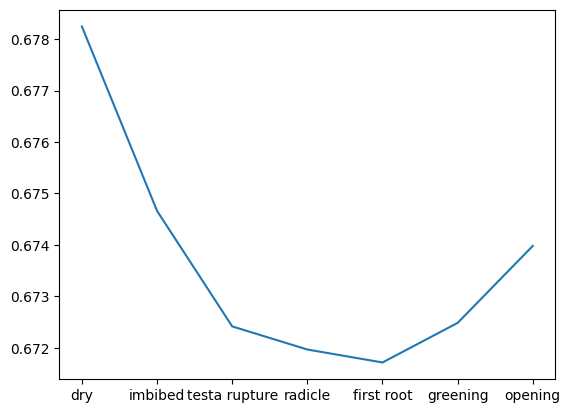

In [8]:
import matplotlib.pyplot as plt

plt.plot(expression_data.tai)
plt.show()

## 2. Flatline test

### 2.1. Compute variance of TAI curve

In [9]:
import numpy as np
tai_var = np.var(expression_data.tai).item()
tai_var

4.52723679740934e-06

### 2.2. Compute permutation variance distribution

Permute the assigned gene ages between the genes to run the flat line test

In [10]:
from gatai.utils import comp_vars

num_permutations = 10000
permutation_comp_vars = comp_vars(expression_data, num_permutations)

Running permuations


  0%|                                                                                                                                                              | 0/10000 [00:00<?, ?it/s]

  2%|██▋                                                                                                                                               | 180/10000 [00:00<00:05, 1795.94it/s]

  4%|█████▋                                                                                                                                            | 388/10000 [00:00<00:04, 1961.37it/s]

  6%|█████████                                                                                                                                         | 622/10000 [00:00<00:04, 2132.20it/s]

  9%|████████████▌                                                                                                                                     | 857/10000 [00:00<00:04, 2215.17it/s]

 11%|███████████████▊                                                                                                                                 | 1091/10000 [00:00<00:03, 2258.55it/s]

 13%|███████████████████▏                                                                                                                             | 1326/10000 [00:00<00:03, 2286.93it/s]

 16%|██████████████████████▌                                                                                                                          | 1555/10000 [00:00<00:03, 2264.73it/s]

 18%|█████████████████████████▊                                                                                                                       | 1782/10000 [00:00<00:03, 2076.65it/s]

 20%|█████████████████████████████▎                                                                                                                   | 2023/10000 [00:00<00:03, 2171.75it/s]

 23%|████████████████████████████████▋                                                                                                                | 2258/10000 [00:01<00:03, 2221.57it/s]

 25%|████████████████████████████████████▏                                                                                                            | 2494/10000 [00:01<00:03, 2260.15it/s]

 27%|███████████████████████████████████████▌                                                                                                         | 2732/10000 [00:01<00:03, 2293.47it/s]

 30%|███████████████████████████████████████████                                                                                                      | 2973/10000 [00:01<00:03, 2327.57it/s]

 32%|██████████████████████████████████████████████▌                                                                                                  | 3215/10000 [00:01<00:02, 2353.84it/s]

 35%|██████████████████████████████████████████████████                                                                                               | 3451/10000 [00:01<00:02, 2333.59it/s]

 37%|█████████████████████████████████████████████████████▍                                                                                           | 3686/10000 [00:01<00:02, 2335.78it/s]

 39%|████████████████████████████████████████████████████████▉                                                                                        | 3925/10000 [00:01<00:02, 2351.89it/s]

 42%|████████████████████████████████████████████████████████████▎                                                                                    | 4161/10000 [00:01<00:02, 2332.50it/s]

 44%|███████████████████████████████████████████████████████████████▋                                                                                 | 4395/10000 [00:01<00:02, 2327.75it/s]

 46%|███████████████████████████████████████████████████████████████████                                                                              | 4628/10000 [00:02<00:02, 2325.40it/s]

 49%|██████████████████████████████████████████████████████████████████████▌                                                                          | 4867/10000 [00:02<00:02, 2342.18it/s]

 51%|█████████████████████████████████████████████████████████████████████████▉                                                                       | 5102/10000 [00:02<00:02, 2343.83it/s]

 53%|█████████████████████████████████████████████████████████████████████████████▍                                                                   | 5339/10000 [00:02<00:01, 2348.50it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▊                                                                | 5577/10000 [00:02<00:01, 2357.17it/s]

 58%|████████████████████████████████████████████████████████████████████████████████████▎                                                            | 5813/10000 [00:02<00:01, 2356.19it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 6049/10000 [00:02<00:01, 2357.28it/s]

 63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 6285/10000 [00:02<00:01, 2309.46it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 6520/10000 [00:02<00:01, 2320.97it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████                                               | 6762/10000 [00:02<00:01, 2349.29it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 7005/10000 [00:03<00:01, 2371.54it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 7247/10000 [00:03<00:01, 2384.31it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 7486/10000 [00:03<00:01, 2367.89it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 7723/10000 [00:03<00:01, 2177.98it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 7965/10000 [00:03<00:00, 2245.26it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 8206/10000 [00:03<00:00, 2291.57it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 8445/10000 [00:03<00:00, 2318.99it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 8681/10000 [00:03<00:00, 2330.27it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 8919/10000 [00:03<00:00, 2343.42it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 9162/10000 [00:03<00:00, 2368.32it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 9405/10000 [00:04<00:00, 2384.58it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 9644/10000 [00:04<00:00, 2384.77it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 9883/10000 [00:04<00:00, 2380.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2304.97it/s]

### 2.3. Fit the random variances to a Gamma distribution and compute the p-value of the true TAI

In [11]:
from flatline import fit_gamma, p_value_function

# NOTE: the default fitting method used by scipy doesn't achieve a very good fit, so use "MM"
a, loc, scale = fit_gamma(permutation_comp_vars)
get_p_value = p_value_function(a, loc, scale)
print("Gamma fit params:", a, loc, scale)

Gamma fit params: 0.8393641435197342 8.589972498420607e-09 7.995397749093853e-08


In [12]:
print("p-value of TAI:", get_p_value(tai_var))

p-value of TAI: 1.3262304866409117e-25


### 2.4. Visually compare the random TAI variances against the true one

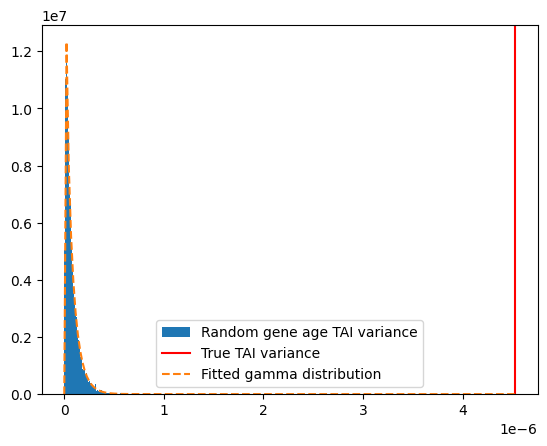

In [13]:
from scipy import stats
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")

x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")

plt.legend()
plt.show()

## 3. Destroy TAI signal with GATAI

### 3.1 Run genetic algorithm to extract genes that break the pattern
Note that the transformation used for the expression data heavily influences the number of genes that get extracted, as well as the number of generations needed for convergence.

Also, with transformations applied, older genes are better represented

In [14]:
from my_gatai import get_extracted_genes

num_runs = 5

ga_gene_sets = []

for _ in range(num_runs):
    ga_gene_sets.append(get_extracted_genes(expression_data, permutation_comp_vars))

gen	island	Num removed	Variance
0  	      	2          	1.98168 


10 	1     	348        	1.8017  
10 	2     	582        	1.73824 
10 	3     	585        	1.82862 
10 	4     	355        	1.90458 




20 	1     	342        	1.76432 
20 	2     	782        	1.71187 
20 	3     	880        	1.69523 
20 	4     	898        	1.70808 




30 	1     	1065       	1.67076 
30 	2     	1164       	1.66691 
30 	3     	738        	1.69859 
30 	4     	827        	1.69018 




40 	1     	685        	1.65568 
40 	2     	889        	1.61105 
40 	3     	1270       	1.60814 
40 	4     	933        	1.64337 




50 	1     	1475       	1.58392 
50 	2     	829        	1.59418 
50 	3     	982        	1.59703 
50 	4     	979        	1.59125 




60 	1     	864        	1.56413 
60 	2     	1133       	1.53599 
60 	3     	811        	1.58151 
60 	4     	949        	1.57884 




70 	1     	1274       	1.5074  
70 	2     	933        	1.50128 
70 	3     	1330       	1.50499 
70 	4     	1336       	1.51773 




80 	1     	1507       	1.47007 
80 	2     	1309       	1.48986 
80 	3     	1427       	1.47104 
80 	4     	1249       	1.47712 




90 	1     	1316       	1.45534 
90 	2     	1644       	1.43242 
90 	3     	1651       	1.44616 
90 	4     	1863       	1.44344 




100	1     	1849       	1.42687 
100	2     	1547       	1.40927 
100	3     	1537       	1.41916 
100	4     	1717       	1.4247  




110	1     	1523       	1.41129 
110	2     	1793       	1.40041 
110	3     	1657       	1.39842 
110	4     	1587       	1.40598 




120	1     	1534       	1.39134 
120	2     	1522       	1.38823 
120	3     	1713       	1.38834 
120	4     	1859       	1.38541 




130	1     	1602       	1.35664 
130	2     	1764       	1.37556 
130	3     	1614       	1.36705 
130	4     	1704       	1.36439 




140	1     	1864       	1.35724 
140	2     	1767       	1.35312 
140	3     	1681       	1.35485 
140	4     	1678       	1.35267 




150	1     	1853       	1.33392 
150	2     	1647       	1.35046 
150	3     	1662       	1.3238  
150	4     	1644       	1.33904 




160	1     	1648       	1.321   
160	2     	1939       	1.32034 
160	3     	1662       	1.32334 
160	4     	1843       	1.31906 




170	1     	1776       	1.30769 
170	2     	1897       	1.31028 
170	3     	1722       	1.32491 
170	4     	1826       	1.30798 




180	1     	1668       	1.30284 
180	2     	1827       	1.30126 
180	3     	1883       	1.29958 
180	4     	1980       	1.30056 




190	1     	1961       	1.29446 
190	2     	1701       	1.2932  
190	3     	2143       	1.28551 
190	4     	2073       	1.28207 




200	1     	2058       	1.27923 
200	2     	2073       	1.28207 
200	3     	1905       	1.28104 
200	4     	2207       	1.27819 




210	1     	1916       	1.27637 
210	2     	1928       	1.27294 
210	3     	2095       	1.26609 
210	4     	1998       	1.26427 




220	1     	2004       	1.25756 
220	2     	1975       	1.26222 
220	3     	2309       	1.24955 
220	4     	1907       	1.2562  




230	1     	2382       	1.24671 
230	2     	2062       	1.2528  
230	3     	2371       	1.24568 
230	4     	2429       	1.23924 




240	1     	2377       	1.23864 
240	2     	2370       	1.23388 
240	3     	2105       	1.24295 
240	4     	2302       	1.24342 




250	1     	2040       	1.24025 
250	2     	2465       	1.23315 
250	3     	2631       	1.22239 
250	4     	2980       	1.21093 




260	1     	3080       	1.20446 
260	2     	2980       	1.21093 
260	3     	2570       	1.2151  
260	4     	3149       	1.20534 




270	1     	3163       	1.19987 
270	2     	2957       	1.19712 
270	3     	3172       	1.19614 
270	4     	3304       	1.20081 




280	1     	3254       	1.18923 
280	2     	3082       	1.19591 
280	3     	3163       	1.19987 
280	4     	3079       	1.19363 




290	1     	2782       	1.18894 
290	2     	2858       	1.18674 
290	3     	3245       	1.18847 
290	4     	3100       	1.19277 




300	1     	3411       	1.17744 
300	2     	2544       	1.18611 
300	3     	2711       	1.17488 
300	4     	3091       	1.184   




310	1     	2797       	1.1654  
310	2     	3374       	1.17679 
310	3     	3410       	1.16595 
310	4     	2867       	1.16658 




320	1     	3608       	1.15615 
320	2     	2656       	1.16118 
320	3     	2973       	1.16355 
320	4     	3382       	1.16153 




330	1     	3382       	1.16153 
330	2     	3356       	1.16046 
330	3     	3538       	1.1503  
330	4     	2679       	1.15111 




340	1     	2753       	1.14698 
340	2     	2680       	1.15067 
340	3     	3520       	1.14995 
340	4     	2851       	1.14182 




350	1     	2983       	1.13755 
350	2     	2786       	1.1384  
350	3     	2725       	1.1458  
350	4     	3111       	1.13361 




360	1     	3166       	1.13083 
360	2     	3082       	1.132   
360	3     	2961       	1.13698 
360	4     	3187       	1.13078 




370	1     	2668       	1.12682 
370	2     	3046       	1.12801 
370	3     	2842       	1.12829 
370	4     	3172       	1.12824 




380	1     	2651       	1.12597 
380	2     	3172       	1.12824 
380	3     	3033       	1.12563 
380	4     	3230       	1.11971 




390	1     	3107       	1.11664 
390	2     	3181       	1.11818 
390	3     	2624       	1.12445 
390	4     	3085       	1.11772 




400	1     	3019       	1.11505 
400	2     	3044       	1.11404 
400	3     	3180       	1.10714 
400	4     	3449       	1.11123 




410	1     	3252       	1.1051  
410	2     	3449       	1.11123 
410	3     	3399       	1.09482 
410	4     	3403       	1.09824 




420	1     	3565       	1.08667 
420	2     	3403       	1.09824 
420	3     	3248       	1.0908  
420	4     	3484       	1.08956 




430	1     	3390       	1.08948 
430	2     	3534       	1.08454 
430	3     	3565       	1.08667 
430	4     	3176       	1.08757 




440	1     	3638       	1.07989 
440	2     	3176       	1.08757 
440	3     	3157       	1.08832 
440	4     	3570       	1.07717 




450	1     	3489       	1.07878 
450	2     	3570       	1.07717 
450	3     	3602       	1.07746 
450	4     	3065       	1.0789  




460	1     	3586       	1.07697 
460	2     	3461       	1.07736 
460	3     	3393       	1.07102 
460	4     	3309       	1.06883 




470	1     	3280       	1.06691 
470	2     	3309       	1.06883 
470	3     	3526       	1.06432 
470	4     	3481       	1.06907 




480	1     	3616       	1.05828 
480	2     	3479       	1.06803 
480	3     	3022       	1.06582 
480	4     	3776       	1.05754 




490	1     	3114       	1.05729 
490	2     	3776       	1.05754 
490	3     	3523       	1.05565 
490	4     	2978       	1.06518 




500	1     	3686       	1.04688 
500	2     	3055       	1.05674 
500	3     	3010       	1.05378 
500	4     	3664       	1.04159 




510	1     	3598       	1.04707 
510	2     	3664       	1.04159 
510	3     	3629       	1.04507 
510	4     	2996       	1.04522 




520	1     	2989       	1.04462 
520	2     	2996       	1.04522 
520	3     	3750       	1.03603 
520	4     	3157       	1.04137 




530	1     	3728       	1.03149 
530	2     	3157       	1.04137 
530	3     	3803       	1.03512 
530	4     	3777       	1.0349  




540	1     	3777       	1.0349  
540	2     	3777       	1.0349  
540	3     	3701       	1.02965 
540	4     	3703       	1.03564 




550	1     	3787       	1.01942 
550	2     	3651       	1.03301 
550	3     	2964       	1.02604 
550	4     	3728       	1.00901 




560	1     	3053       	1.01973 
560	2     	3728       	1.00901 
560	3     	3897       	1.0067  
560	4     	2907       	1.0174  




570	1     	3864       	1.00373 
570	2     	2907       	1.0174  
570	3     	3833       	1.00658 
570	4     	3790       	1.00376 




580	1     	3917       	1.00619 
580	2     	3790       	1.00376 
580	3     	3864       	1.00373 
580	4     	2808       	1.00671 




590	1     	3950       	1.00281 
590	2     	3857       	1.00302 
590	3     	3771       	0.991395
590	4     	3800       	0.997207




600	1     	3853       	0.989111
600	2     	3800       	0.997207
600	3     	3574       	0.996187
600	4     	3795       	0.970946




610	1     	3795       	0.970946
610	2     	3795       	0.970946
610	3     	3734       	0.987537
610	4     	3056       	0.978747




620	1     	3672       	0.978002
620	2     	3677       	0.963377
620	3     	3949       	0.936607
620	4     	3852       	0.966175




630	1     	3937       	0.883654
630	2     	3852       	0.966175
630	3     	3876       	0.928018
630	4     	3938       	0.914233




640	1     	3938       	0.914233
640	2     	3937       	0.883654
640	3     	3729       	0.936268
640	4     	4003       	0.909595




650	1     	3706       	0.901865
650	2     	3851       	0.890657
650	3     	3883       	0.871559
650	4     	4006       	0.895675




660	1     	3883       	0.871559
660	2     	3788       	0.875335
660	3     	3803       	0.85691 
660	4     	3857       	0.876435




670	1     	3821       	0.876326
670	2     	3875       	0.865615
670	3     	3787       	0.851096
670	4     	3824       	0.82079 




680	1     	3909       	0.8131  
680	2     	3819       	0.793254
680	3     	3787       	0.833842
680	4     	3888       	0.810965




690	1     	3897       	0.792324
690	2     	3695       	0.798246
690	3     	3768       	0.739481
690	4     	3812       	0.769875




700	1     	3834       	0.703871
700	2     	3787       	0.7523  
700	3     	3889       	0.764679
700	4     	3934       	0.719897




710	1     	3885       	0.689667
710	2     	3834       	0.703871
710	3     	3821       	0.75534 
710	4     	3658       	0.708382




720	1     	3834       	0.703871
720	2     	3856       	0.651731
720	3     	3885       	0.689667
720	4     	3834       	0.703871




730	1     	3593       	0.709966
730	2     	3818       	0.660071
730	3     	3952       	0.635484
730	4     	3796       	0.659862




740	1     	4098       	0.612476
740	2     	3796       	0.659862
740	3     	3944       	0.643886
740	4     	4186       	0.590044




750	1     	4025       	0.598709
750	2     	4186       	0.590044
750	3     	4098       	0.612476
750	4     	3967       	0.583173




760	1     	3839       	0.572872
760	2     	3967       	0.583173
760	3     	4186       	0.590044
760	4     	3920       	0.576784




770	1     	3822       	0.605767
770	2     	3915       	0.558561
770	3     	3789       	0.566588
770	4     	3690       	0.579884




780	1     	3731       	0.566372
780	2     	3677       	0.572874
780	3     	3718       	0.559286
780	4     	3696       	0.543798




790	1     	3730       	0.525159
790	2     	3659       	0.542664
790	3     	3559       	0.588473
790	4     	3605       	0.522888




800	1     	3548       	0.529693
800	2     	3590       	0.504701
800	3     	3687       	0.511989
800	4     	3548       	0.529693




810	1     	3622       	0.503256
810	2     	3523       	0.526086
810	3     	3586       	0.528043
810	4     	3620       	0.489266




820	1     	3702       	0.470865
820	2     	3606       	0.503151
820	3     	3590       	0.490509
820	4     	3672       	0.476926




830	1     	3662       	0.475076
830	2     	3700       	0.470762
830	3     	3702       	0.470865
830	4     	3577       	0.483917




840	1     	3558       	0.464102
840	2     	3652       	0.452526
840	3     	3580       	0.468717
840	4     	3755       	0.456106




850	1     	3680       	0.438442
850	2     	3538       	0.451311
850	3     	3605       	0.378027
850	4     	3543       	0.430266




860	1     	3605       	0.378027
860	2     	3577       	0.445697
860	3     	3577       	0.42883 
860	4     	3588       	0.429957




870	1     	3605       	0.378027
870	2     	3561       	0.376793
870	3     	3703       	0.385387
870	4     	3679       	0.404762




880	1     	3555       	0.384661
880	2     	3576       	0.371172
880	3     	3503       	0.374232
880	4     	3532       	0.369839




890	1     	3616       	0.321259
890	2     	3576       	0.371172
890	3     	3521       	0.355242
890	4     	3618       	0.345332




900	1     	3616       	0.321259
900	2     	3616       	0.321259
900	3     	3614       	0.329743
900	4     	3569       	0.308284




910	1     	3626       	0.309706
910	2     	3551       	0.307979
910	3     	3494       	0.318812
910	4     	3612       	0.303675




920	1     	3612       	0.303675
920	2     	3612       	0.303675
920	3     	3507       	0.305934
920	4     	3482       	0.299676




930	1     	3523       	0.289079
930	2     	3607       	0.314602
930	3     	3690       	0.270451
930	4     	3384       	0.291532




940	1     	3784       	0.258504
940	2     	3372       	0.270556
940	3     	3567       	0.253109
940	4     	3866       	0.248005




950	1     	3639       	0.234356
950	2     	3757       	0.249525
950	3     	3814       	0.242918
950	4     	3745       	0.236613




960	1     	3615       	0.226004
960	2     	3745       	0.236613
960	3     	3634       	0.232111
960	4     	3557       	0.242614




970	1     	3647       	0.222449
970	2     	3557       	0.242614
970	3     	3615       	0.226004
970	4     	3634       	0.232111




980	1     	3414       	0.219497
980	2     	3647       	0.222449
980	3     	3519       	0.21818 
980	4     	3400       	0.214602




990	1     	3400       	0.214602
990	2     	3641       	0.214917
990	3     	3727       	-0      
990	4     	3383       	0.213581




1000	1     	3362       	-0      
1000	2     	3400       	0.214602
1000	3     	3715       	-0      
1000	4     	3300       	0.208969




1010	1     	3279       	-0      
1010	2     	3316       	-0      
1010	3     	3592       	0.205814
1010	4     	3101       	-0      




1020	1     	3094       	-0      
1020	2     	3279       	-0      
1020	3     	3316       	-0      
1020	4     	3674       	-0      




1030	1     	3674       	-0      
1030	2     	3080       	-0      
1030	3     	3268       	-0      
1030	4     	3246       	-0      




1040	1     	3046       	-0      
1040	2     	3065       	-0      
1040	3     	3219       	-0      
1040	4     	3073       	-0      




1050	1     	3071       	-0      
1050	2     	3019       	-0      
1050	3     	3148       	0.216947
1050	4     	3094       	-0      




1060	1     	3092       	-0      
1060	2     	3047       	-0      
1060	3     	3006       	-0      
1060	4     	3168       	-0      




1070	1     	3168       	-0      
1070	2     	3089       	-0      
1070	3     	3047       	-0      
1070	4     	3006       	-0      




1080	1     	2954       	-0      
1080	2     	2948       	-0      
1080	3     	3006       	-0      
1080	4     	3024       	-0      




1090	1     	3024       	-0      
1090	2     	2943       	-0      
1090	3     	2839       	-0      
1090	4     	3004       	-0      




1100	1     	2915       	-0      
1100	2     	2922       	-0      
1100	3     	2904       	0.217869
1100	4     	2839       	-0      




1110	1     	2839       	-0      
1110	2     	2898       	0.215931
1110	3     	2922       	-0      
1110	4     	2830       	-0      




1120	1     	2828       	-0      
1120	2     	2839       	-0      
1120	3     	2877       	-0      
1120	4     	2905       	-0      




1130	1     	2858       	-0      
1130	2     	2828       	-0      
1130	3     	2839       	-0      
1130	4     	2817       	0.210504




1140	1     	2818       	0.205001
1140	2     	2858       	-0      
1140	3     	2786       	-0      
1140	4     	2839       	-0      




1150	1     	2839       	-0      
1150	2     	2778       	-0      
1150	3     	2815       	0.214917
1150	4     	2786       	-0      




1160	1     	2786       	-0      
1160	2     	2778       	-0      
1160	3     	2809       	-0      
1160	4     	2811       	-0      




1170	1     	2779       	-0      
1170	2     	2786       	-0      
1170	3     	2747       	-0      
1170	4     	2809       	-0      




1180	1     	2779       	-0      
1180	2     	2760       	-0      
1180	3     	2661       	0.207653
1180	4     	2747       	-0      




1190	1     	2747       	-0      
1190	2     	2733       	-0      
1190	3     	2760       	-0      
1190	4     	2765       	-0      




1200	1     	2740       	-0      
1200	2     	2747       	-0      
1200	3     	2715       	-0      
1200	4     	2737       	-0      




1210	1     	2716       	-0      
1210	2     	2693       	-0      
1210	3     	2687       	-0      
1210	4     	2629       	-0      




1220	1     	2628       	-0      
1220	2     	2693       	-0      
1220	3     	2661       	-0      
1220	4     	2687       	-0      




1230	1     	2628       	-0      
1230	2     	2619       	-0      
1230	3     	2668       	-0      
1230	4     	2658       	-0      




1240	1     	2624       	-0      
1240	2     	2603       	-0      
1240	3     	2619       	-0      
1240	4     	2658       	-0      




1250	1     	2644       	-0      
1250	2     	2624       	-0      
1250	3     	2603       	-0      
1250	4     	2619       	-0      




1260	1     	2610       	-0      
1260	2     	2611       	-0      
1260	3     	2583       	-0      
1260	4     	2593       	-0      




1270	1     	2602       	0.212027
1270	2     	2599       	-0      
1270	3     	2611       	-0      
1270	4     	2583       	-0      




1280	1     	2598       	0.213479
1280	2     	2603       	-0      
1280	3     	2566       	-0      
1280	4     	2575       	-0      




1290	1     	2554       	0.205408
1290	2     	2539       	0.231395
1290	3     	2535       	-0      
1290	4     	2563       	-0      




1300	1     	2557       	-0      
1300	2     	2531       	-0      
1300	3     	2531       	-0      
1300	4     	2514       	-0      




1310	1     	2556       	-0      
1310	2     	2557       	-0      
1310	3     	2506       	-0      
1310	4     	2514       	-0      




1320	1     	2484       	0.209886
1320	2     	2556       	-0      
1320	3     	2531       	-0      
1320	4     	2473       	-0      




1330	1     	2444       	0.207145
1330	2     	2545       	-0      
1330	3     	2588       	-0      
1330	4     	2473       	-0      




1340	1     	2319       	0.228662
1340	2     	2527       	0.205814
1340	3     	2499       	-0      
1340	4     	2461       	-0      




1350	1     	2458       	-0      
1350	2     	2429       	-0      
1350	3     	2519       	-0      
1350	4     	2492       	-0      




1360	1     	2458       	-0      
1360	2     	2452       	-0      
1360	3     	2429       	-0      
1360	4     	2379       	-0      




1370	1     	2417       	-0      
1370	2     	2458       	-0      
1370	3     	2385       	-0      
1370	4     	2341       	-0      




1380	1     	2341       	-0      
1380	2     	2382       	-0      
1380	3     	2353       	-0      
1380	4     	2352       	-0      




1390	1     	2324       	-0      
1390	2     	2321       	-0      
1390	3     	2353       	-0      
1390	4     	2335       	-0      




1400	1     	2324       	-0      
1400	2     	2321       	-0      
1400	3     	2321       	-0      
1400	4     	2342       	-0      




1410	1     	2307       	-0      
1410	2     	2205       	-0      
1410	3     	2317       	-0      
1410	4     	2321       	-0      




1420	1     	2225       	0.217559
1420	2     	2203       	-0      
1420	3     	2315       	-0      
1420	4     	2282       	-0      




1430	1     	2282       	-0      
1430	2     	2202       	-0      
1430	3     	2167       	-0      
1430	4     	2183       	0.211011




1440	1     	2270       	-0      
1440	2     	2200       	-0      
1440	3     	2156       	-0      
1440	4     	2179       	0.212034




1450	1     	2244       	-0      
1450	2     	2193       	-0      
1450	3     	2144       	-0      
1450	4     	2281       	-0      




1460	1     	2244       	-0      
1460	2     	2183       	0.211014
1460	3     	2185       	-0      
1460	4     	2144       	-0      




1470	1     	2144       	-0      
1470	2     	2215       	-0      
1470	3     	2108       	0.20561 
1470	4     	2137       	-0      




1480	1     	2121       	-0      
1480	2     	2138       	-0      
1480	3     	2123       	-0      
1480	4     	2116       	-0      




1490	1     	2037       	0.217767
1490	2     	2096       	-0      
1490	3     	2138       	-0      
1490	4     	2078       	-0      




1500	1     	2065       	-0      
1500	2     	2037       	0.217767
1500	3     	2096       	-0      
1500	4     	2218       	0.206535




1510	1     	2010       	0.22407 
1510	2     	2059       	-0      
1510	3     	2070       	-0      
1510	4     	2096       	-0      




1520	1     	2086       	-0      
1520	2     	2056       	-0      
1520	3     	2032       	-0      
1520	4     	2052       	-0      




1530	1     	2052       	-0      
1530	2     	2056       	-0      
1530	3     	2009       	-0      
1530	4     	2032       	-0      




1540	1     	2032       	-0      
1540	2     	2017       	-0      
1540	3     	2005       	-0      
1540	4     	2018       	-0      




1550	1     	2010       	-0      
1550	2     	2013       	0.212347
1550	3     	2011       	-0      
1550	4     	2005       	-0      




1560	1     	2005       	-0      
1560	2     	1999       	-0      
1560	3     	2013       	0.212347
1560	4     	2011       	-0      




1570	1     	1994       	-0      
1570	2     	1998       	-0      
1570	3     	2114       	-0      
1570	4     	2011       	-0      




1580	1     	2001       	-0      
1580	2     	1994       	-0      
1580	3     	1993       	-0      
1580	4     	1983       	-0      




1590	1     	1968       	-0      
1590	2     	1994       	-0      
1590	3     	1993       	-0      
1590	4     	2096       	0.224072




1600	1     	1939       	0.223664
1600	2     	1961       	-0      
1600	3     	1985       	-0      
1600	4     	1992       	-0      




1610	1     	1914       	0.240476
1610	2     	1924       	0.212032
1610	3     	1961       	-0      
1610	4     	1992       	-0      




1620	1     	1981       	-0      
1620	2     	1904       	0.234459
1620	3     	1955       	-0      
1620	4     	1961       	-0      




1630	1     	1858       	0.234459
1630	2     	1974       	-0      
1630	3     	1946       	0.206226
1630	4     	1952       	-0      




1640	1     	1915       	0.245043
1640	2     	1966       	-0      
1640	3     	2034       	-0      
1640	4     	1932       	-0      




1650	1     	1923       	-0      
1650	2     	1966       	-0      
1650	3     	1966       	-0      
1650	4     	1916       	-0      




1660	1     	1916       	-0      
1660	2     	1912       	-0      
1660	3     	1948       	-0      
1660	4     	1913       	-0      




1670	1     	1913       	-0      
1670	2     	1912       	-0      
1670	3     	1925       	-0      
1670	4     	1939       	-0      




1680	1     	1934       	-0      
1680	2     	1901       	-0      
1680	3     	2024       	0.212452
1680	4     	1882       	-0      




1690	1     	1912       	0.2103  
1690	2     	1927       	-0      
1690	3     	1890       	-0      
1690	4     	1882       	-0      




1700	1     	1871       	-0      
1700	2     	1925       	-0      
1700	3     	1886       	-0      
1700	4     	1873       	-0      




1710	1     	1843       	0.231189
1710	2     	1871       	-0      
1710	3     	1921       	-0      
1710	4     	1865       	-0      




1720	1     	1865       	-0      
1720	2     	1804       	0.234971
1720	3     	1871       	-0      
1720	4     	1921       	-0      




1730	1     	1859       	-0      
1730	2     	1787       	0.238549
1730	3     	1983       	-0      
1730	4     	1845       	-0      




1740	1     	1840       	-0      
1740	2     	1859       	-0      
1740	3     	1931       	-0      
1740	4     	1926       	-0      




1750	1     	1835       	0.212556
1750	2     	1821       	-0      
1750	3     	1859       	-0      
1750	4     	1910       	-0      




1760	1     	1903       	-0      
1760	2     	1835       	0.212556
1760	3     	1812       	-0      
1760	4     	1973       	0.21203 




1770	1     	1898       	-0      
1770	2     	1887       	-0      
1770	3     	1812       	-0      
1770	4     	1801       	-0      




1780	1     	1777       	-0      
1780	2     	1796       	0.208465
1780	3     	1872       	-0      
1780	4     	1808       	-0      




1790	1     	1774       	-0      
1790	2     	1796       	0.208465
1790	3     	1896       	0.206431
1790	4     	1808       	-0      




1800	1     	1766       	-0      
1800	2     	1794       	0.205612
1800	3     	1783       	-0      
1800	4     	1801       	-0      




1810	1     	1753       	-0      
1810	2     	1681       	0.224576
1810	3     	1908       	-0      
1810	4     	1783       	-0      




1820	1     	1734       	0.213581
1820	2     	1751       	-0      
1820	3     	1795       	-0      
1820	4     	1774       	-0      




1830	1     	1767       	-0      
1830	2     	1738       	0.206123
1830	3     	1747       	-0      
1830	4     	1774       	-0      




1840	1     	1759       	-0      
1840	2     	1767       	-0      
1840	3     	1833       	-0      
1840	4     	1746       	-0      




1850	1     	1739       	-0      
1850	2     	1747       	-0      
1850	3     	1802       	-0      
1850	4     	1730       	-0      




1860	1     	1720       	-0      
1860	2     	1739       	-0      
1860	3     	1747       	-0      
1860	4     	1787       	-0      




1870	1     	1787       	-0      
1870	2     	1720       	-0      
1870	3     	1739       	-0      
1870	4     	1741       	-0      




1880	1     	1741       	-0      
1880	2     	1720       	-0      
1880	3     	1716       	-0      
1880	4     	1721       	-0      




1890	1     	1720       	-0      
1890	2     	1705       	-0      
1890	3     	1716       	-0      
1890	4     	1833       	-0      




1900	1     	1829       	-0      
1900	2     	1693       	-0      
1900	3     	1692       	-0      
1900	4     	1716       	-0      




1910	1     	1716       	-0      
1910	2     	1675       	0.210403
1910	3     	1692       	-0      
1910	4     	1692       	-0      




1920	1     	1688       	-0      
1920	2     	1716       	-0      
1920	3     	1692       	-0      
1920	4     	1682       	-0      




1930	1     	1682       	-0      
1930	2     	1684       	-0      
1930	3     	1716       	-0      
1930	4     	1670       	-0      




1940	1     	1670       	-0      
1940	2     	1682       	-0      
1940	3     	1665       	-0      
1940	4     	1664       	-0      




1950	1     	1664       	-0      
1950	2     	1670       	-0      
1950	3     	1682       	-0      
1950	4     	1657       	-0      




1960	1     	1657       	-0      
1960	2     	1656       	-0      
1960	3     	1632       	-0      
1960	4     	1588       	0.22407 




1970	1     	1646       	-0      
1970	2     	1657       	-0      
1970	3     	1626       	-0      
1970	4     	1717       	0.215122




1980	1     	1639       	-0      
1980	2     	1633       	0.228148
1980	3     	1637       	-0      
1980	4     	1626       	-0      




1990	1     	1626       	-0      
1990	2     	1633       	0.228148
1990	3     	1715       	-0      
1990	4     	1606       	-0      




2000	1     	1595       	-0      
2000	2     	1626       	-0      
2000	3     	1607       	-0      
2000	4     	1701       	-0      




2010	1     	1590       	-0      
2010	2     	1593       	-0      
2010	3     	1607       	-0      
2010	4     	1607       	-0      




2020	1     	1576       	-0      
2020	2     	1523       	0.235075
2020	3     	1581       	-0      
2020	4     	1606       	-0      




2030	1     	1606       	-0      
2030	2     	1568       	-0      
2030	3     	1682       	-0      
2030	4     	1581       	-0      




2040	1     	1581       	-0      
2040	2     	1556       	-0      
2040	3     	1788       	-0      
2040	4     	1581       	-0      




2050	1     	1573       	-0      
2050	2     	1581       	-0      
2050	3     	1543       	-0      
2050	4     	1675       	-0      




2060	1     	1675       	-0      
2060	2     	1573       	-0      
2060	3     	1531       	-0      
2060	4     	1596       	-0      




2070	1     	1562       	-0      
2070	2     	1570       	-0      
2070	3     	1528       	-0      
2070	4     	1531       	-0      




2080	1     	1531       	-0      
2080	2     	1562       	-0      
2080	3     	1522       	-0      
2080	4     	1524       	-0      




2090	1     	1519       	-0      
2090	2     	1531       	-0      
2090	3     	1504       	-0      
2090	4     	1522       	-0      




2100	1     	1519       	-0      
2100	2     	1519       	-0      
2100	3     	1530       	-0      
2100	4     	1504       	-0      




2110	1     	1504       	-0      
2110	2     	1508       	-0      
2110	3     	1519       	-0      
2110	4     	1500       	-0      




2120	1     	1497       	-0      
2120	2     	1504       	-0      
2120	3     	1508       	-0      
2120	4     	1519       	-0      




2130	1     	1497       	-0      
2130	2     	1497       	-0      
2130	3     	1504       	-0      
2130	4     	1500       	-0      




2140	1     	1492       	-0      
2140	2     	1494       	-0      
2140	3     	1580       	0.205612
2140	4     	1504       	-0      




2150	1     	1488       	0.209884
2150	2     	1490       	-0      
2150	3     	1571       	-0      
2150	4     	1495       	-0      




2160	1     	1488       	-0      
2160	2     	1466       	0.210808
2160	3     	1485       	-0      
2160	4     	1570       	-0      




2170	1     	1481       	-0      
2170	2     	1488       	-0      
2170	3     	1580       	-0      
2170	4     	1485       	-0      




2180	1     	1471       	-0      
2180	2     	1481       	-0      
2180	3     	1488       	-0      
2180	4     	1575       	-0      




2190	1     	1575       	-0      
2190	2     	1471       	-0      
2190	3     	1475       	-0      
2190	4     	1488       	-0      




2200	1     	1483       	-0      
2200	2     	1470       	-0      
2200	3     	1464       	-0      
2200	4     	1478       	0.205202




2210	1     	1474       	-0      
2210	2     	1483       	-0      
2210	3     	1455       	-0      
2210	4     	1683       	-0      




2220	1     	1472       	0.212558
2220	2     	1474       	-0      
2220	3     	1483       	-0      
2220	4     	1455       	-0      




2230	1     	1455       	-0      
2230	2     	1455       	-0      
2230	3     	1464       	-0      
2230	4     	1444       	-0      




2240	1     	1440       	-0      
2240	2     	1455       	-0      
2240	3     	1455       	-0      
2240	4     	1444       	-0      




2250	1     	1435       	-0      
2250	2     	1440       	-0      
2250	3     	1455       	-0      
2250	4     	1439       	-0      




2260	1     	1439       	-0      
2260	2     	1420       	-0      
2260	3     	1440       	-0      
2260	4     	1439       	-0      




2270	1     	1435       	-0      
2270	2     	1420       	-0      
2270	3     	1420       	-0      
2270	4     	1439       	-0      




2280	1     	1436       	-0      
2280	2     	1430       	-0      
2280	3     	1409       	-0      
2280	4     	1420       	-0      




2290	1     	1420       	-0      
2290	2     	1422       	-0      
2290	3     	1407       	-0      
2290	4     	1403       	-0      




2300	1     	1403       	-0      
2300	2     	1420       	-0      
2300	3     	1407       	-0      
2300	4     	1400       	-0      




2310	1     	1400       	-0      
2310	2     	1401       	-0      
2310	3     	1411       	-0      
2310	4     	1405       	-0      




2320	1     	1396       	-0      
2320	2     	1356       	0.241697
2320	3     	1401       	-0      
2320	4     	1405       	-0      




2330	1     	1404       	-0      
2330	2     	1396       	-0      
2330	3     	1567       	0.215123
2330	4     	1398       	-0      




2340	1     	1394       	-0      
2340	2     	1390       	-0      
2340	3     	1579       	0.21101 
2340	4     	1391       	-0      




2350	1     	1391       	-0      
2350	2     	1380       	-0      
2350	3     	1377       	-0      
2350	4     	1579       	0.21101 




2360	1     	1391       	-0      
2360	2     	1376       	-0      
2360	3     	1370       	-0      
2360	4     	1674       	0.213683




2370	1     	1784       	0.212864
2370	2     	1391       	-0      
2370	3     	1376       	-0      
2370	4     	1370       	-0      




2380	1     	1366       	-0      
2380	2     	1383       	0.210909
2380	3     	1391       	-0      
2380	4     	1374       	-0      




2390	1     	1364       	-0      
2390	2     	1364       	-0      
2390	3     	1447       	0.241088
2390	4     	1374       	-0      




2400	1     	1374       	-0      
2400	2     	1362       	-0      
2400	3     	1364       	-0      
2400	4     	1374       	-0      




2410	1     	1369       	-0      
2410	2     	1362       	-0      
2410	3     	1364       	-0      
2410	4     	1364       	-0      




2420	1     	1364       	-0      
2420	2     	1361       	-0      
2420	3     	1356       	-0      
2420	4     	1364       	-0      




2430	1     	1359       	-0      
2430	2     	1356       	-0      
2430	3     	1356       	-0      
2430	4     	1351       	-0      




2440	1     	1346       	-0      
2440	2     	1343       	-0      
2440	3     	1353       	-0      
2440	4     	1355       	-0      




2450	1     	1338       	-0      
2450	2     	1336       	-0      
2450	3     	1340       	-0      
2450	4     	1353       	-0      




2460	1     	1353       	-0      
2460	2     	1338       	-0      
2460	3     	1335       	-0      
2460	4     	1340       	-0      




2470	1     	1340       	-0      
2470	2     	1335       	-0      
2470	3     	1335       	-0      
2470	4     	1326       	0.213068




2480	1     	1326       	0.213068
2480	2     	1340       	-0      
2480	3     	1332       	-0      
2480	4     	1333       	-0      




2490	1     	1333       	-0      
2490	2     	1332       	0.210301
2490	3     	1332       	-0      
2490	4     	1326       	0.216539




2500	1     	1333       	-0      
2500	2     	1333       	-0      
2500	3     	1251       	0.260978
2500	4     	1332       	-0      




2510	1     	1332       	-0      
2510	2     	1333       	-0      
2510	3     	1333       	-0      
2510	4     	1519       	-0      




2520	1     	1315       	0.207038
2520	2     	1320       	-0      
2520	3     	1333       	-0      
2520	4     	1328       	-0      




2530	1     	1328       	-0      
2530	2     	1314       	-0      
2530	3     	1320       	-0      
2530	4     	1402       	0.212967




2540	1     	1326       	-0      
2540	2     	1312       	-0      
2540	3     	1314       	-0      
2540	4     	1514       	-0      




2550	1     	1497       	-0      
2550	2     	1322       	-0      
2550	3     	1302       	-0      
2550	4     	1304       	-0      




2560	1     	1304       	-0      
2560	2     	1497       	-0      
2560	3     	1302       	-0      
2560	4     	1297       	-0      




2570	1     	1293       	-0      
2570	2     	1294       	-0      
2570	3     	1298       	-0      
2570	4     	1377       	0.220412




2580	1     	1289       	0.213277
2580	2     	1286       	-0      
2580	3     	1294       	-0      
2580	4     	1298       	-0      




2590	1     	1298       	-0      
2590	2     	1286       	-0      
2590	3     	1279       	-0      
2590	4     	1294       	-0      




2600	1     	1298       	-0      
2600	2     	1298       	-0      
2600	3     	1279       	-0      
2600	4     	1294       	-0      




2610	1     	1289       	-0      
2610	2     	1298       	-0      
2610	3     	1279       	-0      
2610	4     	1276       	-0      




2620	1     	1276       	-0      
2620	2     	1289       	-0      
2620	3     	1271       	-0      
2620	4     	1279       	-0      




2630	1     	1276       	-0      
2630	2     	1272       	-0      
2630	3     	1268       	-0      
2630	4     	1271       	-0      




2640	1     	1271       	-0      
2640	2     	1272       	-0      
2640	3     	1267       	0.205408
2640	4     	1268       	-0      




2650	1     	1268       	-0      
2650	2     	1271       	-0      
2650	3     	1347       	-0      
2650	4     	1268       	-0      




2660	1     	1265       	-0      
2660	2     	1264       	-0      
2660	3     	1271       	-0      
2660	4     	1268       	-0      




2670	1     	1266       	-0      
2670	2     	1265       	-0      
2670	3     	1260       	-0      
2670	4     	1264       	-0      




2680	1     	1250       	-0      
2680	2     	1264       	-0      
2680	3     	1254       	-0      
2680	4     	1263       	-0      




2690	1     	1263       	-0      
2690	2     	1250       	-0      
2690	3     	1254       	-0      
2690	4     	1254       	-0      




2700	1     	1254       	-0      
2700	2     	1263       	-0      
2700	3     	1250       	-0      
2700	4     	1254       	-0      




2710	1     	1254       	-0      
2710	2     	1254       	-0      
2710	3     	1259       	-0      
2710	4     	1250       	-0      




2720	1     	1236       	-0      
2720	2     	1254       	-0      
2720	3     	1254       	-0      
2720	4     	1246       	-0      




2730	1     	1236       	-0      
2730	2     	1226       	-0      
2730	3     	1254       	-0      
2730	4     	1241       	-0      




2740	1     	1236       	-0      
2740	2     	1229       	-0      
2740	3     	1226       	-0      
2740	4     	1249       	-0      




2750	1     	1249       	-0      
2750	2     	1234       	-0      
2750	3     	1226       	-0      
2750	4     	1226       	-0      




2760	1     	1226       	-0      
2760	2     	1234       	-0      
2760	3     	1225       	-0      
2760	4     	1225       	-0      




2770	1     	1223       	-0      
2770	2     	1226       	-0      
2770	3     	1234       	-0      
2770	4     	1222       	-0      




2780	1     	1209       	-0      
2780	2     	1223       	-0      
2780	3     	1233       	-0      
2780	4     	1234       	-0      




2790	1     	1187       	0.237128
2790	2     	1208       	-0      
2790	3     	1332       	-0      
2790	4     	1233       	-0      




2800	1     	1233       	-0      
2800	2     	1208       	-0      
2800	3     	1327       	-0      
2800	4     	1233       	-0      




2810	1     	1233       	-0      
2810	2     	1201       	-0      
2810	3     	1206       	-0      
2810	4     	1309       	-0      




2820	1     	1302       	-0      
2820	2     	1201       	-0      
2820	3     	1206       	-0      
2820	4     	1282       	0.208462




2830	1     	1299       	-0      
2830	2     	1200       	-0      
2830	3     	1194       	-0      
2830	4     	1206       	-0      




2840	1     	1206       	-0      
2840	2     	1199       	-0      
2840	3     	1195       	-0      
2840	4     	1192       	-0      




2850	1     	1206       	-0      
2850	2     	1193       	-0      
2850	3     	1189       	-0      
2850	4     	1192       	-0      




2860	1     	1198       	0.207857
2860	2     	1206       	-0      
2860	3     	1193       	-0      
2860	4     	1188       	-0      




2870	1     	1188       	-0      
2870	2     	1205       	-0      
2870	3     	1191       	-0      
2870	4     	1193       	-0      




2880	1     	1193       	-0      
2880	2     	1188       	-0      
2880	3     	1184       	-0      
2880	4     	1190       	-0      




2890	1     	1193       	-0      
2890	2     	1183       	-0      
2890	3     	1188       	-0      
2890	4     	1183       	-0      




2900	1     	1183       	-0      
2900	2     	1182       	-0      
2900	3     	1184       	-0      
2900	4     	1181       	-0      




2910	1     	1181       	-0      
2910	2     	1182       	-0      
2910	3     	1184       	-0      
2910	4     	1179       	-0      




2920	1     	1179       	-0      
2920	2     	1181       	-0      
2920	3     	1182       	-0      
2920	4     	1174       	-0      




2930	1     	1175       	0.205202
2930	2     	1179       	-0      
2930	3     	1179       	-0      
2930	4     	1169       	-0      




2940	1     	1171       	0.206226
2940	2     	1172       	-0      
2940	3     	1179       	-0      
2940	4     	1165       	-0      




2950	1     	1165       	-0      
2950	2     	1171       	0.206226
2950	3     	1172       	-0      
2950	4     	1165       	-0      




2960	1     	1156       	-0      
2960	2     	1165       	-0      
2960	3     	1172       	-0      
2960	4     	1160       	-0      




2970	1     	1160       	-0      
2970	2     	1156       	-0      
2970	3     	1165       	-0      
2970	4     	1172       	-0      




2980	1     	1153       	-0      
2980	2     	1155       	-0      
2980	3     	1272       	0.216847
2980	4     	1165       	-0      




2990	1     	1165       	-0      
2990	2     	1153       	-0      
2990	3     	1237       	0.20735 
2990	4     	1165       	-0      




3000	1     	1159       	-0      
3000	2     	1153       	-0      
3000	3     	1268       	-0      
3000	4     	1160       	-0      




3010	1     	1158       	-0      
3010	2     	1153       	-0      
3010	3     	1268       	-0      
3010	4     	1253       	-0      




3020	1     	1152       	-0      
3020	2     	1148       	-0      
3020	3     	1335       	0.212556
3020	4     	1268       	-0      




3030	1     	1268       	-0      
3030	2     	1152       	-0      
3030	3     	1148       	-0      
3030	4     	1357       	-0      




3040	1     	1351       	-0      
3040	2     	1152       	-0      
3040	3     	1148       	-0      
3040	4     	1148       	-0      




3050	1     	1148       	-0      
3050	2     	1152       	-0      
3050	3     	1152       	-0      
3050	4     	1148       	-0      




3060	1     	1148       	-0      
3060	2     	1143       	-0      
3060	3     	1150       	-0      
3060	4     	1148       	-0      




3070	1     	1143       	-0      
3070	2     	1131       	0.216133
3070	3     	1143       	-0      
3070	4     	1148       	-0      




3080	1     	1142       	0.210402
3080	2     	1140       	-0      
3080	3     	1143       	-0      
3080	4     	1143       	-0      




3090	1     	1139       	-0      
3090	2     	1139       	0.207348
3090	3     	1140       	-0      
3090	4     	1141       	-0      




3100	1     	1123       	0.220411
3100	2     	1135       	-0      
3100	3     	1255       	-0      
3100	4     	1140       	-0      




3110	1     	1140       	-0      
3110	2     	1134       	0.205304
3110	3     	1135       	-0      
3110	4     	1140       	-0      




3120	1     	1139       	-0      
3120	2     	1138       	-0      
3120	3     	1134       	-0      
3120	4     	1135       	-0      




3130	1     	1128       	0.209885
3130	2     	1139       	-0      
3130	3     	1131       	-0      
3130	4     	1134       	-0      




3140	1     	1134       	-0      
3140	2     	1128       	0.209885
3140	3     	1131       	-0      
3140	4     	1131       	-0      




3150	1     	1127       	-0      
3150	2     	1134       	-0      
3150	3     	1131       	-0      
3150	4     	1131       	-0      




3160	1     	1127       	-0      
3160	2     	1127       	-0      
3160	3     	1130       	-0      
3160	4     	1128       	-0      




3170	1     	1127       	-0      
3170	2     	1125       	-0      
3170	3     	1127       	-0      
3170	4     	1127       	-0      




3180	1     	1125       	-0      
3180	2     	1124       	-0      
3180	3     	1124       	-0      
3180	4     	1127       	-0      




3190	1     	1122       	0.208464
3190	2     	1123       	-0      
3190	3     	1124       	-0      
3190	4     	1124       	-0      




3200	1     	1124       	-0      
3200	2     	1123       	-0      
3200	3     	1330       	-0      
3200	4     	1124       	-0      




3210	1     	1122       	-0      
3210	2     	1123       	-0      
3210	3     	1122       	-0      
3210	4     	1123       	-0      




3220	1     	1122       	-0      
3220	2     	1123       	-0      
3220	3     	1121       	-0      
3220	4     	1119       	-0      




3230	1     	1119       	-0      
3230	2     	1120       	-0      
3230	3     	1118       	-0      
3230	4     	1226       	0.218074




3240	1     	1119       	-0      
3240	2     	1119       	-0      
3240	3     	1120       	-0      
3240	4     	1118       	-0      




3250	1     	1118       	-0      
3250	2     	1115       	-0      
3250	3     	1213       	-0      
3250	4     	1120       	-0      




3260	1     	1118       	-0      
3260	2     	1117       	-0      
3260	3     	1113       	-0      
3260	4     	1117       	-0      




3270	1     	1117       	-0      
3270	2     	1118       	-0      
3270	3     	1113       	-0      
3270	4     	1113       	-0      




3280	1     	1108       	-0      
3280	2     	1116       	-0      
3280	3     	1111       	-0      
3280	4     	1113       	-0      




3290	1     	1108       	-0      
3290	2     	1108       	-0      
3290	3     	1111       	-0      
3290	4     	1109       	-0      




3300	1     	1106       	-0      
3300	2     	1108       	-0      
3300	3     	1214       	0.205102
3300	4     	1109       	-0      




3310	1     	1104       	0.211015
3310	2     	1106       	-0      
3310	3     	1108       	-0      
3310	4     	1109       	-0      




3320	1     	1109       	-0      
3320	2     	1105       	-0      
3320	3     	1106       	-0      
3320	4     	1108       	-0      




3330	1     	1108       	-0      
3330	2     	1109       	-0      
3330	3     	1105       	-0      
3330	4     	1106       	-0      




3340	1     	1107       	-0      
3340	2     	1109       	-0      
3340	3     	1109       	-0      
3340	4     	1105       	-0      




3350	1     	1101       	-0      
3350	2     	1098       	-0      
3350	3     	1105       	-0      
3350	4     	1103       	-0      




3360	1     	1101       	-0      
3360	2     	1083       	0.240682
3360	3     	1098       	-0      
3360	4     	1103       	-0      




3370	1     	1101       	-0      
3370	2     	1079       	0.249828
3370	3     	1095       	-0      
3370	4     	1098       	-0      




3380	1     	1096       	-0      
3380	2     	1056       	0.237532
3380	3     	1087       	0.218076
3380	4     	1095       	-0      




3390	1     	1096       	-0      
3390	2     	1093       	-0      
3390	3     	1160       	0.220109
3390	4     	1095       	-0      




3400	1     	1092       	-0      
3400	2     	1096       	-0      
3400	3     	1093       	-0      
3400	4     	1095       	-0      




3410	1     	1092       	-0      
3410	2     	1091       	-0      
3410	3     	1096       	-0      
3410	4     	1087       	-0      




3420	1     	1087       	-0      
3420	2     	1084       	-0      
3420	3     	1091       	-0      
3420	4     	1180       	-0      




3430	1     	1084       	-0      
3430	2     	1084       	-0      
3430	3     	1084       	-0      
3430	4     	1091       	-0      




3440	1     	1083       	-0      
3440	2     	1078       	-0      
3440	3     	1081       	-0      
3440	4     	1085       	-0      




3450	1     	1081       	0.20989 
3450	2     	1083       	-0      
3450	3     	1078       	-0      
3450	4     	1085       	-0      




3460	1     	1075       	0.218281
3460	2     	1081       	0.20989 
3460	3     	1074       	-0      
3460	4     	1078       	-0      




3470	1     	1078       	-0      
3470	2     	1075       	0.216337
3470	3     	1181       	-0      
3470	4     	1074       	-0      




3480	1     	1070       	-0      
3480	2     	1078       	-0      
3480	3     	1181       	-0      
3480	4     	1073       	-0      




3490	1     	1065       	-0      
3490	2     	1078       	-0      
3490	3     	1077       	-0      
3490	4     	1180       	-0      




3500	1     	1180       	-0      
3500	2     	1065       	-0      
3500	3     	1075       	-0      
3500	4     	1076       	-0      




3510	1     	1076       	-0      
3510	2     	1064       	-0      
3510	3     	1065       	-0      
3510	4     	1074       	-0      




3520	1     	1074       	-0      
3520	2     	1064       	-0      
3520	3     	1064       	-0      
3520	4     	1065       	-0      




3530	1     	1065       	-0      
3530	2     	1064       	-0      
3530	3     	1054       	-0      
3530	4     	1065       	-0      




3540	1     	1065       	-0      
3540	2     	1061       	-0      
3540	3     	1054       	-0      
3540	4     	1065       	-0      




3550	1     	1065       	-0      
3550	2     	1061       	-0      
3550	3     	1054       	-0      
3550	4     	1052       	-0      




3560	1     	1052       	-0      
3560	2     	1061       	-0      
3560	3     	1050       	-0      
3560	4     	1054       	-0      




3570	1     	1054       	-0      
3570	2     	1050       	-0      
3570	3     	1050       	-0      
3570	4     	1053       	-0      




3580	1     	1053       	-0      
3580	2     	1049       	-0      
3580	3     	1049       	-0      
3580	4     	1050       	-0      




3590	1     	1050       	-0      
3590	2     	1053       	-0      
3590	3     	1049       	-0      
3590	4     	1049       	-0      




3600	1     	1048       	0.205305
3600	2     	1049       	-0      
3600	3     	1049       	-0      
3600	4     	1049       	-0      




3610	1     	1049       	-0      
3610	2     	1048       	0.205305
3610	3     	1049       	-0      
3610	4     	1048       	-0      




3620	1     	1048       	-0      
3620	2     	1049       	-0      
3620	3     	1046       	-0      
3620	4     	1141       	0.225395




3630	1     	1045       	0.20989 
3630	2     	1048       	-0      
3630	3     	1048       	-0      
3630	4     	1046       	-0      




3640	1     	1046       	-0      
3640	2     	1047       	-0      
3640	3     	1154       	-0      
3640	4     	1048       	-0      




3650	1     	1046       	-0      
3650	2     	1026       	0.231808
3650	3     	1047       	-0      
3650	4     	1154       	-0      




3660	1     	1046       	-0      
3660	2     	1018       	0.242309
3660	3     	1046       	-0      
3660	4     	1047       	-0      




3670	1     	1046       	-0      
3670	2     	1015       	0.235392
3670	3     	1153       	-0      
3670	4     	1039       	-0      




3680	1     	1044       	-0      
3680	2     	1017       	0.233329
3680	3     	1148       	-0      
3680	4     	1039       	-0      




3690	1     	1037       	-0      
3690	2     	1044       	-0      
3690	3     	1160       	-0      
3690	4     	1039       	-0      




3700	1     	1037       	-0      
3700	2     	1043       	-0      
3700	3     	1044       	-0      
3700	4     	1039       	-0      




3710	1     	1037       	-0      
3710	2     	1037       	-0      
3710	3     	1043       	-0      
3710	4     	1039       	-0      




3720	1     	1034       	-0      
3720	2     	1037       	-0      
3720	3     	1037       	-0      
3720	4     	1039       	-0      




3730	1     	1003       	0.237533
3730	2     	1028       	-0      
3730	3     	1128       	0.217766
3730	4     	1037       	-0      




3740	1     	1032       	-0      
3740	2     	1026       	-0      
3740	3     	1228       	-0      
3740	4     	1033       	-0      




3750	1     	1032       	-0      
3750	2     	1032       	-0      
3750	3     	1026       	-0      
3750	4     	1140       	-0      




3760	1     	1032       	-0      
3760	2     	1032       	-0      
3760	3     	1032       	-0      
3760	4     	1026       	-0      




3770	1     	1026       	-0      
3770	2     	1032       	-0      
3770	3     	1030       	-0      
3770	4     	1025       	-0      




3780	1     	1025       	-0      
3780	2     	1026       	-0      
3780	3     	1030       	-0      
3780	4     	1025       	-0      




3790	1     	1023       	-0      
3790	2     	1025       	-0      
3790	3     	1026       	-0      
3790	4     	1025       	-0      




3800	1     	1023       	-0      
3800	2     	1023       	-0      
3800	3     	1026       	-0      
3800	4     	1025       	-0      




3810	1     	1023       	-0      
3810	2     	1023       	-0      
3810	3     	1023       	-0      
3810	4     	1022       	-0      




3820	1     	1022       	-0      
3820	2     	1023       	-0      
3820	3     	1023       	-0      
3820	4     	1021       	-0      




3830	1     	1021       	-0      
3830	2     	1022       	-0      
3830	3     	1022       	-0      
3830	4     	1023       	-0      




3840	1     	1021       	-0      
3840	2     	1021       	-0      
3840	3     	1127       	-0      
3840	4     	1022       	-0      




3850	1     	1019       	-0      
3850	2     	1021       	-0      
3850	3     	1021       	-0      
3850	4     	1022       	-0      




3860	1     	1017       	0.206122
3860	2     	1019       	-0      
3860	3     	1021       	-0      
3860	4     	1021       	-0      




3870	1     	1014       	0.207856
3870	2     	1019       	-0      
3870	3     	1019       	-0      
3870	4     	1020       	-0      




3880	1     	1020       	-0      
3880	2     	1017       	-0      
3880	3     	1019       	-0      
3880	4     	1019       	-0      




3890	1     	1020       	-0      
3890	2     	1000       	0.236609
3890	3     	1016       	-0      
3890	4     	1018       	-0      




3900	1     	1019       	-0      
3900	2     	987        	0.235898
3900	3     	1016       	-0      
3900	4     	1016       	-0      




3910	1     	1019       	-0      
3910	2     	1019       	-0      
3910	3     	1015       	-0      
3910	4     	1016       	-0      




3920	1     	1016       	-0      
3920	2     	1018       	-0      
3920	3     	1013       	-0      
3920	4     	1013       	-0      




3930	1     	1013       	-0      
3930	2     	1018       	-0      
3930	3     	1013       	-0      
3930	4     	1013       	-0      




3940	1     	1013       	-0      
3940	2     	1013       	-0      
3940	3     	1011       	-0      
3940	4     	1013       	-0      




3950	1     	1012       	-0      
3950	2     	1013       	-0      
3950	3     	1010       	-0      
3950	4     	1010       	-0      




3960	1     	1010       	-0      
3960	2     	1009       	-0      
3960	3     	1116       	-0      
3960	4     	1010       	-0      




3970	1     	1006       	-0      
3970	2     	1008       	-0      
3970	3     	1009       	-0      
3970	4     	1010       	-0      




3980	1     	1006       	-0      
3980	2     	1000       	0.218585
3980	3     	1008       	-0      
3980	4     	1009       	-0      




3990	1     	1003       	-0      
3990	2     	1003       	0.218381
3990	3     	1006       	-0      
3990	4     	1009       	-0      




4000	1     	1003       	-0      
4000	2     	1003       	-0      
4000	3     	1004       	-0      
4000	4     	1006       	-0      




4010	1     	1005       	-0      
4010	2     	1003       	-0      
4010	3     	1003       	-0      
4010	4     	1004       	-0      




4020	1     	992        	0.216032
4020	2     	1002       	-0      
4020	3     	1003       	-0      
4020	4     	1003       	-0      




4030	1     	1003       	-0      
4030	2     	1001       	-0      
4030	3     	1002       	-0      
4030	4     	1003       	-0      




4040	1     	1003       	-0      
4040	2     	1003       	-0      
4040	3     	1001       	-0      
4040	4     	1103       	0.210097




4050	1     	1003       	-0      
4050	2     	1001       	-0      
4050	3     	1001       	-0      
4050	4     	1198       	-0      




4060	1     	1003       	-0      
4060	2     	1001       	-0      
4060	3     	1001       	-0      
4060	4     	1001       	-0      




4070	1     	997        	-0      
4070	2     	985        	0.220828
4070	3     	1000       	-0      
4070	4     	1001       	-0      




4080	1     	997        	-0      
4080	2     	985        	0.220828
4080	3     	1203       	-0      
4080	4     	1000       	-0      




4090	1     	996        	-0      
4090	2     	996        	-0      
4090	3     	1204       	-0      
4090	4     	999        	-0      




4100	1     	999        	-0      
4100	2     	996        	-0      
4100	3     	996        	-0      
4100	4     	1114       	-0      




4110	1     	998        	-0      
4110	2     	996        	-0      
4110	3     	992        	-0      
4110	4     	992        	-0      




4120	1     	992        	-0      
4120	2     	994        	-0      
4120	3     	996        	-0      
4120	4     	989        	-0      




4130	1     	988        	0.209884
4130	2     	992        	-0      
4130	3     	994        	-0      
4130	4     	989        	-0      




4140	1     	989        	-0      
4140	2     	992        	-0      
4140	3     	986        	0.207654
4140	4     	987        	-0      




4150	1     	987        	-0      
4150	2     	990        	-0      
4150	3     	992        	-0      
4150	4     	1071       	-0      




4160	1     	986        	-0      
4160	2     	990        	-0      
4160	3     	990        	-0      
4160	4     	992        	-0      




4170	1     	986        	-0      
4170	2     	990        	-0      
4170	3     	990        	-0      
4170	4     	991        	-0      




4180	1     	985        	-0      
4180	2     	986        	-0      
4180	3     	989        	-0      
4180	4     	991        	-0      




4190	1     	985        	-0      
4190	2     	985        	-0      
4190	3     	986        	-0      
4190	4     	987        	-0      




4200	1     	987        	-0      
4200	2     	985        	-0      
4200	3     	985        	-0      
4200	4     	986        	-0      




4210	1     	986        	-0      
4210	2     	985        	-0      
4210	3     	985        	-0      
4210	4     	985        	-0      




4220	1     	985        	-0      
4220	2     	982        	-0      
4220	3     	1091       	0.21214 
4220	4     	984        	-0      




4230	1     	984        	-0      
4230	2     	982        	-0      
4230	3     	1075       	-0      
4230	4     	1089       	0.212029




4240	1     	984        	-0      
4240	2     	982        	-0      
4240	3     	982        	-0      
4240	4     	1071       	-0      




4250	1     	984        	-0      
4250	2     	982        	-0      
4250	3     	982        	-0      
4250	4     	979        	-0      




4260	1     	981        	-0      
4260	2     	982        	-0      
4260	3     	982        	-0      
4260	4     	979        	-0      




4270	1     	972        	-0      
4270	2     	976        	-0      
4270	3     	982        	-0      
4270	4     	977        	-0      




4280	1     	977        	-0      
4280	2     	971        	-0      
4280	3     	982        	-0      
4280	4     	977        	-0      




4290	1     	977        	-0      
4290	2     	977        	-0      
4290	3     	971        	-0      
4290	4     	977        	-0      




4300	1     	976        	-0      
4300	2     	977        	-0      
4300	3     	971        	-0      
4300	4     	977        	-0      




4310	1     	977        	-0      
4310	2     	974        	-0      
4310	3     	971        	-0      
4310	4     	976        	-0      




4320	1     	976        	-0      
4320	2     	977        	-0      
4320	3     	970        	-0      
4320	4     	971        	-0      




4330	1     	971        	-0      
4330	2     	971        	-0      
4330	3     	975        	-0      
4330	4     	970        	-0      




4340	1     	970        	-0      
4340	2     	970        	-0      
4340	3     	971        	-0      
4340	4     	970        	-0      




4350	1     	969        	-0      
4350	2     	968        	-0      
4350	3     	970        	-0      
4350	4     	970        	-0      




4360	1     	968        	0.208767
4360	2     	967        	-0      
4360	3     	968        	-0      
4360	4     	969        	-0      




4370	1     	969        	-0      
4370	2     	966        	-0      
4370	3     	965        	-0      
4370	4     	965        	-0      




4380	1     	965        	-0      
4380	2     	962        	-0      
4380	3     	965        	-0      
4380	4     	1074       	-0      




4390	1     	965        	-0      
4390	2     	962        	-0      
4390	3     	965        	-0      
4390	4     	965        	-0      




4400	1     	963        	-0      
4400	2     	952        	0.214195
4400	3     	962        	-0      
4400	4     	965        	-0      




4410	1     	957        	0.21235 
4410	2     	963        	-0      
4410	3     	962        	-0      
4410	4     	962        	-0      




4420	1     	961        	-0      
4420	2     	963        	-0      
4420	3     	958        	-0      
4420	4     	962        	-0      




4430	1     	961        	-0      
4430	2     	963        	-0      
4430	3     	958        	-0      
4430	4     	961        	-0      




4440	1     	960        	-0      
4440	2     	963        	-0      
4440	3     	958        	-0      
4440	4     	958        	-0      




4450	1     	958        	-0      
4450	2     	963        	-0      
4450	3     	956        	-0      
4450	4     	957        	-0      




4460	1     	957        	-0      
4460	2     	958        	-0      
4460	3     	956        	-0      
4460	4     	956        	-0      




4470	1     	956        	-0      
4470	2     	957        	-0      
4470	3     	955        	-0      
4470	4     	956        	-0      




4480	1     	954        	-0      
4480	2     	956        	-0      
4480	3     	1052       	0.21389 
4480	4     	955        	-0      




4490	1     	955        	-0      
4490	2     	954        	-0      
4490	3     	1160       	-0      
4490	4     	955        	-0      




4500	1     	951        	-0      
4500	2     	954        	-0      
4500	3     	953        	-0      
4500	4     	1061       	0.208767




4510	1     	1061       	0.208767
4510	2     	951        	-0      
4510	3     	953        	-0      
4510	4     	953        	-0      




4520	1     	953        	-0      
4520	2     	948        	0.210402
4520	3     	947        	-0      
4520	4     	953        	-0      




4530	1     	953        	-0      
4530	2     	953        	-0      
4530	3     	947        	-0      
4530	4     	947        	-0      




4540	1     	947        	-0      
4540	2     	953        	-0      
4540	3     	945        	-0      
4540	4     	946        	-0      




4550	1     	946        	-0      
4550	2     	947        	-0      
4550	3     	953        	-0      
4550	4     	945        	-0      




4560	1     	944        	-0      
4560	2     	947        	-0      
4560	3     	942        	-0      
4560	4     	1150       	0.217254




4570	1     	942        	0.20561 
4570	2     	944        	-0      
4570	3     	1057       	-0      
4570	4     	942        	-0      




4580	1     	942        	-0      
4580	2     	944        	-0      
4580	3     	944        	-0      
4580	4     	942        	-0      




4590	1     	942        	-0      
4590	2     	941        	0.208767
4590	3     	943        	-0      
4590	4     	940        	-0      




4600	1     	939        	-0      
4600	2     	941        	0.208767
4600	3     	943        	-0      
4600	4     	940        	-0      




4610	1     	938        	-0      
4610	2     	932        	0.21593 
4610	3     	941        	-0      
4610	4     	939        	-0      




4620	1     	937        	-0      
4620	2     	938        	-0      
4620	3     	939        	-0      
4620	4     	939        	-0      




4630	1     	939        	-0      
4630	2     	937        	-0      
4630	3     	939        	-0      
4630	4     	939        	-0      




4640	1     	939        	-0      
4640	2     	937        	-0      
4640	3     	936        	-0      
4640	4     	938        	-0      




4650	1     	935        	-0      
4650	2     	937        	-0      
4650	3     	936        	-0      
4650	4     	936        	-0      




4660	1     	935        	-0      
4660	2     	937        	-0      
4660	3     	936        	-0      
4660	4     	935        	-0      




4670	1     	933        	-0      
4670	2     	937        	-0      
4670	3     	935        	-0      
4670	4     	935        	-0      




4680	1     	935        	-0      
4680	2     	933        	-0      
4680	3     	935        	-0      
4680	4     	934        	-0      




4690	1     	934        	-0      
4690	2     	935        	-0      
4690	3     	933        	-0      
4690	4     	935        	-0      




4700	1     	935        	-0      
4700	2     	933        	-0      
4700	3     	933        	-0      
4700	4     	933        	-0      




4710	1     	933        	-0      
4710	2     	932        	-0      
4710	3     	932        	-0      
4710	4     	932        	-0      




4720	1     	932        	-0      
4720	2     	932        	-0      
4720	3     	1039       	-0      
4720	4     	932        	-0      




4730	1     	932        	-0      
4730	2     	932        	-0      
4730	3     	1038       	-0      
4730	4     	932        	-0      




4740	1     	932        	-0      
4740	2     	932        	-0      
4740	3     	932        	-0      
4740	4     	932        	-0      




4750	1     	932        	-0      
4750	2     	932        	-0      
4750	3     	932        	-0      
4750	4     	932        	-0      




4760	1     	932        	-0      
4760	2     	932        	-0      
4760	3     	932        	-0      
4760	4     	932        	-0      




4770	1     	932        	-0      
4770	2     	931        	-0      
4770	3     	932        	-0      
4770	4     	931        	-0      




4780	1     	931        	-0      
4780	2     	931        	-0      
4780	3     	931        	-0      
4780	4     	932        	-0      




4790	1     	932        	-0      
4790	2     	931        	-0      
4790	3     	931        	-0      
4790	4     	931        	-0      




4800	1     	931        	-0      
4800	2     	931        	-0      
4800	3     	931        	-0      
4800	4     	931        	-0      




4810	1     	931        	-0      
4810	2     	931        	-0      
4810	3     	931        	-0      
4810	4     	931        	-0      




4820	1     	931        	-0      
4820	2     	931        	-0      
4820	3     	931        	-0      
4820	4     	929        	-0      




4830	1     	928        	-0      
4830	2     	930        	-0      
4830	3     	931        	-0      
4830	4     	931        	-0      




4840	1     	931        	-0      
4840	2     	928        	-0      
4840	3     	930        	-0      
4840	4     	931        	-0      




4850	1     	931        	-0      
4850	2     	927        	-0      
4850	3     	928        	-0      
4850	4     	929        	-0      




4860	1     	929        	-0      
4860	2     	927        	-0      
4860	3     	928        	-0      
4860	4     	928        	-0      




4870	1     	929        	-0      
4870	2     	924        	-0      
4870	3     	927        	-0      
4870	4     	926        	-0      




4880	1     	926        	-0      
4880	2     	924        	-0      
4880	3     	927        	-0      
4880	4     	927        	-0      




4890	1     	927        	-0      
4890	2     	923        	-0      
4890	3     	924        	-0      
4890	4     	925        	-0      




4900	1     	927        	-0      
4900	2     	927        	-0      
4900	3     	923        	-0      
4900	4     	924        	-0      




4910	1     	924        	-0      
4910	2     	927        	-0      
4910	3     	922        	-0      
4910	4     	923        	-0      




4920	1     	924        	-0      
4920	2     	927        	-0      
4920	3     	922        	-0      
4920	4     	923        	-0      




4930	1     	920        	-0      
4930	2     	926        	-0      
4930	3     	922        	-0      
4930	4     	1020       	0.222146




4940	1     	920        	-0      
4940	2     	926        	-0      
4940	3     	922        	-0      
4940	4     	1026       	0.210909




4950	1     	920        	-0      
4950	2     	920        	-0      
4950	3     	922        	-0      
4950	4     	922        	-0      




4960	1     	920        	-0      
4960	2     	920        	-0      
4960	3     	922        	-0      
4960	4     	922        	-0      




4970	1     	920        	-0      
4970	2     	920        	-0      
4970	3     	920        	-0      
4970	4     	922        	-0      




4980	1     	918        	-0      
4980	2     	919        	-0      
4980	3     	920        	-0      
4980	4     	922        	-0      




4990	1     	922        	-0      
4990	2     	918        	-0      
4990	3     	919        	-0      
4990	4     	920        	-0      




5000	1     	920        	-0      
5000	2     	905        	0.228558
5000	3     	918        	-0      
5000	4     	920        	-0      




5010	1     	920        	-0      
5010	2     	920        	-0      
5010	3     	918        	-0      
5010	4     	918        	-0      




5020	1     	918        	-0      
5020	2     	920        	-0      
5020	3     	918        	-0      
5020	4     	918        	-0      




5030	1     	918        	-0      
5030	2     	920        	-0      
5030	3     	918        	-0      
5030	4     	918        	-0      




5040	1     	917        	-0      
5040	2     	917        	-0      
5040	3     	917        	-0      
5040	4     	1028       	-0      




5050	1     	1023       	-0      
5050	2     	917        	-0      
5050	3     	917        	-0      
5050	4     	917        	-0      




5060	1     	917        	-0      
5060	2     	917        	-0      
5060	3     	917        	-0      
5060	4     	917        	-0      




5070	1     	917        	-0      
5070	2     	917        	-0      
5070	3     	917        	-0      
5070	4     	915        	-0      




5080	1     	915        	-0      
5080	2     	917        	-0      
5080	3     	916        	-0      
5080	4     	915        	-0      




5090	1     	914        	-0      
5090	2     	915        	-0      
5090	3     	917        	-0      
5090	4     	915        	-0      




5100	1     	915        	-0      
5100	2     	914        	-0      
5100	3     	917        	-0      
5100	4     	913        	-0      




5110	1     	913        	-0      
5110	2     	915        	-0      
5110	3     	914        	-0      
5110	4     	917        	-0      




5120	1     	913        	-0      
5120	2     	913        	-0      
5120	3     	914        	-0      
5120	4     	1015       	0.224068




5130	1     	912        	-0      
5130	2     	912        	-0      
5130	3     	913        	-0      
5130	4     	914        	-0      




5140	1     	912        	-0      
5140	2     	912        	-0      
5140	3     	911        	-0      
5140	4     	913        	-0      




5150	1     	912        	-0      
5150	2     	912        	-0      
5150	3     	910        	-0      
5150	4     	911        	-0      




5160	1     	911        	-0      
5160	2     	912        	-0      
5160	3     	909        	-0      
5160	4     	911        	-0      




5170	1     	911        	-0      
5170	2     	911        	-0      
5170	3     	912        	-0      
5170	4     	909        	-0      




5180	1     	909        	-0      
5180	2     	908        	-0      
5180	3     	911        	-0      
5180	4     	909        	-0      




5190	1     	909        	-0      
5190	2     	906        	0.212244
5190	3     	908        	-0      
5190	4     	909        	-0      




5200	1     	908        	-0      
5200	2     	909        	-0      
5200	3     	908        	-0      
5200	4     	908        	-0      




5210	1     	908        	-0      
5210	2     	907        	-0      
5210	3     	908        	-0      
5210	4     	908        	-0      




5220	1     	908        	-0      
5220	2     	907        	-0      
5220	3     	908        	-0      
5220	4     	908        	-0      




5230	1     	907        	-0      
5230	2     	907        	-0      
5230	3     	907        	-0      
5230	4     	907        	-0      




5240	1     	907        	-0      
5240	2     	907        	-0      
5240	3     	906        	-0      
5240	4     	907        	-0      




5250	1     	905        	-0      
5250	2     	907        	-0      
5250	3     	906        	-0      
5250	4     	906        	-0      




5260	1     	905        	-0      
5260	2     	905        	-0      
5260	3     	906        	-0      
5260	4     	906        	-0      




5270	1     	905        	-0      
5270	2     	905        	-0      
5270	3     	905        	-0      
5270	4     	906        	-0      




5280	1     	906        	-0      
5280	2     	904        	-0      
5280	3     	905        	-0      
5280	4     	906        	-0      




5290	1     	906        	-0      
5290	2     	904        	-0      
5290	3     	904        	-0      
5290	4     	906        	-0      




5300	1     	905        	-0      
5300	2     	904        	-0      
5300	3     	999        	-0      
5300	4     	904        	-0      




5310	1     	905        	-0      
5310	2     	904        	-0      
5310	3     	904        	-0      
5310	4     	903        	-0      




5320	1     	903        	-0      
5320	2     	904        	-0      
5320	3     	903        	-0      
5320	4     	902        	-0      




5330	1     	902        	-0      
5330	2     	903        	-0      
5330	3     	903        	-0      
5330	4     	903        	-0      




5340	1     	894        	0.220823
5340	2     	902        	-0      
5340	3     	901        	-0      
5340	4     	903        	-0      




5350	1     	894        	0.220823
5350	2     	902        	-0      
5350	3     	902        	-0      
5350	4     	901        	-0      




5360	1     	901        	-0      
5360	2     	902        	-0      
5360	3     	902        	-0      
5360	4     	901        	-0      




5370	1     	901        	-0      
5370	2     	901        	-0      
5370	3     	896        	-0      
5370	4     	901        	-0      




5380	1     	901        	-0      
5380	2     	901        	-0      
5380	3     	896        	-0      
5380	4     	900        	-0      




5390	1     	900        	-0      
5390	2     	901        	-0      
5390	3     	895        	-0      
5390	4     	896        	-0      




5400	1     	900        	-0      
5400	2     	900        	-0      
5400	3     	895        	-0      
5400	4     	895        	-0      




5410	1     	894        	-0      
5410	2     	900        	-0      
5410	3     	895        	-0      
5410	4     	895        	-0      




5420	1     	895        	-0      
5420	2     	894        	-0      
5420	3     	895        	-0      
5420	4     	895        	-0      




5430	1     	895        	-0      
5430	2     	895        	-0      
5430	3     	894        	-0      
5430	4     	895        	-0      




5440	1     	895        	-0      
5440	2     	894        	-0      
5440	3     	893        	-0      
5440	4     	894        	-0      




5450	1     	894        	-0      
5450	2     	895        	-0      
5450	3     	894        	-0      
5450	4     	893        	-0      




5460	1     	892        	-0      
5460	2     	894        	-0      
5460	3     	894        	-0      
5460	4     	892        	-0      




5470	1     	890        	-0      
5470	2     	892        	-0      
5470	3     	894        	-0      
5470	4     	892        	-0      




5480	1     	892        	-0      
5480	2     	890        	-0      
5480	3     	892        	-0      
5480	4     	892        	-0      




5490	1     	889        	-0      
5490	2     	890        	-0      
5490	3     	890        	-0      
5490	4     	892        	-0      




5500	1     	889        	-0      
5500	2     	889        	-0      
5500	3     	890        	-0      
5500	4     	891        	-0      




5510	1     	889        	-0      
5510	2     	889        	-0      
5510	3     	889        	-0      
5510	4     	890        	-0      




5520	1     	889        	-0      
5520	2     	889        	-0      
5520	3     	889        	-0      
5520	4     	889        	-0      




5530	1     	889        	-0      
5530	2     	888        	-0      
5530	3     	888        	-0      
5530	4     	889        	-0      




5540	1     	889        	-0      
5540	2     	888        	-0      
5540	3     	888        	-0      
5540	4     	888        	-0      




5550	1     	888        	-0      
5550	2     	888        	-0      
5550	3     	887        	-0      
5550	4     	888        	-0      




5560	1     	888        	-0      
5560	2     	888        	-0      
5560	3     	888        	-0      
5560	4     	887        	-0      




5570	1     	887        	-0      
5570	2     	888        	-0      
5570	3     	888        	-0      
5570	4     	888        	-0      




5580	1     	863        	0.241697
5580	2     	887        	-0      
5580	3     	888        	-0      
5580	4     	888        	-0      




5590	1     	888        	-0      
5590	2     	886        	-0      
5590	3     	887        	-0      
5590	4     	888        	-0      




5600	1     	888        	-0      
5600	2     	886        	-0      
5600	3     	886        	-0      
5600	4     	887        	-0      




5610	1     	887        	-0      
5610	2     	885        	-0      
5610	3     	886        	-0      
5610	4     	881        	0.216742




5620	1     	887        	-0      
5620	2     	885        	-0      
5620	3     	885        	-0      
5620	4     	975        	0.21101 




5630	1     	886        	-0      
5630	2     	885        	-0      
5630	3     	885        	-0      
5630	4     	885        	-0      




5640	1     	885        	-0      
5640	2     	884        	-0      
5640	3     	885        	-0      
5640	4     	885        	-0      




5650	1     	885        	-0      
5650	2     	885        	-0      
5650	3     	884        	-0      
5650	4     	885        	-0      




5660	1     	885        	-0      
5660	2     	885        	-0      
5660	3     	884        	-0      
5660	4     	884        	-0      




5670	1     	884        	-0      
5670	2     	885        	-0      
5670	3     	883        	-0      
5670	4     	884        	-0      




5680	1     	884        	-0      
5680	2     	884        	-0      
5680	3     	883        	-0      
5680	4     	883        	-0      




5690	1     	884        	-0      
5690	2     	884        	-0      
5690	3     	882        	-0      
5690	4     	883        	-0      




5700	1     	883        	-0      
5700	2     	884        	-0      
5700	3     	882        	-0      
5700	4     	883        	-0      




5710	1     	882        	-0      
5710	2     	882        	-0      
5710	3     	882        	-0      
5710	4     	882        	-0      




5720	1     	882        	-0      
5720	2     	876        	0.21654 
5720	3     	882        	-0      
5720	4     	882        	-0      




5730	1     	882        	-0      
5730	2     	882        	-0      
5730	3     	882        	-0      
5730	4     	882        	-0      




5740	1     	882        	-0      
5740	2     	881        	-0      
5740	3     	881        	-0      
5740	4     	882        	-0      




5750	1     	882        	-0      
5750	2     	881        	-0      
5750	3     	991        	-0      
5750	4     	881        	-0      




5760	1     	881        	-0      
5760	2     	880        	-0      
5760	3     	994        	-0      
5760	4     	878        	-0      




5770	1     	878        	-0      
5770	2     	880        	-0      
5770	3     	983        	-0      
5770	4     	878        	-0      




5780	1     	877        	-0      
5780	2     	880        	-0      
5780	3     	880        	-0      
5780	4     	878        	-0      




5790	1     	877        	-0      
5790	2     	877        	-0      
5790	3     	880        	-0      
5790	4     	878        	-0      




5800	1     	877        	-0      
5800	2     	877        	-0      
5800	3     	877        	-0      
5800	4     	877        	-0      




5810	1     	877        	-0      
5810	2     	877        	-0      
5810	3     	876        	-0      
5810	4     	877        	-0      




5820	1     	877        	-0      
5820	2     	877        	-0      
5820	3     	877        	-0      
5820	4     	875        	-0      




5830	1     	875        	-0      
5830	2     	877        	-0      
5830	3     	875        	-0      
5830	4     	981        	0.206531




5840	1     	875        	-0      
5840	2     	875        	-0      
5840	3     	875        	-0      
5840	4     	1088       	-0      




5850	1     	874        	-0      
5850	2     	875        	-0      
5850	3     	875        	-0      
5850	4     	875        	-0      




5860	1     	874        	-0      
5860	2     	874        	-0      
5860	3     	875        	-0      
5860	4     	874        	-0      




5870	1     	874        	-0      
5870	2     	874        	-0      
5870	3     	874        	-0      
5870	4     	1066       	-0      




5880	1     	874        	-0      
5880	2     	873        	-0      
5880	3     	874        	-0      
5880	4     	874        	-0      




5890	1     	874        	-0      
5890	2     	870        	0.210606
5890	3     	873        	-0      
5890	4     	873        	-0      




5900	1     	874        	-0      
5900	2     	874        	-0      
5900	3     	871        	-0      
5900	4     	873        	-0      




5910	1     	873        	-0      
5910	2     	874        	-0      
5910	3     	985        	-0      
5910	4     	871        	-0      




5920	1     	871        	-0      
5920	2     	873        	-0      
5920	3     	874        	-0      
5920	4     	983        	-0      




5930	1     	871        	-0      
5930	2     	871        	-0      
5930	3     	873        	-0      
5930	4     	874        	-0      




5940	1     	874        	-0      
5940	2     	871        	-0      
5940	3     	871        	-0      
5940	4     	873        	-0      




5950	1     	873        	-0      
5950	2     	870        	-0      
5950	3     	871        	-0      
5950	4     	981        	-0      




5960	1     	873        	-0      
5960	2     	869        	0.206228
5960	3     	870        	-0      
5960	4     	871        	-0      




5970	1     	871        	-0      
5970	2     	873        	-0      
5970	3     	870        	-0      
5970	4     	851        	0.242817




5980	1     	871        	-0      
5980	2     	871        	-0      
5980	3     	870        	-0      
5980	4     	870        	-0      




5990	1     	869        	-0      
5990	2     	871        	-0      
5990	3     	870        	-0      
5990	4     	868        	-0      




6000	1     	869        	-0      
6000	2     	869        	-0      
6000	3     	870        	-0      
6000	4     	867        	-0      




6010	1     	867        	-0      
6010	2     	869        	-0      
6010	3     	869        	-0      
6010	4     	870        	-0      




6020	1     	865        	0.207038
6020	2     	867        	-0      
6020	3     	869        	-0      
6020	4     	868        	-0      




6030	1     	863        	0.20978 
6030	2     	867        	-0      
6030	3     	867        	-0      
6030	4     	867        	-0      




6040	1     	867        	-0      
6040	2     	867        	-0      
6040	3     	867        	-0      
6040	4     	867        	-0      




6050	1     	867        	-0      
6050	2     	866        	-0      
6050	3     	867        	-0      
6050	4     	867        	-0      




6060	1     	866        	-0      
6060	2     	867        	-0      
6060	3     	866        	-0      
6060	4     	867        	-0      




6070	1     	866        	-0      
6070	2     	867        	-0      
6070	3     	867        	-0      
6070	4     	866        	-0      




6080	1     	866        	-0      
6080	2     	866        	-0      
6080	3     	867        	-0      
6080	4     	866        	-0      




6090	1     	866        	-0      
6090	2     	866        	-0      
6090	3     	866        	-0      
6090	4     	866        	-0      




6100	1     	866        	-0      
6100	2     	866        	-0      
6100	3     	866        	-0      
6100	4     	866        	-0      




6110	1     	866        	-0      
6110	2     	866        	-0      
6110	3     	866        	-0      
6110	4     	866        	-0      




6120	1     	866        	-0      
6120	2     	866        	-0      
6120	3     	866        	-0      
6120	4     	866        	-0      




6130	1     	866        	-0      
6130	2     	866        	-0      
6130	3     	866        	-0      
6130	4     	866        	-0      




6140	1     	866        	-0      
6140	2     	865        	-0      
6140	3     	866        	-0      
6140	4     	866        	-0      




6150	1     	866        	-0      
6150	2     	865        	-0      
6150	3     	865        	-0      
6150	4     	866        	-0      




6160	1     	866        	-0      
6160	2     	865        	-0      
6160	3     	865        	-0      
6160	4     	865        	-0      




6170	1     	865        	-0      
6170	2     	865        	-0      
6170	3     	865        	-0      
6170	4     	865        	-0      




6180	1     	864        	-0      
6180	2     	865        	-0      
6180	3     	865        	-0      
6180	4     	865        	-0      




6190	1     	864        	-0      
6190	2     	864        	-0      
6190	3     	865        	-0      
6190	4     	865        	-0      




6200	1     	864        	-0      
6200	2     	863        	-0      
6200	3     	864        	-0      
6200	4     	864        	-0      




6210	1     	863        	-0      
6210	2     	862        	-0      
6210	3     	863        	-0      
6210	4     	864        	-0      




6220	1     	863        	-0      
6220	2     	862        	-0      
6220	3     	862        	-0      
6220	4     	864        	-0      




6230	1     	863        	-0      
6230	2     	862        	-0      
6230	3     	862        	-0      
6230	4     	862        	-0      




6240	1     	862        	-0      
6240	2     	862        	-0      
6240	3     	862        	-0      
6240	4     	862        	-0      




6250	1     	862        	-0      
6250	2     	862        	-0      
6250	3     	862        	-0      
6250	4     	862        	-0      




6260	1     	862        	-0      
6260	2     	862        	-0      
6260	3     	862        	-0      
6260	4     	862        	-0      




6270	1     	862        	-0      
6270	2     	862        	-0      
6270	3     	862        	-0      
6270	4     	862        	-0      




6280	1     	862        	-0      
6280	2     	862        	-0      
6280	3     	861        	-0      
6280	4     	862        	-0      




6290	1     	862        	-0      
6290	2     	861        	-0      
6290	3     	861        	-0      
6290	4     	862        	-0      




6300	1     	862        	-0      
6300	2     	862        	-0      
6300	3     	861        	-0      
6300	4     	861        	-0      




6310	1     	861        	-0      
6310	2     	862        	-0      
6310	3     	861        	-0      
6310	4     	861        	-0      




6320	1     	861        	-0      
6320	2     	862        	-0      
6320	3     	861        	-0      
6320	4     	861        	-0      




6330	1     	861        	-0      
6330	2     	862        	-0      
6330	3     	861        	-0      
6330	4     	861        	-0      




6340	1     	861        	-0      
6340	2     	862        	-0      
6340	3     	861        	-0      
6340	4     	861        	-0      




6350	1     	861        	-0      
6350	2     	861        	-0      
6350	3     	861        	-0      
6350	4     	861        	-0      




6360	1     	861        	-0      
6360	2     	856        	0.213685
6360	3     	861        	-0      
6360	4     	861        	-0      




6370	1     	860        	-0      
6370	2     	861        	-0      
6370	3     	860        	-0      
6370	4     	861        	-0      




6380	1     	861        	-0      
6380	2     	860        	-0      
6380	3     	961        	-0      
6380	4     	860        	-0      




6390	1     	860        	-0      
6390	2     	860        	-0      
6390	3     	860        	-0      
6390	4     	860        	-0      




6400	1     	860        	-0      
6400	2     	860        	-0      
6400	3     	860        	-0      
6400	4     	959        	0.211824




6410	1     	860        	-0      
6410	2     	857        	0.210097
6410	3     	860        	-0      
6410	4     	860        	-0      




6420	1     	858        	-0      
6420	2     	860        	-0      
6420	3     	860        	-0      
6420	4     	860        	-0      




6430	1     	858        	-0      
6430	2     	963        	-0      
6430	3     	860        	-0      
6430	4     	860        	-0      




6440	1     	858        	-0      
6440	2     	858        	-0      
6440	3     	860        	-0      
6440	4     	860        	-0      




6450	1     	858        	-0      
6450	2     	858        	-0      
6450	3     	858        	-0      
6450	4     	860        	-0      




6460	1     	857        	-0      
6460	2     	858        	-0      
6460	3     	858        	-0      
6460	4     	858        	-0      




6470	1     	858        	-0      
6470	2     	857        	-0      
6470	3     	858        	-0      
6470	4     	857        	-0      




6480	1     	857        	-0      
6480	2     	856        	0.207351
6480	3     	857        	-0      
6480	4     	858        	-0      




6490	1     	858        	-0      
6490	2     	857        	-0      
6490	3     	857        	-0      
6490	4     	857        	-0      




6500	1     	849        	0.22255 
6500	2     	857        	-0      
6500	3     	857        	-0      
6500	4     	857        	-0      




6510	1     	857        	-0      
6510	2     	857        	-0      
6510	3     	857        	-0      
6510	4     	857        	-0      




6520	1     	857        	-0      
6520	2     	857        	-0      
6520	3     	857        	-0      
6520	4     	857        	-0      




6530	1     	856        	-0      
6530	2     	857        	-0      
6530	3     	857        	-0      
6530	4     	857        	-0      




6540	1     	856        	-0      
6540	2     	856        	-0      
6540	3     	857        	-0      
6540	4     	857        	-0      




6550	1     	856        	-0      
6550	2     	856        	-0      
6550	3     	857        	-0      
6550	4     	857        	-0      




6560	1     	856        	-0      
6560	2     	856        	-0      
6560	3     	856        	-0      
6560	4     	857        	-0      




6570	1     	856        	-0      
6570	2     	856        	-0      
6570	3     	856        	-0      
6570	4     	857        	-0      




6580	1     	856        	-0      
6580	2     	856        	-0      
6580	3     	855        	-0      
6580	4     	856        	-0      




6590	1     	855        	-0      
6590	2     	856        	-0      
6590	3     	855        	-0      
6590	4     	855        	-0      




6600	1     	855        	-0      
6600	2     	855        	-0      
6600	3     	855        	-0      
6600	4     	855        	-0      




6610	1     	855        	-0      
6610	2     	855        	-0      
6610	3     	855        	-0      
6610	4     	855        	-0      




6620	1     	855        	-0      
6620	2     	855        	-0      
6620	3     	855        	-0      
6620	4     	855        	-0      




6630	1     	855        	-0      
6630	2     	855        	-0      
6630	3     	855        	-0      
6630	4     	855        	-0      




6640	1     	855        	-0      
6640	2     	855        	-0      
6640	3     	855        	-0      
6640	4     	855        	-0      




6650	1     	854        	-0      
6650	2     	855        	-0      
6650	3     	855        	-0      
6650	4     	855        	-0      




6660	1     	855        	-0      
6660	2     	854        	-0      
6660	3     	855        	-0      
6660	4     	855        	-0      




6670	1     	855        	-0      
6670	2     	854        	-0      
6670	3     	854        	-0      
6670	4     	855        	-0      




6680	1     	855        	-0      
6680	2     	854        	-0      
6680	3     	854        	-0      
6680	4     	854        	-0      




6690	1     	854        	-0      
6690	2     	854        	-0      
6690	3     	853        	-0      
6690	4     	854        	-0      




6700	1     	853        	-0      
6700	2     	854        	-0      
6700	3     	853        	-0      
6700	4     	853        	-0      




6710	1     	853        	-0      
6710	2     	853        	-0      
6710	3     	853        	-0      
6710	4     	853        	-0      




6720	1     	853        	-0      
6720	2     	853        	-0      
6720	3     	853        	-0      
6720	4     	853        	-0      




6730	1     	852        	-0      
6730	2     	853        	-0      
6730	3     	853        	-0      
6730	4     	853        	-0      




6740	1     	853        	-0      
6740	2     	852        	-0      
6740	3     	852        	-0      
6740	4     	853        	-0      




6750	1     	853        	-0      
6750	2     	852        	-0      
6750	3     	852        	-0      
6750	4     	853        	-0      




6760	1     	853        	-0      
6760	2     	852        	-0      
6760	3     	852        	-0      
6760	4     	852        	-0      




6770	1     	853        	-0      
6770	2     	852        	-0      
6770	3     	852        	-0      
6770	4     	852        	-0      




6780	1     	853        	-0      
6780	2     	852        	-0      
6780	3     	852        	-0      
6780	4     	852        	-0      




6790	1     	853        	-0      
6790	2     	852        	-0      
6790	3     	852        	-0      
6790	4     	852        	-0      




6800	1     	852        	-0      
6800	2     	852        	-0      
6800	3     	852        	-0      
6800	4     	852        	-0      




6810	1     	852        	-0      
6810	2     	851        	-0      
6810	3     	852        	-0      
6810	4     	852        	-0      




6820	1     	840        	0.235391
6820	2     	852        	-0      
6820	3     	851        	-0      
6820	4     	852        	-0      




6830	1     	852        	-0      
6830	2     	852        	-0      
6830	3     	851        	-0      
6830	4     	851        	-0      




6840	1     	851        	-0      
6840	2     	852        	-0      
6840	3     	851        	-0      
6840	4     	851        	-0      




6850	1     	824        	0.242001
6850	2     	851        	-0      
6850	3     	851        	-0      
6850	4     	850        	-0      




6860	1     	824        	0.242308
6860	2     	851        	-0      
6860	3     	850        	-0      
6860	4     	850        	-0      




6870	1     	850        	-0      
6870	2     	851        	-0      
6870	3     	851        	-0      
6870	4     	850        	-0      




6880	1     	840        	0.228662
6880	2     	850        	-0      
6880	3     	851        	-0      
6880	4     	850        	-0      




6890	1     	850        	-0      
6890	2     	850        	-0      
6890	3     	850        	-0      
6890	4     	850        	-0      




6900	1     	850        	-0      
6900	2     	850        	-0      
6900	3     	850        	-0      
6900	4     	850        	-0      




6910	1     	850        	-0      
6910	2     	850        	-0      
6910	3     	850        	-0      
6910	4     	850        	-0      




6920	1     	850        	-0      
6920	2     	850        	-0      
6920	3     	850        	-0      
6920	4     	850        	-0      




6930	1     	850        	-0      
6930	2     	850        	-0      
6930	3     	849        	-0      
6930	4     	850        	-0      




6940	1     	850        	-0      
6940	2     	850        	-0      
6940	3     	849        	-0      
6940	4     	849        	-0      




6950	1     	850        	-0      
6950	2     	849        	-0      
6950	3     	849        	-0      
6950	4     	849        	-0      




6960	1     	849        	-0      
6960	2     	849        	-0      
6960	3     	848        	-0      
6960	4     	849        	-0      




6970	1     	849        	-0      
6970	2     	849        	-0      
6970	3     	848        	-0      
6970	4     	848        	-0      




6980	1     	848        	-0      
6980	2     	849        	-0      
6980	3     	847        	-0      
6980	4     	848        	-0      




6990	1     	848        	-0      
6990	2     	848        	-0      
6990	3     	849        	-0      
6990	4     	847        	-0      




7000	1     	847        	-0      
7000	2     	848        	-0      
7000	3     	848        	-0      
7000	4     	849        	-0      




7010	1     	847        	-0      
7010	2     	847        	-0      
7010	3     	848        	-0      
7010	4     	848        	-0      




7020	1     	847        	-0      
7020	2     	847        	-0      
7020	3     	847        	-0      
7020	4     	848        	-0      




7030	1     	847        	-0      
7030	2     	847        	-0      
7030	3     	847        	-0      
7030	4     	847        	-0      




7040	1     	847        	-0      
7040	2     	847        	-0      
7040	3     	847        	-0      
7040	4     	847        	-0      




7050	1     	847        	-0      
7050	2     	847        	-0      
7050	3     	847        	-0      
7050	4     	847        	-0      




7060	1     	847        	-0      
7060	2     	847        	-0      
7060	3     	847        	-0      
7060	4     	847        	-0      




7070	1     	846        	-0      
7070	2     	847        	-0      
7070	3     	847        	-0      
7070	4     	847        	-0      




7080	1     	847        	-0      
7080	2     	846        	-0      
7080	3     	847        	-0      
7080	4     	847        	-0      




7090	1     	847        	-0      
7090	2     	846        	-0      
7090	3     	847        	-0      
7090	4     	847        	-0      




7100	1     	847        	-0      
7100	2     	846        	-0      
7100	3     	846        	-0      
7100	4     	847        	-0      




7110	1     	847        	-0      
7110	2     	846        	-0      
7110	3     	846        	-0      
7110	4     	847        	-0      




7120	1     	847        	-0      
7120	2     	846        	-0      
7120	3     	846        	-0      
7120	4     	846        	-0      




7130	1     	846        	-0      
7130	2     	846        	-0      
7130	3     	846        	-0      
7130	4     	846        	-0      




7140	1     	846        	-0      
7140	2     	846        	-0      
7140	3     	846        	-0      
7140	4     	846        	-0      




7150	1     	846        	-0      
7150	2     	846        	-0      
7150	3     	846        	-0      
7150	4     	846        	-0      




7160	1     	846        	-0      
7160	2     	846        	-0      
7160	3     	846        	-0      
7160	4     	846        	-0      




7170	1     	846        	-0      
7170	2     	846        	-0      
7170	3     	846        	-0      
7170	4     	846        	-0      




7180	1     	846        	-0      
7180	2     	846        	-0      
7180	3     	846        	-0      
7180	4     	846        	-0      




7190	1     	846        	-0      
7190	2     	846        	-0      
7190	3     	844        	-0      
7190	4     	846        	-0      




7200	1     	846        	-0      
7200	2     	846        	-0      
7200	3     	844        	-0      
7200	4     	846        	-0      




7210	1     	846        	-0      
7210	2     	846        	-0      
7210	3     	844        	-0      
7210	4     	844        	-0      




7220	1     	846        	-0      
7220	2     	846        	-0      
7220	3     	843        	-0      
7220	4     	844        	-0      




7230	1     	844        	-0      
7230	2     	846        	-0      
7230	3     	846        	-0      
7230	4     	843        	-0      




7240	1     	843        	-0      
7240	2     	844        	-0      
7240	3     	846        	-0      
7240	4     	843        	-0      




7250	1     	843        	-0      
7250	2     	843        	-0      
7250	3     	844        	-0      
7250	4     	843        	-0      




7260	1     	843        	-0      
7260	2     	843        	-0      
7260	3     	843        	-0      
7260	4     	843        	-0      




7270	1     	843        	-0      
7270	2     	843        	-0      
7270	3     	843        	-0      
7270	4     	843        	-0      




7280	1     	843        	-0      
7280	2     	843        	-0      
7280	3     	843        	-0      
7280	4     	843        	-0      




7290	1     	843        	-0      
7290	2     	843        	-0      
7290	3     	843        	-0      
7290	4     	843        	-0      




7300	1     	843        	-0      
7300	2     	843        	-0      
7300	3     	842        	-0      
7300	4     	843        	-0      




7310	1     	843        	-0      
7310	2     	843        	-0      
7310	3     	842        	-0      
7310	4     	842        	-0      




7320	1     	842        	-0      
7320	2     	843        	-0      
7320	3     	842        	-0      
7320	4     	842        	-0      




7330	1     	842        	-0      
7330	2     	843        	-0      
7330	3     	842        	-0      
7330	4     	842        	-0      




7340	1     	842        	-0      
7340	2     	843        	-0      
7340	3     	842        	-0      
7340	4     	842        	-0      




7350	1     	842        	-0      
7350	2     	842        	-0      
7350	3     	842        	-0      
7350	4     	842        	-0      




7360	1     	842        	-0      
7360	2     	818        	0.242616
7360	3     	842        	-0      
7360	4     	842        	-0      




7370	1     	842        	-0      
7370	2     	820        	0.236722
7370	3     	842        	-0      
7370	4     	842        	-0      




7380	1     	842        	-0      
7380	2     	842        	-0      
7380	3     	842        	-0      
7380	4     	842        	-0      




7390	1     	842        	-0      
7390	2     	842        	-0      
7390	3     	842        	-0      
7390	4     	842        	-0      




7400	1     	842        	-0      
7400	2     	842        	-0      
7400	3     	842        	-0      
7400	4     	842        	-0      




7410	1     	841        	-0      
7410	2     	842        	-0      
7410	3     	842        	-0      
7410	4     	842        	-0      




7420	1     	841        	-0      
7420	2     	842        	-0      
7420	3     	842        	-0      
7420	4     	842        	-0      




7430	1     	841        	-0      
7430	2     	842        	-0      
7430	3     	842        	-0      
7430	4     	841        	-0      




7440	1     	841        	-0      
7440	2     	841        	-0      
7440	3     	842        	-0      
7440	4     	840        	-0      




7450	1     	840        	-0      
7450	2     	841        	-0      
7450	3     	841        	-0      
7450	4     	1174       	0.217768




7460	1     	840        	-0      
7460	2     	840        	-0      
7460	3     	841        	-0      
7460	4     	1058       	0.219092




7470	1     	834        	0.216132
7470	2     	840        	-0      
7470	3     	840        	-0      
7470	4     	841        	-0      




7480	1     	841        	-0      
7480	2     	840        	-0      
7480	3     	840        	-0      
7480	4     	841        	-0      




7490	1     	841        	-0      
7490	2     	840        	-0      
7490	3     	840        	-0      
7490	4     	841        	-0      




7500	1     	841        	-0      
7500	2     	840        	-0      
7500	3     	840        	-0      
7500	4     	841        	-0      




7510	1     	841        	-0      
7510	2     	840        	-0      
7510	3     	840        	-0      
7510	4     	840        	-0      




7520	1     	840        	-0      
7520	2     	840        	-0      
7520	3     	840        	-0      
7520	4     	840        	-0      




7530	1     	840        	-0      
7530	2     	840        	-0      
7530	3     	840        	-0      
7530	4     	840        	-0      




7540	1     	840        	-0      
7540	2     	840        	-0      
7540	3     	840        	-0      
7540	4     	840        	-0      




7550	1     	840        	-0      
7550	2     	840        	-0      
7550	3     	840        	-0      
7550	4     	840        	-0      




7560	1     	840        	-0      
7560	2     	840        	-0      
7560	3     	840        	-0      
7560	4     	840        	-0      




7570	1     	840        	-0      
7570	2     	840        	-0      
7570	3     	840        	-0      
7570	4     	840        	-0      




7580	1     	840        	-0      
7580	2     	840        	-0      
7580	3     	840        	-0      
7580	4     	840        	-0      




7590	1     	840        	-0      
7590	2     	840        	-0      
7590	3     	840        	-0      
7590	4     	840        	-0      




7600	1     	840        	-0      
7600	2     	840        	-0      
7600	3     	840        	-0      
7600	4     	840        	-0      




7610	1     	840        	-0      
7610	2     	840        	-0      
7610	3     	840        	-0      
7610	4     	840        	-0      




7620	1     	840        	-0      
7620	2     	840        	-0      
7620	3     	840        	-0      
7620	4     	840        	-0      




7630	1     	840        	-0      
7630	2     	840        	-0      
7630	3     	840        	-0      
7630	4     	840        	-0      




7640	1     	840        	-0      
7640	2     	840        	-0      
7640	3     	840        	-0      
7640	4     	840        	-0      




7650	1     	840        	-0      
7650	2     	840        	-0      
7650	3     	840        	-0      
7650	4     	840        	-0      




7660	1     	839        	-0      
7660	2     	840        	-0      
7660	3     	840        	-0      
7660	4     	840        	-0      




7670	1     	839        	-0      
7670	2     	839        	-0      
7670	3     	840        	-0      
7670	4     	840        	-0      




7680	1     	839        	-0      
7680	2     	839        	-0      
7680	3     	839        	-0      
7680	4     	840        	-0      




7690	1     	839        	-0      
7690	2     	839        	-0      
7690	3     	839        	-0      
7690	4     	839        	-0      




7700	1     	839        	-0      
7700	2     	839        	-0      
7700	3     	839        	-0      
7700	4     	839        	-0      




7710	1     	839        	-0      
7710	2     	839        	-0      
7710	3     	839        	-0      
7710	4     	839        	-0      




7720	1     	839        	-0      
7720	2     	839        	-0      
7720	3     	839        	-0      
7720	4     	839        	-0      




7730	1     	839        	-0      
7730	2     	839        	-0      
7730	3     	839        	-0      
7730	4     	839        	-0      




7740	1     	839        	-0      
7740	2     	839        	-0      
7740	3     	839        	-0      
7740	4     	839        	-0      




7750	1     	839        	-0      
7750	2     	839        	-0      
7750	3     	839        	-0      
7750	4     	839        	-0      




7760	1     	839        	-0      
7760	2     	839        	-0      
7760	3     	839        	-0      
7760	4     	839        	-0      




7770	1     	839        	-0      
7770	2     	839        	-0      
7770	3     	839        	-0      
7770	4     	839        	-0      




7780	1     	839        	-0      
7780	2     	839        	-0      
7780	3     	839        	-0      
7780	4     	839        	-0      




7790	1     	839        	-0      
7790	2     	839        	-0      
7790	3     	839        	-0      
7790	4     	839        	-0      




7800	1     	839        	-0      
7800	2     	839        	-0      
7800	3     	839        	-0      
7800	4     	839        	-0      




7810	1     	839        	-0      
7810	2     	839        	-0      
7810	3     	839        	-0      
7810	4     	839        	-0      




7820	1     	839        	-0      
7820	2     	839        	-0      
7820	3     	839        	-0      
7820	4     	839        	-0      




7830	1     	839        	-0      
7830	2     	839        	-0      
7830	3     	839        	-0      
7830	4     	839        	-0      




7840	1     	839        	-0      
7840	2     	839        	-0      
7840	3     	839        	-0      
7840	4     	839        	-0      




7850	1     	839        	-0      
7850	2     	839        	-0      
7850	3     	839        	-0      
7850	4     	839        	-0      




7860	1     	839        	-0      
7860	2     	839        	-0      
7860	3     	839        	-0      
7860	4     	839        	-0      




7870	1     	839        	-0      
7870	2     	839        	-0      
7870	3     	839        	-0      
7870	4     	839        	-0      




7880	1     	839        	-0      
7880	2     	839        	-0      
7880	3     	839        	-0      
7880	4     	839        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	3          	1.99228 


10 	1     	587        	1.81935 
10 	2     	564        	1.81967 
10 	3     	458        	1.83158 
10 	4     	461        	1.8658  




20 	1     	837        	1.73611 
20 	2     	849        	1.73591 
20 	3     	685        	1.75797 
20 	4     	567        	1.79802 




30 	1     	650        	1.69664 
30 	2     	752        	1.67156 
30 	3     	1136       	1.68653 
30 	4     	1036       	1.72178 




40 	1     	1421       	1.61587 
40 	2     	703        	1.68056 
40 	3     	971        	1.65501 
40 	4     	953        	1.6504  




50 	1     	1373       	1.61004 
50 	2     	1484       	1.59347 
50 	3     	1515       	1.5835  
50 	4     	1261       	1.61237 




60 	1     	1462       	1.57708 
60 	2     	1446       	1.56126 
60 	3     	1816       	1.55165 
60 	4     	1624       	1.56452 




70 	1     	1626       	1.51589 
70 	2     	1381       	1.51892 
70 	3     	1605       	1.52174 
70 	4     	1738       	1.54273 




80 	1     	1557       	1.51033 
80 	2     	1468       	1.51786 
80 	3     	1943       	1.47692 
80 	4     	1574       	1.50939 




90 	1     	2093       	1.45195 
90 	2     	1011       	1.49348 
90 	3     	2019       	1.46869 
90 	4     	1945       	1.46323 




100	1     	1876       	1.45178 
100	2     	2130       	1.43249 
100	3     	2100       	1.44288 
100	4     	1683       	1.46248 




110	1     	2396       	1.41791 
110	2     	2027       	1.43402 
110	3     	2287       	1.40687 
110	4     	2232       	1.4275  




120	1     	2375       	1.37251 
120	2     	2548       	1.37807 
120	3     	2293       	1.39776 
120	4     	2475       	1.38934 




130	1     	2319       	1.3884  
130	2     	2257       	1.3657  
130	3     	2461       	1.37037 
130	4     	2748       	1.36684 




140	1     	2831       	1.34278 
140	2     	2663       	1.35385 
140	3     	2093       	1.3553  
140	4     	2711       	1.35222 




150	1     	2596       	1.32608 
150	2     	2775       	1.32707 
150	3     	2790       	1.33949 
150	4     	2431       	1.3436  




160	1     	2277       	1.33782 
160	2     	2565       	1.32362 
160	3     	2740       	1.31644 
160	4     	2923       	1.31349 




170	1     	2994       	1.29233 
170	2     	2869       	1.30369 
170	3     	2500       	1.31328 
170	4     	3005       	1.29759 




180	1     	2977       	1.28097 
180	2     	2975       	1.2899  
180	3     	2926       	1.28397 
180	4     	2941       	1.28356 




190	1     	2731       	1.2769  
190	2     	2948       	1.27336 
190	3     	2993       	1.27473 
190	4     	3306       	1.26762 




200	1     	3450       	1.2522  
200	2     	3306       	1.26762 
200	3     	2548       	1.27003 
200	4     	3461       	1.25264 




210	1     	3447       	1.23438 
210	2     	3461       	1.22971 
210	3     	3524       	1.24978 
210	4     	2754       	1.24617 




220	1     	2624       	1.23859 
220	2     	2882       	1.22815 
220	3     	3483       	1.222   
220	4     	3385       	1.22243 




230	1     	3561       	1.2213  
230	2     	2581       	1.2341  
230	3     	2935       	1.22025 
230	4     	3396       	1.21468 




240	1     	3406       	1.21057 
240	2     	3445       	1.20743 
240	3     	3516       	1.20205 
240	4     	3196       	1.20751 




250	1     	3674       	1.18971 
250	2     	3233       	1.20293 
250	3     	3400       	1.20128 
250	4     	3612       	1.19347 




260	1     	3251       	1.18678 
260	2     	3509       	1.18766 
260	3     	3764       	1.18818 
260	4     	3251       	1.18242 




270	1     	3182       	1.18494 
270	2     	3251       	1.18242 
270	3     	3555       	1.18077 
270	4     	3471       	1.18598 




280	1     	3207       	1.17554 
280	2     	3146       	1.18174 
280	3     	3146       	1.18174 
280	4     	2578       	1.17576 




290	1     	2457       	1.1755  
290	2     	2508       	1.17343 
290	3     	3171       	1.16529 
290	4     	3202       	1.15739 




300	1     	3139       	1.16355 
300	2     	3164       	1.15547 
300	3     	2602       	1.17257 
300	4     	2723       	1.15931 




310	1     	2806       	1.15349 
310	2     	2801       	1.1505  
310	3     	3205       	1.1512  
310	4     	2742       	1.15183 




320	1     	2917       	1.14287 
320	2     	2742       	1.15183 
320	3     	2926       	1.14543 
320	4     	3216       	1.13174 




330	1     	3216       	1.13174 
330	2     	3216       	1.13174 
330	3     	3097       	1.13854 
330	4     	2840       	1.13283 




340	1     	2825       	1.13179 
340	2     	3157       	1.12979 
340	3     	2812       	1.12771 
340	4     	3179       	1.13022 




350	1     	2856       	1.12545 
350	2     	2638       	1.12861 
350	3     	2895       	1.12753 
350	4     	2812       	1.12771 




360	1     	2751       	1.11996 
360	2     	2817       	1.12528 
360	3     	2772       	1.122   
360	4     	2691       	1.12461 




370	1     	2772       	1.122   
370	2     	2751       	1.11996 
370	3     	2751       	1.11996 
370	4     	2935       	1.11781 




380	1     	2943       	1.11707 
380	2     	2935       	1.11781 
380	3     	2747       	1.1119  
380	4     	2735       	1.11695 




390	1     	2908       	1.10447 
390	2     	2823       	1.11268 
390	3     	2657       	1.11259 
390	4     	2882       	1.10199 




400	1     	2729       	1.10142 
400	2     	2882       	1.10199 
400	3     	3066       	1.09712 
400	4     	2906       	1.10378 




410	1     	3154       	1.09486 
410	2     	2729       	1.10142 
410	3     	2995       	1.09178 
410	4     	3199       	1.09172 




420	1     	3074       	1.08906 
420	2     	3189       	1.0906  
420	3     	2987       	1.09285 
420	4     	3007       	1.09085 




430	1     	3039       	1.08273 
430	2     	3027       	1.08879 
430	3     	3154       	1.08544 
430	4     	3013       	1.08295 




440	1     	3229       	1.08234 
440	2     	3039       	1.08273 
440	3     	3121       	1.07962 
440	4     	3298       	1.08199 




450	1     	3219       	1.07899 
450	2     	3233       	1.08035 
450	3     	2959       	1.0751  
450	4     	3047       	1.07535 




460	1     	2948       	1.07462 
460	2     	3129       	1.07397 
460	3     	3254       	1.07778 
460	4     	3070       	1.07081 




470	1     	3411       	1.06717 
470	2     	3029       	1.06975 
470	3     	2994       	1.06598 
470	4     	3363       	1.06395 




480	1     	3084       	1.06093 
480	2     	3469       	1.0535  
480	3     	3492       	1.06491 
480	4     	3011       	1.05938 




490	1     	3084       	1.0584  
490	2     	2984       	1.05799 
490	3     	3557       	1.04939 
490	4     	3549       	1.05267 




500	1     	3693       	1.04739 
500	2     	3603       	1.03981 
500	3     	3431       	1.04282 
500	4     	3494       	1.03766 




510	1     	3396       	1.04117 
510	2     	3494       	1.03766 
510	3     	3436       	1.03639 
510	4     	3777       	1.02921 




520	1     	3410       	1.02822 
520	2     	3451       	1.01376 
520	3     	3540       	1.02334 
520	4     	3355       	1.03227 




530	1     	3536       	1.02185 
530	2     	3330       	1.026   
530	3     	3446       	1.02013 
530	4     	3467       	0.989072




540	1     	3339       	0.980163
540	2     	3379       	0.97478 
540	3     	3592       	1.0084  
540	4     	3376       	1.00355 




550	1     	3293       	0.980745
550	2     	3308       	0.979432
550	3     	3339       	0.980163
550	4     	3379       	0.97478 




560	1     	3539       	0.960517
560	2     	3208       	0.966491
560	3     	3198       	0.968653
560	4     	3415       	0.960668




570	1     	3489       	0.936767
570	2     	3518       	0.948433
570	3     	3228       	0.952569
570	4     	3159       	0.95466 




580	1     	3489       	0.936767
580	2     	3449       	0.935452
580	3     	3489       	0.936767
580	4     	3373       	0.925978




590	1     	3306       	0.934979
590	2     	3307       	0.92008 
590	3     	3543       	0.933291
590	4     	3239       	0.930092




600	1     	2991       	0.91987 
600	2     	3287       	0.913083
600	3     	3573       	0.890662
600	4     	3684       	0.91964 




610	1     	3541       	0.883768
610	2     	3684       	0.91964 
610	3     	3500       	0.864406
610	4     	3620       	0.88241 




620	1     	3680       	0.850979
620	2     	3620       	0.88241 
620	3     	3512       	0.85131 
620	4     	3750       	0.839952




630	1     	3578       	0.802005
630	2     	3750       	0.839952
630	3     	3854       	0.819917
630	4     	3511       	0.797156




640	1     	3448       	0.796814
640	2     	3519       	0.814476
640	3     	3578       	0.802005
640	4     	3431       	0.803475




650	1     	3359       	0.810105
650	2     	3377       	0.785948
650	3     	3427       	0.795387
650	4     	3439       	0.776851




660	1     	3362       	0.766492
660	2     	3420       	0.764791
660	3     	3463       	0.770957
660	4     	3294       	0.796698




670	1     	3362       	0.766492
670	2     	3330       	0.775994
670	3     	3240       	0.766066
670	4     	3371       	0.742887




680	1     	3317       	0.733367
680	2     	3330       	0.775994
680	3     	3396       	0.741932
680	4     	3419       	0.725024




690	1     	3214       	0.704298
690	2     	3391       	0.718641
690	3     	3365       	0.72398 
690	4     	3261       	0.731865




700	1     	3343       	0.725022
700	2     	3201       	0.707867
700	3     	3496       	0.671304
700	4     	3170       	0.703972




710	1     	3496       	0.671304
710	2     	3139       	0.759426
710	3     	3472       	0.639646
710	4     	3554       	0.615927




720	1     	3504       	0.608957
720	2     	3496       	0.671304
720	3     	3422       	0.623009
720	4     	3515       	0.613216




730	1     	3570       	0.586695
730	2     	3504       	0.608957
730	3     	3572       	0.603986
730	4     	3352       	0.587419




740	1     	3332       	0.558346
740	2     	3570       	0.586695
740	3     	3485       	0.584933
740	4     	3495       	0.521101




750	1     	3441       	0.531038
750	2     	3466       	0.502231
750	3     	3430       	0.534951
750	4     	3553       	0.543797




760	1     	3553       	0.543797
760	2     	3387       	0.513116
760	3     	3527       	0.485367
760	4     	3568       	0.45049 




770	1     	3567       	0.419605
770	2     	3568       	0.45049 
770	3     	3428       	0.476923
770	4     	3604       	0.4362  




780	1     	3521       	0.405681
780	2     	3567       	0.419605
780	3     	3590       	0.38068 
780	4     	3658       	0.421863




790	1     	3631       	0.380273
790	2     	3510       	0.385389
790	3     	3572       	0.380478
790	4     	3764       	0.345331




800	1     	3764       	0.345331
800	2     	3738       	0.325652
800	3     	3631       	0.380273
800	4     	3549       	0.332196




810	1     	3549       	0.332196
810	2     	3549       	0.332196
810	3     	3738       	0.325652
810	4     	3640       	0.311644




820	1     	3713       	0.281959
820	2     	3501       	0.321977
820	3     	3851       	0.286744
820	4     	3847       	0.284397




830	1     	3839       	0.274932
830	2     	3659       	0.24454 
830	3     	3805       	0.248714
830	4     	3775       	0.279405




840	1     	3895       	0.240477
840	2     	3642       	0.265067
840	3     	3753       	0.227327
840	4     	3805       	0.248714




850	1     	3600       	0.269844
850	2     	3895       	0.240477
850	3     	3641       	0.234972
850	4     	3712       	0.206226




860	1     	3641       	0.234972
860	2     	3712       	0.206226
860	3     	3895       	0.240477
860	4     	3694       	0.212025




870	1     	3694       	0.212025
870	2     	3670       	0.206124
870	3     	3661       	-0      
870	4     	3683       	0.21471 




880	1     	3683       	0.21471 
880	2     	3670       	0.206124
880	3     	3710       	-0      
880	4     	3598       	-0      




890	1     	3666       	0.210199
890	2     	3623       	0.212863
890	3     	3569       	-0      
890	4     	3563       	-0      




900	1     	3499       	-0      
900	2     	3666       	0.210199
900	3     	3479       	0.207041
900	4     	3515       	-0      




910	1     	3439       	0.219804
910	2     	3499       	-0      
910	3     	3557       	-0      
910	4     	3476       	-0      




920	1     	3402       	-0      
920	2     	3469       	-0      
920	3     	3499       	-0      
920	4     	3468       	-0      




930	1     	3468       	-0      
930	2     	3358       	-0      
930	3     	3469       	-0      
930	4     	3439       	-0      




940	1     	3462       	-0      
940	2     	3308       	-0      
940	3     	3469       	-0      
940	4     	3439       	-0      




950	1     	3403       	-0      
950	2     	3434       	-0      
950	3     	3308       	-0      
950	4     	3423       	-0      




960	1     	3392       	-0      
960	2     	3403       	-0      
960	3     	3254       	-0      
960	4     	3163       	-0      




970	1     	3163       	-0      
970	2     	3336       	-0      
970	3     	3215       	-0      
970	4     	3089       	-0      




980	1     	3020       	0.218582
980	2     	3163       	-0      
980	3     	3272       	-0      
980	4     	3089       	-0      




990	1     	2946       	-0      
990	2     	3020       	0.218582
990	3     	3078       	-0      
990	4     	3089       	-0      




1000	1     	3089       	-0      
1000	2     	2940       	-0      
1000	3     	3031       	-0      
1000	4     	2972       	-0      




1010	1     	2910       	-0      
1010	2     	3049       	-0      
1010	3     	2940       	-0      
1010	4     	3029       	-0      




1020	1     	3015       	-0      
1020	2     	2893       	-0      
1020	3     	2999       	-0      
1020	4     	2913       	-0      




1030	1     	2904       	-0      
1030	2     	2893       	-0      
1030	3     	2992       	-0      
1030	4     	2889       	-0      




1040	1     	2840       	-0      
1040	2     	2854       	-0      
1040	3     	2976       	-0      
1040	4     	2865       	-0      




1050	1     	2790       	-0      
1050	2     	2840       	-0      
1050	3     	2824       	-0      
1050	4     	2803       	-0      




1060	1     	2677       	-0      
1060	2     	2736       	-0      
1060	3     	2840       	-0      
1060	4     	2758       	-0      




1070	1     	2645       	0.217765
1070	2     	2677       	-0      
1070	3     	2792       	-0      
1070	4     	2737       	-0      




1080	1     	2718       	-0      
1080	2     	2646       	-0      
1080	3     	2677       	-0      
1080	4     	2598       	-0      




1090	1     	2598       	-0      
1090	2     	2636       	0.21101 
1090	3     	2613       	-0      
1090	4     	2589       	-0      




1100	1     	2561       	-0      
1100	2     	2598       	-0      
1100	3     	2612       	-0      
1100	4     	2613       	-0      




1110	1     	2561       	-0      
1110	2     	2561       	-0      
1110	3     	2577       	-0      
1110	4     	2557       	-0      




1120	1     	2537       	-0      
1120	2     	2561       	-0      
1120	3     	2561       	-0      
1120	4     	2549       	0.209071




1130	1     	2520       	-0      
1130	2     	2537       	-0      
1130	3     	2559       	-0      
1130	4     	2532       	-0      




1140	1     	2520       	-0      
1140	2     	2500       	-0      
1140	3     	2462       	-0      
1140	4     	2618       	-0      




1150	1     	2518       	-0      
1150	2     	2491       	-0      
1150	3     	2361       	-0      
1150	4     	2462       	-0      




1160	1     	2462       	-0      
1160	2     	2491       	-0      
1160	3     	2330       	-0      
1160	4     	2337       	-0      




1170	1     	2439       	-0      
1170	2     	2454       	-0      
1170	3     	2292       	-0      
1170	4     	2330       	-0      




1180	1     	2311       	-0      
1180	2     	2327       	-0      
1180	3     	2375       	0.209891
1180	4     	2292       	-0      




1190	1     	2265       	-0      
1190	2     	2286       	-0      
1190	3     	2327       	-0      
1190	4     	2473       	-0      




1200	1     	2246       	0.236718
1200	2     	2265       	-0      
1200	3     	2236       	-0      
1200	4     	2327       	-0      




1210	1     	2317       	-0      
1210	2     	2258       	-0      
1210	3     	2232       	-0      
1210	4     	2236       	-0      




1220	1     	2317       	-0      
1220	2     	2258       	-0      
1220	3     	2257       	-0      
1220	4     	2230       	-0      




1230	1     	2230       	-0      
1230	2     	2257       	-0      
1230	3     	2257       	-0      
1230	4     	2228       	-0      




1240	1     	2226       	-0      
1240	2     	2224       	-0      
1240	3     	2257       	-0      
1240	4     	2254       	-0      




1250	1     	2254       	-0      
1250	2     	2218       	-0      
1250	3     	2224       	-0      
1250	4     	2299       	-0      




1260	1     	2243       	-0      
1260	2     	2210       	-0      
1260	3     	2212       	-0      
1260	4     	2229       	-0      




1270	1     	2207       	-0      
1270	2     	2237       	-0      
1270	3     	2199       	-0      
1270	4     	2212       	-0      




1280	1     	2201       	-0      
1280	2     	2188       	-0      
1280	3     	2229       	-0      
1280	4     	2176       	-0      




1290	1     	2172       	0.205001
1290	2     	2187       	-0      
1290	3     	2226       	-0      
1290	4     	2165       	-0      




1300	1     	2076       	-0      
1300	2     	2169       	-0      
1300	3     	2254       	-0      
1300	4     	2138       	-0      




1310	1     	2082       	-0      
1310	2     	2076       	-0      
1310	3     	2145       	-0      
1310	4     	2138       	-0      




1320	1     	2135       	-0      
1320	2     	2076       	-0      
1320	3     	2076       	-0      
1320	4     	2138       	-0      




1330	1     	2126       	-0      
1330	2     	2043       	-0      
1330	3     	2076       	-0      
1330	4     	2065       	-0      




1340	1     	2058       	-0      
1340	2     	2008       	-0      
1340	3     	2034       	-0      
1340	4     	2022       	-0      




1350	1     	2022       	-0      
1350	2     	2007       	0.222145
1350	3     	2008       	-0      
1350	4     	1999       	-0      




1360	1     	1999       	-0      
1360	2     	2022       	-0      
1360	3     	2001       	-0      
1360	4     	2191       	-0      




1370	1     	2191       	-0      
1370	2     	1990       	-0      
1370	3     	2022       	-0      
1370	4     	2001       	-0      




1380	1     	1997       	-0      
1380	2     	1981       	-0      
1380	3     	2009       	-0      
1380	4     	1961       	0.218585




1390	1     	1985       	0.20735 
1390	2     	1991       	-0      
1390	3     	1981       	-0      
1390	4     	1952       	-0      




1400	1     	1963       	-0      
1400	2     	1968       	-0      
1400	3     	1967       	-0      
1400	4     	1949       	-0      




1410	1     	1949       	-0      
1410	2     	1959       	-0      
1410	3     	1968       	-0      
1410	4     	1960       	-0      




1420	1     	1938       	-0      
1420	2     	1944       	-0      
1420	3     	1959       	-0      
1420	4     	1968       	-0      




1430	1     	1938       	-0      
1430	2     	1944       	-0      
1430	3     	1944       	-0      
1430	4     	1959       	-0      




1440	1     	1937       	-0      
1440	2     	1944       	-0      
1440	3     	1942       	-0      
1440	4     	2010       	-0      




1450	1     	1898       	-0      
1450	2     	1937       	-0      
1450	3     	1942       	-0      
1450	4     	1918       	-0      




1460	1     	1898       	-0      
1460	2     	1898       	-0      
1460	3     	1935       	-0      
1460	4     	1897       	-0      




1470	1     	1886       	-0      
1470	2     	1894       	-0      
1470	3     	2028       	0.211015
1470	4     	1935       	-0      




1480	1     	1880       	-0      
1480	2     	1857       	-0      
1480	3     	1894       	-0      
1480	4     	1925       	-0      




1490	1     	1804       	-0      
1490	2     	1875       	-0      
1490	3     	1848       	-0      
1490	4     	1877       	-0      




1500	1     	1854       	-0      
1500	2     	1777       	-0      
1500	3     	1848       	-0      
1500	4     	1844       	-0      




1510	1     	1842       	-0      
1510	2     	1849       	-0      
1510	3     	1777       	-0      
1510	4     	1925       	-0      




1520	1     	1758       	-0      
1520	2     	1822       	-0      
1520	3     	1776       	-0      
1520	4     	1777       	-0      




1530	1     	1777       	-0      
1530	2     	1752       	-0      
1530	3     	1776       	-0      
1530	4     	1777       	-0      




1540	1     	1772       	-0      
1540	2     	1777       	-0      
1540	3     	1752       	-0      
1540	4     	1769       	-0      




1550	1     	1772       	-0      
1550	2     	1777       	-0      
1550	3     	1742       	-0      
1550	4     	1750       	-0      




1560	1     	1745       	-0      
1560	2     	1772       	-0      
1560	3     	1742       	-0      
1560	4     	1749       	0.206227




1570	1     	1742       	-0      
1570	2     	1745       	-0      
1570	3     	1772       	-0      
1570	4     	1742       	-0      




1580	1     	1742       	-0      
1580	2     	1740       	-0      
1580	3     	1772       	-0      
1580	4     	1739       	-0      




1590	1     	1739       	-0      
1590	2     	1742       	-0      
1590	3     	1740       	-0      
1590	4     	1772       	-0      




1600	1     	1730       	-0      
1600	2     	1739       	-0      
1600	3     	1742       	-0      
1600	4     	1740       	-0      




1610	1     	1740       	-0      
1610	2     	1728       	-0      
1610	3     	1739       	-0      
1610	4     	1741       	-0      




1620	1     	1733       	-0      
1620	2     	1731       	-0      
1620	3     	1727       	-0      
1620	4     	1736       	-0      




1630	1     	1735       	-0      
1630	2     	1716       	-0      
1630	3     	1722       	-0      
1630	4     	1717       	-0      




1640	1     	1695       	0.210199
1640	2     	1706       	-0      
1640	3     	1690       	-0      
1640	4     	1716       	-0      




1650	1     	1688       	-0      
1650	2     	1693       	-0      
1650	3     	1715       	-0      
1650	4     	1681       	-0      




1660	1     	1680       	-0      
1660	2     	1650       	-0      
1660	3     	1685       	-0      
1660	4     	1715       	-0      




1670	1     	1680       	-0      
1670	2     	1650       	-0      
1670	3     	1765       	-0      
1670	4     	1677       	-0      




1680	1     	1665       	-0      
1680	2     	1646       	-0      
1680	3     	1650       	-0      
1680	4     	1751       	-0      




1690	1     	1658       	-0      
1690	2     	1679       	0.22255 
1690	3     	1641       	-0      
1690	4     	1650       	-0      




1700	1     	1644       	-0      
1700	2     	1582       	0.23446 
1700	3     	1623       	-0      
1700	4     	1624       	-0      




1710	1     	1622       	-0      
1710	2     	1550       	0.223058
1710	3     	1613       	0.20806 
1710	4     	1620       	-0      




1720	1     	1597       	0.220827
1720	2     	1622       	-0      
1720	3     	1613       	-0      
1720	4     	1620       	-0      




1730	1     	1620       	-0      
1730	2     	1612       	-0      
1730	3     	1622       	-0      
1730	4     	1612       	-0      




1740	1     	1588       	-0      
1740	2     	1612       	-0      
1740	3     	1622       	-0      
1740	4     	1604       	-0      




1750	1     	1583       	-0      
1750	2     	1582       	0.232315
1750	3     	1612       	-0      
1750	4     	1757       	0.213887




1760	1     	1679       	-0      
1760	2     	1583       	-0      
1760	3     	1803       	-0      
1760	4     	1596       	-0      




1770	1     	1596       	-0      
1770	2     	1676       	-0      
1770	3     	1583       	-0      
1770	4     	1596       	-0      




1780	1     	1594       	-0      
1780	2     	1564       	0.230677
1780	3     	1565       	-0      
1780	4     	1685       	-0      




1790	1     	1594       	-0      
1790	2     	1508       	0.226004
1790	3     	1619       	0.213582
1790	4     	1556       	-0      




1800	1     	1556       	-0      
1800	2     	1594       	-0      
1800	3     	1612       	-0      
1800	4     	1623       	0.231707




1810	1     	1544       	-0      
1810	2     	1556       	-0      
1810	3     	1624       	-0      
1810	4     	1603       	-0      




1820	1     	1541       	0.21214 
1820	2     	1544       	-0      
1820	3     	1556       	-0      
1820	4     	1594       	-0      




1830	1     	1585       	-0      
1830	2     	1538       	0.211013
1830	3     	1544       	-0      
1830	4     	1549       	-0      




1840	1     	1536       	-0      
1840	2     	1585       	-0      
1840	3     	1613       	0.207143
1840	4     	1540       	-0      




1850	1     	1539       	-0      
1850	2     	1536       	-0      
1850	3     	1585       	-0      
1850	4     	1576       	-0      




1860	1     	1536       	-0      
1860	2     	1536       	-0      
1860	3     	1528       	-0      
1860	4     	1585       	-0      




1870	1     	1585       	-0      
1870	2     	1532       	-0      
1870	3     	1528       	-0      
1870	4     	1528       	-0      




1880	1     	1559       	-0      
1880	2     	1531       	-0      
1880	3     	1528       	-0      
1880	4     	1522       	-0      




1890	1     	1522       	-0      
1890	2     	1528       	-0      
1890	3     	1511       	-0      
1890	4     	1521       	-0      




1900	1     	1521       	-0      
1900	2     	1508       	-0      
1900	3     	1524       	-0      
1900	4     	1505       	-0      




1910	1     	1483       	0.220412
1910	2     	1503       	-0      
1910	3     	1524       	-0      
1910	4     	1503       	-0      




1920	1     	1500       	-0      
1920	2     	1503       	-0      
1920	3     	1496       	-0      
1920	4     	1524       	-0      




1930	1     	1523       	-0      
1930	2     	1500       	-0      
1930	3     	1496       	-0      
1930	4     	1545       	0.211822




1940	1     	1520       	0.207348
1940	2     	1507       	-0      
1940	3     	1493       	-0      
1940	4     	1488       	-0      




1950	1     	1470       	-0      
1950	2     	1500       	0.222753
1950	3     	1477       	-0      
1950	4     	1493       	-0      




1960	1     	1460       	0.211012
1960	2     	1470       	-0      
1960	3     	1473       	-0      
1960	4     	1477       	-0      




1970	1     	1472       	-0      
1970	2     	1460       	-0      
1970	3     	1467       	-0      
1970	4     	1461       	-0      




1980	1     	1450       	-0      
1980	2     	1460       	-0      
1980	3     	1444       	0.209373
1980	4     	1448       	-0      




1990	1     	1437       	0.21101 
1990	2     	1450       	-0      
1990	3     	1457       	-0      
1990	4     	1440       	-0      




2000	1     	1431       	-0      
2000	2     	1450       	-0      
2000	3     	1435       	-0      
2000	4     	1457       	-0      




2010	1     	1419       	-0      
2010	2     	1450       	-0      
2010	3     	1432       	-0      
2010	4     	1435       	-0      




2020	1     	1428       	-0      
2020	2     	1410       	-0      
2020	3     	1622       	0.214601
2020	4     	1426       	-0      




2030	1     	1423       	0.207655
2030	2     	1406       	-0      
2030	3     	1723       	-0      
2030	4     	1426       	-0      




2040	1     	1426       	-0      
2040	2     	1406       	-0      
2040	3     	1595       	0.206225
2040	4     	1704       	-0      




2050	1     	1423       	-0      
2050	2     	1406       	-0      
2050	3     	1399       	-0      
2050	4     	1583       	-0      




2060	1     	1423       	-0      
2060	2     	1400       	-0      
2060	3     	1399       	-0      
2060	4     	1397       	-0      




2070	1     	1397       	-0      
2070	2     	1419       	-0      
2070	3     	1394       	-0      
2070	4     	1394       	-0      




2080	1     	1392       	-0      
2080	2     	1343       	0.223058
2080	3     	1394       	-0      
2080	4     	1344       	0.227735




2090	1     	1385       	-0      
2090	2     	1392       	-0      
2090	3     	1473       	-0      
2090	4     	1394       	-0      




2100	1     	1394       	-0      
2100	2     	1384       	-0      
2100	3     	1391       	-0      
2100	4     	1392       	-0      




2110	1     	1392       	-0      
2110	2     	1384       	-0      
2110	3     	1380       	-0      
2110	4     	1391       	-0      




2120	1     	1391       	-0      
2120	2     	1315       	0.2361  
2120	3     	1379       	-0      
2120	4     	1356       	-0      




2130	1     	1349       	-0      
2130	2     	1391       	-0      
2130	3     	1379       	-0      
2130	4     	1338       	0.209373




2140	1     	1350       	-0      
2140	2     	1349       	-0      
2140	3     	1379       	-0      
2140	4     	1379       	-0      




2150	1     	1345       	-0      
2150	2     	1349       	-0      
2150	3     	1349       	-0      
2150	4     	1375       	-0      




2160	1     	1371       	-0      
2160	2     	1343       	-0      
2160	3     	1338       	-0      
2160	4     	1349       	-0      




2170	1     	1349       	-0      
2170	2     	1363       	-0      
2170	3     	1343       	-0      
2170	4     	1338       	-0      




2180	1     	1338       	-0      
2180	2     	1349       	-0      
2180	3     	1330       	-0      
2180	4     	1343       	-0      




2190	1     	1324       	-0      
2190	2     	1338       	-0      
2190	3     	1330       	-0      
2190	4     	1339       	-0      




2200	1     	1330       	-0      
2200	2     	1324       	-0      
2200	3     	1326       	-0      
2200	4     	1330       	-0      




2210	1     	1322       	-0      
2210	2     	1313       	0.218076
2210	3     	1324       	-0      
2210	4     	1322       	-0      




2220	1     	1317       	-0      
2220	2     	1301       	0.224578
2220	3     	1324       	-0      
2220	4     	1322       	-0      




2230	1     	1322       	-0      
2230	2     	1314       	-0      
2230	3     	1321       	-0      
2230	4     	1320       	-0      




2240	1     	1320       	-0      
2240	2     	1314       	-0      
2240	3     	1314       	-0      
2240	4     	1317       	-0      




2250	1     	1316       	-0      
2250	2     	1313       	-0      
2250	3     	1314       	-0      
2250	4     	1414       	-0      




2260	1     	1313       	-0      
2260	2     	1306       	-0      
2260	3     	1313       	-0      
2260	4     	1314       	-0      




2270	1     	1313       	-0      
2270	2     	1304       	-0      
2270	3     	1297       	-0      
2270	4     	1312       	-0      




2280	1     	1312       	-0      
2280	2     	1288       	-0      
2280	3     	1287       	-0      
2280	4     	1393       	-0      




2290	1     	1393       	-0      
2290	2     	1285       	-0      
2290	3     	1276       	-0      
2290	4     	1392       	-0      




2300	1     	1372       	-0      
2300	2     	1393       	-0      
2300	3     	1271       	-0      
2300	4     	1276       	-0      




2310	1     	1276       	-0      
2310	2     	1372       	-0      
2310	3     	1269       	-0      
2310	4     	1271       	-0      




2320	1     	1259       	0.220819
2320	2     	1272       	-0      
2320	3     	1269       	-0      
2320	4     	1271       	-0      




2330	1     	1270       	-0      
2330	2     	1259       	0.220819
2330	3     	1272       	-0      
2330	4     	1269       	-0      




2340	1     	1269       	-0      
2340	2     	1270       	-0      
2340	3     	1272       	-0      
2340	4     	1272       	-0      




2350	1     	1272       	-0      
2350	2     	1269       	-0      
2350	3     	1270       	-0      
2350	4     	1272       	-0      




2360	1     	1269       	-0      
2360	2     	1269       	-0      
2360	3     	1269       	-0      
2360	4     	1254       	-0      




2370	1     	1249       	-0      
2370	2     	1269       	-0      
2370	3     	1258       	-0      
2370	4     	1262       	-0      




2380	1     	1262       	-0      
2380	2     	1248       	-0      
2380	3     	1269       	-0      
2380	4     	1257       	-0      




2390	1     	1246       	-0      
2390	2     	1248       	-0      
2390	3     	1242       	-0      
2390	4     	1269       	-0      




2400	1     	1246       	-0      
2400	2     	1248       	-0      
2400	3     	1309       	0.214092
2400	4     	1236       	-0      




2410	1     	1228       	-0      
2410	2     	1245       	-0      
2410	3     	1248       	-0      
2410	4     	1416       	-0      




2420	1     	1391       	-0      
2420	2     	1228       	-0      
2420	3     	1245       	-0      
2420	4     	1527       	-0      




2430	1     	1494       	-0      
2430	2     	1224       	-0      
2430	3     	1228       	-0      
2430	4     	1245       	-0      




2440	1     	1245       	-0      
2440	2     	1224       	-0      
2440	3     	1221       	-0      
2440	4     	1236       	-0      




2450	1     	1236       	-0      
2450	2     	1221       	0.207143
2450	3     	1221       	-0      
2450	4     	1343       	-0      




2460	1     	1220       	-0      
2460	2     	1209       	-0      
2460	3     	1219       	-0      
2460	4     	1220       	-0      




2470	1     	1217       	-0      
2470	2     	1220       	-0      
2470	3     	1208       	-0      
2470	4     	1219       	-0      




2480	1     	1207       	-0      
2480	2     	1211       	-0      
2480	3     	1220       	-0      
2480	4     	1208       	-0      




2490	1     	1208       	-0      
2490	2     	1203       	-0      
2490	3     	1203       	-0      
2490	4     	1208       	-0      




2500	1     	1203       	-0      
2500	2     	1208       	-0      
2500	3     	1203       	-0      
2500	4     	1203       	-0      




2510	1     	1196       	-0      
2510	2     	1203       	-0      
2510	3     	1401       	-0      
2510	4     	1196       	-0      




2520	1     	1183       	-0      
2520	2     	1196       	-0      
2520	3     	1203       	-0      
2520	4     	1401       	-0      




2530	1     	1179       	-0      
2530	2     	1183       	-0      
2530	3     	1196       	-0      
2530	4     	1203       	-0      




2540	1     	1203       	-0      
2540	2     	1176       	-0      
2540	3     	1183       	-0      
2540	4     	1196       	-0      




2550	1     	1196       	-0      
2550	2     	1170       	0.212557
2550	3     	1176       	-0      
2550	4     	1182       	-0      




2560	1     	1182       	-0      
2560	2     	1170       	0.212557
2560	3     	1284       	0.210605
2560	4     	1172       	-0      




2570	1     	1170       	0.211822
2570	2     	1177       	-0      
2570	3     	1380       	-0      
2570	4     	1160       	-0      




2580	1     	1160       	-0      
2580	2     	1177       	-0      
2580	3     	1177       	-0      
2580	4     	1380       	-0      




2590	1     	1355       	-0      
2590	2     	1160       	-0      
2590	3     	1171       	-0      
2590	4     	1177       	-0      




2600	1     	1176       	-0      
2600	2     	1160       	-0      
2600	3     	1160       	-0      
2600	4     	1162       	-0      




2610	1     	1154       	-0      
2610	2     	1160       	-0      
2610	3     	1354       	0.213275
2610	4     	1160       	-0      




2620	1     	1158       	-0      
2620	2     	1152       	-0      
2620	3     	1158       	-0      
2620	4     	1149       	-0      




2630	1     	1149       	-0      
2630	2     	1150       	-0      
2630	3     	1152       	-0      
2630	4     	1154       	-0      




2640	1     	1149       	-0      
2640	2     	1149       	-0      
2640	3     	1150       	-0      
2640	4     	1152       	-0      




2650	1     	1149       	-0      
2650	2     	1148       	-0      
2650	3     	1239       	-0      
2650	4     	1147       	-0      




2660	1     	1149       	-0      
2660	2     	1146       	-0      
2660	3     	1232       	-0      
2660	4     	1145       	-0      




2670	1     	1145       	-0      
2670	2     	1139       	-0      
2670	3     	1144       	-0      
2670	4     	1144       	-0      




2680	1     	1144       	-0      
2680	2     	1143       	-0      
2680	3     	1138       	-0      
2680	4     	1233       	0.209272




2690	1     	1144       	-0      
2690	2     	1143       	-0      
2690	3     	1138       	-0      
2690	4     	1346       	-0      




2700	1     	1140       	-0      
2700	2     	1141       	-0      
2700	3     	1138       	-0      
2700	4     	1138       	-0      




2710	1     	1138       	-0      
2710	2     	1140       	-0      
2710	3     	1137       	-0      
2710	4     	1133       	-0      




2720	1     	1129       	-0      
2720	2     	1138       	-0      
2720	3     	1136       	-0      
2720	4     	1130       	-0      




2730	1     	1130       	-0      
2730	2     	1119       	-0      
2730	3     	1122       	-0      
2730	4     	1135       	-0      




2740	1     	1128       	-0      
2740	2     	1100       	0.231291
2740	3     	1117       	-0      
2740	4     	1135       	-0      




2750	1     	1117       	-0      
2750	2     	1100       	0.227945
2750	3     	1214       	0.224067
2750	4     	1117       	-0      




2760	1     	1117       	-0      
2760	2     	1117       	-0      
2760	3     	1308       	0.210301
2760	4     	1114       	-0      




2770	1     	1117       	-0      
2770	2     	1111       	-0      
2770	3     	1117       	-0      
2770	4     	1114       	-0      




2780	1     	1114       	-0      
2780	2     	1117       	-0      
2780	3     	1111       	-0      
2780	4     	1106       	-0      




2790	1     	1106       	-0      
2790	2     	1114       	-0      
2790	3     	1111       	-0      
2790	4     	1111       	-0      




2800	1     	1101       	-0      
2800	2     	1105       	-0      
2800	3     	1111       	-0      
2800	4     	1111       	-0      




2810	1     	1111       	-0      
2810	2     	1096       	-0      
2810	3     	1097       	-0      
2810	4     	1103       	-0      




2820	1     	1108       	-0      
2820	2     	1111       	-0      
2820	3     	1096       	-0      
2820	4     	1097       	-0      




2830	1     	1097       	-0      
2830	2     	1108       	-0      
2830	3     	1096       	-0      
2830	4     	1091       	-0      




2840	1     	1091       	-0      
2840	2     	1093       	-0      
2840	3     	1090       	-0      
2840	4     	1096       	-0      




2850	1     	1091       	-0      
2850	2     	1091       	-0      
2850	3     	1081       	0.209886
2850	4     	1090       	-0      




2860	1     	1088       	-0      
2860	2     	1089       	-0      
2860	3     	1188       	-0      
2860	4     	1090       	-0      




2870	1     	1087       	-0      
2870	2     	1083       	0.207654
2870	3     	1082       	-0      
2870	4     	1088       	-0      




2880	1     	1081       	-0      
2880	2     	1083       	-0      
2880	3     	1199       	-0      
2880	4     	1082       	-0      




2890	1     	1081       	-0      
2890	2     	1073       	0.212453
2890	3     	1083       	-0      
2890	4     	1081       	-0      




2900	1     	1080       	-0      
2900	2     	1079       	-0      
2900	3     	1078       	-0      
2900	4     	1079       	-0      




2910	1     	1076       	-0      
2910	2     	1079       	-0      
2910	3     	1074       	-0      
2910	4     	1078       	-0      




2920	1     	1076       	-0      
2920	2     	1069       	-0      
2920	3     	1072       	-0      
2920	4     	1072       	-0      




2930	1     	1071       	-0      
2930	2     	1068       	-0      
2930	3     	1061       	0.205918
2930	4     	1070       	-0      




2940	1     	1070       	-0      
2940	2     	1063       	-0      
2940	3     	1068       	-0      
2940	4     	1290       	0.209375




2950	1     	1062       	-0      
2950	2     	1070       	-0      
2950	3     	1063       	-0      
2950	4     	1064       	-0      




2960	1     	1059       	-0      
2960	2     	1062       	-0      
2960	3     	1063       	-0      
2960	4     	1041       	0.238447




2970	1     	1158       	-0      
2970	2     	1059       	-0      
2970	3     	1059       	-0      
2970	4     	1063       	-0      




2980	1     	1057       	0.209887
2980	2     	1155       	-0      
2980	3     	1059       	-0      
2980	4     	1059       	-0      




2990	1     	1058       	-0      
2990	2     	1142       	-0      
2990	3     	1058       	-0      
2990	4     	1053       	-0      




3000	1     	1053       	-0      
3000	2     	1058       	-0      
3000	3     	1058       	-0      
3000	4     	1157       	0.218482




3010	1     	1157       	0.218482
3010	2     	1053       	-0      
3010	3     	1055       	-0      
3010	4     	1056       	-0      




3020	1     	1056       	-0      
3020	2     	1053       	-0      
3020	3     	1053       	-0      
3020	4     	1055       	-0      




3030	1     	1052       	-0      
3030	2     	1053       	-0      
3030	3     	1053       	-0      
3030	4     	1053       	-0      




3040	1     	1052       	-0      
3040	2     	1052       	-0      
3040	3     	1053       	-0      
3040	4     	1052       	-0      




3050	1     	1047       	-0      
3050	2     	1049       	-0      
3050	3     	1052       	-0      
3050	4     	1052       	-0      




3060	1     	1047       	-0      
3060	2     	1047       	-0      
3060	3     	1042       	-0      
3060	4     	1045       	-0      




3070	1     	1045       	-0      
3070	2     	1046       	-0      
3070	3     	1046       	-0      
3070	4     	1042       	-0      




3080	1     	1045       	-0      
3080	2     	1045       	-0      
3080	3     	1044       	-0      
3080	4     	1042       	-0      




3090	1     	1042       	-0      
3090	2     	1042       	-0      
3090	3     	1041       	-0      
3090	4     	1138       	-0      




3100	1     	1135       	-0      
3100	2     	1039       	-0      
3100	3     	1042       	-0      
3100	4     	1041       	-0      




3110	1     	1013       	0.259222
3110	2     	1121       	-0      
3110	3     	1039       	-0      
3110	4     	1041       	-0      




3120	1     	1040       	-0      
3120	2     	1105       	0.216336
3120	3     	1039       	-0      
3120	4     	1039       	-0      




3130	1     	1039       	-0      
3130	2     	1040       	-0      
3130	3     	1039       	-0      
3130	4     	1036       	-0      




3140	1     	1036       	-0      
3140	2     	1039       	-0      
3140	3     	1037       	-0      
3140	4     	1034       	-0      




3150	1     	1035       	-0      
3150	2     	1034       	-0      
3150	3     	1037       	-0      
3150	4     	1033       	-0      




3160	1     	1033       	-0      
3160	2     	1032       	-0      
3160	3     	1034       	-0      
3160	4     	1130       	-0      




3170	1     	1128       	-0      
3170	2     	1032       	-0      
3170	3     	1115       	0.229972
3170	4     	1034       	-0      




3180	1     	1029       	-0      
3180	2     	1128       	-0      
3180	3     	1032       	-0      
3180	4     	1033       	-0      




3190	1     	1029       	-0      
3190	2     	1029       	-0      
3190	3     	1031       	-0      
3190	4     	1031       	-0      




3200	1     	1029       	-0      
3200	2     	1029       	-0      
3200	3     	1109       	0.232214
3200	4     	1031       	-0      




3210	1     	1029       	-0      
3210	2     	1028       	-0      
3210	3     	1029       	-0      
3210	4     	1030       	-0      




3220	1     	1029       	-0      
3220	2     	1025       	-0      
3220	3     	1028       	-0      
3220	4     	1127       	-0      




3230	1     	1023       	-0      
3230	2     	1029       	-0      
3230	3     	1024       	-0      
3230	4     	1027       	-0      




3240	1     	1022       	-0      
3240	2     	1029       	-0      
3240	3     	1024       	-0      
3240	4     	1024       	-0      




3250	1     	1015       	-0      
3250	2     	1022       	-0      
3250	3     	1019       	-0      
3250	4     	1016       	-0      




3260	1     	1013       	-0      
3260	2     	1015       	-0      
3260	3     	1019       	-0      
3260	4     	1019       	-0      




3270	1     	1011       	-0      
3270	2     	1013       	-0      
3270	3     	1015       	-0      
3270	4     	1015       	-0      




3280	1     	1011       	-0      
3280	2     	1011       	-0      
3280	3     	1013       	-0      
3280	4     	1010       	-0      




3290	1     	1010       	-0      
3290	2     	1010       	-0      
3290	3     	1011       	-0      
3290	4     	1011       	-0      




3300	1     	1007       	-0      
3300	2     	1010       	-0      
3300	3     	1116       	-0      
3300	4     	1008       	-0      




3310	1     	1006       	-0      
3310	2     	1005       	-0      
3310	3     	1111       	-0      
3310	4     	1101       	-0      




3320	1     	1099       	-0      
3320	2     	996        	-0      
3320	3     	1005       	-0      
3320	4     	1111       	-0      




3330	1     	1099       	-0      
3330	2     	1096       	-0      
3330	3     	996        	-0      
3330	4     	1005       	-0      




3340	1     	1005       	-0      
3340	2     	1099       	-0      
3340	3     	996        	-0      
3340	4     	996        	-0      




3350	1     	996        	-0      
3350	2     	1005       	-0      
3350	3     	996        	-0      
3350	4     	996        	-0      




3360	1     	996        	-0      
3360	2     	1005       	-0      
3360	3     	994        	-0      
3360	4     	994        	-0      




3370	1     	992        	-0      
3370	2     	996        	-0      
3370	3     	994        	-0      
3370	4     	994        	-0      




3380	1     	994        	-0      
3380	2     	992        	-0      
3380	3     	994        	-0      
3380	4     	994        	-0      




3390	1     	994        	-0      
3390	2     	990        	-0      
3390	3     	993        	-0      
3390	4     	994        	-0      




3400	1     	991        	-0      
3400	2     	994        	-0      
3400	3     	990        	-0      
3400	4     	993        	-0      




3410	1     	991        	-0      
3410	2     	989        	-0      
3410	3     	990        	-0      
3410	4     	990        	-0      




3420	1     	990        	-0      
3420	2     	989        	-0      
3420	3     	985        	-0      
3420	4     	990        	-0      




3430	1     	990        	-0      
3430	2     	988        	-0      
3430	3     	989        	-0      
3430	4     	983        	-0      




3440	1     	983        	-0      
3440	2     	988        	-0      
3440	3     	986        	-0      
3440	4     	968        	0.234561




3450	1     	968        	0.234561
3450	2     	983        	-0      
3450	3     	986        	-0      
3450	4     	1068       	0.222246




3460	1     	1068       	0.222246
3460	2     	983        	-0      
3460	3     	983        	-0      
3460	4     	986        	-0      




3470	1     	1066       	0.228046
3470	2     	979        	0.209882
3470	3     	983        	-0      
3470	4     	983        	-0      




3480	1     	983        	-0      
3480	2     	976        	0.216949
3480	3     	983        	-0      
3480	4     	983        	-0      




3490	1     	979        	-0      
3490	2     	981        	-0      
3490	3     	978        	-0      
3490	4     	974        	-0      




3500	1     	974        	-0      
3500	2     	979        	-0      
3500	3     	977        	-0      
3500	4     	1080       	0.205509




3510	1     	1070       	-0      
3510	2     	974        	-0      
3510	3     	976        	-0      
3510	4     	1085       	0.207147




3520	1     	1151       	0.213277
3520	2     	1070       	-0      
3520	3     	971        	-0      
3520	4     	976        	-0      




3530	1     	976        	-0      
3530	2     	1070       	-0      
3530	3     	965        	-0      
3530	4     	970        	-0      




3540	1     	970        	-0      
3540	2     	974        	-0      
3540	3     	1067       	-0      
3540	4     	965        	-0      




3550	1     	965        	-0      
3550	2     	970        	-0      
3550	3     	974        	-0      
3550	4     	953        	0.222653




3560	1     	965        	-0      
3560	2     	965        	-0      
3560	3     	970        	-0      
3560	4     	952        	0.218585




3570	1     	965        	-0      
3570	2     	964        	-0      
3570	3     	970        	-0      
3570	4     	970        	-0      




3580	1     	963        	-0      
3580	2     	964        	-0      
3580	3     	970        	-0      
3580	4     	969        	-0      




3590	1     	969        	-0      
3590	2     	963        	-0      
3590	3     	969        	-0      
3590	4     	968        	-0      




3600	1     	967        	-0      
3600	2     	969        	-0      
3600	3     	961        	-0      
3600	4     	969        	-0      




3610	1     	965        	-0      
3610	2     	969        	-0      
3610	3     	955        	0.211116
3610	4     	961        	-0      




3620	1     	965        	-0      
3620	2     	965        	-0      
3620	3     	969        	-0      
3620	4     	956        	-0      




3630	1     	940        	0.236723
3630	2     	965        	-0      
3630	3     	966        	-0      
3630	4     	956        	-0      




3640	1     	947        	-0      
3640	2     	965        	-0      
3640	3     	966        	-0      
3640	4     	956        	-0      




3650	1     	947        	-0      
3650	2     	964        	-0      
3650	3     	966        	-0      
3650	4     	966        	-0      




3660	1     	965        	-0      
3660	2     	947        	-0      
3660	3     	964        	-0      
3660	4     	966        	-0      




3670	1     	964        	-0      
3670	2     	945        	-0      
3670	3     	947        	-0      
3670	4     	965        	-0      




3680	1     	963        	-0      
3680	2     	945        	-0      
3680	3     	1039       	-0      
3680	4     	946        	-0      




3690	1     	948        	0.235178
3690	2     	944        	-0      
3690	3     	1049       	0.214709
3690	4     	946        	-0      




3700	1     	946        	-0      
3700	2     	944        	-0      
3700	3     	1052       	-0      
3700	4     	1045       	-0      




3710	1     	946        	-0      
3710	2     	944        	-0      
3710	3     	1044       	0.214708
3710	4     	1052       	-0      




3720	1     	946        	-0      
3720	2     	942        	-0      
3720	3     	944        	-0      
3720	4     	1052       	-0      




3730	1     	946        	-0      
3730	2     	945        	-0      
3730	3     	942        	-0      
3730	4     	944        	-0      




3740	1     	944        	-0      
3740	2     	945        	-0      
3740	3     	942        	-0      
3740	4     	942        	-0      




3750	1     	942        	-0      
3750	2     	944        	-0      
3750	3     	940        	-0      
3750	4     	942        	-0      




3760	1     	938        	0.20704 
3760	2     	941        	-0      
3760	3     	944        	-0      
3760	4     	940        	-0      




3770	1     	940        	-0      
3770	2     	941        	-0      
3770	3     	941        	-0      
3770	4     	944        	-0      




3780	1     	940        	-0      
3780	2     	940        	-0      
3780	3     	941        	-0      
3780	4     	941        	-0      




3790	1     	940        	-0      
3790	2     	938        	-0      
3790	3     	941        	-0      
3790	4     	939        	-0      




3800	1     	939        	-0      
3800	2     	933        	0.209993
3800	3     	938        	-0      
3800	4     	939        	-0      




3810	1     	939        	-0      
3810	2     	939        	-0      
3810	3     	1043       	0.208767
3810	4     	938        	-0      




3820	1     	938        	-0      
3820	2     	939        	-0      
3820	3     	939        	-0      
3820	4     	938        	-0      




3830	1     	937        	-0      
3830	2     	939        	-0      
3830	3     	939        	-0      
3830	4     	937        	-0      




3840	1     	937        	-0      
3840	2     	937        	-0      
3840	3     	939        	-0      
3840	4     	939        	-0      




3850	1     	936        	-0      
3850	2     	937        	-0      
3850	3     	937        	-0      
3850	4     	939        	-0      




3860	1     	932        	-0      
3860	2     	937        	-0      
3860	3     	935        	-0      
3860	4     	937        	-0      




3870	1     	932        	-0      
3870	2     	930        	-0      
3870	3     	937        	-0      
3870	4     	935        	-0      




3880	1     	932        	-0      
3880	2     	930        	-0      
3880	3     	937        	-0      
3880	4     	934        	-0      




3890	1     	930        	-0      
3890	2     	930        	-0      
3890	3     	930        	-0      
3890	4     	934        	-0      




3900	1     	930        	-0      
3900	2     	926        	-0      
3900	3     	930        	-0      
3900	4     	928        	-0      




3910	1     	928        	-0      
3910	2     	915        	-0      
3910	3     	925        	-0      
3910	4     	930        	-0      




3920	1     	926        	-0      
3920	2     	915        	-0      
3920	3     	924        	-0      
3920	4     	1020       	-0      




3930	1     	925        	-0      
3930	2     	914        	-0      
3930	3     	915        	-0      
3930	4     	1020       	-0      




3940	1     	925        	-0      
3940	2     	914        	-0      
3940	3     	1237       	-0      
3940	4     	912        	-0      




3950	1     	912        	-0      
3950	2     	911        	-0      
3950	3     	1222       	-0      
3950	4     	1025       	0.210099




3960	1     	911        	0.206837
3960	2     	912        	-0      
3960	3     	911        	-0      
3960	4     	1023       	-0      




3970	1     	1022       	-0      
3970	2     	912        	-0      
3970	3     	909        	-0      
3970	4     	911        	-0      




3980	1     	911        	-0      
3980	2     	911        	-0      
3980	3     	1028       	0.206531
3980	4     	909        	-0      




3990	1     	911        	-0      
3990	2     	910        	-0      
3990	3     	911        	-0      
3990	4     	907        	-0      




4000	1     	907        	-0      
4000	2     	910        	-0      
4000	3     	1120       	-0      
4000	4     	906        	-0      




4010	1     	906        	-0      
4010	2     	910        	-0      
4010	3     	910        	-0      
4010	4     	1008       	-0      




4020	1     	906        	-0      
4020	2     	903        	-0      
4020	3     	910        	-0      
4020	4     	910        	-0      




4030	1     	906        	-0      
4030	2     	903        	-0      
4030	3     	903        	-0      
4030	4     	910        	-0      




4040	1     	904        	-0      
4040	2     	901        	-0      
4040	3     	901        	-0      
4040	4     	902        	-0      




4050	1     	902        	-0      
4050	2     	904        	-0      
4050	3     	901        	-0      
4050	4     	901        	-0      




4060	1     	901        	-0      
4060	2     	902        	-0      
4060	3     	901        	-0      
4060	4     	900        	-0      




4070	1     	880        	0.247697
4070	2     	901        	-0      
4070	3     	902        	-0      
4070	4     	900        	-0      




4080	1     	876        	0.244339
4080	2     	901        	-0      
4080	3     	1017       	-0      
4080	4     	900        	-0      




4090	1     	900        	-0      
4090	2     	900        	-0      
4090	3     	901        	-0      
4090	4     	1003       	-0      




4100	1     	900        	-0      
4100	2     	900        	-0      
4100	3     	900        	-0      
4100	4     	901        	-0      




4110	1     	899        	-0      
4110	2     	900        	-0      
4110	3     	900        	-0      
4110	4     	900        	-0      




4120	1     	899        	-0      
4120	2     	898        	-0      
4120	3     	900        	-0      
4120	4     	898        	-0      




4130	1     	898        	-0      
4130	2     	898        	-0      
4130	3     	898        	-0      
4130	4     	900        	-0      




4140	1     	898        	-0      
4140	2     	898        	-0      
4140	3     	897        	-0      
4140	4     	898        	-0      




4150	1     	898        	-0      
4150	2     	897        	-0      
4150	3     	897        	-0      
4150	4     	897        	-0      




4160	1     	896        	-0      
4160	2     	896        	-0      
4160	3     	897        	-0      
4160	4     	897        	-0      




4170	1     	897        	-0      
4170	2     	896        	-0      
4170	3     	896        	-0      
4170	4     	897        	-0      




4180	1     	896        	-0      
4180	2     	894        	-0      
4180	3     	894        	-0      
4180	4     	894        	-0      




4190	1     	893        	-0      
4190	2     	894        	-0      
4190	3     	894        	-0      
4190	4     	894        	-0      




4200	1     	866        	0.242305
4200	2     	893        	-0      
4200	3     	894        	-0      
4200	4     	892        	-0      




4210	1     	892        	-0      
4210	2     	890        	-0      
4210	3     	893        	-0      
4210	4     	894        	-0      




4220	1     	891        	-0      
4220	2     	892        	-0      
4220	3     	889        	-0      
4220	4     	894        	-0      




4230	1     	891        	-0      
4230	2     	891        	-0      
4230	3     	892        	-0      
4230	4     	888        	-0      




4240	1     	891        	-0      
4240	2     	891        	-0      
4240	3     	891        	-0      
4240	4     	888        	-0      




4250	1     	888        	-0      
4250	2     	891        	-0      
4250	3     	891        	-0      
4250	4     	891        	-0      




4260	1     	888        	-0      
4260	2     	891        	-0      
4260	3     	889        	-0      
4260	4     	891        	-0      




4270	1     	887        	-0      
4270	2     	891        	-0      
4270	3     	891        	-0      
4270	4     	889        	-0      




4280	1     	883        	0.211013
4280	2     	887        	-0      
4280	3     	891        	-0      
4280	4     	889        	-0      




4290	1     	875        	0.222551
4290	2     	886        	-0      
4290	3     	887        	-0      
4290	4     	889        	-0      




4300	1     	889        	-0      
4300	2     	884        	-0      
4300	3     	886        	-0      
4300	4     	887        	-0      




4310	1     	871        	0.231188
4310	2     	884        	-0      
4310	3     	884        	-0      
4310	4     	886        	-0      




4320	1     	886        	-0      
4320	2     	884        	-0      
4320	3     	884        	-0      
4320	4     	884        	-0      




4330	1     	882        	-0      
4330	2     	884        	-0      
4330	3     	884        	-0      
4330	4     	884        	-0      




4340	1     	884        	-0      
4340	2     	882        	-0      
4340	3     	884        	-0      
4340	4     	883        	-0      




4350	1     	883        	-0      
4350	2     	882        	-0      
4350	3     	882        	-0      
4350	4     	883        	-0      




4360	1     	881        	-0      
4360	2     	881        	-0      
4360	3     	882        	-0      
4360	4     	992        	-0      




4370	1     	992        	-0      
4370	2     	877        	-0      
4370	3     	881        	-0      
4370	4     	882        	-0      




4380	1     	989        	-0      
4380	2     	877        	-0      
4380	3     	879        	0.210909
4380	4     	881        	-0      




4390	1     	881        	-0      
4390	2     	877        	-0      
4390	3     	877        	-0      
4390	4     	880        	-0      




4400	1     	880        	-0      
4400	2     	877        	-0      
4400	3     	877        	-0      
4400	4     	989        	0.211824




4410	1     	880        	-0      
4410	2     	877        	-0      
4410	3     	877        	-0      
4410	4     	877        	-0      




4420	1     	877        	-0      
4420	2     	877        	-0      
4420	3     	877        	-0      
4420	4     	877        	-0      




4430	1     	877        	-0      
4430	2     	877        	-0      
4430	3     	875        	-0      
4430	4     	876        	-0      




4440	1     	876        	-0      
4440	2     	877        	-0      
4440	3     	974        	-0      
4440	4     	875        	-0      




4450	1     	875        	-0      
4450	2     	877        	-0      
4450	3     	877        	-0      
4450	4     	875        	-0      




4460	1     	875        	-0      
4460	2     	875        	-0      
4460	3     	877        	-0      
4460	4     	874        	-0      




4470	1     	874        	-0      
4470	2     	872        	-0      
4470	3     	875        	-0      
4470	4     	874        	-0      




4480	1     	874        	-0      
4480	2     	871        	-0      
4480	3     	871        	-0      
4480	4     	874        	-0      




4490	1     	874        	-0      
4490	2     	874        	-0      
4490	3     	871        	-0      
4490	4     	871        	-0      




4500	1     	871        	-0      
4500	2     	874        	-0      
4500	3     	868        	-0      
4500	4     	871        	-0      




4510	1     	870        	-0      
4510	2     	871        	-0      
4510	3     	868        	-0      
4510	4     	1074       	-0      




4520	1     	971        	-0      
4520	2     	870        	-0      
4520	3     	865        	-0      
4520	4     	1068       	-0      




4530	1     	967        	-0      
4530	2     	870        	-0      
4530	3     	865        	-0      
4530	4     	1079       	0.206535




4540	1     	961        	-0      
4540	2     	870        	-0      
4540	3     	864        	-0      
4540	4     	1077       	0.211012




4550	1     	1077       	0.211012
4550	2     	869        	-0      
4550	3     	864        	-0      
4550	4     	1068       	-0      




4560	1     	1068       	-0      
4560	2     	869        	-0      
4560	3     	863        	-0      
4560	4     	864        	-0      




4570	1     	958        	0.226312
4570	2     	869        	-0      
4570	3     	869        	-0      
4570	4     	863        	-0      




4580	1     	958        	0.226312
4580	2     	846        	0.254326
4580	3     	869        	-0      
4580	4     	863        	-0      




4590	1     	958        	0.226312
4590	2     	953        	0.225394
4590	3     	868        	-0      
4590	4     	862        	-0      




4600	1     	862        	-0      
4600	2     	956        	0.221029
4600	3     	868        	-0      
4600	4     	861        	-0      




4610	1     	860        	-0      
4610	2     	860        	-0      
4610	3     	868        	-0      
4610	4     	861        	-0      




4620	1     	860        	-0      
4620	2     	859        	0.206329
4620	3     	860        	-0      
4620	4     	868        	-0      




4630	1     	860        	-0      
4630	2     	860        	-0      
4630	3     	860        	-0      
4630	4     	860        	-0      




4640	1     	859        	-0      
4640	2     	860        	-0      
4640	3     	860        	-0      
4640	4     	860        	-0      




4650	1     	859        	-0      
4650	2     	859        	-0      
4650	3     	860        	-0      
4650	4     	859        	-0      




4660	1     	859        	-0      
4660	2     	859        	-0      
4660	3     	859        	-0      
4660	4     	859        	-0      




4670	1     	859        	-0      
4670	2     	859        	-0      
4670	3     	859        	-0      
4670	4     	859        	-0      




4680	1     	859        	-0      
4680	2     	858        	-0      
4680	3     	859        	-0      
4680	4     	859        	-0      




4690	1     	859        	-0      
4690	2     	853        	0.220007
4690	3     	858        	-0      
4690	4     	859        	-0      




4700	1     	858        	-0      
4700	2     	859        	-0      
4700	3     	858        	-0      
4700	4     	858        	-0      




4710	1     	858        	-0      
4710	2     	858        	-0      
4710	3     	856        	-0      
4710	4     	858        	-0      




4720	1     	858        	-0      
4720	2     	858        	-0      
4720	3     	1055       	0.210706
4720	4     	856        	-0      




4730	1     	856        	-0      
4730	2     	858        	-0      
4730	3     	858        	-0      
4730	4     	854        	-0      




4740	1     	854        	-0      
4740	2     	855        	-0      
4740	3     	858        	-0      
4740	4     	858        	-0      




4750	1     	854        	-0      
4750	2     	854        	-0      
4750	3     	855        	-0      
4750	4     	858        	-0      




4760	1     	849        	0.213991
4760	2     	854        	-0      
4760	3     	853        	-0      
4760	4     	856        	-0      




4770	1     	856        	-0      
4770	2     	854        	-0      
4770	3     	850        	-0      
4770	4     	856        	-0      




4780	1     	856        	-0      
4780	2     	853        	-0      
4780	3     	854        	-0      
4780	4     	850        	-0      




4790	1     	850        	-0      
4790	2     	853        	-0      
4790	3     	853        	-0      
4790	4     	849        	-0      




4800	1     	849        	-0      
4800	2     	850        	-0      
4800	3     	853        	-0      
4800	4     	959        	-0      




4810	1     	849        	-0      
4810	2     	849        	-0      
4810	3     	850        	-0      
4810	4     	848        	0.207348




4820	1     	849        	-0      
4820	2     	849        	-0      
4820	3     	849        	-0      
4820	4     	850        	-0      




4830	1     	849        	-0      
4830	2     	849        	-0      
4830	3     	849        	-0      
4830	4     	849        	-0      




4840	1     	849        	-0      
4840	2     	849        	-0      
4840	3     	849        	-0      
4840	4     	849        	-0      




4850	1     	849        	-0      
4850	2     	848        	-0      
4850	3     	849        	-0      
4850	4     	849        	-0      




4860	1     	849        	-0      
4860	2     	849        	-0      
4860	3     	848        	-0      
4860	4     	849        	-0      




4870	1     	848        	-0      
4870	2     	849        	-0      
4870	3     	849        	-0      
4870	4     	848        	-0      




4880	1     	846        	0.206329
4880	2     	848        	-0      
4880	3     	849        	-0      
4880	4     	848        	-0      




4890	1     	848        	-0      
4890	2     	848        	-0      
4890	3     	849        	-0      
4890	4     	848        	-0      




4900	1     	848        	-0      
4900	2     	848        	-0      
4900	3     	848        	-0      
4900	4     	848        	-0      




4910	1     	848        	-0      
4910	2     	848        	-0      
4910	3     	846        	-0      
4910	4     	848        	-0      




4920	1     	848        	-0      
4920	2     	848        	-0      
4920	3     	954        	-0      
4920	4     	846        	-0      




4930	1     	846        	-0      
4930	2     	848        	-0      
4930	3     	955        	-0      
4930	4     	846        	-0      




4940	1     	845        	-0      
4940	2     	846        	-0      
4940	3     	848        	-0      
4940	4     	844        	0.20704 




4950	1     	845        	-0      
4950	2     	845        	-0      
4950	3     	848        	-0      
4950	4     	848        	-0      




4960	1     	845        	-0      
4960	2     	845        	-0      
4960	3     	848        	-0      
4960	4     	848        	-0      




4970	1     	845        	-0      
4970	2     	845        	-0      
4970	3     	845        	-0      
4970	4     	848        	-0      




4980	1     	845        	-0      
4980	2     	845        	-0      
4980	3     	845        	-0      
4980	4     	845        	-0      




4990	1     	845        	-0      
4990	2     	845        	-0      
4990	3     	844        	-0      
4990	4     	845        	-0      




5000	1     	845        	-0      
5000	2     	845        	-0      
5000	3     	845        	-0      
5000	4     	844        	-0      




5010	1     	844        	-0      
5010	2     	845        	-0      
5010	3     	845        	-0      
5010	4     	844        	-0      




5020	1     	844        	-0      
5020	2     	844        	-0      
5020	3     	845        	-0      
5020	4     	844        	-0      




5030	1     	844        	-0      
5030	2     	843        	0.207351
5030	3     	844        	-0      
5030	4     	844        	-0      




5040	1     	844        	-0      
5040	2     	843        	0.207351
5040	3     	955        	-0      
5040	4     	844        	-0      




5050	1     	844        	-0      
5050	2     	844        	-0      
5050	3     	951        	-0      
5050	4     	844        	-0      




5060	1     	844        	-0      
5060	2     	843        	-0      
5060	3     	844        	-0      
5060	4     	844        	-0      




5070	1     	844        	-0      
5070	2     	843        	-0      
5070	3     	843        	-0      
5070	4     	843        	-0      




5080	1     	843        	-0      
5080	2     	843        	-0      
5080	3     	843        	-0      
5080	4     	842        	-0      




5090	1     	843        	-0      
5090	2     	843        	-0      
5090	3     	841        	-0      
5090	4     	842        	-0      




5100	1     	843        	-0      
5100	2     	843        	-0      
5100	3     	841        	-0      
5100	4     	842        	-0      




5110	1     	842        	-0      
5110	2     	843        	-0      
5110	3     	841        	-0      
5110	4     	841        	-0      




5120	1     	842        	-0      
5120	2     	843        	-0      
5120	3     	841        	-0      
5120	4     	841        	-0      




5130	1     	841        	-0      
5130	2     	842        	-0      
5130	3     	841        	-0      
5130	4     	840        	-0      




5140	1     	840        	-0      
5140	2     	841        	-0      
5140	3     	841        	-0      
5140	4     	943        	-0      




5150	1     	840        	-0      
5150	2     	840        	-0      
5150	3     	841        	-0      
5150	4     	955        	0.205612




5160	1     	840        	-0      
5160	2     	840        	-0      
5160	3     	840        	-0      
5160	4     	839        	0.205815




5170	1     	840        	-0      
5170	2     	840        	-0      
5170	3     	840        	-0      
5170	4     	840        	-0      




5180	1     	840        	-0      
5180	2     	840        	-0      
5180	3     	839        	-0      
5180	4     	839        	-0      




5190	1     	839        	-0      
5190	2     	840        	-0      
5190	3     	840        	-0      
5190	4     	839        	-0      




5200	1     	839        	-0      
5200	2     	839        	-0      
5200	3     	840        	-0      
5200	4     	839        	-0      




5210	1     	839        	-0      
5210	2     	839        	-0      
5210	3     	839        	-0      
5210	4     	839        	-0      




5220	1     	839        	-0      
5220	2     	838        	-0      
5220	3     	839        	-0      
5220	4     	836        	-0      




5230	1     	836        	-0      
5230	2     	839        	-0      
5230	3     	838        	-0      
5230	4     	839        	-0      




5240	1     	839        	-0      
5240	2     	836        	-0      
5240	3     	1046       	0.205305
5240	4     	838        	-0      




5250	1     	838        	-0      
5250	2     	836        	-0      
5250	3     	836        	-0      
5250	4     	838        	-0      




5260	1     	838        	-0      
5260	2     	835        	-0      
5260	3     	836        	-0      
5260	4     	836        	-0      




5270	1     	836        	-0      
5270	2     	838        	-0      
5270	3     	835        	-0      
5270	4     	1040       	0.212027




5280	1     	836        	-0      
5280	2     	836        	-0      
5280	3     	838        	-0      
5280	4     	835        	-0      




5290	1     	835        	-0      
5290	2     	828        	0.219906
5290	3     	836        	-0      
5290	4     	935        	0.2145  




5300	1     	935        	0.2145  
5300	2     	835        	-0      
5300	3     	1055       	-0      
5300	4     	836        	-0      




5310	1     	836        	-0      
5310	2     	835        	-0      
5310	3     	942        	0.220007
5310	4     	836        	-0      




5320	1     	836        	-0      
5320	2     	834        	-0      
5320	3     	944        	0.225901
5320	4     	835        	-0      




5330	1     	835        	-0      
5330	2     	836        	-0      
5330	3     	834        	-0      
5330	4     	944        	0.212033




5340	1     	835        	-0      
5340	2     	835        	-0      
5340	3     	834        	-0      
5340	4     	834        	-0      




5350	1     	834        	-0      
5350	2     	835        	-0      
5350	3     	834        	-0      
5350	4     	834        	-0      




5360	1     	834        	-0      
5360	2     	834        	-0      
5360	3     	834        	-0      
5360	4     	948        	-0      




5370	1     	948        	-0      
5370	2     	834        	-0      
5370	3     	834        	-0      
5370	4     	944        	-0      




5380	1     	941        	-0      
5380	2     	834        	-0      
5380	3     	834        	-0      
5380	4     	944        	-0      




5390	1     	944        	-0      
5390	2     	834        	-0      
5390	3     	834        	-0      
5390	4     	834        	-0      




5400	1     	834        	-0      
5400	2     	834        	-0      
5400	3     	834        	-0      
5400	4     	834        	-0      




5410	1     	832        	-0      
5410	2     	834        	-0      
5410	3     	834        	-0      
5410	4     	834        	-0      




5420	1     	834        	-0      
5420	2     	832        	-0      
5420	3     	834        	-0      
5420	4     	834        	-0      




5430	1     	834        	-0      
5430	2     	827        	0.212864
5430	3     	832        	-0      
5430	4     	834        	-0      




5440	1     	834        	-0      
5440	2     	827        	0.212864
5440	3     	832        	-0      
5440	4     	832        	-0      




5450	1     	834        	-0      
5450	2     	827        	0.212864
5450	3     	830        	-0      
5450	4     	832        	-0      




5460	1     	832        	-0      
5460	2     	826        	0.213277
5460	3     	830        	-0      
5460	4     	830        	-0      




5470	1     	832        	-0      
5470	2     	832        	-0      
5470	3     	933        	-0      
5470	4     	830        	-0      




5480	1     	832        	-0      
5480	2     	832        	-0      
5480	3     	832        	-0      
5480	4     	830        	-0      




5490	1     	830        	-0      
5490	2     	826        	0.213277
5490	3     	832        	-0      
5490	4     	827        	-0      




5500	1     	827        	-0      
5500	2     	826        	0.213277
5500	3     	949        	-0      
5500	4     	827        	-0      




5510	1     	827        	-0      
5510	2     	827        	-0      
5510	3     	831        	0.205408
5510	4     	827        	-0      




5520	1     	827        	-0      
5520	2     	827        	-0      
5520	3     	945        	-0      
5520	4     	827        	-0      




5530	1     	827        	-0      
5530	2     	827        	-0      
5530	3     	827        	-0      
5530	4     	827        	-0      




5540	1     	827        	-0      
5540	2     	827        	-0      
5540	3     	827        	-0      
5540	4     	827        	-0      




5550	1     	827        	-0      
5550	2     	827        	-0      
5550	3     	827        	-0      
5550	4     	827        	-0      




5560	1     	827        	-0      
5560	2     	824        	-0      
5560	3     	827        	-0      
5560	4     	826        	-0      




5570	1     	826        	-0      
5570	2     	824        	-0      
5570	3     	824        	-0      
5570	4     	1053       	-0      




5580	1     	1038       	-0      
5580	2     	824        	-0      
5580	3     	824        	-0      
5580	4     	824        	-0      




5590	1     	824        	-0      
5590	2     	824        	-0      
5590	3     	824        	-0      
5590	4     	824        	-0      




5600	1     	824        	-0      
5600	2     	824        	-0      
5600	3     	824        	-0      
5600	4     	822        	-0      




5610	1     	822        	-0      
5610	2     	824        	-0      
5610	3     	824        	-0      
5610	4     	817        	0.217559




5620	1     	822        	-0      
5620	2     	822        	-0      
5620	3     	824        	-0      
5620	4     	824        	-0      




5630	1     	822        	-0      
5630	2     	822        	-0      
5630	3     	822        	-0      
5630	4     	824        	-0      




5640	1     	822        	-0      
5640	2     	822        	-0      
5640	3     	822        	-0      
5640	4     	822        	-0      




5650	1     	822        	-0      
5650	2     	822        	-0      
5650	3     	925        	0.209475
5650	4     	822        	-0      




5660	1     	821        	-0      
5660	2     	822        	-0      
5660	3     	1250       	0.207041
5660	4     	821        	-0      




5670	1     	821        	-0      
5670	2     	821        	-0      
5670	3     	1050       	-0      
5670	4     	821        	-0      




5680	1     	821        	-0      
5680	2     	821        	-0      
5680	3     	821        	-0      
5680	4     	821        	-0      




5690	1     	821        	-0      
5690	2     	821        	-0      
5690	3     	821        	-0      
5690	4     	821        	-0      




5700	1     	821        	-0      
5700	2     	821        	-0      
5700	3     	821        	-0      
5700	4     	820        	-0      




5710	1     	821        	-0      
5710	2     	820        	-0      
5710	3     	821        	-0      
5710	4     	820        	-0      




5720	1     	820        	-0      
5720	2     	820        	-0      
5720	3     	820        	-0      
5720	4     	820        	-0      




5730	1     	820        	-0      
5730	2     	820        	-0      
5730	3     	820        	-0      
5730	4     	820        	-0      




5740	1     	820        	-0      
5740	2     	820        	-0      
5740	3     	820        	-0      
5740	4     	820        	-0      




5750	1     	820        	-0      
5750	2     	820        	-0      
5750	3     	820        	-0      
5750	4     	820        	-0      




5760	1     	820        	-0      
5760	2     	820        	-0      
5760	3     	820        	-0      
5760	4     	820        	-0      




5770	1     	820        	-0      
5770	2     	820        	-0      
5770	3     	820        	-0      
5770	4     	820        	-0      




5780	1     	819        	-0      
5780	2     	820        	-0      
5780	3     	820        	-0      
5780	4     	820        	-0      




5790	1     	817        	0.21235 
5790	2     	819        	-0      
5790	3     	820        	-0      
5790	4     	820        	-0      




5800	1     	820        	-0      
5800	2     	819        	-0      
5800	3     	820        	-0      
5800	4     	820        	-0      




5810	1     	819        	-0      
5810	2     	818        	-0      
5810	3     	820        	-0      
5810	4     	820        	-0      




5820	1     	819        	-0      
5820	2     	819        	-0      
5820	3     	818        	-0      
5820	4     	820        	-0      




5830	1     	819        	-0      
5830	2     	819        	-0      
5830	3     	818        	-0      
5830	4     	818        	-0      




5840	1     	818        	-0      
5840	2     	819        	-0      
5840	3     	818        	-0      
5840	4     	818        	-0      




5850	1     	818        	-0      
5850	2     	818        	-0      
5850	3     	818        	-0      
5850	4     	818        	-0      




5860	1     	818        	-0      
5860	2     	818        	-0      
5860	3     	818        	-0      
5860	4     	818        	-0      




5870	1     	817        	-0      
5870	2     	818        	-0      
5870	3     	818        	-0      
5870	4     	818        	-0      




5880	1     	817        	-0      
5880	2     	818        	-0      
5880	3     	818        	-0      
5880	4     	818        	-0      




5890	1     	817        	-0      
5890	2     	817        	-0      
5890	3     	818        	-0      
5890	4     	818        	-0      




5900	1     	817        	-0      
5900	2     	817        	-0      
5900	3     	818        	-0      
5900	4     	818        	-0      




5910	1     	817        	-0      
5910	2     	817        	-0      
5910	3     	817        	-0      
5910	4     	818        	-0      




5920	1     	817        	-0      
5920	2     	817        	-0      
5920	3     	817        	-0      
5920	4     	817        	-0      




5930	1     	817        	-0      
5930	2     	817        	-0      
5930	3     	816        	-0      
5930	4     	817        	-0      




5940	1     	817        	-0      
5940	2     	817        	-0      
5940	3     	817        	-0      
5940	4     	816        	-0      




5950	1     	816        	-0      
5950	2     	817        	-0      
5950	3     	817        	-0      
5950	4     	816        	-0      




5960	1     	816        	-0      
5960	2     	816        	-0      
5960	3     	817        	-0      
5960	4     	816        	-0      




5970	1     	816        	-0      
5970	2     	816        	-0      
5970	3     	816        	-0      
5970	4     	816        	-0      




5980	1     	816        	-0      
5980	2     	816        	-0      
5980	3     	816        	-0      
5980	4     	816        	-0      




5990	1     	815        	-0      
5990	2     	816        	-0      
5990	3     	816        	-0      
5990	4     	816        	-0      




6000	1     	816        	-0      
6000	2     	815        	-0      
6000	3     	815        	-0      
6000	4     	815        	-0      




6010	1     	815        	-0      
6010	2     	815        	-0      
6010	3     	928        	-0      
6010	4     	815        	-0      




6020	1     	815        	-0      
6020	2     	815        	-0      
6020	3     	923        	0.205307
6020	4     	815        	-0      




6030	1     	815        	-0      
6030	2     	815        	-0      
6030	3     	815        	-0      
6030	4     	815        	-0      




6040	1     	815        	-0      
6040	2     	815        	-0      
6040	3     	815        	-0      
6040	4     	815        	-0      




6050	1     	815        	-0      
6050	2     	815        	-0      
6050	3     	815        	-0      
6050	4     	815        	-0      




6060	1     	815        	-0      
6060	2     	815        	-0      
6060	3     	815        	-0      
6060	4     	815        	-0      




6070	1     	815        	-0      
6070	2     	815        	-0      
6070	3     	815        	-0      
6070	4     	815        	-0      




6080	1     	815        	-0      
6080	2     	815        	-0      
6080	3     	815        	-0      
6080	4     	815        	-0      




6090	1     	815        	-0      
6090	2     	815        	-0      
6090	3     	815        	-0      
6090	4     	815        	-0      




6100	1     	815        	-0      
6100	2     	815        	-0      
6100	3     	815        	-0      
6100	4     	815        	-0      




6110	1     	815        	-0      
6110	2     	815        	-0      
6110	3     	815        	-0      
6110	4     	815        	-0      




6120	1     	814        	-0      
6120	2     	814        	-0      
6120	3     	815        	-0      
6120	4     	815        	-0      




6130	1     	814        	-0      
6130	2     	814        	-0      
6130	3     	815        	-0      
6130	4     	815        	-0      




6140	1     	814        	-0      
6140	2     	813        	-0      
6140	3     	814        	-0      
6140	4     	815        	-0      




6150	1     	814        	-0      
6150	2     	814        	-0      
6150	3     	813        	-0      
6150	4     	814        	-0      




6160	1     	814        	-0      
6160	2     	814        	-0      
6160	3     	813        	-0      
6160	4     	814        	-0      




6170	1     	814        	-0      
6170	2     	814        	-0      
6170	3     	813        	-0      
6170	4     	813        	-0      




6180	1     	814        	-0      
6180	2     	814        	-0      
6180	3     	813        	-0      
6180	4     	813        	-0      




6190	1     	813        	-0      
6190	2     	814        	-0      
6190	3     	813        	-0      
6190	4     	813        	-0      




6200	1     	813        	-0      
6200	2     	813        	-0      
6200	3     	813        	-0      
6200	4     	813        	-0      




6210	1     	813        	-0      
6210	2     	813        	-0      
6210	3     	813        	-0      
6210	4     	813        	-0      




6220	1     	813        	-0      
6220	2     	813        	-0      
6220	3     	813        	-0      
6220	4     	813        	-0      




6230	1     	813        	-0      
6230	2     	813        	-0      
6230	3     	813        	-0      
6230	4     	813        	-0      




6240	1     	813        	-0      
6240	2     	813        	-0      
6240	3     	813        	-0      
6240	4     	813        	-0      




6250	1     	813        	-0      
6250	2     	813        	-0      
6250	3     	813        	-0      
6250	4     	813        	-0      




6260	1     	813        	-0      
6260	2     	813        	-0      
6260	3     	813        	-0      
6260	4     	813        	-0      




6270	1     	813        	-0      
6270	2     	813        	-0      
6270	3     	813        	-0      
6270	4     	813        	-0      




6280	1     	813        	-0      
6280	2     	813        	-0      
6280	3     	813        	-0      
6280	4     	813        	-0      




6290	1     	813        	-0      
6290	2     	813        	-0      
6290	3     	813        	-0      
6290	4     	813        	-0      




6300	1     	812        	-0      
6300	2     	813        	-0      
6300	3     	813        	-0      
6300	4     	813        	-0      




6310	1     	812        	-0      
6310	2     	813        	-0      
6310	3     	813        	-0      
6310	4     	813        	-0      




6320	1     	812        	-0      
6320	2     	812        	-0      
6320	3     	813        	-0      
6320	4     	813        	-0      




6330	1     	812        	-0      
6330	2     	812        	-0      
6330	3     	812        	-0      
6330	4     	813        	-0      




6340	1     	812        	-0      
6340	2     	812        	-0      
6340	3     	812        	-0      
6340	4     	812        	-0      




6350	1     	812        	-0      
6350	2     	812        	-0      
6350	3     	812        	-0      
6350	4     	812        	-0      




6360	1     	812        	-0      
6360	2     	812        	-0      
6360	3     	812        	-0      
6360	4     	812        	-0      




6370	1     	812        	-0      
6370	2     	812        	-0      
6370	3     	812        	-0      
6370	4     	812        	-0      




6380	1     	812        	-0      
6380	2     	812        	-0      
6380	3     	812        	-0      
6380	4     	812        	-0      




6390	1     	812        	-0      
6390	2     	812        	-0      
6390	3     	812        	-0      
6390	4     	812        	-0      




6400	1     	812        	-0      
6400	2     	812        	-0      
6400	3     	812        	-0      
6400	4     	812        	-0      




6410	1     	812        	-0      
6410	2     	811        	-0      
6410	3     	812        	-0      
6410	4     	812        	-0      




6420	1     	812        	-0      
6420	2     	811        	-0      
6420	3     	811        	-0      
6420	4     	812        	-0      




6430	1     	812        	-0      
6430	2     	812        	-0      
6430	3     	811        	-0      
6430	4     	811        	-0      




6440	1     	811        	-0      
6440	2     	811        	-0      
6440	3     	811        	-0      
6440	4     	811        	-0      




6450	1     	811        	-0      
6450	2     	811        	-0      
6450	3     	811        	-0      
6450	4     	811        	-0      




6460	1     	811        	-0      
6460	2     	811        	-0      
6460	3     	811        	-0      
6460	4     	811        	-0      




6470	1     	811        	-0      
6470	2     	811        	-0      
6470	3     	811        	-0      
6470	4     	811        	-0      




6480	1     	811        	-0      
6480	2     	811        	-0      
6480	3     	811        	-0      
6480	4     	811        	-0      




6490	1     	811        	-0      
6490	2     	811        	-0      
6490	3     	811        	-0      
6490	4     	811        	-0      




6500	1     	811        	-0      
6500	2     	811        	-0      
6500	3     	811        	-0      
6500	4     	811        	-0      




6510	1     	811        	-0      
6510	2     	811        	-0      
6510	3     	811        	-0      
6510	4     	811        	-0      




6520	1     	811        	-0      
6520	2     	811        	-0      
6520	3     	811        	-0      
6520	4     	811        	-0      




6530	1     	811        	-0      
6530	2     	811        	-0      
6530	3     	811        	-0      
6530	4     	811        	-0      




6540	1     	811        	-0      
6540	2     	811        	-0      
6540	3     	811        	-0      
6540	4     	811        	-0      




6550	1     	811        	-0      
6550	2     	811        	-0      
6550	3     	811        	-0      
6550	4     	811        	-0      




6560	1     	810        	-0      
6560	2     	811        	-0      
6560	3     	811        	-0      
6560	4     	811        	-0      




6570	1     	811        	-0      
6570	2     	810        	-0      
6570	3     	811        	-0      
6570	4     	811        	-0      




6580	1     	811        	-0      
6580	2     	810        	-0      
6580	3     	810        	-0      
6580	4     	811        	-0      




6590	1     	811        	-0      
6590	2     	810        	-0      
6590	3     	810        	-0      
6590	4     	810        	-0      




6600	1     	811        	-0      
6600	2     	810        	-0      
6600	3     	809        	-0      
6600	4     	810        	-0      




6610	1     	810        	-0      
6610	2     	810        	-0      
6610	3     	809        	-0      
6610	4     	810        	-0      




6620	1     	810        	-0      
6620	2     	810        	-0      
6620	3     	809        	-0      
6620	4     	809        	-0      




6630	1     	809        	-0      
6630	2     	810        	-0      
6630	3     	809        	-0      
6630	4     	809        	-0      




6640	1     	809        	-0      
6640	2     	809        	-0      
6640	3     	809        	-0      
6640	4     	809        	-0      




6650	1     	809        	-0      
6650	2     	809        	-0      
6650	3     	809        	-0      
6650	4     	809        	-0      




6660	1     	809        	-0      
6660	2     	809        	-0      
6660	3     	809        	-0      
6660	4     	809        	-0      




6670	1     	809        	-0      
6670	2     	809        	-0      
6670	3     	809        	-0      
6670	4     	809        	-0      




6680	1     	809        	-0      
6680	2     	809        	-0      
6680	3     	809        	-0      
6680	4     	809        	-0      




6690	1     	809        	-0      
6690	2     	809        	-0      
6690	3     	809        	-0      
6690	4     	809        	-0      




6700	1     	809        	-0      
6700	2     	809        	-0      
6700	3     	809        	-0      
6700	4     	809        	-0      




6710	1     	809        	-0      
6710	2     	809        	-0      
6710	3     	809        	-0      
6710	4     	809        	-0      




6720	1     	809        	-0      
6720	2     	809        	-0      
6720	3     	809        	-0      
6720	4     	809        	-0      




6730	1     	809        	-0      
6730	2     	809        	-0      
6730	3     	809        	-0      
6730	4     	809        	-0      




6740	1     	809        	-0      
6740	2     	809        	-0      
6740	3     	809        	-0      
6740	4     	809        	-0      




6750	1     	809        	-0      
6750	2     	809        	-0      
6750	3     	809        	-0      
6750	4     	809        	-0      




6760	1     	809        	-0      
6760	2     	809        	-0      
6760	3     	809        	-0      
6760	4     	809        	-0      




6770	1     	809        	-0      
6770	2     	809        	-0      
6770	3     	809        	-0      
6770	4     	809        	-0      




6780	1     	809        	-0      
6780	2     	809        	-0      
6780	3     	809        	-0      
6780	4     	809        	-0      




6790	1     	809        	-0      
6790	2     	809        	-0      
6790	3     	809        	-0      
6790	4     	809        	-0      




6800	1     	809        	-0      
6800	2     	809        	-0      
6800	3     	809        	-0      
6800	4     	809        	-0      




6810	1     	809        	-0      
6810	2     	809        	-0      
6810	3     	809        	-0      
6810	4     	809        	-0      




6820	1     	809        	-0      
6820	2     	809        	-0      
6820	3     	809        	-0      
6820	4     	809        	-0      




6830	1     	809        	-0      
6830	2     	809        	-0      
6830	3     	809        	-0      
6830	4     	809        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	3          	1.98524 


10 	1     	459        	1.81211 
10 	2     	460        	1.76616 
10 	3     	467        	1.83015 
10 	4     	352        	1.9126  




20 	1     	778        	1.77687 
20 	2     	572        	1.71218 
20 	3     	808        	1.68007 
20 	4     	804        	1.72724 




30 	1     	1124       	1.61989 
30 	2     	897        	1.64966 
30 	3     	790        	1.67825 
30 	4     	968        	1.646   




40 	1     	1190       	1.55458 
40 	2     	1184       	1.59032 
40 	3     	1217       	1.61642 
40 	4     	1092       	1.62436 




50 	1     	1220       	1.57904 
50 	2     	1233       	1.53236 
50 	3     	1477       	1.54    
50 	4     	1452       	1.57989 




60 	1     	1883       	1.49469 
60 	2     	1076       	1.54338 
60 	3     	1422       	1.48873 
60 	4     	1425       	1.49939 




70 	1     	1386       	1.48098 
70 	2     	2061       	1.44829 
70 	3     	2189       	1.45742 
70 	4     	1439       	1.48371 




80 	1     	2065       	1.43446 
80 	2     	2015       	1.4357  
80 	3     	2234       	1.41728 
80 	4     	2153       	1.44389 




90 	1     	2247       	1.38586 
90 	2     	2134       	1.41014 
90 	3     	2168       	1.41006 
90 	4     	2208       	1.39252 




100	1     	2249       	1.38171 
100	2     	2301       	1.38768 
100	3     	2249       	1.37398 
100	4     	2299       	1.38476 




110	1     	2388       	1.34653 
110	2     	2163       	1.36588 
110	3     	2303       	1.36896 
110	4     	2303       	1.36756 




120	1     	2264       	1.36455 
120	2     	2313       	1.34724 
120	3     	2570       	1.33014 
120	4     	2367       	1.34688 




130	1     	2276       	1.3279  
130	2     	2357       	1.33689 
130	3     	2716       	1.31192 
130	4     	2727       	1.31783 




140	1     	2748       	1.31028 
140	2     	2809       	1.31479 
140	3     	2857       	1.29978 
140	4     	2700       	1.29722 




150	1     	2658       	1.29715 
150	2     	2675       	1.29643 
150	3     	2750       	1.291   
150	4     	2905       	1.2878  




160	1     	2884       	1.28703 
160	2     	3038       	1.2588  
160	3     	2752       	1.29093 
160	4     	2588       	1.28574 




170	1     	3016       	1.27496 
170	2     	2965       	1.25841 
170	3     	3045       	1.25398 
170	4     	3061       	1.25078 




180	1     	3214       	1.23743 
180	2     	2875       	1.24932 
180	3     	3019       	1.25237 
180	4     	3237       	1.2316  




190	1     	3259       	1.22978 
190	2     	3118       	1.22654 
190	3     	3070       	1.23116 
190	4     	3131       	1.22894 




200	1     	2986       	1.22737 
200	2     	3089       	1.22586 
200	3     	3248       	1.21855 
200	4     	3049       	1.22189 




210	1     	3424       	1.20607 
210	2     	3049       	1.22189 
210	3     	3074       	1.20822 
210	4     	3299       	1.21141 




220	1     	3174       	1.20334 
220	2     	3363       	1.20265 
220	3     	3531       	1.19715 
220	4     	2973       	1.19655 




230	1     	3551       	1.18743 
230	2     	3425       	1.19206 
230	3     	3599       	1.18985 
230	4     	3055       	1.19088 




240	1     	3599       	1.18985 
240	2     	2981       	1.18878 
240	3     	3551       	1.18743 
240	4     	3275       	1.18353 




250	1     	3206       	1.17334 
250	2     	3246       	1.17715 
250	3     	2414       	1.19437 
250	4     	2516       	1.1803  




260	1     	2701       	1.17053 
260	2     	3206       	1.17334 
260	3     	3296       	1.16632 
260	4     	2726       	1.17223 




270	1     	3388       	1.16512 
270	2     	2726       	1.17223 
270	3     	3448       	1.16002 
270	4     	3436       	1.15713 




280	1     	3476       	1.15541 
280	2     	3399       	1.15387 
280	3     	3077       	1.15919 
280	4     	3548       	1.14744 




290	1     	3509       	1.14853 
290	2     	3544       	1.14723 
290	3     	3550       	1.14187 
290	4     	3629       	1.14192 




300	1     	3375       	1.1367  
300	2     	3604       	1.13742 
300	3     	3471       	1.13354 
300	4     	3485       	1.14032 




310	1     	3471       	1.13354 
310	2     	3293       	1.13794 
310	3     	3440       	1.13279 
310	4     	3431       	1.13134 




320	1     	3431       	1.13134 
320	2     	3414       	1.12895 
320	3     	3313       	1.13239 
320	4     	3280       	1.12479 




330	1     	3258       	1.11984 
330	2     	3145       	1.1226  
330	3     	3470       	1.1261  
330	4     	3316       	1.12335 




340	1     	3362       	1.12232 
340	2     	3208       	1.11969 
340	3     	3344       	1.11792 
340	4     	3145       	1.1226  




350	1     	3406       	1.11356 
350	2     	3019       	1.12162 
350	3     	3598       	1.10594 
350	4     	3418       	1.11237 




360	1     	3598       	1.10594 
360	2     	3480       	1.10947 
360	3     	3311       	1.10841 
360	4     	3669       	1.10012 




370	1     	3484       	1.09698 
370	2     	3613       	1.09695 
370	3     	3686       	1.10546 
370	4     	3557       	1.09878 




380	1     	3513       	1.09612 
380	2     	3484       	1.09698 
380	3     	3738       	1.09298 
380	4     	3779       	1.09206 




390	1     	3712       	1.0895  
390	2     	3779       	1.09206 
390	3     	2967       	1.08882 
390	4     	3744       	1.08579 




400	1     	3141       	1.08395 
400	2     	3744       	1.08579 
400	3     	4014       	1.08587 
400	4     	3151       	1.08403 




410	1     	3151       	1.08403 
410	2     	3151       	1.08403 
410	3     	3164       	1.07781 
410	4     	2872       	1.0772  




420	1     	3036       	1.07565 
420	2     	2872       	1.0772  
420	3     	3271       	1.07122 
420	4     	2911       	1.07483 




430	1     	3271       	1.07122 
430	2     	2997       	1.0744  
430	3     	3072       	1.07469 
430	4     	3333       	1.06891 




440	1     	3072       	1.06365 
440	2     	3274       	1.06853 
440	3     	3125       	1.06185 
440	4     	2860       	1.06372 




450	1     	3113       	1.05638 
450	2     	3048       	1.06233 
450	3     	3045       	1.06143 
450	4     	3061       	1.06267 




460	1     	3104       	1.05616 
460	2     	3093       	1.05503 
460	3     	3092       	1.05188 
460	4     	3232       	1.05589 




470	1     	3179       	1.04817 
470	2     	3232       	1.05589 
470	3     	3187       	1.04904 
470	4     	3289       	1.04744 




480	1     	2985       	1.04217 
480	2     	3268       	1.04521 
480	3     	3223       	1.04542 
480	4     	3428       	1.03322 




490	1     	3373       	1.03083 
490	2     	3407       	1.03022 
490	3     	3083       	1.03739 
490	4     	3412       	1.0329  




500	1     	3286       	1.03064 
500	2     	3358       	1.02421 
500	3     	3374       	1.02751 
500	4     	3575       	1.02689 




510	1     	3359       	1.02483 
510	2     	3575       	1.02689 
510	3     	3435       	1.01774 
510	4     	3456       	1.0222  




520	1     	3220       	1.01251 
520	2     	3433       	1.01172 
520	3     	3352       	1.01611 
520	4     	3144       	1.01613 




530	1     	3246       	1.01123 
530	2     	3144       	1.01613 
530	3     	3312       	1.00505 
530	4     	3389       	1.00308 




540	1     	3398       	1.00276 
540	2     	3389       	1.00308 
540	3     	3235       	1.00757 
540	4     	3299       	1.00627 




550	1     	3333       	1.00087 
550	2     	3487       	0.994196
550	3     	3384       	1.00154 
550	4     	3477       	1.001   




560	1     	3555       	0.986751
560	2     	3569       	0.988971
560	3     	3675       	0.971546
560	4     	3675       	0.980867




570	1     	3529       	0.968669
570	2     	3581       	0.985194
570	3     	3677       	0.974632
570	4     	3671       	0.975404




580	1     	3639       	0.97151 
580	2     	3529       	0.968669
580	3     	3529       	0.968669
580	4     	3861       	0.94371 




590	1     	3795       	0.943598
590	2     	3870       	0.941266
590	3     	3709       	0.94277 
590	4     	3704       	0.943715




600	1     	3644       	0.919171
600	2     	3726       	0.937833
600	3     	3741       	0.932938
600	4     	3664       	0.926229




610	1     	3648       	0.917368
610	2     	3582       	0.926577
610	3     	3629       	0.909474
610	4     	3640       	0.909643




620	1     	3667       	0.906505
620	2     	3607       	0.904376
620	3     	3702       	0.886344
620	4     	3781       	0.891834




630	1     	3669       	0.881006
630	2     	3781       	0.891834
630	3     	3860       	0.828237
630	4     	4032       	0.831065




640	1     	3860       	0.828237
640	2     	4032       	0.831065
640	3     	3925       	0.799847
640	4     	3786       	0.834407




650	1     	3875       	0.796051
650	2     	3637       	0.846723
650	3     	3899       	0.781395
650	4     	3895       	0.79921 




660	1     	3869       	0.79473 
660	2     	3871       	0.793801
660	3     	3925       	0.74034 
660	4     	3926       	0.76255 




670	1     	3995       	0.705875
670	2     	3926       	0.76255 
670	3     	3864       	0.764791
670	4     	3915       	0.736737




680	1     	3990       	0.70754 
680	2     	3995       	0.705875
680	3     	3983       	0.735157
680	4     	3946       	0.736735




690	1     	3866       	0.702636
690	2     	3929       	0.691231
690	3     	3839       	0.730181
690	4     	3962       	0.688   




700	1     	4046       	0.681454
700	2     	3962       	0.688   
700	3     	3929       	0.691231
700	4     	3938       	0.670358




710	1     	3948       	0.660184
710	2     	3800       	0.667523
710	3     	3904       	0.650802
710	4     	4012       	0.643678




720	1     	4083       	0.613533
720	2     	3917       	0.634852
720	3     	4192       	0.643043
720	4     	4057       	0.616237




730	1     	4127       	0.594785
730	2     	4069       	0.600978
730	3     	3965       	0.603472
730	4     	4075       	0.598913




740	1     	3991       	0.589394
740	2     	4017       	0.595819
740	3     	4050       	0.579578
740	4     	4092       	0.556384




750	1     	3717       	0.600048
750	2     	3963       	0.581738
750	3     	3898       	0.589088
750	4     	4095       	0.53188 




760	1     	4023       	0.547   
760	2     	4084       	0.523293
760	3     	4051       	0.572057
760	4     	3857       	0.545455




770	1     	3843       	0.533422
770	2     	3857       	0.545455
770	3     	4062       	0.52784 
770	4     	4043       	0.520581




780	1     	4043       	0.520581
780	2     	4043       	0.520581
780	3     	3986       	0.510444
780	4     	3667       	0.551015




790	1     	3941       	0.50922 
790	2     	3926       	0.515598
790	3     	3734       	0.505932
790	4     	3963       	0.497221




800	1     	3906       	0.478557
800	2     	4049       	0.451715
800	3     	3917       	0.481134
800	4     	3620       	0.513942




810	1     	3897       	0.441497
810	2     	3878       	0.440884
810	3     	3959       	0.419606
810	4     	3867       	0.448962




820	1     	3846       	0.388786
820	2     	3792       	0.423519
820	3     	3939       	0.402921
820	4     	4002       	0.382524




830	1     	3769       	0.379969
830	2     	3846       	0.388786
830	3     	3939       	0.350551
830	4     	4113       	0.345333




840	1     	4199       	0.33882 
840	2     	3749       	0.385389
840	3     	3952       	0.323612
840	4     	4003       	0.296423




850	1     	4003       	0.296423
850	2     	3607       	0.388573
850	3     	3838       	0.332193
850	4     	3956       	0.274319




860	1     	4054       	0.254432
860	2     	3956       	0.274319
860	3     	3802       	0.345853
860	4     	4129       	0.246382




870	1     	3762       	0.22815 
870	2     	4035       	0.22326 
870	3     	4029       	-0      
870	4     	4120       	0.236101




880	1     	3720       	0.280431
880	2     	3831       	0.213072
880	3     	4001       	-0      
880	4     	4012       	0.213683




890	1     	4012       	0.213683
890	2     	3809       	-0      
890	3     	3895       	-0      
890	4     	4001       	-0      




900	1     	4001       	-0      
900	2     	3984       	0.209891
900	3     	3809       	-0      
900	4     	3895       	-0      




910	1     	3865       	-0      
910	2     	3976       	0.217255
910	3     	3505       	-0      
910	4     	3694       	-0      




920	1     	3865       	-0      
920	2     	3947       	0.207655
920	3     	3482       	-0      
920	4     	3664       	-0      




930	1     	3633       	-0      
930	2     	3848       	-0      
930	3     	3422       	-0      
930	4     	3482       	-0      




940	1     	3336       	0.21203 
940	2     	3592       	-0      
940	3     	3398       	-0      
940	4     	3388       	-0      




950	1     	3362       	-0      
950	2     	3554       	-0      
950	3     	3384       	-0      
950	4     	3355       	-0      




960	1     	3346       	-0      
960	2     	3362       	-0      
960	3     	3231       	-0      
960	4     	3273       	-0      




970	1     	3210       	-0      
970	2     	3230       	-0      
970	3     	3231       	-0      
970	4     	3257       	-0      




980	1     	3220       	-0      
980	2     	3210       	-0      
980	3     	3230       	-0      
980	4     	3211       	-0      




990	1     	3173       	-0      
990	2     	3162       	-0      
990	3     	3163       	-0      
990	4     	3230       	-0      




1000	1     	3173       	-0      
1000	2     	3154       	0.213277
1000	3     	3110       	-0      
1000	4     	3133       	-0      




1010	1     	3091       	-0      
1010	2     	3140       	-0      
1010	3     	3096       	-0      
1010	4     	3098       	-0      




1020	1     	3090       	-0      
1020	2     	3084       	-0      
1020	3     	3106       	-0      
1020	4     	3078       	-0      




1030	1     	3078       	-0      
1030	2     	3090       	-0      
1030	3     	3065       	-0      
1030	4     	2983       	-0      




1040	1     	2964       	-0      
1040	2     	3012       	-0      
1040	3     	3069       	-0      
1040	4     	3057       	-0      




1050	1     	2953       	-0      
1050	2     	2964       	-0      
1050	3     	2985       	-0      
1050	4     	2997       	-0      




1060	1     	2950       	-0      
1060	2     	2894       	0.217457
1060	3     	2964       	-0      
1060	4     	2985       	-0      




1070	1     	2985       	-0      
1070	2     	2944       	-0      
1070	3     	2964       	-0      
1070	4     	2947       	-0      




1080	1     	2947       	-0      
1080	2     	2961       	-0      
1080	3     	2911       	-0      
1080	4     	2926       	-0      




1090	1     	2926       	-0      
1090	2     	2947       	-0      
1090	3     	2881       	-0      
1090	4     	2897       	-0      




1100	1     	2897       	-0      
1100	2     	2922       	-0      
1100	3     	2854       	-0      
1100	4     	2880       	-0      




1110	1     	2880       	-0      
1110	2     	2897       	-0      
1110	3     	2900       	-0      
1110	4     	2828       	-0      




1120	1     	2819       	-0      
1120	2     	2871       	-0      
1120	3     	2897       	-0      
1120	4     	2789       	-0      




1130	1     	2771       	-0      
1130	2     	2819       	-0      
1130	3     	2865       	-0      
1130	4     	2775       	-0      




1140	1     	2771       	-0      
1140	2     	2723       	-0      
1140	3     	2793       	-0      
1140	4     	2840       	-0      




1150	1     	2734       	-0      
1150	2     	2712       	-0      
1150	3     	2723       	-0      
1150	4     	2721       	-0      




1160	1     	2721       	-0      
1160	2     	2715       	-0      
1160	3     	2695       	-0      
1160	4     	2723       	-0      




1170	1     	2706       	-0      
1170	2     	2698       	-0      
1170	3     	2641       	-0      
1170	4     	2678       	-0      




1180	1     	2673       	-0      
1180	2     	2706       	-0      
1180	3     	2631       	-0      
1180	4     	2643       	-0      




1190	1     	2620       	-0      
1190	2     	2694       	-0      
1190	3     	2620       	-0      
1190	4     	2595       	-0      




1200	1     	2616       	0.208767
1200	2     	2620       	-0      
1200	3     	2580       	-0      
1200	4     	2583       	-0      




1210	1     	2574       	-0      
1210	2     	2616       	-0      
1210	3     	2574       	-0      
1210	4     	2580       	-0      




1220	1     	2577       	-0      
1220	2     	2554       	-0      
1220	3     	2571       	-0      
1220	4     	2574       	-0      




1230	1     	2542       	-0      
1230	2     	2541       	-0      
1230	3     	2524       	-0      
1230	4     	2542       	-0      




1240	1     	2537       	0.215019
1240	2     	2522       	-0      
1240	3     	2524       	-0      
1240	4     	2524       	-0      




1250	1     	2524       	-0      
1250	2     	2513       	-0      
1250	3     	2500       	-0      
1250	4     	2524       	-0      




1260	1     	2513       	-0      
1260	2     	2466       	-0      
1260	3     	2513       	-0      
1260	4     	2500       	-0      




1270	1     	2471       	-0      
1270	2     	2387       	0.213685
1270	3     	2460       	-0      
1270	4     	2496       	-0      




1280	1     	2336       	0.227328
1280	2     	2424       	-0      
1280	3     	2491       	-0      
1280	4     	2460       	-0      




1290	1     	2442       	-0      
1290	2     	2336       	0.227328
1290	3     	2407       	-0      
1290	4     	2383       	-0      




1300	1     	2381       	-0      
1300	2     	2264       	0.224273
1300	3     	2367       	-0      
1300	4     	2423       	-0      




1310	1     	2381       	-0      
1310	2     	2370       	-0      
1310	3     	2354       	-0      
1310	4     	2389       	-0      




1320	1     	2346       	-0      
1320	2     	2365       	-0      
1320	3     	2354       	-0      
1320	4     	2306       	-0      




1330	1     	2298       	-0      
1330	2     	2346       	-0      
1330	3     	2339       	-0      
1330	4     	2299       	-0      




1340	1     	2299       	-0      
1340	2     	2253       	-0      
1340	3     	2333       	-0      
1340	4     	2278       	-0      




1350	1     	2262       	-0      
1350	2     	2247       	-0      
1350	3     	2333       	-0      
1350	4     	2333       	-0      




1360	1     	2180       	-0      
1360	2     	2240       	-0      
1360	3     	2331       	-0      
1360	4     	2333       	-0      




1370	1     	2150       	-0      
1370	2     	2235       	-0      
1370	3     	2187       	-0      
1370	4     	2321       	-0      




1380	1     	2321       	-0      
1380	2     	2137       	-0      
1380	3     	2178       	-0      
1380	4     	2295       	-0      




1390	1     	2268       	-0      
1390	2     	2321       	-0      
1390	3     	2137       	-0      
1390	4     	2178       	-0      




1400	1     	2174       	-0      
1400	2     	2262       	-0      
1400	3     	2128       	-0      
1400	4     	2135       	-0      




1410	1     	2118       	-0      
1410	2     	2225       	0.2049  
1410	3     	2128       	-0      
1410	4     	2172       	0.254121




1420	1     	2118       	-0      
1420	2     	2118       	-0      
1420	3     	2090       	-0      
1420	4     	2128       	-0      




1430	1     	2118       	-0      
1430	2     	2082       	0.220819
1430	3     	2118       	-0      
1430	4     	2085       	-0      




1440	1     	2077       	-0      
1440	2     	2113       	-0      
1440	3     	2110       	-0      
1440	4     	2075       	-0      




1450	1     	2053       	0.23129 
1450	2     	2077       	-0      
1450	3     	2074       	-0      
1450	4     	2070       	-0      




1460	1     	2070       	-0      
1460	2     	2077       	-0      
1460	3     	2150       	0.218583
1460	4     	2073       	-0      




1470	1     	2067       	-0      
1470	2     	2077       	-0      
1470	3     	2077       	-0      
1470	4     	2066       	-0      




1480	1     	2046       	-0      
1480	2     	2067       	-0      
1480	3     	2077       	-0      
1480	4     	2077       	-0      




1490	1     	2038       	-0      
1490	2     	2025       	-0      
1490	3     	2065       	-0      
1490	4     	2060       	-0      




1500	1     	2007       	-0      
1500	2     	2035       	-0      
1500	3     	2025       	-0      
1500	4     	2057       	-0      




1510	1     	2047       	-0      
1510	2     	2007       	-0      
1510	3     	2024       	-0      
1510	4     	2021       	-0      




1520	1     	2013       	-0      
1520	2     	2040       	-0      
1520	3     	2007       	-0      
1520	4     	2023       	-0      




1530	1     	1992       	-0      
1530	2     	2013       	-0      
1530	3     	2007       	-0      
1530	4     	2167       	0.20978 




1540	1     	2167       	0.207143
1540	2     	1989       	-0      
1540	3     	2006       	-0      
1540	4     	2002       	-0      




1550	1     	2099       	0.211521
1550	2     	1989       	-0      
1550	3     	1985       	-0      
1550	4     	2002       	-0      




1560	1     	2002       	-0      
1560	2     	1958       	0.216438
1560	3     	1964       	-0      
1560	4     	1985       	-0      




1570	1     	1985       	-0      
1570	2     	1950       	0.214093
1570	3     	2066       	-0      
1570	4     	1960       	-0      




1580	1     	1952       	-0      
1580	2     	1984       	-0      
1580	3     	1967       	-0      
1580	4     	2008       	-0      




1590	1     	1952       	-0      
1590	2     	1946       	-0      
1590	3     	1958       	-0      
1590	4     	1957       	-0      




1600	1     	1952       	-0      
1600	2     	1941       	-0      
1600	3     	1946       	-0      
1600	4     	1953       	-0      




1610	1     	1922       	-0      
1610	2     	1935       	-0      
1610	3     	1917       	-0      
1610	4     	1939       	-0      




1620	1     	1924       	-0      
1620	2     	1917       	-0      
1620	3     	1935       	-0      
1620	4     	1917       	-0      




1630	1     	1905       	0.22458 
1630	2     	1903       	-0      
1630	3     	1909       	-0      
1630	4     	1917       	-0      




1640	1     	1917       	-0      
1640	2     	1905       	0.22458 
1640	3     	1892       	-0      
1640	4     	1904       	-0      




1650	1     	1899       	-0      
1650	2     	1908       	-0      
1650	3     	1942       	0.21715 
1650	4     	1892       	-0      




1660	1     	1884       	-0      
1660	2     	1899       	-0      
1660	3     	1887       	-0      
1660	4     	2096       	-0      




1670	1     	1881       	0.207351
1670	2     	1884       	-0      
1670	3     	1872       	-0      
1670	4     	1982       	-0      




1680	1     	1962       	-0      
1680	2     	1882       	-0      
1680	3     	1944       	0.21276 
1680	4     	1868       	-0      




1690	1     	1842       	-0      
1690	2     	1878       	-0      
1690	3     	1879       	-0      
1690	4     	1843       	-0      




1700	1     	1842       	-0      
1700	2     	1842       	-0      
1700	3     	1863       	-0      
1700	4     	1879       	-0      




1710	1     	1842       	-0      
1710	2     	1842       	-0      
1710	3     	1842       	-0      
1710	4     	1863       	-0      




1720	1     	1842       	-0      
1720	2     	1836       	-0      
1720	3     	1842       	-0      
1720	4     	1840       	-0      




1730	1     	1840       	-0      
1730	2     	1842       	-0      
1730	3     	1836       	-0      
1730	4     	1834       	-0      




1740	1     	1834       	-0      
1740	2     	1840       	-0      
1740	3     	1821       	-0      
1740	4     	1829       	-0      




1750	1     	1834       	-0      
1750	2     	1834       	-0      
1750	3     	1826       	-0      
1750	4     	1799       	-0      




1760	1     	1790       	-0      
1760	2     	1823       	-0      
1760	3     	1834       	-0      
1760	4     	1799       	-0      




1770	1     	1774       	-0      
1770	2     	1794       	0.212138
1770	3     	1804       	-0      
1770	4     	1788       	-0      




1780	1     	1763       	-0      
1780	2     	1774       	-0      
1780	3     	1790       	-0      
1780	4     	1786       	-0      




1790	1     	1761       	-0      
1790	2     	1772       	-0      
1790	3     	1774       	-0      
1790	4     	1773       	-0      




1800	1     	1766       	-0      
1800	2     	1761       	-0      
1800	3     	1761       	-0      
1800	4     	1763       	-0      




1810	1     	1763       	-0      
1810	2     	1754       	-0      
1810	3     	1817       	-0      
1810	4     	1745       	-0      




1820	1     	1742       	-0      
1820	2     	1749       	-0      
1820	3     	1749       	-0      
1820	4     	1735       	-0      




1830	1     	1735       	-0      
1830	2     	1640       	0.224987
1830	3     	1744       	-0      
1830	4     	1760       	-0      




1840	1     	1735       	-0      
1840	2     	1631       	0.225089
1840	3     	1735       	-0      
1840	4     	1762       	0.205408




1850	1     	1715       	-0      
1850	2     	1735       	-0      
1850	3     	1732       	-0      
1850	4     	1735       	-0      




1860	1     	1712       	-0      
1860	2     	1715       	-0      
1860	3     	1731       	-0      
1860	4     	1791       	-0      




1870	1     	1709       	-0      
1870	2     	1699       	0.226105
1870	3     	1701       	-0      
1870	4     	1728       	-0      




1880	1     	1709       	-0      
1880	2     	1696       	-0      
1880	3     	1683       	-0      
1880	4     	1698       	-0      




1890	1     	1698       	-0      
1890	2     	1696       	-0      
1890	3     	1685       	-0      
1890	4     	1683       	-0      




1900	1     	1673       	-0      
1900	2     	1698       	-0      
1900	3     	1661       	-0      
1900	4     	1685       	-0      




1910	1     	1662       	-0      
1910	2     	1673       	-0      
1910	3     	1650       	0.241595
1910	4     	1661       	-0      




1920	1     	1661       	-0      
1920	2     	1647       	-0      
1920	3     	1570       	0.236723
1920	4     	1642       	-0      




1930	1     	1638       	-0      
1930	2     	1652       	-0      
1930	3     	1634       	-0      
1930	4     	1642       	-0      




1940	1     	1567       	0.239566
1940	2     	1633       	-0      
1940	3     	1634       	-0      
1940	4     	1638       	-0      




1950	1     	1570       	0.234563
1950	2     	1607       	-0      
1950	3     	1626       	-0      
1950	4     	1627       	-0      




1960	1     	1627       	-0      
1960	2     	1546       	0.217973
1960	3     	1607       	-0      
1960	4     	1626       	-0      




1970	1     	1613       	-0      
1970	2     	1627       	-0      
1970	3     	1606       	-0      
1970	4     	1604       	-0      




1980	1     	1601       	-0      
1980	2     	1627       	-0      
1980	3     	1606       	-0      
1980	4     	1601       	-0      




1990	1     	1601       	-0      
1990	2     	1601       	-0      
1990	3     	1620       	-0      
1990	4     	1605       	-0      




2000	1     	1601       	-0      
2000	2     	1595       	-0      
2000	3     	1591       	-0      
2000	4     	1609       	-0      




2010	1     	1593       	-0      
2010	2     	1594       	0.20989 
2010	3     	1591       	-0      
2010	4     	1609       	-0      




2020	1     	1579       	-0      
2020	2     	1570       	0.218073
2020	3     	1552       	-0      
2020	4     	1591       	-0      




2030	1     	1577       	-0      
2030	2     	1579       	-0      
2030	3     	1544       	-0      
2030	4     	1591       	-0      




2040	1     	1566       	-0      
2040	2     	1559       	-0      
2040	3     	1544       	-0      
2040	4     	1544       	-0      




2050	1     	1544       	-0      
2050	2     	1543       	-0      
2050	3     	1544       	-0      
2050	4     	1544       	-0      




2060	1     	1539       	-0      
2060	2     	1519       	-0      
2060	3     	1543       	-0      
2060	4     	1544       	-0      




2070	1     	1535       	-0      
2070	2     	1531       	-0      
2070	3     	1519       	-0      
2070	4     	1543       	-0      




2080	1     	1530       	0.214816
2080	2     	1529       	-0      
2080	3     	1504       	-0      
2080	4     	1513       	-0      




2090	1     	1509       	-0      
2090	2     	1529       	-0      
2090	3     	1504       	-0      
2090	4     	1500       	-0      




2100	1     	1487       	-0      
2100	2     	1485       	-0      
2100	3     	1504       	-0      
2100	4     	1567       	0.2144  




2110	1     	1481       	0.213378
2110	2     	1485       	-0      
2110	3     	1479       	-0      
2110	4     	1504       	-0      




2120	1     	1470       	0.23129 
2120	2     	1485       	-0      
2120	3     	1477       	-0      
2120	4     	1479       	-0      




2130	1     	1456       	-0      
2130	2     	1484       	-0      
2130	3     	1668       	0.207143
2130	4     	1477       	-0      




2140	1     	1432       	0.244336
2140	2     	1445       	-0      
2140	3     	1474       	-0      
2140	4     	1467       	-0      




2150	1     	1466       	-0      
2150	2     	1427       	0.24068 
2150	3     	1445       	-0      
2150	4     	1473       	-0      




2160	1     	1473       	-0      
2160	2     	1463       	-0      
2160	3     	1440       	-0      
2160	4     	1427       	-0      




2170	1     	1427       	-0      
2170	2     	1422       	0.234145
2170	3     	1463       	-0      
2170	4     	1436       	-0      




2180	1     	1421       	-0      
2180	2     	1427       	-0      
2180	3     	1459       	-0      
2180	4     	1436       	-0      




2190	1     	1421       	-0      
2190	2     	1421       	-0      
2190	3     	1427       	-0      
2190	4     	1425       	0.216338




2200	1     	1413       	-0      
2200	2     	1413       	-0      
2200	3     	1421       	-0      
2200	4     	1859       	-0      




2210	1     	1410       	-0      
2210	2     	1402       	0.212349
2210	3     	1402       	-0      
2210	4     	1421       	-0      




2220	1     	1400       	-0      
2220	2     	1410       	-0      
2220	3     	1401       	-0      
2220	4     	1402       	-0      




2230	1     	1402       	-0      
2230	2     	1393       	-0      
2230	3     	1489       	0.209889
2230	4     	1401       	-0      




2240	1     	1401       	-0      
2240	2     	1382       	-0      
2240	3     	1584       	-0      
2240	4     	1484       	-0      




2250	1     	1397       	-0      
2250	2     	1399       	-0      
2250	3     	1382       	-0      
2250	4     	1468       	-0      




2260	1     	1468       	-0      
2260	2     	1392       	-0      
2260	3     	1399       	-0      
2260	4     	1382       	-0      




2270	1     	1368       	0.213888
2270	2     	1462       	-0      
2270	3     	1384       	-0      
2270	4     	1370       	-0      




2280	1     	1364       	-0      
2280	2     	1459       	-0      
2280	3     	1384       	-0      
2280	4     	1384       	-0      




2290	1     	1360       	0.213581
2290	2     	1364       	-0      
2290	3     	1384       	-0      
2290	4     	1384       	-0      




2300	1     	1357       	0.212246
2300	2     	1363       	-0      
2300	3     	1364       	-0      
2300	4     	1382       	-0      




2310	1     	1372       	-0      
2310	2     	1358       	-0      
2310	3     	1363       	-0      
2310	4     	1364       	-0      




2320	1     	1362       	-0      
2320	2     	1355       	-0      
2320	3     	1358       	-0      
2320	4     	1348       	-0      




2330	1     	1348       	-0      
2330	2     	1340       	-0      
2330	3     	1355       	-0      
2330	4     	1348       	-0      




2340	1     	1348       	-0      
2340	2     	1340       	-0      
2340	3     	1355       	-0      
2340	4     	1348       	-0      




2350	1     	1347       	-0      
2350	2     	1337       	-0      
2350	3     	1340       	-0      
2350	4     	1348       	-0      




2360	1     	1347       	-0      
2360	2     	1329       	-0      
2360	3     	1531       	0.220008
2360	4     	1337       	-0      




2370	1     	1337       	-0      
2370	2     	1346       	-0      
2370	3     	1329       	-0      
2370	4     	1326       	-0      




2380	1     	1325       	-0      
2380	2     	1337       	-0      
2380	3     	1507       	-0      
2380	4     	1329       	-0      




2390	1     	1328       	-0      
2390	2     	1325       	-0      
2390	3     	1337       	-0      
2390	4     	1320       	-0      




2400	1     	1308       	-0      
2400	2     	1325       	-0      
2400	3     	1335       	-0      
2400	4     	1333       	-0      




2410	1     	1306       	-0      
2410	2     	1325       	-0      
2410	3     	1325       	-0      
2410	4     	1330       	-0      




2420	1     	1303       	-0      
2420	2     	1300       	0.219499
2420	3     	1322       	-0      
2420	4     	1316       	-0      




2430	1     	1316       	-0      
2430	2     	1303       	-0      
2430	3     	1322       	-0      
2430	4     	1417       	-0      




2440	1     	1316       	-0      
2440	2     	1303       	-0      
2440	3     	1322       	-0      
2440	4     	1317       	-0      




2450	1     	1314       	-0      
2450	2     	1303       	-0      
2450	3     	1303       	-0      
2450	4     	1322       	-0      




2460	1     	1314       	-0      
2460	2     	1299       	-0      
2460	3     	1303       	-0      
2460	4     	1303       	-0      




2470	1     	1302       	-0      
2470	2     	1314       	-0      
2470	3     	1298       	-0      
2470	4     	1301       	-0      




2480	1     	1301       	-0      
2480	2     	1298       	-0      
2480	3     	1398       	-0      
2480	4     	1298       	-0      




2490	1     	1298       	-0      
2490	2     	1298       	-0      
2490	3     	1391       	-0      
2490	4     	1409       	-0      




2500	1     	1403       	-0      
2500	2     	1298       	-0      
2500	3     	1298       	-0      
2500	4     	1387       	-0      




2510	1     	1402       	-0      
2510	2     	1298       	-0      
2510	3     	1298       	-0      
2510	4     	1294       	-0      




2520	1     	1399       	0.206123
2520	2     	1297       	-0      
2520	3     	1296       	-0      
2520	4     	1294       	-0      




2530	1     	1293       	-0      
2530	2     	1275       	-0      
2530	3     	1296       	-0      
2530	4     	1289       	-0      




2540	1     	1285       	-0      
2540	2     	1293       	-0      
2540	3     	1275       	-0      
2540	4     	1292       	-0      




2550	1     	1292       	-0      
2550	2     	1272       	-0      
2550	3     	1275       	-0      
2550	4     	1275       	-0      




2560	1     	1266       	-0      
2560	2     	1272       	-0      
2560	3     	1275       	-0      
2560	4     	1273       	-0      




2570	1     	1273       	-0      
2570	2     	1251       	-0      
2570	3     	1266       	-0      
2570	4     	1264       	0.206532




2580	1     	1263       	0.206837
2580	2     	1273       	-0      
2580	3     	1246       	-0      
2580	4     	1264       	-0      




2590	1     	1260       	-0      
2590	2     	1263       	0.206837
2590	3     	1243       	-0      
2590	4     	1246       	-0      




2600	1     	1246       	-0      
2600	2     	1260       	-0      
2600	3     	1238       	-0      
2600	4     	1246       	-0      




2610	1     	1238       	-0      
2610	2     	1245       	-0      
2610	3     	1232       	-0      
2610	4     	1244       	-0      




2620	1     	1238       	-0      
2620	2     	1218       	0.227023
2620	3     	1240       	-0      
2620	4     	1232       	-0      




2630	1     	1231       	-0      
2630	2     	1236       	-0      
2630	3     	1240       	-0      
2630	4     	1222       	-0      




2640	1     	1220       	-0      
2640	2     	1231       	-0      
2640	3     	1230       	-0      
2640	4     	1221       	-0      




2650	1     	1219       	-0      
2650	2     	1218       	0.237635
2650	3     	1231       	-0      
2650	4     	1220       	-0      




2660	1     	1220       	-0      
2660	2     	1219       	-0      
2660	3     	1393       	0.212452
2660	4     	1231       	-0      




2670	1     	1220       	-0      
2670	2     	1215       	-0      
2670	3     	1219       	-0      
2670	4     	1231       	-0      




2680	1     	1220       	-0      
2680	2     	1220       	-0      
2680	3     	1215       	-0      
2680	4     	1217       	-0      




2690	1     	1218       	-0      
2690	2     	1253       	0.239566
2690	3     	1220       	-0      
2690	4     	1215       	-0      




2700	1     	1215       	-0      
2700	2     	1218       	-0      
2700	3     	1220       	-0      
2700	4     	1215       	-0      




2710	1     	1215       	-0      
2710	2     	1215       	-0      
2710	3     	1213       	-0      
2710	4     	1214       	-0      




2720	1     	1214       	-0      
2720	2     	1213       	-0      
2720	3     	1213       	-0      
2720	4     	1320       	-0      




2730	1     	1208       	-0      
2730	2     	1203       	-0      
2730	3     	1308       	-0      
2730	4     	1207       	-0      




2740	1     	1207       	-0      
2740	2     	1202       	-0      
2740	3     	1203       	-0      
2740	4     	1295       	-0      




2750	1     	1201       	-0      
2750	2     	1196       	0.220008
2750	3     	1198       	-0      
2750	4     	1203       	-0      




2760	1     	1203       	-0      
2760	2     	1201       	-0      
2760	3     	1179       	-0      
2760	4     	1195       	-0      




2770	1     	1195       	-0      
2770	2     	1203       	-0      
2770	3     	1201       	-0      
2770	4     	1179       	-0      




2780	1     	1195       	-0      
2780	2     	1195       	-0      
2780	3     	1201       	-0      
2780	4     	1172       	-0      




2790	1     	1172       	-0      
2790	2     	1190       	-0      
2790	3     	1195       	-0      
2790	4     	1157       	0.207856




2800	1     	1171       	-0      
2800	2     	1172       	-0      
2800	3     	1190       	-0      
2800	4     	1195       	-0      




2810	1     	1171       	-0      
2810	2     	1171       	-0      
2810	3     	1190       	-0      
2810	4     	1145       	0.234353




2820	1     	1171       	-0      
2820	2     	1164       	-0      
2820	3     	1171       	-0      
2820	4     	1190       	-0      




2830	1     	1164       	-0      
2830	2     	1152       	0.232314
2830	3     	1162       	-0      
2830	4     	1189       	-0      




2840	1     	1163       	-0      
2840	2     	1162       	-0      
2840	3     	1162       	-0      
2840	4     	1160       	-0      




2850	1     	1155       	-0      
2850	2     	1162       	-0      
2850	3     	1162       	-0      
2850	4     	1162       	-0      




2860	1     	1155       	-0      
2860	2     	1160       	-0      
2860	3     	1157       	-0      
2860	4     	1162       	-0      




2870	1     	1155       	-0      
2870	2     	1155       	-0      
2870	3     	1159       	-0      
2870	4     	1157       	-0      




2880	1     	1150       	-0      
2880	2     	1155       	-0      
2880	3     	1155       	-0      
2880	4     	1156       	-0      




2890	1     	1150       	-0      
2890	2     	1149       	-0      
2890	3     	1151       	-0      
2890	4     	1145       	-0      




2900	1     	1144       	-0      
2900	2     	1148       	-0      
2900	3     	1149       	-0      
2900	4     	1151       	-0      




2910	1     	1144       	-0      
2910	2     	1148       	-0      
2910	3     	1149       	-0      
2910	4     	1150       	-0      




2920	1     	1140       	-0      
2920	2     	1142       	-0      
2920	3     	1148       	-0      
2920	4     	1145       	-0      




2930	1     	1143       	-0      
2930	2     	1140       	-0      
2930	3     	1142       	-0      
2930	4     	1146       	-0      




2940	1     	1143       	-0      
2940	2     	1140       	-0      
2940	3     	1137       	-0      
2940	4     	1141       	-0      




2950	1     	1135       	-0      
2950	2     	1138       	-0      
2950	3     	1140       	-0      
2950	4     	1137       	-0      




2960	1     	1136       	-0      
2960	2     	1135       	-0      
2960	3     	1130       	-0      
2960	4     	1137       	-0      




2970	1     	1136       	-0      
2970	2     	1133       	-0      
2970	3     	1129       	-0      
2970	4     	1137       	-0      




2980	1     	1135       	-0      
2980	2     	1136       	-0      
2980	3     	1132       	-0      
2980	4     	1129       	-0      




2990	1     	1129       	-0      
2990	2     	1135       	-0      
2990	3     	1132       	-0      
2990	4     	1125       	-0      




3000	1     	1125       	-0      
3000	2     	1129       	-0      
3000	3     	1124       	-0      
3000	4     	1118       	-0      




3010	1     	1116       	-0      
3010	2     	1125       	-0      
3010	3     	1124       	-0      
3010	4     	1312       	-0      




3020	1     	1294       	-0      
3020	2     	1116       	-0      
3020	3     	1225       	-0      
3020	4     	1110       	-0      




3030	1     	1108       	-0      
3030	2     	1279       	-0      
3030	3     	1114       	-0      
3030	4     	1223       	-0      




3040	1     	1092       	-0      
3040	2     	1103       	-0      
3040	3     	1108       	-0      
3040	4     	1114       	-0      




3050	1     	1114       	-0      
3050	2     	1092       	-0      
3050	3     	1103       	-0      
3050	4     	1108       	-0      




3060	1     	1108       	-0      
3060	2     	1091       	-0      
3060	3     	1089       	-0      
3060	4     	1097       	-0      




3070	1     	1104       	-0      
3070	2     	1090       	-0      
3070	3     	1091       	-0      
3070	4     	1089       	-0      




3080	1     	1089       	-0      
3080	2     	1104       	-0      
3080	3     	1089       	-0      
3080	4     	1084       	-0      




3090	1     	1084       	-0      
3090	2     	1089       	-0      
3090	3     	1104       	-0      
3090	4     	1089       	-0      




3100	1     	1084       	-0      
3100	2     	1084       	-0      
3100	3     	1089       	-0      
3100	4     	1170       	0.22103 




3110	1     	1084       	-0      
3110	2     	1084       	-0      
3110	3     	1084       	-0      
3110	4     	1089       	-0      




3120	1     	1083       	-0      
3120	2     	1084       	-0      
3120	3     	1083       	-0      
3120	4     	1081       	-0      




3130	1     	1081       	-0      
3130	2     	1075       	-0      
3130	3     	1084       	-0      
3130	4     	1081       	-0      




3140	1     	1077       	-0      
3140	2     	1072       	-0      
3140	3     	1273       	0.213275
3140	4     	1076       	-0      




3150	1     	1076       	-0      
3150	2     	1067       	-0      
3150	3     	1072       	-0      
3150	4     	1073       	0.210095




3160	1     	1076       	-0      
3160	2     	1062       	0.212139
3160	3     	1065       	-0      
3160	4     	1072       	-0      




3170	1     	1072       	-0      
3170	2     	1075       	-0      
3170	3     	1065       	-0      
3170	4     	1065       	-0      




3180	1     	1065       	-0      
3180	2     	1070       	-0      
3180	3     	1065       	-0      
3180	4     	1065       	-0      




3190	1     	1062       	-0      
3190	2     	1070       	-0      
3190	3     	1061       	-0      
3190	4     	1064       	-0      




3200	1     	1064       	-0      
3200	2     	1062       	-0      
3200	3     	1070       	-0      
3200	4     	1061       	-0      




3210	1     	1061       	-0      
3210	2     	1062       	-0      
3210	3     	1070       	-0      
3210	4     	1070       	-0      




3220	1     	1061       	-0      
3220	2     	1061       	-0      
3220	3     	1062       	-0      
3220	4     	1066       	-0      




3230	1     	1056       	-0      
3230	2     	1061       	-0      
3230	3     	1061       	-0      
3230	4     	1061       	-0      




3240	1     	1056       	-0      
3240	2     	1056       	-0      
3240	3     	1061       	-0      
3240	4     	1061       	-0      




3250	1     	1054       	-0      
3250	2     	1052       	-0      
3250	3     	1056       	-0      
3250	4     	1061       	-0      




3260	1     	1061       	-0      
3260	2     	1054       	-0      
3260	3     	1052       	-0      
3260	4     	1056       	-0      




3270	1     	1039       	0.222755
3270	2     	1052       	-0      
3270	3     	1052       	-0      
3270	4     	1055       	-0      




3280	1     	1053       	-0      
3280	2     	1050       	0.211014
3280	3     	1051       	-0      
3280	4     	1055       	-0      




3290	1     	1053       	-0      
3290	2     	1050       	0.211014
3290	3     	1051       	-0      
3290	4     	1055       	-0      




3300	1     	1053       	-0      
3300	2     	1033       	0.222144
3300	3     	1051       	-0      
3300	4     	1051       	-0      




3310	1     	1051       	-0      
3310	2     	1053       	-0      
3310	3     	1051       	-0      
3310	4     	1051       	-0      




3320	1     	1050       	-0      
3320	2     	1051       	-0      
3320	3     	1050       	-0      
3320	4     	1049       	-0      




3330	1     	1049       	-0      
3330	2     	1050       	-0      
3330	3     	1051       	-0      
3330	4     	1049       	-0      




3340	1     	1002       	0.235185
3340	2     	1049       	-0      
3340	3     	1050       	-0      
3340	4     	1046       	-0      




3350	1     	1038       	-0      
3350	2     	1049       	-0      
3350	3     	1049       	-0      
3350	4     	1050       	-0      




3360	1     	1038       	-0      
3360	2     	1034       	-0      
3360	3     	1049       	-0      
3360	4     	1050       	-0      




3370	1     	1050       	-0      
3370	2     	1038       	-0      
3370	3     	1034       	-0      
3370	4     	1049       	-0      




3380	1     	1047       	-0      
3380	2     	995        	0.235596
3380	3     	1038       	-0      
3380	4     	1034       	-0      




3390	1     	1034       	-0      
3390	2     	1047       	-0      
3390	3     	1038       	-0      
3390	4     	1034       	-0      




3400	1     	1034       	-0      
3400	2     	1047       	-0      
3400	3     	1033       	-0      
3400	4     	1034       	-0      




3410	1     	1034       	-0      
3410	2     	1047       	-0      
3410	3     	1032       	-0      
3410	4     	1033       	-0      




3420	1     	1033       	-0      
3420	2     	1046       	-0      
3420	3     	1029       	-0      
3420	4     	1031       	-0      




3430	1     	1031       	-0      
3430	2     	1033       	-0      
3430	3     	1043       	-0      
3430	4     	1028       	-0      




3440	1     	1028       	-0      
3440	2     	1031       	-0      
3440	3     	1031       	-0      
3440	4     	1027       	-0      




3450	1     	1025       	-0      
3450	2     	1028       	-0      
3450	3     	1031       	-0      
3450	4     	1031       	-0      




3460	1     	1017       	-0      
3460	2     	1021       	-0      
3460	3     	1031       	-0      
3460	4     	1027       	-0      




3470	1     	1016       	-0      
3470	2     	1017       	-0      
3470	3     	1031       	-0      
3470	4     	1031       	-0      




3480	1     	1031       	-0      
3480	2     	1016       	-0      
3480	3     	1017       	-0      
3480	4     	1031       	-0      




3490	1     	1021       	-0      
3490	2     	1012       	0.207351
3490	3     	1016       	-0      
3490	4     	1017       	-0      




3500	1     	1017       	-0      
3500	2     	1021       	-0      
3500	3     	1016       	-0      
3500	4     	1016       	-0      




3510	1     	1016       	-0      
3510	2     	1017       	-0      
3510	3     	1015       	-0      
3510	4     	1016       	-0      




3520	1     	1014       	-0      
3520	2     	1016       	-0      
3520	3     	1017       	-0      
3520	4     	1015       	-0      




3530	1     	1014       	-0      
3530	2     	1014       	-0      
3530	3     	1016       	-0      
3530	4     	1017       	-0      




3540	1     	1014       	-0      
3540	2     	1011       	-0      
3540	3     	1014       	-0      
3540	4     	1015       	-0      




3550	1     	1014       	-0      
3550	2     	1011       	-0      
3550	3     	1303       	0.219906
3550	4     	1014       	-0      




3560	1     	1012       	-0      
3560	2     	1014       	-0      
3560	3     	1009       	-0      
3560	4     	1013       	-0      




3570	1     	1012       	-0      
3570	2     	1014       	-0      
3570	3     	1005       	0.206531
3570	4     	1006       	-0      




3580	1     	1006       	-0      
3580	2     	1010       	-0      
3580	3     	1014       	-0      
3580	4     	1115       	-0      




3590	1     	1006       	-0      
3590	2     	990        	0.238956
3590	3     	1010       	-0      
3590	4     	1077       	-0      




3600	1     	1006       	-0      
3600	2     	1006       	-0      
3600	3     	1010       	-0      
3600	4     	1183       	0.208969




3610	1     	1000       	-0      
3610	2     	1005       	-0      
3610	3     	1006       	-0      
3610	4     	1281       	-0      




3620	1     	1000       	-0      
3620	2     	1000       	-0      
3620	3     	1005       	-0      
3620	4     	1006       	-0      




3630	1     	1000       	-0      
3630	2     	995        	0.224067
3630	3     	1000       	-0      
3630	4     	1005       	-0      




3640	1     	1000       	-0      
3640	2     	999        	-0      
3640	3     	1000       	-0      
3640	4     	1002       	-0      




3650	1     	1000       	-0      
3650	2     	999        	-0      
3650	3     	999        	-0      
3650	4     	1000       	-0      




3660	1     	953        	0.240682
3660	2     	999        	-0      
3660	3     	998        	-0      
3660	4     	997        	-0      




3670	1     	995        	-0      
3670	2     	975        	0.235595
3670	3     	999        	-0      
3670	4     	997        	-0      




3680	1     	995        	-0      
3680	2     	975        	0.235595
3680	3     	999        	-0      
3680	4     	993        	-0      




3690	1     	993        	-0      
3690	2     	995        	-0      
3690	3     	997        	-0      
3690	4     	999        	-0      




3700	1     	992        	-0      
3700	2     	994        	-0      
3700	3     	995        	-0      
3700	4     	997        	-0      




3710	1     	997        	-0      
3710	2     	992        	-0      
3710	3     	994        	-0      
3710	4     	995        	-0      




3720	1     	995        	-0      
3720	2     	992        	-0      
3720	3     	989        	-0      
3720	4     	995        	-0      




3730	1     	991        	-0      
3730	2     	992        	-0      
3730	3     	989        	-0      
3730	4     	995        	-0      




3740	1     	990        	-0      
3740	2     	989        	-0      
3740	3     	989        	-0      
3740	4     	987        	-0      




3750	1     	984        	-0      
3750	2     	990        	-0      
3750	3     	987        	-0      
3750	4     	987        	-0      




3760	1     	981        	0.205919
3760	2     	980        	-0      
3760	3     	987        	-0      
3760	4     	987        	-0      




3770	1     	981        	0.205919
3770	2     	980        	-0      
3770	3     	987        	-0      
3770	4     	987        	-0      




3780	1     	987        	-0      
3780	2     	978        	-0      
3780	3     	987        	-0      
3780	4     	987        	-0      




3790	1     	987        	-0      
3790	2     	978        	-0      
3790	3     	978        	-0      
3790	4     	984        	-0      




3800	1     	984        	-0      
3800	2     	977        	-0      
3800	3     	977        	-0      
3800	4     	978        	-0      




3810	1     	978        	-0      
3810	2     	975        	-0      
3810	3     	975        	-0      
3810	4     	977        	-0      




3820	1     	977        	-0      
3820	2     	978        	-0      
3820	3     	975        	-0      
3820	4     	973        	-0      




3830	1     	973        	-0      
3830	2     	977        	-0      
3830	3     	975        	-0      
3830	4     	1086       	-0      




3840	1     	1086       	-0      
3840	2     	973        	-0      
3840	3     	975        	-0      
3840	4     	975        	-0      




3850	1     	974        	-0      
3850	2     	971        	-0      
3850	3     	975        	-0      
3850	4     	1056       	0.218076




3860	1     	974        	-0      
3860	2     	971        	-0      
3860	3     	971        	-0      
3860	4     	1168       	0.205612




3870	1     	974        	-0      
3870	2     	970        	-0      
3870	3     	969        	-0      
3870	4     	971        	-0      




3880	1     	974        	-0      
3880	2     	970        	-0      
3880	3     	1067       	0.212347
3880	4     	968        	-0      




3890	1     	968        	-0      
3890	2     	966        	-0      
3890	3     	1067       	0.212347
3890	4     	1064       	-0      




3900	1     	968        	-0      
3900	2     	966        	-0      
3900	3     	1175       	-0      
3900	4     	1056       	-0      




3910	1     	967        	-0      
3910	2     	965        	-0      
3910	3     	966        	-0      
3910	4     	1053       	-0      




3920	1     	964        	-0      
3920	2     	967        	-0      
3920	3     	964        	-0      
3920	4     	966        	-0      




3930	1     	964        	-0      
3930	2     	964        	-0      
3930	3     	967        	-0      
3930	4     	964        	-0      




3940	1     	964        	-0      
3940	2     	963        	-0      
3940	3     	964        	-0      
3940	4     	967        	-0      




3950	1     	959        	-0      
3950	2     	955        	0.209679
3950	3     	963        	-0      
3950	4     	967        	-0      




3960	1     	957        	-0      
3960	2     	959        	-0      
3960	3     	955        	0.209679
3960	4     	961        	-0      




3970	1     	961        	-0      
3970	2     	956        	-0      
3970	3     	1059       	0.214093
3970	4     	1072       	-0      




3980	1     	961        	-0      
3980	2     	956        	-0      
3980	3     	956        	-0      
3980	4     	1064       	-0      




3990	1     	961        	-0      
3990	2     	955        	-0      
3990	3     	956        	-0      
3990	4     	943        	-0      




4000	1     	943        	-0      
4000	2     	961        	-0      
4000	3     	955        	-0      
4000	4     	956        	-0      




4010	1     	943        	-0      
4010	2     	943        	-0      
4010	3     	955        	-0      
4010	4     	1047       	0.209886




4020	1     	943        	-0      
4020	2     	943        	-0      
4020	3     	943        	-0      
4020	4     	955        	-0      




4030	1     	943        	-0      
4030	2     	942        	-0      
4030	3     	940        	-0      
4030	4     	1059       	0.207144




4040	1     	942        	-0      
4040	2     	943        	-0      
4040	3     	940        	-0      
4040	4     	1150       	-0      




4050	1     	1145       	-0      
4050	2     	941        	-0      
4050	3     	943        	-0      
4050	4     	940        	-0      




4060	1     	940        	-0      
4060	2     	941        	-0      
4060	3     	943        	-0      
4060	4     	940        	-0      




4070	1     	939        	-0      
4070	2     	940        	-0      
4070	3     	943        	-0      
4070	4     	940        	-0      




4080	1     	939        	-0      
4080	2     	939        	-0      
4080	3     	940        	-0      
4080	4     	939        	-0      




4090	1     	939        	-0      
4090	2     	938        	-0      
4090	3     	1039       	-0      
4090	4     	939        	-0      




4100	1     	939        	-0      
4100	2     	939        	-0      
4100	3     	938        	-0      
4100	4     	939        	-0      




4110	1     	939        	-0      
4110	2     	937        	-0      
4110	3     	938        	-0      
4110	4     	938        	-0      




4120	1     	937        	-0      
4120	2     	938        	-0      
4120	3     	936        	-0      
4120	4     	936        	-0      




4130	1     	936        	-0      
4130	2     	937        	-0      
4130	3     	933        	-0      
4130	4     	936        	-0      




4140	1     	936        	-0      
4140	2     	933        	-0      
4140	3     	933        	-0      
4140	4     	936        	-0      




4150	1     	936        	-0      
4150	2     	936        	-0      
4150	3     	930        	-0      
4150	4     	1044       	-0      




4160	1     	934        	-0      
4160	2     	936        	-0      
4160	3     	1034       	0.210301
4160	4     	930        	-0      




4170	1     	930        	-0      
4170	2     	935        	-0      
4170	3     	934        	-0      
4170	4     	1034       	0.210301




4180	1     	1034       	0.210301
4180	2     	930        	-0      
4180	3     	934        	-0      
4180	4     	932        	-0      




4190	1     	921        	0.223059
4190	2     	930        	-0      
4190	3     	930        	-0      
4190	4     	931        	-0      




4200	1     	931        	-0      
4200	2     	928        	-0      
4200	3     	930        	-0      
4200	4     	930        	-0      




4210	1     	930        	-0      
4210	2     	928        	-0      
4210	3     	928        	-0      
4210	4     	930        	-0      




4220	1     	930        	-0      
4220	2     	930        	-0      
4220	3     	928        	-0      
4220	4     	928        	-0      




4230	1     	926        	-0      
4230	2     	930        	-0      
4230	3     	928        	-0      
4230	4     	928        	-0      




4240	1     	926        	-0      
4240	2     	927        	-0      
4240	3     	928        	-0      
4240	4     	928        	-0      




4250	1     	922        	-0      
4250	2     	926        	-0      
4250	3     	923        	-0      
4250	4     	928        	-0      




4260	1     	922        	-0      
4260	2     	926        	-0      
4260	3     	923        	-0      
4260	4     	919        	-0      




4270	1     	919        	-0      
4270	2     	922        	-0      
4270	3     	921        	-0      
4270	4     	923        	-0      




4280	1     	919        	-0      
4280	2     	915        	0.209889
4280	3     	922        	-0      
4280	4     	919        	-0      




4290	1     	918        	-0      
4290	2     	919        	-0      
4290	3     	1147       	-0      
4290	4     	919        	-0      




4300	1     	919        	-0      
4300	2     	918        	-0      
4300	3     	1122       	-0      
4300	4     	919        	-0      




4310	1     	919        	-0      
4310	2     	918        	-0      
4310	3     	918        	-0      
4310	4     	917        	-0      




4320	1     	917        	-0      
4320	2     	916        	-0      
4320	3     	918        	-0      
4320	4     	917        	-0      




4330	1     	917        	-0      
4330	2     	911        	-0      
4330	3     	916        	-0      
4330	4     	914        	-0      




4340	1     	914        	-0      
4340	2     	901        	0.230678
4340	3     	911        	-0      
4340	4     	916        	-0      




4350	1     	914        	-0      
4350	2     	914        	-0      
4350	3     	1019       	-0      
4350	4     	911        	-0      




4360	1     	910        	-0      
4360	2     	913        	-0      
4360	3     	912        	-0      
4360	4     	910        	-0      




4370	1     	910        	-0      
4370	2     	901        	0.234973
4370	3     	912        	-0      
4370	4     	908        	-0      




4380	1     	906        	-0      
4380	2     	910        	-0      
4380	3     	908        	-0      
4380	4     	912        	-0      




4390	1     	911        	-0      
4390	2     	906        	-0      
4390	3     	1018       	-0      
4390	4     	908        	-0      




4400	1     	911        	-0      
4400	2     	911        	-0      
4400	3     	906        	-0      
4400	4     	908        	-0      




4410	1     	908        	-0      
4410	2     	906        	0.213073
4410	3     	911        	-0      
4410	4     	906        	-0      




4420	1     	904        	-0      
4420	2     	908        	-0      
4420	3     	1016       	-0      
4420	4     	911        	-0      




4430	1     	904        	-0      
4430	2     	904        	-0      
4430	3     	908        	-0      
4430	4     	1004       	-0      




4440	1     	904        	-0      
4440	2     	903        	-0      
4440	3     	903        	-0      
4440	4     	908        	-0      




4450	1     	908        	-0      
4450	2     	902        	-0      
4450	3     	903        	-0      
4450	4     	1018       	-0      




4460	1     	906        	-0      
4460	2     	901        	-0      
4460	3     	902        	-0      
4460	4     	1012       	-0      




4470	1     	1009       	-0      
4470	2     	904        	-0      
4470	3     	900        	-0      
4470	4     	900        	-0      




4480	1     	900        	-0      
4480	2     	1009       	-0      
4480	3     	900        	-0      
4480	4     	900        	-0      




4490	1     	899        	-0      
4490	2     	899        	-0      
4490	3     	899        	-0      
4490	4     	900        	-0      




4500	1     	900        	-0      
4500	2     	898        	-0      
4500	3     	899        	-0      
4500	4     	899        	-0      




4510	1     	900        	-0      
4510	2     	893        	0.213277
4510	3     	898        	-0      
4510	4     	898        	-0      




4520	1     	900        	-0      
4520	2     	893        	0.213277
4520	3     	898        	-0      
4520	4     	898        	-0      




4530	1     	898        	-0      
4530	2     	900        	-0      
4530	3     	898        	-0      
4530	4     	898        	-0      




4540	1     	898        	-0      
4540	2     	898        	-0      
4540	3     	898        	-0      
4540	4     	898        	-0      




4550	1     	898        	-0      
4550	2     	898        	-0      
4550	3     	898        	-0      
4550	4     	898        	-0      




4560	1     	898        	-0      
4560	2     	898        	-0      
4560	3     	898        	-0      
4560	4     	898        	-0      




4570	1     	898        	-0      
4570	2     	897        	-0      
4570	3     	898        	-0      
4570	4     	897        	-0      




4580	1     	897        	-0      
4580	2     	897        	-0      
4580	3     	898        	-0      
4580	4     	897        	-0      




4590	1     	897        	-0      
4590	2     	896        	-0      
4590	3     	897        	-0      
4590	4     	897        	-0      




4600	1     	897        	-0      
4600	2     	896        	-0      
4600	3     	1007       	-0      
4600	4     	896        	-0      




4610	1     	896        	-0      
4610	2     	894        	-0      
4610	3     	1003       	-0      
4610	4     	1002       	-0      




4620	1     	1000       	-0      
4620	2     	896        	-0      
4620	3     	894        	-0      
4620	4     	894        	-0      




4630	1     	892        	0.212348
4630	2     	895        	-0      
4630	3     	997        	-0      
4630	4     	893        	-0      




4640	1     	886        	0.220615
4640	2     	893        	0.207348
4640	3     	895        	-0      
4640	4     	893        	-0      




4650	1     	893        	-0      
4650	2     	893        	0.207348
4650	3     	895        	-0      
4650	4     	893        	-0      




4660	1     	893        	-0      
4660	2     	893        	-0      
4660	3     	895        	-0      
4660	4     	893        	-0      




4670	1     	893        	-0      
4670	2     	893        	-0      
4670	3     	893        	-0      
4670	4     	893        	-0      




4680	1     	893        	-0      
4680	2     	892        	-0      
4680	3     	893        	-0      
4680	4     	893        	-0      




4690	1     	893        	-0      
4690	2     	893        	-0      
4690	3     	892        	-0      
4690	4     	893        	-0      




4700	1     	893        	-0      
4700	2     	893        	-0      
4700	3     	892        	-0      
4700	4     	893        	-0      




4710	1     	893        	-0      
4710	2     	893        	-0      
4710	3     	891        	-0      
4710	4     	891        	-0      




4720	1     	891        	-0      
4720	2     	893        	-0      
4720	3     	891        	-0      
4720	4     	999        	-0      




4730	1     	889        	-0      
4730	2     	893        	-0      
4730	3     	893        	-0      
4730	4     	891        	-0      




4740	1     	889        	-0      
4740	2     	889        	-0      
4740	3     	893        	-0      
4740	4     	893        	-0      




4750	1     	893        	-0      
4750	2     	889        	-0      
4750	3     	889        	-0      
4750	4     	891        	-0      




4760	1     	865        	0.242304
4760	2     	889        	-0      
4760	3     	888        	-0      
4760	4     	889        	-0      




4770	1     	865        	0.242304
4770	2     	888        	-0      
4770	3     	887        	-0      
4770	4     	889        	-0      




4780	1     	889        	-0      
4780	2     	887        	-0      
4780	3     	885        	0.205916
4780	4     	887        	-0      




4790	1     	887        	-0      
4790	2     	884        	-0      
4790	3     	998        	-0      
4790	4     	887        	-0      




4800	1     	887        	-0      
4800	2     	883        	-0      
4800	3     	983        	-0      
4800	4     	885        	-0      




4810	1     	884        	-0      
4810	2     	883        	-0      
4810	3     	883        	-0      
4810	4     	983        	-0      




4820	1     	983        	-0      
4820	2     	883        	-0      
4820	3     	883        	-0      
4820	4     	883        	-0      




4830	1     	882        	-0      
4830	2     	883        	-0      
4830	3     	883        	-0      
4830	4     	883        	-0      




4840	1     	883        	-0      
4840	2     	882        	-0      
4840	3     	883        	-0      
4840	4     	883        	-0      




4850	1     	873        	0.219092
4850	2     	882        	-0      
4850	3     	882        	-0      
4850	4     	883        	-0      




4860	1     	883        	-0      
4860	2     	882        	-0      
4860	3     	882        	-0      
4860	4     	882        	-0      




4870	1     	882        	-0      
4870	2     	882        	-0      
4870	3     	882        	-0      
4870	4     	881        	-0      




4880	1     	881        	-0      
4880	2     	881        	-0      
4880	3     	882        	-0      
4880	4     	983        	0.211419




4890	1     	879        	-0      
4890	2     	881        	-0      
4890	3     	881        	-0      
4890	4     	983        	0.211419




4900	1     	873        	0.212867
4900	2     	879        	-0      
4900	3     	880        	-0      
4900	4     	985        	-0      




4910	1     	985        	-0      
4910	2     	879        	-0      
4910	3     	878        	-0      
4910	4     	880        	-0      




4920	1     	880        	-0      
4920	2     	879        	-0      
4920	3     	879        	-0      
4920	4     	878        	-0      




4930	1     	878        	-0      
4930	2     	879        	-0      
4930	3     	879        	-0      
4930	4     	878        	-0      




4940	1     	876        	-0      
4940	2     	878        	-0      
4940	3     	879        	-0      
4940	4     	878        	-0      




4950	1     	878        	-0      
4950	2     	875        	-0      
4950	3     	878        	-0      
4950	4     	878        	-0      




4960	1     	878        	-0      
4960	2     	856        	0.236204
4960	3     	875        	-0      
4960	4     	878        	-0      




4970	1     	878        	-0      
4970	2     	877        	-0      
4970	3     	875        	-0      
4970	4     	872        	-0      




4980	1     	872        	-0      
4980	2     	877        	-0      
4980	3     	875        	-0      
4980	4     	872        	-0      




4990	1     	853        	0.242918
4990	2     	872        	-0      
4990	3     	875        	-0      
4990	4     	872        	-0      




5000	1     	839        	0.28043 
5000	2     	872        	-0      
5000	3     	872        	-0      
5000	4     	872        	-0      




5010	1     	872        	-0      
5010	2     	871        	-0      
5010	3     	872        	-0      
5010	4     	984        	0.209373




5020	1     	984        	0.209373
5020	2     	872        	-0      
5020	3     	871        	-0      
5020	4     	872        	-0      




5030	1     	872        	-0      
5030	2     	872        	-0      
5030	3     	868        	-0      
5030	4     	871        	-0      




5040	1     	872        	-0      
5040	2     	870        	-0      
5040	3     	868        	-0      
5040	4     	871        	-0      




5050	1     	872        	-0      
5050	2     	870        	-0      
5050	3     	847        	0.233226
5050	4     	867        	-0      




5060	1     	866        	-0      
5060	2     	870        	-0      
5060	3     	1077       	0.207038
5060	4     	859        	0.224067




5070	1     	866        	-0      
5070	2     	870        	-0      
5070	3     	869        	-0      
5070	4     	1195       	-0      




5080	1     	866        	-0      
5080	2     	869        	-0      
5080	3     	870        	-0      
5080	4     	869        	-0      




5090	1     	866        	-0      
5090	2     	864        	-0      
5090	3     	869        	-0      
5090	4     	869        	-0      




5100	1     	866        	-0      
5100	2     	864        	-0      
5100	3     	869        	-0      
5100	4     	867        	-0      




5110	1     	866        	-0      
5110	2     	864        	-0      
5110	3     	869        	-0      
5110	4     	869        	-0      




5120	1     	866        	-0      
5120	2     	863        	-0      
5120	3     	869        	-0      
5120	4     	869        	-0      




5130	1     	864        	-0      
5130	2     	866        	-0      
5130	3     	863        	-0      
5130	4     	869        	-0      




5140	1     	864        	-0      
5140	2     	865        	-0      
5140	3     	862        	-0      
5140	4     	869        	-0      




5150	1     	862        	-0      
5150	2     	864        	-0      
5150	3     	835        	0.237636
5150	4     	862        	-0      




5160	1     	861        	-0      
5160	2     	862        	-0      
5160	3     	864        	-0      
5160	4     	862        	-0      




5170	1     	859        	-0      
5170	2     	860        	-0      
5170	3     	862        	-0      
5170	4     	862        	-0      




5180	1     	859        	-0      
5180	2     	835        	0.237636
5180	3     	860        	-0      
5180	4     	862        	-0      




5190	1     	859        	-0      
5190	2     	858        	-0      
5190	3     	968        	-0      
5190	4     	860        	-0      




5200	1     	859        	-0      
5200	2     	858        	-0      
5200	3     	964        	0.205815
5200	4     	860        	-0      




5210	1     	859        	-0      
5210	2     	858        	-0      
5210	3     	858        	-0      
5210	4     	860        	-0      




5220	1     	859        	-0      
5220	2     	858        	-0      
5220	3     	858        	-0      
5220	4     	858        	-0      




5230	1     	858        	-0      
5230	2     	858        	-0      
5230	3     	857        	-0      
5230	4     	858        	-0      




5240	1     	858        	-0      
5240	2     	858        	-0      
5240	3     	858        	-0      
5240	4     	856        	-0      




5250	1     	856        	-0      
5250	2     	857        	-0      
5250	3     	858        	-0      
5250	4     	966        	-0      




5260	1     	856        	-0      
5260	2     	856        	0.207142
5260	3     	857        	-0      
5260	4     	858        	-0      




5270	1     	856        	-0      
5270	2     	855        	-0      
5270	3     	978        	-0      
5270	4     	857        	-0      




5280	1     	855        	-0      
5280	2     	856        	-0      
5280	3     	855        	-0      
5280	4     	959        	-0      




5290	1     	955        	-0      
5290	2     	855        	-0      
5290	3     	856        	-0      
5290	4     	855        	-0      




5300	1     	947        	-0      
5300	2     	854        	-0      
5300	3     	855        	-0      
5300	4     	854        	-0      




5310	1     	947        	-0      
5310	2     	854        	-0      
5310	3     	853        	-0      
5310	4     	854        	-0      




5320	1     	942        	-0      
5320	2     	854        	-0      
5320	3     	853        	-0      
5320	4     	854        	-0      




5330	1     	854        	-0      
5330	2     	853        	-0      
5330	3     	852        	-0      
5330	4     	853        	-0      




5340	1     	853        	-0      
5340	2     	849        	0.213889
5340	3     	852        	-0      
5340	4     	852        	-0      




5350	1     	852        	0.205102
5350	2     	853        	-0      
5350	3     	852        	-0      
5350	4     	852        	-0      




5360	1     	852        	0.205102
5360	2     	853        	-0      
5360	3     	852        	-0      
5360	4     	852        	-0      




5370	1     	839        	0.234562
5370	2     	853        	-0      
5370	3     	852        	-0      
5370	4     	852        	-0      




5380	1     	840        	0.230783
5380	2     	852        	-0      
5380	3     	852        	-0      
5380	4     	851        	-0      




5390	1     	851        	-0      
5390	2     	845        	0.226818
5390	3     	852        	-0      
5390	4     	851        	-0      




5400	1     	851        	-0      
5400	2     	851        	-0      
5400	3     	852        	-0      
5400	4     	851        	-0      




5410	1     	851        	-0      
5410	2     	851        	-0      
5410	3     	852        	-0      
5410	4     	852        	-0      




5420	1     	850        	-0      
5420	2     	851        	-0      
5420	3     	851        	-0      
5420	4     	852        	-0      




5430	1     	852        	-0      
5430	2     	850        	-0      
5430	3     	951        	-0      
5430	4     	851        	-0      




5440	1     	852        	-0      
5440	2     	850        	-0      
5440	3     	945        	0.211822
5440	4     	851        	-0      




5450	1     	852        	-0      
5450	2     	850        	-0      
5450	3     	850        	-0      
5450	4     	851        	-0      




5460	1     	851        	-0      
5460	2     	850        	-0      
5460	3     	850        	-0      
5460	4     	850        	-0      




5470	1     	850        	-0      
5470	2     	850        	-0      
5470	3     	850        	-0      
5470	4     	847        	-0      




5480	1     	842        	0.213889
5480	2     	850        	-0      
5480	3     	850        	-0      
5480	4     	847        	-0      




5490	1     	847        	-0      
5490	2     	850        	-0      
5490	3     	850        	-0      
5490	4     	850        	-0      




5500	1     	850        	-0      
5500	2     	847        	-0      
5500	3     	850        	-0      
5500	4     	849        	-0      




5510	1     	849        	-0      
5510	2     	847        	-0      
5510	3     	847        	-0      
5510	4     	845        	0.213379




5520	1     	849        	-0      
5520	2     	847        	-0      
5520	3     	847        	-0      
5520	4     	847        	-0      




5530	1     	847        	-0      
5530	2     	847        	-0      
5530	3     	847        	-0      
5530	4     	847        	-0      




5540	1     	847        	-0      
5540	2     	847        	-0      
5540	3     	847        	-0      
5540	4     	847        	-0      




5550	1     	847        	-0      
5550	2     	847        	-0      
5550	3     	847        	-0      
5550	4     	846        	-0      




5560	1     	846        	-0      
5560	2     	847        	-0      
5560	3     	847        	-0      
5560	4     	847        	-0      




5570	1     	846        	-0      
5570	2     	846        	-0      
5570	3     	847        	-0      
5570	4     	847        	-0      




5580	1     	845        	-0      
5580	2     	846        	-0      
5580	3     	846        	-0      
5580	4     	846        	-0      




5590	1     	845        	-0      
5590	2     	845        	-0      
5590	3     	846        	-0      
5590	4     	845        	-0      




5600	1     	845        	-0      
5600	2     	845        	-0      
5600	3     	845        	-0      
5600	4     	846        	-0      




5610	1     	845        	-0      
5610	2     	845        	-0      
5610	3     	845        	-0      
5610	4     	845        	-0      




5620	1     	845        	-0      
5620	2     	845        	-0      
5620	3     	845        	-0      
5620	4     	845        	-0      




5630	1     	845        	-0      
5630	2     	845        	-0      
5630	3     	845        	-0      
5630	4     	845        	-0      




5640	1     	845        	-0      
5640	2     	845        	-0      
5640	3     	845        	-0      
5640	4     	845        	-0      




5650	1     	844        	-0      
5650	2     	845        	-0      
5650	3     	845        	-0      
5650	4     	845        	-0      




5660	1     	845        	-0      
5660	2     	844        	-0      
5660	3     	845        	-0      
5660	4     	845        	-0      




5670	1     	845        	-0      
5670	2     	844        	-0      
5670	3     	844        	-0      
5670	4     	845        	-0      




5680	1     	845        	-0      
5680	2     	844        	-0      
5680	3     	844        	-0      
5680	4     	843        	-0      




5690	1     	843        	-0      
5690	2     	844        	-0      
5690	3     	844        	-0      
5690	4     	844        	-0      




5700	1     	843        	-0      
5700	2     	843        	-0      
5700	3     	844        	-0      
5700	4     	844        	-0      




5710	1     	843        	-0      
5710	2     	830        	0.235899
5710	3     	843        	-0      
5710	4     	844        	-0      




5720	1     	843        	-0      
5720	2     	830        	0.235899
5720	3     	843        	-0      
5720	4     	843        	-0      




5730	1     	843        	-0      
5730	2     	830        	0.235899
5730	3     	944        	-0      
5730	4     	843        	-0      




5740	1     	842        	-0      
5740	2     	843        	-0      
5740	3     	931        	-0      
5740	4     	843        	-0      




5750	1     	843        	-0      
5750	2     	842        	-0      
5750	3     	843        	-0      
5750	4     	843        	-0      




5760	1     	843        	-0      
5760	2     	843        	-0      
5760	3     	842        	-0      
5760	4     	843        	-0      




5770	1     	843        	-0      
5770	2     	843        	-0      
5770	3     	842        	-0      
5770	4     	842        	-0      




5780	1     	842        	-0      
5780	2     	843        	-0      
5780	3     	842        	-0      
5780	4     	842        	-0      




5790	1     	841        	-0      
5790	2     	842        	-0      
5790	3     	840        	-0      
5790	4     	838        	-0      




5800	1     	838        	-0      
5800	2     	840        	-0      
5800	3     	841        	-0      
5800	4     	839        	-0      




5810	1     	839        	-0      
5810	2     	838        	-0      
5810	3     	841        	-0      
5810	4     	839        	-0      




5820	1     	839        	-0      
5820	2     	839        	-0      
5820	3     	838        	-0      
5820	4     	839        	-0      




5830	1     	839        	-0      
5830	2     	839        	-0      
5830	3     	838        	-0      
5830	4     	838        	-0      




5840	1     	838        	-0      
5840	2     	839        	-0      
5840	3     	838        	-0      
5840	4     	838        	-0      




5850	1     	838        	-0      
5850	2     	838        	-0      
5850	3     	838        	-0      
5850	4     	837        	-0      




5860	1     	837        	-0      
5860	2     	837        	-0      
5860	3     	837        	-0      
5860	4     	837        	-0      




5870	1     	837        	-0      
5870	2     	837        	-0      
5870	3     	837        	-0      
5870	4     	837        	-0      




5880	1     	837        	-0      
5880	2     	837        	-0      
5880	3     	837        	-0      
5880	4     	837        	-0      




5890	1     	837        	-0      
5890	2     	837        	-0      
5890	3     	837        	-0      
5890	4     	836        	-0      




5900	1     	837        	-0      
5900	2     	837        	-0      
5900	3     	837        	-0      
5900	4     	836        	-0      




5910	1     	834        	-0      
5910	2     	837        	-0      
5910	3     	837        	-0      
5910	4     	837        	-0      




5920	1     	834        	-0      
5920	2     	834        	-0      
5920	3     	837        	-0      
5920	4     	837        	-0      




5930	1     	811        	0.245047
5930	2     	834        	-0      
5930	3     	834        	-0      
5930	4     	837        	-0      




5940	1     	837        	-0      
5940	2     	834        	-0      
5940	3     	834        	-0      
5940	4     	834        	-0      




5950	1     	837        	-0      
5950	2     	834        	-0      
5950	3     	834        	-0      
5950	4     	834        	-0      




5960	1     	834        	-0      
5960	2     	834        	-0      
5960	3     	834        	-0      
5960	4     	834        	-0      




5970	1     	834        	-0      
5970	2     	834        	-0      
5970	3     	834        	-0      
5970	4     	834        	-0      




5980	1     	834        	-0      
5980	2     	834        	-0      
5980	3     	834        	-0      
5980	4     	834        	-0      




5990	1     	834        	-0      
5990	2     	834        	-0      
5990	3     	834        	-0      
5990	4     	834        	-0      




6000	1     	834        	-0      
6000	2     	833        	-0      
6000	3     	834        	-0      
6000	4     	834        	-0      




6010	1     	834        	-0      
6010	2     	833        	-0      
6010	3     	833        	-0      
6010	4     	834        	-0      




6020	1     	834        	-0      
6020	2     	833        	-0      
6020	3     	833        	-0      
6020	4     	833        	-0      




6030	1     	833        	-0      
6030	2     	833        	-0      
6030	3     	833        	-0      
6030	4     	833        	-0      




6040	1     	833        	-0      
6040	2     	833        	-0      
6040	3     	833        	-0      
6040	4     	833        	-0      




6050	1     	833        	-0      
6050	2     	833        	-0      
6050	3     	833        	-0      
6050	4     	833        	-0      




6060	1     	833        	-0      
6060	2     	833        	-0      
6060	3     	833        	-0      
6060	4     	833        	-0      




6070	1     	833        	-0      
6070	2     	833        	-0      
6070	3     	833        	-0      
6070	4     	833        	-0      




6080	1     	833        	-0      
6080	2     	833        	-0      
6080	3     	833        	-0      
6080	4     	832        	-0      




6090	1     	832        	-0      
6090	2     	833        	-0      
6090	3     	833        	-0      
6090	4     	832        	-0      




6100	1     	832        	-0      
6100	2     	833        	-0      
6100	3     	833        	-0      
6100	4     	947        	-0      




6110	1     	832        	-0      
6110	2     	832        	-0      
6110	3     	833        	-0      
6110	4     	833        	-0      




6120	1     	831        	-0      
6120	2     	832        	-0      
6120	3     	832        	-0      
6120	4     	833        	-0      




6130	1     	833        	-0      
6130	2     	831        	-0      
6130	3     	832        	-0      
6130	4     	1038       	0.210807




6140	1     	833        	-0      
6140	2     	831        	-0      
6140	3     	831        	-0      
6140	4     	832        	-0      




6150	1     	832        	-0      
6150	2     	831        	-0      
6150	3     	831        	-0      
6150	4     	832        	-0      




6160	1     	832        	-0      
6160	2     	830        	-0      
6160	3     	831        	-0      
6160	4     	831        	-0      




6170	1     	831        	-0      
6170	2     	830        	-0      
6170	3     	830        	-0      
6170	4     	830        	-0      




6180	1     	830        	-0      
6180	2     	830        	-0      
6180	3     	830        	-0      
6180	4     	830        	-0      




6190	1     	830        	-0      
6190	2     	830        	-0      
6190	3     	829        	-0      
6190	4     	830        	-0      




6200	1     	830        	-0      
6200	2     	830        	-0      
6200	3     	829        	-0      
6200	4     	830        	-0      




6210	1     	828        	-0      
6210	2     	830        	-0      
6210	3     	830        	-0      
6210	4     	829        	-0      




6220	1     	828        	-0      
6220	2     	830        	-0      
6220	3     	830        	-0      
6220	4     	829        	-0      




6230	1     	828        	-0      
6230	2     	828        	-0      
6230	3     	830        	-0      
6230	4     	829        	-0      




6240	1     	828        	-0      
6240	2     	828        	-0      
6240	3     	828        	-0      
6240	4     	829        	-0      




6250	1     	827        	-0      
6250	2     	828        	-0      
6250	3     	828        	-0      
6250	4     	828        	-0      




6260	1     	827        	-0      
6260	2     	828        	-0      
6260	3     	828        	-0      
6260	4     	828        	-0      




6270	1     	827        	-0      
6270	2     	827        	-0      
6270	3     	828        	-0      
6270	4     	828        	-0      




6280	1     	827        	-0      
6280	2     	827        	-0      
6280	3     	827        	-0      
6280	4     	828        	-0      




6290	1     	827        	-0      
6290	2     	827        	-0      
6290	3     	827        	-0      
6290	4     	827        	-0      




6300	1     	827        	-0      
6300	2     	827        	-0      
6300	3     	827        	-0      
6300	4     	827        	-0      




6310	1     	827        	-0      
6310	2     	827        	-0      
6310	3     	827        	-0      
6310	4     	827        	-0      




6320	1     	827        	-0      
6320	2     	827        	-0      
6320	3     	827        	-0      
6320	4     	827        	-0      




6330	1     	827        	-0      
6330	2     	827        	-0      
6330	3     	827        	-0      
6330	4     	827        	-0      




6340	1     	827        	-0      
6340	2     	827        	-0      
6340	3     	827        	-0      
6340	4     	827        	-0      




6350	1     	827        	-0      
6350	2     	827        	-0      
6350	3     	827        	-0      
6350	4     	827        	-0      




6360	1     	827        	-0      
6360	2     	827        	-0      
6360	3     	827        	-0      
6360	4     	827        	-0      




6370	1     	827        	-0      
6370	2     	827        	-0      
6370	3     	827        	-0      
6370	4     	827        	-0      




6380	1     	827        	-0      
6380	2     	827        	-0      
6380	3     	827        	-0      
6380	4     	827        	-0      




6390	1     	827        	-0      
6390	2     	827        	-0      
6390	3     	827        	-0      
6390	4     	827        	-0      




6400	1     	827        	-0      
6400	2     	827        	-0      
6400	3     	827        	-0      
6400	4     	827        	-0      




6410	1     	827        	-0      
6410	2     	827        	-0      
6410	3     	827        	-0      
6410	4     	827        	-0      




6420	1     	827        	-0      
6420	2     	827        	-0      
6420	3     	827        	-0      
6420	4     	827        	-0      




6430	1     	827        	-0      
6430	2     	827        	-0      
6430	3     	827        	-0      
6430	4     	827        	-0      




6440	1     	827        	-0      
6440	2     	827        	-0      
6440	3     	827        	-0      
6440	4     	827        	-0      




6450	1     	827        	-0      
6450	2     	827        	-0      
6450	3     	827        	-0      
6450	4     	827        	-0      




6460	1     	827        	-0      
6460	2     	827        	-0      
6460	3     	827        	-0      
6460	4     	827        	-0      




6470	1     	826        	-0      
6470	2     	827        	-0      
6470	3     	827        	-0      
6470	4     	827        	-0      




6480	1     	825        	0.205918
6480	2     	826        	-0      
6480	3     	827        	-0      
6480	4     	827        	-0      




6490	1     	827        	-0      
6490	2     	825        	0.205918
6490	3     	826        	-0      
6490	4     	827        	-0      




6500	1     	827        	-0      
6500	2     	827        	-0      
6500	3     	927        	-0      
6500	4     	826        	-0      




6510	1     	826        	-0      
6510	2     	827        	-0      
6510	3     	827        	-0      
6510	4     	1046       	-0      




6520	1     	826        	-0      
6520	2     	826        	-0      
6520	3     	827        	-0      
6520	4     	827        	-0      




6530	1     	826        	-0      
6530	2     	826        	-0      
6530	3     	826        	-0      
6530	4     	827        	-0      




6540	1     	826        	-0      
6540	2     	826        	-0      
6540	3     	826        	-0      
6540	4     	826        	-0      




6550	1     	826        	-0      
6550	2     	826        	-0      
6550	3     	826        	-0      
6550	4     	826        	-0      




6560	1     	826        	-0      
6560	2     	826        	-0      
6560	3     	826        	-0      
6560	4     	826        	-0      




6570	1     	826        	-0      
6570	2     	826        	-0      
6570	3     	826        	-0      
6570	4     	826        	-0      




6580	1     	826        	-0      
6580	2     	826        	-0      
6580	3     	826        	-0      
6580	4     	826        	-0      




6590	1     	826        	-0      
6590	2     	826        	-0      
6590	3     	826        	-0      
6590	4     	826        	-0      




6600	1     	826        	-0      
6600	2     	826        	-0      
6600	3     	826        	-0      
6600	4     	826        	-0      




6610	1     	826        	-0      
6610	2     	826        	-0      
6610	3     	826        	-0      
6610	4     	826        	-0      




6620	1     	826        	-0      
6620	2     	826        	-0      
6620	3     	826        	-0      
6620	4     	826        	-0      




6630	1     	826        	-0      
6630	2     	826        	-0      
6630	3     	826        	-0      
6630	4     	826        	-0      




6640	1     	826        	-0      
6640	2     	826        	-0      
6640	3     	826        	-0      
6640	4     	826        	-0      




6650	1     	826        	-0      
6650	2     	826        	-0      
6650	3     	826        	-0      
6650	4     	826        	-0      




6660	1     	826        	-0      
6660	2     	826        	-0      
6660	3     	826        	-0      
6660	4     	826        	-0      




6670	1     	826        	-0      
6670	2     	826        	-0      
6670	3     	826        	-0      
6670	4     	826        	-0      




6680	1     	826        	-0      
6680	2     	826        	-0      
6680	3     	826        	-0      
6680	4     	826        	-0      




6690	1     	826        	-0      
6690	2     	826        	-0      
6690	3     	826        	-0      
6690	4     	826        	-0      




6700	1     	826        	-0      
6700	2     	826        	-0      
6700	3     	826        	-0      
6700	4     	826        	-0      




6710	1     	826        	-0      
6710	2     	826        	-0      
6710	3     	826        	-0      
6710	4     	826        	-0      




6720	1     	826        	-0      
6720	2     	826        	-0      
6720	3     	826        	-0      
6720	4     	826        	-0      




6730	1     	826        	-0      
6730	2     	826        	-0      
6730	3     	826        	-0      
6730	4     	826        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	4          	1.98102 


10 	1     	364        	1.81703 
10 	2     	458        	1.79371 
10 	3     	351        	1.82583 
10 	4     	464        	1.87462 




20 	1     	443        	1.77385 
20 	2     	521        	1.7634  
20 	3     	535        	1.78165 
20 	4     	534        	1.76811 




30 	1     	845        	1.71248 
30 	2     	551        	1.70774 
30 	3     	755        	1.71676 
30 	4     	737        	1.73626 




40 	1     	602        	1.6772  
40 	2     	694        	1.6712  
40 	3     	775        	1.66376 
40 	4     	1233       	1.66048 




50 	1     	1285       	1.62012 
50 	2     	1496       	1.58367 
50 	3     	901        	1.63022 
50 	4     	818        	1.6314  




60 	1     	882        	1.58113 
60 	2     	1387       	1.58184 
60 	3     	1423       	1.57681 
60 	4     	1576       	1.57686 




70 	1     	874        	1.55229 
70 	2     	1406       	1.56395 
70 	3     	1449       	1.55763 
70 	4     	1757       	1.53891 




80 	1     	1802       	1.50114 
80 	2     	1639       	1.51407 
80 	3     	996        	1.53573 
80 	4     	1697       	1.51837 




90 	1     	1261       	1.50587 
90 	2     	1776       	1.49509 
90 	3     	1950       	1.45335 
90 	4     	1760       	1.5004  




100	1     	2106       	1.43918 
100	2     	1338       	1.47869 
100	3     	2017       	1.44311 
100	4     	2135       	1.43075 




110	1     	2103       	1.41852 
110	2     	2084       	1.4116  
110	3     	1815       	1.43115 
110	4     	1915       	1.42333 




120	1     	2037       	1.40646 
120	2     	1886       	1.41579 
120	3     	2083       	1.39865 
120	4     	2352       	1.39746 




130	1     	2128       	1.38739 
130	2     	2412       	1.38826 
130	3     	1394       	1.38955 
130	4     	2258       	1.38364 




140	1     	2071       	1.37134 
140	2     	1429       	1.37794 
140	3     	2392       	1.37654 
140	4     	2413       	1.37896 




150	1     	2469       	1.35877 
150	2     	2444       	1.35396 
150	3     	1691       	1.35848 
150	4     	1437       	1.35975 




160	1     	1456       	1.34126 
160	2     	1489       	1.34941 
160	3     	2593       	1.34281 
160	4     	2597       	1.34469 




170	1     	2580       	1.32804 
170	2     	2602       	1.32896 
170	3     	1566       	1.33448 
170	4     	2481       	1.33581 




180	1     	1505       	1.30729 
180	2     	1609       	1.30952 
180	3     	1781       	1.31996 
180	4     	1778       	1.31949 




190	1     	1539       	1.29968 
190	2     	1488       	1.30895 
190	3     	1451       	1.30104 
190	4     	1775       	1.30617 




200	1     	1561       	1.2973  
200	2     	1558       	1.30047 
200	3     	1499       	1.29551 
200	4     	1561       	1.29666 




210	1     	1817       	1.28003 
210	2     	1655       	1.2812  
210	3     	1494       	1.2931  
210	4     	1793       	1.27411 




220	1     	1772       	1.27404 
220	2     	1793       	1.27411 
220	3     	1925       	1.27404 
220	4     	1674       	1.27324 




230	1     	1759       	1.25876 
230	2     	1716       	1.26781 
230	3     	2194       	1.25236 
230	4     	2198       	1.25906 




240	1     	2124       	1.24943 
240	2     	1746       	1.25624 
240	3     	2352       	1.24847 
240	4     	2584       	1.23881 




250	1     	2616       	1.22723 
250	2     	2584       	1.23881 
250	3     	2012       	1.2389  
250	4     	2539       	1.22729 




260	1     	2412       	1.22708 
260	2     	2699       	1.22247 
260	3     	2759       	1.21007 
260	4     	2555       	1.21813 




270	1     	2814       	1.20181 
270	2     	2555       	1.21813 
270	3     	2529       	1.21819 
270	4     	2635       	1.21756 




280	1     	2765       	1.2028  
280	2     	2809       	1.1971  
280	3     	2902       	1.19745 
280	4     	2535       	1.20711 




290	1     	2964       	1.18942 
290	2     	2702       	1.19479 
290	3     	2856       	1.1924  
290	4     	2882       	1.19407 




300	1     	2785       	1.18954 
300	2     	2785       	1.18954 
300	3     	2682       	1.18754 
300	4     	2855       	1.1815  




310	1     	2900       	1.17755 
310	2     	2855       	1.1815  
310	3     	2576       	1.1873  
310	4     	2766       	1.18442 




320	1     	2815       	1.1795  
320	2     	2815       	1.1795  
320	3     	2941       	1.16628 
320	4     	3095       	1.1715  




330	1     	2947       	1.15931 
330	2     	3095       	1.1715  
330	3     	2901       	1.16644 
330	4     	2991       	1.16172 




340	1     	2851       	1.16368 
340	2     	2947       	1.15931 
340	3     	2947       	1.15931 
340	4     	2809       	1.16271 




350	1     	2908       	1.15582 
350	2     	2913       	1.15995 
350	3     	3027       	1.15561 
350	4     	2961       	1.15156 




360	1     	2933       	1.14898 
360	2     	2937       	1.14914 
360	3     	2841       	1.15175 
360	4     	2865       	1.14797 




370	1     	2870       	1.14119 
370	2     	2852       	1.14671 
370	3     	2901       	1.14729 
370	4     	2876       	1.14416 




380	1     	2325       	1.14337 
380	2     	2870       	1.14119 
380	3     	2841       	1.13705 
380	4     	3110       	1.1393  




390	1     	3079       	1.13216 
390	2     	3110       	1.1393  
390	3     	2392       	1.13346 
390	4     	3081       	1.12736 




400	1     	2978       	1.12824 
400	2     	3081       	1.12736 
400	3     	3079       	1.13216 
400	4     	3209       	1.12514 




410	1     	3347       	1.12059 
410	2     	3209       	1.12514 
410	3     	2733       	1.12228 
410	4     	3382       	1.1168  




420	1     	3382       	1.1168  
420	2     	3382       	1.1168  
420	3     	3283       	1.11723 
420	4     	3293       	1.11418 




430	1     	2249       	1.11285 
430	2     	3293       	1.11418 
430	3     	2647       	1.11265 
430	4     	3474       	1.11396 




440	1     	2695       	1.10885 
440	2     	2238       	1.11236 
440	3     	2756       	1.10852 
440	4     	2818       	1.10883 




450	1     	2784       	1.09991 
450	2     	2818       	1.10883 
450	3     	2827       	1.09757 
450	4     	3071       	1.097   




460	1     	3239       	1.09249 
460	2     	2864       	1.09521 
460	3     	2784       	1.09991 
460	4     	3082       	1.08999 




470	1     	2817       	1.09129 
470	2     	3054       	1.08496 
470	3     	3204       	1.09059 
470	4     	2913       	1.09079 




480	1     	2790       	1.08674 
480	2     	2897       	1.08756 
480	3     	3019       	1.08135 
480	4     	3124       	1.08346 




490	1     	2971       	1.07919 
490	2     	3089       	1.08062 
490	3     	3091       	1.08111 
490	4     	3002       	1.08173 




500	1     	3065       	1.07451 
500	2     	3037       	1.07529 
500	3     	3059       	1.07652 
500	4     	3106       	1.07659 




510	1     	3028       	1.07547 
510	2     	3030       	1.0751  
510	3     	3041       	1.07168 
510	4     	2943       	1.07083 




520	1     	2932       	1.06911 
520	2     	2943       	1.07083 
520	3     	3100       	1.06806 
520	4     	3023       	1.06727 




530	1     	3156       	1.06522 
530	2     	3023       	1.06727 
530	3     	2904       	1.06416 
530	4     	3267       	1.06023 




540	1     	3242       	1.06006 
540	2     	3267       	1.06023 
540	3     	3310       	1.0543  
540	4     	2899       	1.06209 




550	1     	3294       	1.04909 
550	2     	3252       	1.05516 
550	3     	3235       	1.05646 
550	4     	2874       	1.05556 




560	1     	3331       	1.05635 
560	2     	2974       	1.05041 
560	3     	3325       	1.04118 
560	4     	3386       	1.05116 




570	1     	3411       	1.03759 
570	2     	3386       	1.05116 
570	3     	2960       	1.04892 
570	4     	3413       	1.03852 




580	1     	3361       	1.03764 
580	2     	3304       	1.03685 
580	3     	3357       	1.03228 
580	4     	3252       	1.03502 




590	1     	3337       	1.03018 
590	2     	3242       	1.03352 
590	3     	3533       	1.02659 
590	4     	3357       	1.03228 




600	1     	3533       	1.02659 
600	2     	3341       	1.03147 
600	3     	3288       	1.02617 
600	4     	3611       	1.01744 




610	1     	3531       	1.01169 
610	2     	3588       	1.01569 
610	3     	3260       	1.02164 
610	4     	3454       	1.01336 




620	1     	3456       	1.01    
620	2     	3454       	1.01336 
620	3     	3531       	1.01169 
620	4     	3550       	1.0053  




630	1     	3820       	0.982665
630	2     	3547       	1.00454 
630	3     	3538       	1.00551 
630	4     	3728       	0.992785




640	1     	3820       	0.982665
640	2     	3774       	0.979908
640	3     	3224       	1.00278 
640	4     	3546       	1.00264 




650	1     	3770       	0.978182
650	2     	3636       	0.984217
650	3     	3831       	0.968656
650	4     	3950       	0.973557




660	1     	3760       	0.953617
660	2     	3865       	0.954893
660	3     	3704       	0.96066 
660	4     	3791       	0.966998




670	1     	3871       	0.961055
670	2     	3471       	0.969813
670	3     	3659       	0.934733
670	4     	3839       	0.948192




680	1     	3753       	0.925974
680	2     	3839       	0.948192
680	3     	3628       	0.934278
680	4     	3607       	0.923238




690	1     	3494       	0.916226
690	2     	3641       	0.91963 
690	3     	3839       	0.917386
690	4     	3720       	0.901097




700	1     	3479       	0.913425
700	2     	3720       	0.901097
700	3     	3852       	0.901531
700	4     	3800       	0.894173




710	1     	3698       	0.890546
710	2     	3634       	0.870854
710	3     	3677       	0.878325
710	4     	3573       	0.887548




720	1     	3677       	0.878325
720	2     	3562       	0.887539
720	3     	3457       	0.873459
720	4     	3467       	0.870742




730	1     	3430       	0.851638
730	2     	3541       	0.878549
730	3     	3851       	0.868644
730	4     	3376       	0.830725




740	1     	3376       	0.830725
740	2     	3376       	0.830725
740	3     	3516       	0.847054
740	4     	3315       	0.833103




750	1     	3320       	0.798254
750	2     	3365       	0.821736
750	3     	3600       	0.80392 
750	4     	3118       	0.861022




760	1     	3522       	0.798882
760	2     	3268       	0.805711
760	3     	3557       	0.793589
760	4     	3536       	0.794728




770	1     	3493       	0.782249
770	2     	3480       	0.78361 
770	3     	3504       	0.7571  
770	4     	3406       	0.768198




780	1     	3604       	0.748665
780	2     	3406       	0.768198
780	3     	3299       	0.741504
780	4     	3512       	0.738193




790	1     	3395       	0.735909
790	2     	3529       	0.74921 
790	3     	3582       	0.720435
790	4     	3299       	0.741504




800	1     	3678       	0.714979
800	2     	3395       	0.735909
800	3     	3581       	0.718529
800	4     	3281       	0.712574




810	1     	3262       	0.701248
810	2     	3281       	0.712574
810	3     	3128       	0.702324
810	4     	3375       	0.670145




820	1     	3269       	0.637282
820	2     	3375       	0.670145
820	3     	3246       	0.657997
820	4     	3336       	0.610091




830	1     	3325       	0.613528
830	2     	3336       	0.610091
830	3     	3218       	0.616236
830	4     	3333       	0.592933




840	1     	3333       	0.592933
840	2     	3306       	0.573806
840	3     	3191       	0.598912
840	4     	3509       	0.536106




850	1     	3498       	0.513629
850	2     	3265       	0.574324
850	3     	3291       	0.561857
850	4     	3446       	0.5265  




860	1     	3417       	0.539271
860	2     	3158       	0.575039
860	3     	3582       	0.500078
860	4     	3265       	0.523398




870	1     	3661       	0.479181
870	2     	3265       	0.523398
870	3     	3764       	0.460826
870	4     	3666       	0.486189




880	1     	3825       	0.414303
880	2     	3661       	0.479181
880	3     	3822       	0.365135
880	4     	3683       	0.42393 




890	1     	3906       	0.353917
890	2     	3741       	0.413062
890	3     	3712       	0.379448
890	4     	3890       	0.347387




900	1     	3872       	0.346768
900	2     	3885       	0.340352
900	3     	3885       	0.340352
900	4     	3706       	0.360947




910	1     	3846       	0.33646 
910	2     	3820       	0.341992
910	3     	3754       	0.32014 
910	4     	3581       	0.388268




920	1     	3754       	0.32014 
920	2     	3642       	0.34015 
920	3     	3737       	0.324423
920	4     	3894       	0.296316




930	1     	3866       	0.277891
930	2     	3894       	0.296316
930	3     	3858       	0.291229
930	4     	3863       	0.296104




940	1     	3863       	0.296104
940	2     	3819       	0.24556 
940	3     	3614       	0.299167
940	4     	3796       	0.254947




950	1     	3738       	0.250752
950	2     	3756       	0.234564
950	3     	3765       	0.243924
950	4     	4059       	0.236204




960	1     	3867       	0.227737
960	2     	4059       	0.236204
960	3     	3754       	0.234564
960	4     	3792       	0.23394 




970	1     	3760       	0.226821
970	2     	3679       	0.213683
970	3     	3895       	-0      
970	4     	3669       	0.235177




980	1     	3718       	0.22509 
980	2     	3467       	0.224069
980	3     	3895       	-0      
980	4     	3641       	0.213889




990	1     	3620       	0.211116
990	2     	3379       	0.266693
990	3     	3593       	-0      
990	4     	3567       	-0      




1000	1     	3588       	0.209884
1000	2     	3591       	-0      
1000	3     	3627       	-0      
1000	4     	3506       	-0      




1010	1     	3398       	-0      
1010	2     	3579       	0.205305
1010	3     	3509       	-0      
1010	4     	3397       	-0      




1020	1     	3374       	0.221333
1020	2     	3398       	-0      
1020	3     	3470       	-0      
1020	4     	3388       	-0      




1030	1     	3345       	-0      
1030	2     	3337       	-0      
1030	3     	3257       	-0      
1030	4     	3371       	-0      




1040	1     	3371       	-0      
1040	2     	3301       	-0      
1040	3     	3262       	-0      
1040	4     	3202       	-0      




1050	1     	3154       	-0      
1050	2     	3342       	-0      
1050	3     	3164       	-0      
1050	4     	3091       	-0      




1060	1     	3063       	-0      
1060	2     	3154       	-0      
1060	3     	3319       	-0      
1060	4     	2986       	-0      




1070	1     	2985       	-0      
1070	2     	3038       	-0      
1070	3     	3117       	-0      
1070	4     	3319       	-0      




1080	1     	3297       	-0      
1080	2     	2948       	-0      
1080	3     	3016       	-0      
1080	4     	2908       	-0      




1090	1     	2902       	-0      
1090	2     	2946       	-0      
1090	3     	2835       	-0      
1090	4     	2792       	-0      




1100	1     	2897       	-0      
1100	2     	2708       	-0      
1100	3     	2941       	-0      
1100	4     	2774       	-0      




1110	1     	2723       	0.209886
1110	2     	2897       	-0      
1110	3     	2695       	-0      
1110	4     	2774       	-0      




1120	1     	2677       	0.212031
1120	2     	2897       	-0      
1120	3     	2773       	-0      
1120	4     	2645       	-0      




1130	1     	2645       	-0      
1130	2     	2836       	-0      
1130	3     	2721       	-0      
1130	4     	2767       	-0      




1140	1     	2767       	-0      
1140	2     	2645       	-0      
1140	3     	2649       	-0      
1140	4     	2679       	-0      




1150	1     	2679       	-0      
1150	2     	2729       	-0      
1150	3     	2643       	-0      
1150	4     	2637       	-0      




1160	1     	2618       	-0      
1160	2     	2666       	-0      
1160	3     	2643       	-0      
1160	4     	2655       	-0      




1170	1     	2618       	-0      
1170	2     	2656       	0.210099
1170	3     	2617       	-0      
1170	4     	2655       	-0      




1180	1     	2567       	-0      
1180	2     	2656       	0.210099
1180	3     	2656       	-0      
1180	4     	2606       	-0      




1190	1     	2359       	0.224273
1190	2     	2535       	-0      
1190	3     	2638       	-0      
1190	4     	2552       	-0      




1200	1     	2351       	0.235388
1200	2     	2511       	-0      
1200	3     	2535       	-0      
1200	4     	2519       	-0      




1210	1     	2519       	-0      
1210	2     	2500       	-0      
1210	3     	2491       	-0      
1210	4     	2535       	-0      




1220	1     	2519       	-0      
1220	2     	2499       	-0      
1220	3     	2473       	-0      
1220	4     	2359       	0.224273




1230	1     	2359       	0.224273
1230	2     	2448       	-0      
1230	3     	2499       	-0      
1230	4     	2473       	-0      




1240	1     	2473       	-0      
1240	2     	2318       	0.220821
1240	3     	2421       	-0      
1240	4     	2473       	-0      




1250	1     	2431       	-0      
1250	2     	2321       	0.23497 
1250	3     	2391       	-0      
1250	4     	2456       	-0      




1260	1     	2405       	-0      
1260	2     	2318       	0.232722
1260	3     	2307       	0.210199
1260	4     	2391       	-0      




1270	1     	2382       	-0      
1270	2     	2404       	-0      
1270	3     	2471       	-0      
1270	4     	2377       	-0      




1280	1     	2372       	-0      
1280	2     	2366       	-0      
1280	3     	2321       	-0      
1280	4     	2401       	0.206937




1290	1     	2330       	-0      
1290	2     	2342       	-0      
1290	3     	2364       	0.208767
1290	4     	2321       	-0      




1300	1     	2321       	-0      
1300	2     	2330       	-0      
1300	3     	2342       	-0      
1300	4     	2297       	-0      




1310	1     	2254       	-0      
1310	2     	2321       	-0      
1310	3     	2327       	-0      
1310	4     	2244       	-0      




1320	1     	2222       	-0      
1320	2     	2254       	-0      
1320	3     	2321       	-0      
1320	4     	2306       	-0      




1330	1     	2218       	-0      
1330	2     	2254       	-0      
1330	3     	2252       	-0      
1330	4     	2220       	-0      




1340	1     	2171       	0.211825
1340	2     	2218       	-0      
1340	3     	2254       	-0      
1340	4     	2220       	-0      




1350	1     	2220       	-0      
1350	2     	2212       	-0      
1350	3     	2218       	-0      
1350	4     	2208       	-0      




1360	1     	2196       	-0      
1360	2     	2209       	-0      
1360	3     	2209       	-0      
1360	4     	2212       	-0      




1370	1     	2180       	-0      
1370	2     	2163       	-0      
1370	3     	2178       	-0      
1370	4     	2350       	0.222755




1380	1     	2061       	0.245456
1380	2     	2180       	-0      
1380	3     	2130       	-0      
1380	4     	2145       	-0      




1390	1     	2145       	-0      
1390	2     	2160       	0.20806 
1390	3     	2130       	-0      
1390	4     	2176       	-0      




1400	1     	2145       	-0      
1400	2     	2145       	-0      
1400	3     	2124       	-0      
1400	4     	2125       	-0      




1410	1     	2095       	-0      
1410	2     	2145       	-0      
1410	3     	2145       	-0      
1410	4     	2089       	-0      




1420	1     	2047       	0.219397
1420	2     	2093       	-0      
1420	3     	2127       	-0      
1420	4     	2089       	-0      




1430	1     	1948       	0.246278
1430	2     	2093       	-0      
1430	3     	2075       	-0      
1430	4     	2081       	-0      




1440	1     	2074       	-0      
1440	2     	2021       	0.229465
1440	3     	2093       	-0      
1440	4     	2057       	-0      




1450	1     	2038       	0.22326 
1450	2     	2065       	-0      
1450	3     	2074       	-0      
1450	4     	2041       	-0      




1460	1     	2038       	0.22326 
1460	2     	2042       	0.205611
1460	3     	2040       	-0      
1460	4     	2037       	-0      




1470	1     	2035       	-0      
1470	2     	2038       	-0      
1470	3     	2040       	-0      
1470	4     	1979       	-0      




1480	1     	1972       	-0      
1480	2     	2035       	-0      
1480	3     	2038       	-0      
1480	4     	1979       	-0      




1490	1     	1974       	-0      
1490	2     	1972       	-0      
1490	3     	2035       	-0      
1490	4     	1949       	-0      




1500	1     	1918       	-0      
1500	2     	1966       	-0      
1500	3     	1972       	-0      
1500	4     	2026       	-0      




1510	1     	1918       	-0      
1510	2     	1966       	-0      
1510	3     	1957       	-0      
1510	4     	1969       	-0      




1520	1     	1960       	-0      
1520	2     	1918       	-0      
1520	3     	1946       	-0      
1520	4     	1957       	-0      




1530	1     	1935       	-0      
1530	2     	1917       	-0      
1530	3     	1909       	-0      
1530	4     	1946       	-0      




1540	1     	1935       	-0      
1540	2     	1930       	-0      
1540	3     	1866       	-0      
1540	4     	1909       	-0      




1550	1     	1909       	-0      
1550	2     	1879       	0.223664
1550	3     	1866       	-0      
1550	4     	1897       	-0      




1560	1     	1883       	-0      
1560	2     	1909       	-0      
1560	3     	1932       	-0      
1560	4     	1860       	-0      




1570	1     	1860       	-0      
1570	2     	1883       	-0      
1570	3     	1908       	-0      
1570	4     	1930       	-0      




1580	1     	1860       	-0      
1580	2     	1859       	-0      
1580	3     	1881       	-0      
1580	4     	1908       	-0      




1590	1     	1839       	-0      
1590	2     	1860       	-0      
1590	3     	1859       	-0      
1590	4     	1879       	-0      




1600	1     	1824       	0.220822
1600	2     	1839       	-0      
1600	3     	1859       	-0      
1600	4     	1859       	-0      




1610	1     	1857       	-0      
1610	2     	1824       	0.220822
1610	3     	1839       	-0      
1610	4     	1848       	-0      




1620	1     	1843       	-0      
1620	2     	1842       	-0      
1620	3     	1839       	-0      
1620	4     	1838       	-0      




1630	1     	1838       	-0      
1630	2     	1841       	-0      
1630	3     	1830       	-0      
1630	4     	1838       	-0      




1640	1     	1838       	-0      
1640	2     	1835       	-0      
1640	3     	1866       	-0      
1640	4     	1822       	-0      




1650	1     	1822       	-0      
1650	2     	1824       	-0      
1650	3     	1803       	-0      
1650	4     	1866       	-0      




1660	1     	1866       	-0      
1660	2     	1809       	-0      
1660	3     	1824       	-0      
1660	4     	1803       	-0      




1670	1     	1850       	-0      
1670	2     	1798       	-0      
1670	3     	1823       	-0      
1670	4     	1803       	-0      




1680	1     	1775       	-0      
1680	2     	1850       	-0      
1680	3     	1795       	-0      
1680	4     	1803       	-0      




1690	1     	1803       	-0      
1690	2     	1775       	-0      
1690	3     	1809       	-0      
1690	4     	1775       	-0      




1700	1     	1764       	-0      
1700	2     	1769       	-0      
1700	3     	1772       	-0      
1700	4     	1784       	-0      




1710	1     	1784       	-0      
1710	2     	1764       	-0      
1710	3     	1769       	-0      
1710	4     	1750       	-0      




1720	1     	1782       	-0      
1720	2     	1758       	-0      
1720	3     	1752       	-0      
1720	4     	1750       	-0      




1730	1     	1750       	-0      
1730	2     	1774       	-0      
1730	3     	1727       	-0      
1730	4     	1740       	-0      




1740	1     	1711       	-0      
1740	2     	1750       	-0      
1740	3     	1774       	-0      
1740	4     	1726       	-0      




1750	1     	1701       	-0      
1750	2     	1711       	-0      
1750	3     	1750       	-0      
1750	4     	1763       	-0      




1760	1     	1633       	0.221939
1760	2     	1690       	-0      
1760	3     	1736       	0.216742
1760	4     	1735       	-0      




1770	1     	1735       	-0      
1770	2     	1682       	-0      
1770	3     	1600       	-0      
1770	4     	1843       	-0      




1780	1     	1590       	-0      
1780	2     	1735       	-0      
1780	3     	1682       	-0      
1780	4     	1578       	-0      




1790	1     	1574       	-0      
1790	2     	1590       	-0      
1790	3     	1727       	-0      
1790	4     	1674       	-0      




1800	1     	1570       	-0      
1800	2     	1564       	0.214602
1800	3     	1590       	-0      
1800	4     	1677       	0.22458 




1810	1     	1569       	0.216847
1810	2     	1570       	-0      
1810	3     	1589       	-0      
1810	4     	1775       	-0      




1820	1     	1775       	-0      
1820	2     	1570       	-0      
1820	3     	1570       	-0      
1820	4     	1589       	-0      




1830	1     	1577       	-0      
1830	2     	1558       	-0      
1830	3     	1557       	-0      
1830	4     	1570       	-0      




1840	1     	1570       	-0      
1840	2     	1553       	-0      
1840	3     	1558       	-0      
1840	4     	1557       	-0      




1850	1     	1563       	-0      
1850	2     	1502       	0.228148
1850	3     	1548       	-0      
1850	4     	1547       	-0      




1860	1     	1640       	0.220412
1860	2     	1562       	-0      
1860	3     	1547       	-0      
1860	4     	1535       	-0      




1870	1     	1529       	0.206536
1870	2     	1537       	0.228251
1870	3     	1562       	-0      
1870	4     	1535       	-0      




1880	1     	1528       	-0      
1880	2     	1525       	0.205307
1880	3     	1557       	-0      
1880	4     	1531       	-0      




1890	1     	1529       	-0      
1890	2     	1528       	-0      
1890	3     	1614       	-0      
1890	4     	1557       	-0      




1900	1     	1557       	-0      
1900	2     	1523       	-0      
1900	3     	1526       	-0      
1900	4     	1557       	-0      




1910	1     	1554       	-0      
1910	2     	1523       	-0      
1910	3     	1623       	-0      
1910	4     	1521       	-0      




1920	1     	1521       	-0      
1920	2     	1554       	-0      
1920	3     	1514       	-0      
1920	4     	1520       	-0      




1930	1     	1520       	-0      
1930	2     	1521       	-0      
1930	3     	1541       	-0      
1930	4     	1514       	-0      




1940	1     	1514       	-0      
1940	2     	1520       	-0      
1940	3     	1521       	-0      
1940	4     	1512       	-0      




1950	1     	1514       	-0      
1950	2     	1520       	-0      
1950	3     	1520       	-0      
1950	4     	1506       	-0      




1960	1     	1506       	-0      
1960	2     	1513       	-0      
1960	3     	1486       	-0      
1960	4     	1506       	-0      




1970	1     	1504       	-0      
1970	2     	1495       	-0      
1970	3     	1486       	-0      
1970	4     	1494       	-0      




1980	1     	1490       	-0      
1980	2     	1502       	-0      
1980	3     	1484       	-0      
1980	4     	1484       	-0      




1990	1     	1488       	-0      
1990	2     	1479       	-0      
1990	3     	1473       	-0      
1990	4     	1467       	-0      




2000	1     	1467       	-0      
2000	2     	1488       	-0      
2000	3     	1465       	-0      
2000	4     	1461       	-0      




2010	1     	1461       	-0      
2010	2     	1448       	-0      
2010	3     	1458       	-0      
2010	4     	1463       	-0      




2020	1     	1455       	-0      
2020	2     	1447       	0.219804
2020	3     	1448       	-0      
2020	4     	1447       	-0      




2030	1     	1437       	-0      
2030	2     	1453       	-0      
2030	3     	1511       	0.212967
2030	4     	1444       	-0      




2040	1     	1426       	0.209373
2040	2     	1437       	-0      
2040	3     	1452       	-0      
2040	4     	1428       	-0      




2050	1     	1428       	-0      
2050	2     	1434       	-0      
2050	3     	1432       	-0      
2050	4     	1420       	-0      




2060	1     	1407       	-0      
2060	2     	1426       	-0      
2060	3     	1385       	0.231502
2060	4     	1414       	-0      




2070	1     	1414       	-0      
2070	2     	1405       	-0      
2070	3     	1426       	-0      
2070	4     	1414       	-0      




2080	1     	1408       	-0      
2080	2     	1411       	-0      
2080	3     	1405       	-0      
2080	4     	1593       	-0      




2090	1     	1395       	0.211521
2090	2     	1407       	-0      
2090	3     	1502       	-0      
2090	4     	1405       	-0      




2100	1     	1399       	-0      
2100	2     	1390       	0.209884
2100	3     	1404       	-0      
2100	4     	1405       	-0      




2110	1     	1394       	-0      
2110	2     	1387       	0.212138
2110	3     	1492       	-0      
2110	4     	1404       	-0      




2120	1     	1377       	0.212863
2120	2     	1390       	-0      
2120	3     	1500       	-0      
2120	4     	1386       	-0      




2130	1     	1373       	0.226823
2130	2     	1377       	0.212863
2130	3     	1390       	-0      
2130	4     	1386       	-0      




2140	1     	1386       	-0      
2140	2     	1370       	0.220412
2140	3     	1389       	-0      
2140	4     	1377       	-0      




2150	1     	1377       	-0      
2150	2     	1386       	-0      
2150	3     	1379       	-0      
2150	4     	1377       	-0      




2160	1     	1374       	-0      
2160	2     	1311       	0.236204
2160	3     	1376       	-0      
2160	4     	1369       	-0      




2170	1     	1369       	-0      
2170	2     	1370       	-0      
2170	3     	1583       	-0      
2170	4     	1364       	-0      




2180	1     	1359       	-0      
2180	2     	1369       	-0      
2180	3     	1370       	-0      
2180	4     	1452       	-0      




2190	1     	1439       	-0      
2190	2     	1354       	-0      
2190	3     	1369       	-0      
2190	4     	1370       	-0      




2200	1     	1370       	-0      
2200	2     	1432       	-0      
2200	3     	1354       	-0      
2200	4     	1366       	-0      




2210	1     	1366       	-0      
2210	2     	1368       	-0      
2210	3     	1354       	-0      
2210	4     	1432       	-0      




2220	1     	1365       	-0      
2220	2     	1366       	-0      
2220	3     	1351       	-0      
2220	4     	1352       	-0      




2230	1     	1365       	-0      
2230	2     	1364       	-0      
2230	3     	1366       	-0      
2230	4     	1351       	-0      




2240	1     	1351       	-0      
2240	2     	1364       	-0      
2240	3     	1366       	-0      
2240	4     	1341       	-0      




2250	1     	1341       	-0      
2250	2     	1335       	-0      
2250	3     	1356       	-0      
2250	4     	1361       	-0      




2260	1     	1361       	-0      
2260	2     	1335       	-0      
2260	3     	1335       	-0      
2260	4     	1356       	-0      




2270	1     	1354       	-0      
2270	2     	1350       	-0      
2270	3     	1334       	-0      
2270	4     	1335       	-0      




2280	1     	1335       	-0      
2280	2     	1343       	-0      
2280	3     	1334       	-0      
2280	4     	1517       	0.210402




2290	1     	1517       	0.210402
2290	2     	1334       	-0      
2290	3     	1329       	-0      
2290	4     	1334       	-0      




2300	1     	1327       	-0      
2300	2     	1326       	0.214197
2300	3     	1329       	-0      
2300	4     	1329       	-0      




2310	1     	1318       	-0      
2310	2     	1327       	-0      
2310	3     	1424       	-0      
2310	4     	1329       	-0      




2320	1     	1318       	-0      
2320	2     	1318       	-0      
2320	3     	1327       	-0      
2320	4     	1424       	-0      




2330	1     	1312       	-0      
2330	2     	1308       	-0      
2330	3     	1310       	-0      
2330	4     	1327       	-0      




2340	1     	1312       	-0      
2340	2     	1293       	0.214814
2340	3     	1308       	-0      
2340	4     	1327       	-0      




2350	1     	1312       	-0      
2350	2     	1312       	-0      
2350	3     	1306       	-0      
2350	4     	1308       	-0      




2360	1     	1308       	-0      
2360	2     	1306       	-0      
2360	3     	1305       	-0      
2360	4     	1292       	-0      




2370	1     	1292       	-0      
2370	2     	1305       	-0      
2370	3     	1306       	-0      
2370	4     	1305       	-0      




2380	1     	1292       	-0      
2380	2     	1286       	-0      
2380	3     	1345       	-0      
2380	4     	1300       	-0      




2390	1     	1278       	-0      
2390	2     	1280       	-0      
2390	3     	1286       	-0      
2390	4     	1293       	0.212967




2400	1     	1293       	0.212967
2400	2     	1277       	-0      
2400	3     	1281       	0.213889
2400	4     	1286       	-0      




2410	1     	1282       	-0      
2410	2     	1272       	-0      
2410	3     	1274       	-0      
2410	4     	1286       	-0      




2420	1     	1280       	-0      
2420	2     	1282       	-0      
2420	3     	1272       	-0      
2420	4     	1274       	-0      




2430	1     	1263       	-0      
2430	2     	1276       	-0      
2430	3     	1282       	-0      
2430	4     	1260       	-0      




2440	1     	1251       	0.209885
2440	2     	1263       	-0      
2440	3     	1274       	-0      
2440	4     	1252       	-0      




2450	1     	1245       	0.218791
2450	2     	1261       	-0      
2450	3     	1263       	-0      
2450	4     	1252       	-0      




2460	1     	1252       	-0      
2460	2     	1245       	0.218791
2460	3     	1261       	-0      
2460	4     	1247       	-0      




2470	1     	1247       	-0      
2470	2     	1251       	-0      
2470	3     	1261       	-0      
2470	4     	1247       	-0      




2480	1     	1240       	-0      
2480	2     	1247       	-0      
2480	3     	1251       	-0      
2480	4     	1245       	-0      




2490	1     	1242       	-0      
2490	2     	1240       	-0      
2490	3     	1242       	-0      
2490	4     	1242       	-0      




2500	1     	1236       	-0      
2500	2     	1236       	-0      
2500	3     	1240       	-0      
2500	4     	1242       	-0      




2510	1     	1236       	-0      
2510	2     	1236       	-0      
2510	3     	1236       	-0      
2510	4     	1240       	-0      




2520	1     	1228       	-0      
2520	2     	1227       	-0      
2520	3     	1232       	-0      
2520	4     	1296       	0.213276




2530	1     	1214       	-0      
2530	2     	1228       	-0      
2530	3     	1224       	-0      
2530	4     	1228       	-0      




2540	1     	1210       	-0      
2540	2     	1228       	-0      
2540	3     	1288       	-0      
2540	4     	1217       	-0      




2550	1     	1209       	-0      
2550	2     	1205       	-0      
2550	3     	1327       	-0      
2550	4     	1288       	-0      




2560	1     	1208       	-0      
2560	2     	1209       	-0      
2560	3     	1205       	-0      
2560	4     	1300       	-0      




2570	1     	1296       	-0      
2570	2     	1207       	-0      
2570	3     	1205       	-0      
2570	4     	1204       	-0      




2580	1     	1196       	-0      
2580	2     	1296       	-0      
2580	3     	1203       	-0      
2580	4     	1279       	-0      




2590	1     	1279       	-0      
2590	2     	1190       	-0      
2590	3     	1296       	-0      
2590	4     	1203       	-0      




2600	1     	1201       	-0      
2600	2     	1172       	0.227841
2600	3     	1187       	-0      
2600	4     	1203       	-0      




2610	1     	1198       	-0      
2610	2     	1155       	0.230783
2610	3     	1281       	-0      
2610	4     	1187       	-0      




2620	1     	1181       	-0      
2620	2     	1198       	-0      
2620	3     	1266       	-0      
2620	4     	1281       	0.213277




2630	1     	1181       	-0      
2630	2     	1179       	-0      
2630	3     	1262       	-0      
2630	4     	1266       	-0      




2640	1     	1181       	-0      
2640	2     	1179       	-0      
2640	3     	1255       	0.215019
2640	4     	1262       	-0      




2650	1     	1181       	-0      
2650	2     	1181       	-0      
2650	3     	1178       	-0      
2650	4     	1271       	-0      




2660	1     	1179       	-0      
2660	2     	1177       	-0      
2660	3     	1181       	-0      
2660	4     	1177       	-0      




2670	1     	1177       	-0      
2670	2     	1172       	-0      
2670	3     	1177       	-0      
2670	4     	1181       	-0      




2680	1     	1177       	-0      
2680	2     	1172       	-0      
2680	3     	1177       	-0      
2680	4     	1171       	-0      




2690	1     	1171       	-0      
2690	2     	1165       	-0      
2690	3     	1172       	-0      
2690	4     	1171       	-0      




2700	1     	1168       	-0      
2700	2     	1154       	-0      
2700	3     	1165       	-0      
2700	4     	1172       	-0      




2710	1     	1166       	-0      
2710	2     	1168       	-0      
2710	3     	1154       	-0      
2710	4     	1162       	-0      




2720	1     	1161       	-0      
2720	2     	1166       	-0      
2720	3     	1151       	-0      
2720	4     	1343       	0.210806




2730	1     	1154       	0.209889
2730	2     	1161       	-0      
2730	3     	1357       	0.213685
2730	4     	1146       	-0      




2740	1     	1146       	-0      
2740	2     	1146       	0.209889
2740	3     	1157       	-0      
2740	4     	1143       	-0      




2750	1     	1138       	-0      
2750	2     	1142       	-0      
2750	3     	1157       	-0      
2750	4     	1157       	-0      




2760	1     	1138       	-0      
2760	2     	1142       	-0      
2760	3     	1142       	-0      
2760	4     	1156       	-0      




2770	1     	1136       	-0      
2770	2     	1138       	-0      
2770	3     	1109       	0.240476
2770	4     	1142       	-0      




2780	1     	1136       	-0      
2780	2     	1136       	-0      
2780	3     	1138       	-0      
2780	4     	1240       	0.20806 




2790	1     	1136       	-0      
2790	2     	1127       	-0      
2790	3     	1136       	-0      
2790	4     	1137       	-0      




2800	1     	1128       	-0      
2800	2     	1133       	-0      
2800	3     	1127       	-0      
2800	4     	1136       	-0      




2810	1     	1128       	-0      
2810	2     	1128       	-0      
2810	3     	1121       	-0      
2810	4     	1127       	-0      




2820	1     	1128       	-0      
2820	2     	1128       	-0      
2820	3     	1121       	-0      
2820	4     	1121       	-0      




2830	1     	1121       	-0      
2830	2     	1128       	-0      
2830	3     	1118       	-0      
2830	4     	1120       	-0      




2840	1     	1117       	-0      
2840	2     	1121       	-0      
2840	3     	1118       	-0      
2840	4     	1120       	-0      




2850	1     	1114       	-0      
2850	2     	1114       	-0      
2850	3     	1117       	-0      
2850	4     	1112       	-0      




2860	1     	1104       	-0      
2860	2     	1112       	-0      
2860	3     	1116       	-0      
2860	4     	1117       	-0      




2870	1     	1115       	-0      
2870	2     	1100       	-0      
2870	3     	1112       	-0      
2870	4     	1117       	-0      




2880	1     	1115       	-0      
2880	2     	1100       	-0      
2880	3     	1192       	0.21214 
2880	4     	1112       	-0      




2890	1     	1110       	-0      
2890	2     	1098       	-0      
2890	3     	1095       	-0      
2890	4     	1211       	-0      




2900	1     	1209       	-0      
2900	2     	1110       	-0      
2900	3     	1095       	-0      
2900	4     	1094       	-0      




2910	1     	1094       	-0      
2910	2     	1198       	-0      
2910	3     	1095       	-0      
2910	4     	1090       	-0      




2920	1     	1090       	-0      
2920	2     	1198       	-0      
2920	3     	1193       	-0      
2920	4     	1094       	-0      




2930	1     	1093       	-0      
2930	2     	1090       	-0      
2930	3     	1191       	-0      
2930	4     	1094       	-0      




2940	1     	1093       	-0      
2940	2     	1089       	0.208462
2940	3     	1090       	-0      
2940	4     	1164       	-0      




2950	1     	1080       	-0      
2950	2     	1093       	-0      
2950	3     	1184       	-0      
2950	4     	1090       	-0      




2960	1     	1078       	0.211418
2960	2     	1071       	-0      
2960	3     	1092       	-0      
2960	4     	1090       	-0      




2970	1     	1084       	-0      
2970	2     	1071       	-0      
2970	3     	1086       	-0      
2970	4     	1158       	0.210806




2980	1     	1084       	-0      
2980	2     	1067       	-0      
2980	3     	1071       	-0      
2980	4     	1086       	-0      




2990	1     	1084       	-0      
2990	2     	1066       	-0      
2990	3     	1159       	0.228148
2990	4     	1071       	-0      




3000	1     	1071       	-0      
3000	2     	1084       	-0      
3000	3     	1066       	-0      
3000	4     	1176       	-0      




3010	1     	1176       	-0      
3010	2     	1071       	-0      
3010	3     	1271       	-0      
3010	4     	1066       	-0      




3020	1     	1066       	-0      
3020	2     	1065       	-0      
3020	3     	1256       	-0      
3020	4     	1054       	0.224067




3030	1     	1059       	-0      
3030	2     	1066       	-0      
3030	3     	1065       	-0      
3030	4     	1256       	-0      




3040	1     	1059       	-0      
3040	2     	1059       	-0      
3040	3     	1066       	-0      
3040	4     	1065       	-0      




3050	1     	1059       	-0      
3050	2     	1058       	-0      
3050	3     	1066       	-0      
3050	4     	1065       	-0      




3060	1     	1057       	-0      
3060	2     	1058       	-0      
3060	3     	1058       	-0      
3060	4     	1065       	-0      




3070	1     	1054       	-0      
3070	2     	1057       	-0      
3070	3     	1056       	-0      
3070	4     	1058       	-0      




3080	1     	1056       	-0      
3080	2     	1054       	-0      
3080	3     	1055       	-0      
3080	4     	1055       	-0      




3090	1     	1055       	-0      
3090	2     	1052       	-0      
3090	3     	1054       	-0      
3090	4     	1053       	-0      




3100	1     	1050       	-0      
3100	2     	1055       	-0      
3100	3     	1052       	-0      
3100	4     	1045       	-0      




3110	1     	1045       	-0      
3110	2     	1048       	-0      
3110	3     	1055       	-0      
3110	4     	1045       	-0      




3120	1     	1045       	-0      
3120	2     	1048       	-0      
3120	3     	1054       	-0      
3120	4     	1043       	-0      




3130	1     	1043       	-0      
3130	2     	1047       	-0      
3130	3     	1048       	-0      
3130	4     	1043       	-0      




3140	1     	1043       	-0      
3140	2     	1043       	-0      
3140	3     	1047       	-0      
3140	4     	1043       	-0      




3150	1     	1038       	0.210095
3150	2     	1042       	-0      
3150	3     	1043       	-0      
3150	4     	1043       	-0      




3160	1     	1043       	-0      
3160	2     	1041       	0.205918
3160	3     	1037       	-0      
3160	4     	1043       	-0      




3170	1     	1043       	-0      
3170	2     	1043       	-0      
3170	3     	1038       	-0      
3170	4     	1033       	-0      




3180	1     	1027       	-0      
3180	2     	1043       	-0      
3180	3     	1035       	-0      
3180	4     	1131       	-0      




3190	1     	1027       	-0      
3190	2     	1027       	-0      
3190	3     	1043       	-0      
3190	4     	1035       	-0      




3200	1     	1027       	-0      
3200	2     	1027       	-0      
3200	3     	1027       	-0      
3200	4     	1034       	-0      




3210	1     	1024       	-0      
3210	2     	1027       	-0      
3210	3     	1027       	-0      
3210	4     	1027       	-0      




3220	1     	1024       	-0      
3220	2     	1023       	-0      
3220	3     	1027       	-0      
3220	4     	1027       	-0      




3230	1     	1020       	-0      
3230	2     	1023       	-0      
3230	3     	1024       	-0      
3230	4     	1025       	-0      




3240	1     	1025       	-0      
3240	2     	1020       	-0      
3240	3     	1023       	-0      
3240	4     	1024       	-0      




3250	1     	1023       	-0      
3250	2     	1025       	-0      
3250	3     	1020       	-0      
3250	4     	1021       	-0      




3260	1     	1021       	-0      
3260	2     	1023       	-0      
3260	3     	1020       	-0      
3260	4     	1021       	-0      




3270	1     	1019       	-0      
3270	2     	1023       	-0      
3270	3     	1023       	-0      
3270	4     	1020       	-0      




3280	1     	1019       	-0      
3280	2     	1013       	-0      
3280	3     	1023       	-0      
3280	4     	1020       	-0      




3290	1     	1016       	-0      
3290	2     	1011       	-0      
3290	3     	1022       	-0      
3290	4     	1023       	-0      




3300	1     	1023       	-0      
3300	2     	1015       	-0      
3300	3     	1006       	-0      
3300	4     	1023       	-0      




3310	1     	1022       	-0      
3310	2     	1023       	-0      
3310	3     	1015       	-0      
3310	4     	1006       	-0      




3320	1     	1006       	-0      
3320	2     	1022       	-0      
3320	3     	1014       	-0      
3320	4     	1005       	-0      




3330	1     	1005       	-0      
3330	2     	1003       	-0      
3330	3     	1014       	-0      
3330	4     	1011       	-0      




3340	1     	1005       	-0      
3340	2     	1001       	-0      
3340	3     	1003       	-0      
3340	4     	1011       	-0      




3350	1     	1004       	-0      
3350	2     	1005       	-0      
3350	3     	1001       	-0      
3350	4     	1003       	-0      




3360	1     	1002       	-0      
3360	2     	1005       	-0      
3360	3     	1000       	-0      
3360	4     	1001       	-0      




3370	1     	1002       	-0      
3370	2     	1002       	-0      
3370	3     	1000       	-0      
3370	4     	1000       	-0      




3380	1     	1000       	-0      
3380	2     	1000       	-0      
3380	3     	1000       	-0      
3380	4     	995        	-0      




3390	1     	994        	-0      
3390	2     	994        	0.211217
3390	3     	1000       	-0      
3390	4     	999        	-0      




3400	1     	994        	-0      
3400	2     	994        	0.211217
3400	3     	1000       	-0      
3400	4     	1000       	-0      




3410	1     	1000       	-0      
3410	2     	994        	-0      
3410	3     	1000       	-0      
3410	4     	1000       	-0      




3420	1     	1000       	-0      
3420	2     	992        	-0      
3420	3     	1000       	-0      
3420	4     	1000       	-0      




3430	1     	996        	-0      
3430	2     	992        	-0      
3430	3     	987        	-0      
3430	4     	1000       	-0      




3440	1     	1000       	-0      
3440	2     	990        	-0      
3440	3     	991        	-0      
3440	4     	987        	-0      




3450	1     	987        	-0      
3450	2     	986        	-0      
3450	3     	991        	-0      
3450	4     	1097       	-0      




3460	1     	986        	-0      
3460	2     	986        	-0      
3460	3     	989        	-0      
3460	4     	989        	-0      




3470	1     	979        	-0      
3470	2     	986        	-0      
3470	3     	986        	-0      
3470	4     	1296       	0.205611




3480	1     	1296       	0.205611
3480	2     	979        	-0      
3480	3     	986        	-0      
3480	4     	986        	-0      




3490	1     	986        	-0      
3490	2     	1287       	-0      
3490	3     	979        	-0      
3490	4     	986        	-0      




3500	1     	986        	-0      
3500	2     	986        	-0      
3500	3     	977        	-0      
3500	4     	979        	-0      




3510	1     	985        	-0      
3510	2     	984        	-0      
3510	3     	984        	-0      
3510	4     	977        	-0      




3520	1     	977        	-0      
3520	2     	984        	-0      
3520	3     	1084       	-0      
3520	4     	974        	-0      




3530	1     	974        	-0      
3530	2     	977        	-0      
3530	3     	984        	-0      
3530	4     	974        	-0      




3540	1     	974        	-0      
3540	2     	974        	-0      
3540	3     	977        	-0      
3540	4     	972        	-0      




3550	1     	967        	0.216338
3550	2     	972        	-0      
3550	3     	977        	-0      
3550	4     	970        	-0      




3560	1     	970        	-0      
3560	2     	971        	-0      
3560	3     	972        	-0      
3560	4     	976        	-0      




3570	1     	970        	-0      
3570	2     	970        	-0      
3570	3     	971        	-0      
3570	4     	972        	-0      




3580	1     	970        	-0      
3580	2     	958        	0.235179
3580	3     	970        	-0      
3580	4     	971        	-0      




3590	1     	969        	-0      
3590	2     	969        	-0      
3590	3     	969        	0.209885
3590	4     	970        	-0      




3600	1     	970        	-0      
3600	2     	969        	-0      
3600	3     	969        	-0      
3600	4     	1072       	-0      




3610	1     	1063       	-0      
3610	2     	969        	-0      
3610	3     	969        	-0      
3610	4     	1076       	-0      




3620	1     	1070       	-0      
3620	2     	968        	-0      
3620	3     	966        	-0      
3620	4     	969        	-0      




3630	1     	968        	-0      
3630	2     	963        	0.212242
3630	3     	968        	-0      
3630	4     	966        	-0      




3640	1     	964        	-0      
3640	2     	968        	-0      
3640	3     	968        	-0      
3640	4     	968        	-0      




3650	1     	968        	-0      
3650	2     	964        	-0      
3650	3     	967        	-0      
3650	4     	968        	-0      




3660	1     	968        	-0      
3660	2     	964        	-0      
3660	3     	964        	-0      
3660	4     	967        	-0      




3670	1     	967        	-0      
3670	2     	963        	-0      
3670	3     	964        	-0      
3670	4     	964        	-0      




3680	1     	964        	-0      
3680	2     	959        	-0      
3680	3     	963        	-0      
3680	4     	964        	-0      




3690	1     	964        	-0      
3690	2     	964        	-0      
3690	3     	956        	-0      
3690	4     	963        	-0      




3700	1     	963        	-0      
3700	2     	963        	-0      
3700	3     	964        	-0      
3700	4     	956        	-0      




3710	1     	956        	-0      
3710	2     	963        	-0      
3710	3     	963        	-0      
3710	4     	956        	-0      




3720	1     	956        	-0      
3720	2     	963        	-0      
3720	3     	963        	-0      
3720	4     	956        	-0      




3730	1     	956        	-0      
3730	2     	956        	-0      
3730	3     	963        	-0      
3730	4     	951        	-0      




3740	1     	951        	-0      
3740	2     	956        	-0      
3740	3     	956        	-0      
3740	4     	963        	-0      




3750	1     	950        	-0      
3750	2     	951        	-0      
3750	3     	955        	-0      
3750	4     	956        	-0      




3760	1     	950        	-0      
3760	2     	950        	-0      
3760	3     	1057       	-0      
3760	4     	955        	-0      




3770	1     	950        	-0      
3770	2     	947        	-0      
3770	3     	950        	-0      
3770	4     	953        	-0      




3780	1     	950        	-0      
3780	2     	944        	-0      
3780	3     	946        	-0      
3780	4     	952        	-0      




3790	1     	950        	-0      
3790	2     	944        	-0      
3790	3     	944        	-0      
3790	4     	945        	-0      




3800	1     	945        	-0      
3800	2     	940        	-0      
3800	3     	944        	-0      
3800	4     	1035       	0.234146




3810	1     	945        	-0      
3810	2     	940        	-0      
3810	3     	942        	-0      
3810	4     	944        	-0      




3820	1     	944        	-0      
3820	2     	940        	-0      
3820	3     	940        	-0      
3820	4     	1252       	0.212861




3830	1     	944        	-0      
3830	2     	937        	-0      
3830	3     	940        	-0      
3830	4     	940        	-0      




3840	1     	942        	-0      
3840	2     	930        	0.213277
3840	3     	937        	-0      
3840	4     	940        	-0      




3850	1     	939        	-0      
3850	2     	942        	-0      
3850	3     	936        	-0      
3850	4     	937        	-0      




3860	1     	937        	-0      
3860	2     	939        	-0      
3860	3     	936        	-0      
3860	4     	1136       	0.20633 




3870	1     	936        	-0      
3870	2     	937        	-0      
3870	3     	932        	-0      
3870	4     	933        	-0      




3880	1     	932        	-0      
3880	2     	936        	-0      
3880	3     	932        	-0      
3880	4     	932        	-0      




3890	1     	894        	0.275954
3890	2     	930        	-0      
3890	3     	930        	-0      
3890	4     	931        	-0      




3900	1     	931        	-0      
3900	2     	926        	0.224886
3900	3     	930        	-0      
3900	4     	930        	-0      




3910	1     	930        	-0      
3910	2     	931        	-0      
3910	3     	928        	-0      
3910	4     	930        	-0      




3920	1     	929        	-0      
3920	2     	930        	-0      
3920	3     	928        	-0      
3920	4     	930        	-0      




3930	1     	928        	-0      
3930	2     	929        	-0      
3930	3     	927        	-0      
3930	4     	928        	-0      




3940	1     	925        	-0      
3940	2     	926        	-0      
3940	3     	927        	-0      
3940	4     	927        	-0      




3950	1     	923        	-0      
3950	2     	920        	0.214604
3950	3     	926        	-0      
3950	4     	925        	-0      




3960	1     	918        	0.212032
3960	2     	923        	-0      
3960	3     	926        	-0      
3960	4     	925        	-0      




3970	1     	925        	-0      
3970	2     	920        	-0      
3970	3     	925        	-0      
3970	4     	925        	-0      




3980	1     	925        	-0      
3980	2     	925        	-0      
3980	3     	920        	-0      
3980	4     	925        	-0      




3990	1     	925        	-0      
3990	2     	925        	-0      
3990	3     	920        	-0      
3990	4     	920        	-0      




4000	1     	920        	-0      
4000	2     	924        	-0      
4000	3     	920        	-0      
4000	4     	920        	-0      




4010	1     	920        	-0      
4010	2     	919        	-0      
4010	3     	918        	-0      
4010	4     	918        	-0      




4020	1     	918        	-0      
4020	2     	918        	-0      
4020	3     	1014       	0.237533
4020	4     	918        	-0      




4030	1     	916        	-0      
4030	2     	918        	-0      
4030	3     	918        	-0      
4030	4     	917        	-0      




4040	1     	915        	-0      
4040	2     	916        	-0      
4040	3     	918        	-0      
4040	4     	917        	-0      




4050	1     	913        	-0      
4050	2     	915        	-0      
4050	3     	916        	-0      
4050	4     	917        	-0      




4060	1     	913        	-0      
4060	2     	893        	0.244232
4060	3     	915        	-0      
4060	4     	915        	-0      




4070	1     	911        	-0      
4070	2     	913        	-0      
4070	3     	1015       	-0      
4070	4     	915        	-0      




4080	1     	908        	-0      
4080	2     	900        	0.238242
4080	3     	913        	-0      
4080	4     	912        	-0      




4090	1     	907        	-0      
4090	2     	903        	-0      
4090	3     	913        	-0      
4090	4     	912        	-0      




4100	1     	912        	-0      
4100	2     	907        	-0      
4100	3     	903        	-0      
4100	4     	913        	-0      




4110	1     	904        	0.218585
4110	2     	905        	-0      
4110	3     	902        	-0      
4110	4     	903        	-0      




4120	1     	903        	-0      
4120	2     	898        	0.210908
4120	3     	902        	-0      
4120	4     	902        	-0      




4130	1     	902        	-0      
4130	2     	890        	0.237025
4130	3     	902        	-0      
4130	4     	902        	-0      




4140	1     	902        	-0      
4140	2     	902        	-0      
4140	3     	901        	-0      
4140	4     	902        	-0      




4150	1     	901        	-0      
4150	2     	901        	-0      
4150	3     	901        	-0      
4150	4     	901        	-0      




4160	1     	901        	-0      
4160	2     	901        	-0      
4160	3     	900        	-0      
4160	4     	901        	-0      




4170	1     	900        	-0      
4170	2     	900        	0.205918
4170	3     	900        	-0      
4170	4     	900        	-0      




4180	1     	900        	-0      
4180	2     	900        	-0      
4180	3     	898        	-0      
4180	4     	899        	-0      




4190	1     	897        	-0      
4190	2     	899        	-0      
4190	3     	900        	-0      
4190	4     	898        	-0      




4200	1     	897        	-0      
4200	2     	893        	0.214816
4200	3     	898        	-0      
4200	4     	895        	-0      




4210	1     	895        	-0      
4210	2     	896        	-0      
4210	3     	1001       	-0      
4210	4     	897        	-0      




4220	1     	895        	-0      
4220	2     	895        	-0      
4220	3     	896        	-0      
4220	4     	897        	-0      




4230	1     	895        	-0      
4230	2     	895        	-0      
4230	3     	895        	-0      
4230	4     	896        	-0      




4240	1     	893        	-0      
4240	2     	895        	-0      
4240	3     	895        	-0      
4240	4     	891        	0.210096




4250	1     	893        	-0      
4250	2     	893        	-0      
4250	3     	895        	-0      
4250	4     	895        	-0      




4260	1     	893        	-0      
4260	2     	893        	-0      
4260	3     	893        	-0      
4260	4     	893        	-0      




4270	1     	893        	-0      
4270	2     	893        	-0      
4270	3     	893        	-0      
4270	4     	893        	-0      




4280	1     	892        	-0      
4280	2     	889        	-0      
4280	3     	890        	-0      
4280	4     	893        	-0      




4290	1     	892        	-0      
4290	2     	892        	-0      
4290	3     	889        	-0      
4290	4     	893        	-0      




4300	1     	892        	-0      
4300	2     	892        	-0      
4300	3     	892        	-0      
4300	4     	889        	-0      




4310	1     	889        	-0      
4310	2     	892        	-0      
4310	3     	979        	0.231293
4310	4     	889        	-0      




4320	1     	886        	0.215931
4320	2     	888        	-0      
4320	3     	892        	-0      
4320	4     	889        	-0      




4330	1     	889        	-0      
4330	2     	879        	0.214094
4330	3     	886        	-0      
4330	4     	892        	-0      




4340	1     	888        	-0      
4340	2     	879        	0.214094
4340	3     	885        	0.205815
4340	4     	886        	-0      




4350	1     	884        	-0      
4350	2     	888        	-0      
4350	3     	995        	-0      
4350	4     	885        	-0      




4360	1     	884        	-0      
4360	2     	884        	-0      
4360	3     	888        	-0      
4360	4     	885        	-0      




4370	1     	885        	-0      
4370	2     	884        	-0      
4370	3     	884        	-0      
4370	4     	885        	-0      




4380	1     	885        	-0      
4380	2     	885        	-0      
4380	3     	884        	-0      
4380	4     	884        	-0      




4390	1     	884        	-0      
4390	2     	885        	-0      
4390	3     	883        	-0      
4390	4     	884        	-0      




4400	1     	883        	-0      
4400	2     	883        	-0      
4400	3     	883        	-0      
4400	4     	883        	-0      




4410	1     	881        	-0      
4410	2     	883        	-0      
4410	3     	883        	-0      
4410	4     	882        	-0      




4420	1     	881        	-0      
4420	2     	881        	-0      
4420	3     	977        	0.2196  
4420	4     	882        	-0      




4430	1     	881        	-0      
4430	2     	881        	-0      
4430	3     	881        	-0      
4430	4     	880        	-0      




4440	1     	881        	-0      
4440	2     	881        	-0      
4440	3     	881        	-0      
4440	4     	880        	-0      




4450	1     	880        	-0      
4450	2     	881        	-0      
4450	3     	881        	-0      
4450	4     	878        	-0      




4460	1     	878        	-0      
4460	2     	880        	-0      
4460	3     	878        	-0      
4460	4     	878        	-0      




4470	1     	878        	-0      
4470	2     	868        	0.221735
4470	3     	880        	-0      
4470	4     	878        	-0      




4480	1     	877        	-0      
4480	2     	867        	0.228558
4480	3     	879        	-0      
4480	4     	876        	-0      




4490	1     	877        	-0      
4490	2     	877        	-0      
4490	3     	879        	-0      
4490	4     	876        	-0      




4500	1     	876        	-0      
4500	2     	877        	-0      
4500	3     	877        	-0      
4500	4     	876        	-0      




4510	1     	876        	-0      
4510	2     	877        	-0      
4510	3     	877        	-0      
4510	4     	876        	-0      




4520	1     	876        	-0      
4520	2     	876        	-0      
4520	3     	877        	-0      
4520	4     	876        	-0      




4530	1     	876        	-0      
4530	2     	874        	-0      
4530	3     	877        	-0      
4530	4     	876        	-0      




4540	1     	875        	-0      
4540	2     	876        	-0      
4540	3     	874        	-0      
4540	4     	876        	-0      




4550	1     	875        	-0      
4550	2     	875        	-0      
4550	3     	874        	-0      
4550	4     	874        	-0      




4560	1     	874        	-0      
4560	2     	874        	-0      
4560	3     	873        	-0      
4560	4     	874        	-0      




4570	1     	874        	-0      
4570	2     	874        	-0      
4570	3     	872        	-0      
4570	4     	874        	-0      




4580	1     	874        	-0      
4580	2     	874        	-0      
4580	3     	874        	-0      
4580	4     	872        	-0      




4590	1     	872        	-0      
4590	2     	874        	-0      
4590	3     	874        	-0      
4590	4     	982        	-0      




4600	1     	981        	-0      
4600	2     	872        	-0      
4600	3     	873        	-0      
4600	4     	872        	-0      




4610	1     	970        	0.208969
4610	2     	872        	-0      
4610	3     	872        	-0      
4610	4     	872        	-0      




4620	1     	959        	0.222756
4620	2     	871        	-0      
4620	3     	872        	-0      
4620	4     	871        	-0      




4630	1     	957        	0.22856 
4630	2     	865        	0.20989 
4630	3     	870        	-0      
4630	4     	871        	-0      




4640	1     	871        	-0      
4640	2     	865        	0.20989 
4640	3     	865        	0.20989 
4640	4     	870        	-0      




4650	1     	870        	-0      
4650	2     	871        	-0      
4650	3     	865        	0.20989 
4650	4     	987        	-0      




4660	1     	978        	-0      
4660	2     	870        	-0      
4660	3     	871        	-0      
4660	4     	984        	-0      




4670	1     	979        	-0      
4670	2     	978        	-0      
4670	3     	870        	-0      
4670	4     	871        	-0      




4680	1     	871        	-0      
4680	2     	976        	-0      
4680	3     	978        	-0      
4680	4     	870        	-0      




4690	1     	870        	-0      
4690	2     	870        	-0      
4690	3     	971        	-0      
4690	4     	870        	-0      




4700	1     	870        	-0      
4700	2     	870        	-0      
4700	3     	869        	-0      
4700	4     	868        	-0      




4710	1     	867        	-0      
4710	2     	870        	-0      
4710	3     	869        	-0      
4710	4     	868        	-0      




4720	1     	868        	-0      
4720	2     	867        	-0      
4720	3     	869        	-0      
4720	4     	868        	-0      




4730	1     	867        	-0      
4730	2     	867        	-0      
4730	3     	867        	-0      
4730	4     	869        	-0      




4740	1     	867        	-0      
4740	2     	865        	-0      
4740	3     	867        	-0      
4740	4     	869        	-0      




4750	1     	866        	-0      
4750	2     	867        	-0      
4750	3     	865        	-0      
4750	4     	867        	-0      




4760	1     	866        	-0      
4760	2     	866        	-0      
4760	3     	864        	-0      
4760	4     	865        	-0      




4770	1     	865        	-0      
4770	2     	864        	-0      
4770	3     	864        	-0      
4770	4     	864        	-0      




4780	1     	864        	-0      
4780	2     	865        	-0      
4780	3     	861        	-0      
4780	4     	864        	-0      




4790	1     	864        	-0      
4790	2     	864        	-0      
4790	3     	861        	-0      
4790	4     	861        	-0      




4800	1     	861        	-0      
4800	2     	862        	-0      
4800	3     	861        	-0      
4800	4     	861        	-0      




4810	1     	859        	-0      
4810	2     	860        	-0      
4810	3     	860        	-0      
4810	4     	861        	-0      




4820	1     	858        	0.212557
4820	2     	859        	-0      
4820	3     	860        	-0      
4820	4     	860        	-0      




4830	1     	860        	-0      
4830	2     	859        	-0      
4830	3     	859        	-0      
4830	4     	859        	-0      




4840	1     	859        	-0      
4840	2     	859        	-0      
4840	3     	858        	-0      
4840	4     	859        	-0      




4850	1     	858        	-0      
4850	2     	858        	-0      
4850	3     	856        	-0      
4850	4     	858        	-0      




4860	1     	858        	-0      
4860	2     	858        	-0      
4860	3     	969        	-0      
4860	4     	856        	-0      




4870	1     	856        	-0      
4870	2     	857        	-0      
4870	3     	858        	-0      
4870	4     	969        	-0      




4880	1     	856        	-0      
4880	2     	856        	-0      
4880	3     	857        	-0      
4880	4     	858        	-0      




4890	1     	849        	0.216847
4890	2     	856        	-0      
4890	3     	855        	-0      
4890	4     	856        	-0      




4900	1     	856        	-0      
4900	2     	856        	-0      
4900	3     	855        	-0      
4900	4     	855        	-0      




4910	1     	855        	-0      
4910	2     	856        	-0      
4910	3     	855        	-0      
4910	4     	962        	0.223058




4920	1     	855        	-0      
4920	2     	855        	-0      
4920	3     	854        	-0      
4920	4     	855        	-0      




4930	1     	855        	-0      
4930	2     	855        	-0      
4930	3     	854        	-0      
4930	4     	853        	-0      




4940	1     	855        	-0      
4940	2     	855        	-0      
4940	3     	855        	-0      
4940	4     	852        	-0      




4950	1     	855        	-0      
4950	2     	855        	-0      
4950	3     	854        	-0      
4950	4     	852        	-0      




4960	1     	854        	-0      
4960	2     	854        	-0      
4960	3     	855        	-0      
4960	4     	852        	-0      




4970	1     	852        	-0      
4970	2     	853        	-0      
4970	3     	854        	-0      
4970	4     	851        	-0      




4980	1     	851        	-0      
4980	2     	852        	-0      
4980	3     	853        	-0      
4980	4     	851        	-0      




4990	1     	851        	-0      
4990	2     	851        	-0      
4990	3     	853        	-0      
4990	4     	851        	-0      




5000	1     	851        	-0      
5000	2     	850        	-0      
5000	3     	851        	-0      
5000	4     	850        	-0      




5010	1     	850        	-0      
5010	2     	837        	0.236617
5010	3     	850        	-0      
5010	4     	847        	-0      




5020	1     	847        	-0      
5020	2     	850        	-0      
5020	3     	850        	-0      
5020	4     	846        	0.209072




5030	1     	847        	-0      
5030	2     	847        	-0      
5030	3     	850        	-0      
5030	4     	850        	-0      




5040	1     	847        	-0      
5040	2     	847        	-0      
5040	3     	847        	-0      
5040	4     	850        	-0      




5050	1     	844        	-0      
5050	2     	847        	-0      
5050	3     	847        	-0      
5050	4     	847        	-0      




5060	1     	843        	0.209886
5060	2     	844        	-0      
5060	3     	847        	-0      
5060	4     	847        	-0      




5070	1     	847        	-0      
5070	2     	844        	-0      
5070	3     	847        	-0      
5070	4     	847        	-0      




5080	1     	846        	-0      
5080	2     	844        	-0      
5080	3     	844        	-0      
5080	4     	847        	-0      




5090	1     	959        	-0      
5090	2     	844        	-0      
5090	3     	844        	-0      
5090	4     	844        	-0      




5100	1     	844        	-0      
5100	2     	843        	-0      
5100	3     	844        	-0      
5100	4     	844        	-0      




5110	1     	841        	-0      
5110	2     	843        	-0      
5110	3     	844        	-0      
5110	4     	843        	-0      




5120	1     	841        	-0      
5120	2     	843        	-0      
5120	3     	843        	-0      
5120	4     	844        	-0      




5130	1     	841        	-0      
5130	2     	841        	-0      
5130	3     	843        	-0      
5130	4     	843        	-0      




5140	1     	840        	-0      
5140	2     	841        	-0      
5140	3     	841        	-0      
5140	4     	951        	0.214815




5150	1     	834        	0.208766
5150	2     	840        	-0      
5150	3     	841        	-0      
5150	4     	1061       	-0      




5160	1     	1052       	-0      
5160	2     	840        	-0      
5160	3     	840        	-0      
5160	4     	938        	0.209071




5170	1     	1047       	-0      
5170	2     	840        	-0      
5170	3     	840        	-0      
5170	4     	840        	-0      




5180	1     	840        	-0      
5180	2     	840        	-0      
5180	3     	840        	-0      
5180	4     	840        	-0      




5190	1     	840        	-0      
5190	2     	840        	-0      
5190	3     	840        	-0      
5190	4     	840        	-0      




5200	1     	840        	-0      
5200	2     	840        	-0      
5200	3     	840        	-0      
5200	4     	840        	-0      




5210	1     	840        	-0      
5210	2     	840        	-0      
5210	3     	840        	-0      
5210	4     	839        	-0      




5220	1     	840        	-0      
5220	2     	840        	-0      
5220	3     	840        	-0      
5220	4     	839        	-0      




5230	1     	840        	-0      
5230	2     	839        	-0      
5230	3     	839        	-0      
5230	4     	839        	-0      




5240	1     	839        	-0      
5240	2     	839        	-0      
5240	3     	839        	-0      
5240	4     	838        	-0      




5250	1     	838        	-0      
5250	2     	838        	-0      
5250	3     	839        	-0      
5250	4     	839        	-0      




5260	1     	829        	0.231401
5260	2     	838        	-0      
5260	3     	838        	-0      
5260	4     	839        	-0      




5270	1     	839        	-0      
5270	2     	838        	-0      
5270	3     	838        	-0      
5270	4     	839        	-0      




5280	1     	839        	-0      
5280	2     	838        	-0      
5280	3     	838        	-0      
5280	4     	838        	-0      




5290	1     	838        	-0      
5290	2     	838        	-0      
5290	3     	837        	-0      
5290	4     	837        	-0      




5300	1     	837        	-0      
5300	2     	837        	-0      
5300	3     	949        	0.211015
5300	4     	837        	-0      




5310	1     	837        	-0      
5310	2     	837        	-0      
5310	3     	837        	-0      
5310	4     	837        	-0      




5320	1     	837        	-0      
5320	2     	821        	0.232212
5320	3     	837        	-0      
5320	4     	837        	-0      




5330	1     	837        	-0      
5330	2     	837        	-0      
5330	3     	837        	-0      
5330	4     	837        	-0      




5340	1     	837        	-0      
5340	2     	837        	-0      
5340	3     	837        	-0      
5340	4     	836        	-0      




5350	1     	836        	-0      
5350	2     	837        	-0      
5350	3     	836        	-0      
5350	4     	835        	-0      




5360	1     	836        	-0      
5360	2     	836        	-0      
5360	3     	836        	-0      
5360	4     	835        	-0      




5370	1     	835        	-0      
5370	2     	836        	-0      
5370	3     	836        	-0      
5370	4     	950        	-0      




5380	1     	835        	-0      
5380	2     	835        	-0      
5380	3     	836        	-0      
5380	4     	836        	-0      




5390	1     	835        	-0      
5390	2     	835        	-0      
5390	3     	836        	-0      
5390	4     	836        	-0      




5400	1     	835        	-0      
5400	2     	835        	-0      
5400	3     	835        	-0      
5400	4     	836        	-0      




5410	1     	835        	-0      
5410	2     	835        	-0      
5410	3     	835        	-0      
5410	4     	835        	-0      




5420	1     	835        	-0      
5420	2     	835        	-0      
5420	3     	835        	-0      
5420	4     	835        	-0      




5430	1     	835        	-0      
5430	2     	835        	-0      
5430	3     	835        	-0      
5430	4     	834        	-0      




5440	1     	834        	-0      
5440	2     	835        	-0      
5440	3     	835        	-0      
5440	4     	834        	-0      




5450	1     	834        	-0      
5450	2     	834        	-0      
5450	3     	835        	-0      
5450	4     	835        	-0      




5460	1     	832        	-0      
5460	2     	834        	-0      
5460	3     	834        	-0      
5460	4     	834        	-0      




5470	1     	832        	-0      
5470	2     	834        	-0      
5470	3     	834        	-0      
5470	4     	834        	-0      




5480	1     	832        	-0      
5480	2     	832        	-0      
5480	3     	834        	-0      
5480	4     	834        	-0      




5490	1     	832        	-0      
5490	2     	819        	0.237738
5490	3     	832        	-0      
5490	4     	834        	-0      




5500	1     	832        	-0      
5500	2     	814        	0.240175
5500	3     	1043       	0.212026
5500	4     	832        	-0      




5510	1     	832        	-0      
5510	2     	832        	-0      
5510	3     	1044       	0.212349
5510	4     	832        	-0      




5520	1     	832        	-0      
5520	2     	832        	-0      
5520	3     	832        	-0      
5520	4     	832        	-0      




5530	1     	832        	-0      
5530	2     	832        	-0      
5530	3     	832        	-0      
5530	4     	831        	-0      




5540	1     	831        	-0      
5540	2     	831        	-0      
5540	3     	832        	-0      
5540	4     	831        	-0      




5550	1     	831        	-0      
5550	2     	831        	-0      
5550	3     	831        	-0      
5550	4     	831        	-0      




5560	1     	831        	-0      
5560	2     	831        	-0      
5560	3     	831        	-0      
5560	4     	830        	-0      




5570	1     	830        	-0      
5570	2     	830        	-0      
5570	3     	831        	-0      
5570	4     	831        	-0      




5580	1     	830        	-0      
5580	2     	830        	-0      
5580	3     	830        	-0      
5580	4     	831        	-0      




5590	1     	830        	-0      
5590	2     	829        	-0      
5590	3     	830        	-0      
5590	4     	830        	-0      




5600	1     	830        	-0      
5600	2     	830        	-0      
5600	3     	829        	-0      
5600	4     	830        	-0      




5610	1     	830        	-0      
5610	2     	830        	-0      
5610	3     	829        	-0      
5610	4     	830        	-0      




5620	1     	830        	-0      
5620	2     	829        	-0      
5620	3     	830        	-0      
5620	4     	829        	-0      




5630	1     	829        	-0      
5630	2     	830        	-0      
5630	3     	829        	-0      
5630	4     	830        	-0      




5640	1     	829        	-0      
5640	2     	829        	-0      
5640	3     	829        	-0      
5640	4     	829        	-0      




5650	1     	828        	-0      
5650	2     	829        	-0      
5650	3     	829        	-0      
5650	4     	828        	-0      




5660	1     	828        	-0      
5660	2     	829        	-0      
5660	3     	829        	-0      
5660	4     	829        	-0      




5670	1     	828        	-0      
5670	2     	828        	-0      
5670	3     	829        	-0      
5670	4     	1171       	-0      




5680	1     	828        	-0      
5680	2     	828        	-0      
5680	3     	829        	-0      
5680	4     	829        	-0      




5690	1     	828        	-0      
5690	2     	828        	-0      
5690	3     	828        	-0      
5690	4     	829        	-0      




5700	1     	828        	-0      
5700	2     	828        	-0      
5700	3     	933        	-0      
5700	4     	828        	-0      




5710	1     	828        	-0      
5710	2     	828        	-0      
5710	3     	828        	-0      
5710	4     	932        	-0      




5720	1     	828        	-0      
5720	2     	828        	-0      
5720	3     	828        	-0      
5720	4     	828        	-0      




5730	1     	828        	-0      
5730	2     	828        	-0      
5730	3     	828        	-0      
5730	4     	828        	-0      




5740	1     	828        	-0      
5740	2     	828        	-0      
5740	3     	828        	-0      
5740	4     	828        	-0      




5750	1     	828        	-0      
5750	2     	826        	-0      
5750	3     	828        	-0      
5750	4     	828        	-0      




5760	1     	828        	-0      
5760	2     	825        	-0      
5760	3     	827        	-0      
5760	4     	824        	-0      




5770	1     	828        	-0      
5770	2     	828        	-0      
5770	3     	825        	-0      
5770	4     	824        	-0      




5780	1     	824        	-0      
5780	2     	828        	-0      
5780	3     	825        	-0      
5780	4     	824        	-0      




5790	1     	824        	-0      
5790	2     	828        	-0      
5790	3     	825        	-0      
5790	4     	824        	-0      




5800	1     	824        	-0      
5800	2     	826        	-0      
5800	3     	825        	-0      
5800	4     	824        	-0      




5810	1     	823        	-0      
5810	2     	824        	-0      
5810	3     	825        	-0      
5810	4     	823        	-0      




5820	1     	822        	-0      
5820	2     	823        	-0      
5820	3     	824        	-0      
5820	4     	823        	-0      




5830	1     	821        	0.209577
5830	2     	821        	-0      
5830	3     	824        	-0      
5830	4     	823        	-0      




5840	1     	823        	-0      
5840	2     	821        	0.209577
5840	3     	821        	-0      
5840	4     	822        	-0      




5850	1     	822        	-0      
5850	2     	821        	0.209577
5850	3     	821        	-0      
5850	4     	822        	-0      




5860	1     	822        	-0      
5860	2     	822        	-0      
5860	3     	821        	-0      
5860	4     	821        	-0      




5870	1     	821        	-0      
5870	2     	821        	-0      
5870	3     	821        	-0      
5870	4     	821        	-0      




5880	1     	821        	-0      
5880	2     	821        	-0      
5880	3     	821        	-0      
5880	4     	821        	-0      




5890	1     	821        	-0      
5890	2     	821        	-0      
5890	3     	821        	-0      
5890	4     	821        	-0      




5900	1     	821        	-0      
5900	2     	821        	-0      
5900	3     	821        	-0      
5900	4     	821        	-0      




5910	1     	821        	-0      
5910	2     	821        	-0      
5910	3     	821        	-0      
5910	4     	821        	-0      




5920	1     	821        	-0      
5920	2     	821        	-0      
5920	3     	821        	-0      
5920	4     	821        	-0      




5930	1     	821        	-0      
5930	2     	821        	-0      
5930	3     	820        	-0      
5930	4     	821        	-0      




5940	1     	821        	-0      
5940	2     	821        	-0      
5940	3     	821        	-0      
5940	4     	820        	-0      




5950	1     	820        	-0      
5950	2     	821        	-0      
5950	3     	821        	-0      
5950	4     	820        	-0      




5960	1     	820        	-0      
5960	2     	820        	-0      
5960	3     	821        	-0      
5960	4     	818        	-0      




5970	1     	818        	-0      
5970	2     	820        	-0      
5970	3     	924        	0.220825
5970	4     	821        	-0      




5980	1     	818        	-0      
5980	2     	818        	-0      
5980	3     	928        	0.210706
5980	4     	821        	-0      




5990	1     	818        	-0      
5990	2     	818        	-0      
5990	3     	818        	-0      
5990	4     	821        	-0      




6000	1     	818        	-0      
6000	2     	818        	-0      
6000	3     	818        	-0      
6000	4     	821        	-0      




6010	1     	818        	-0      
6010	2     	818        	-0      
6010	3     	818        	-0      
6010	4     	818        	-0      




6020	1     	818        	-0      
6020	2     	818        	-0      
6020	3     	818        	-0      
6020	4     	818        	-0      




6030	1     	818        	-0      
6030	2     	818        	-0      
6030	3     	818        	-0      
6030	4     	818        	-0      




6040	1     	818        	-0      
6040	2     	818        	-0      
6040	3     	818        	-0      
6040	4     	818        	-0      




6050	1     	818        	-0      
6050	2     	818        	-0      
6050	3     	818        	-0      
6050	4     	818        	-0      




6060	1     	818        	-0      
6060	2     	818        	-0      
6060	3     	818        	-0      
6060	4     	818        	-0      




6070	1     	818        	-0      
6070	2     	818        	-0      
6070	3     	818        	-0      
6070	4     	818        	-0      




6080	1     	818        	-0      
6080	2     	818        	-0      
6080	3     	818        	-0      
6080	4     	818        	-0      




6090	1     	818        	-0      
6090	2     	818        	-0      
6090	3     	818        	-0      
6090	4     	818        	-0      




6100	1     	818        	-0      
6100	2     	818        	-0      
6100	3     	818        	-0      
6100	4     	818        	-0      




6110	1     	818        	-0      
6110	2     	818        	-0      
6110	3     	818        	-0      
6110	4     	818        	-0      




6120	1     	818        	-0      
6120	2     	818        	-0      
6120	3     	818        	-0      
6120	4     	818        	-0      




6130	1     	818        	-0      
6130	2     	818        	-0      
6130	3     	818        	-0      
6130	4     	817        	-0      




6140	1     	817        	-0      
6140	2     	818        	-0      
6140	3     	818        	-0      
6140	4     	818        	-0      




6150	1     	817        	-0      
6150	2     	817        	-0      
6150	3     	818        	-0      
6150	4     	818        	-0      




6160	1     	817        	-0      
6160	2     	817        	-0      
6160	3     	818        	-0      
6160	4     	818        	-0      




6170	1     	817        	-0      
6170	2     	817        	-0      
6170	3     	817        	-0      
6170	4     	818        	-0      




6180	1     	815        	-0      
6180	2     	817        	-0      
6180	3     	817        	-0      
6180	4     	817        	-0      




6190	1     	815        	-0      
6190	2     	817        	-0      
6190	3     	817        	-0      
6190	4     	817        	-0      




6200	1     	815        	-0      
6200	2     	815        	-0      
6200	3     	817        	-0      
6200	4     	817        	-0      




6210	1     	815        	-0      
6210	2     	815        	-0      
6210	3     	815        	-0      
6210	4     	817        	-0      




6220	1     	815        	-0      
6220	2     	815        	-0      
6220	3     	815        	-0      
6220	4     	815        	-0      




6230	1     	814        	-0      
6230	2     	815        	-0      
6230	3     	815        	-0      
6230	4     	815        	-0      




6240	1     	815        	-0      
6240	2     	814        	-0      
6240	3     	815        	-0      
6240	4     	815        	-0      




6250	1     	815        	-0      
6250	2     	814        	-0      
6250	3     	814        	-0      
6250	4     	815        	-0      




6260	1     	815        	-0      
6260	2     	814        	-0      
6260	3     	814        	-0      
6260	4     	814        	-0      




6270	1     	814        	-0      
6270	2     	814        	-0      
6270	3     	814        	-0      
6270	4     	814        	-0      




6280	1     	814        	-0      
6280	2     	814        	-0      
6280	3     	814        	-0      
6280	4     	814        	-0      




6290	1     	814        	-0      
6290	2     	814        	-0      
6290	3     	813        	-0      
6290	4     	814        	-0      




6300	1     	814        	-0      
6300	2     	814        	-0      
6300	3     	813        	-0      
6300	4     	813        	-0      




6310	1     	813        	-0      
6310	2     	814        	-0      
6310	3     	813        	-0      
6310	4     	813        	-0      




6320	1     	813        	-0      
6320	2     	813        	-0      
6320	3     	813        	-0      
6320	4     	813        	-0      




6330	1     	813        	-0      
6330	2     	813        	-0      
6330	3     	813        	-0      
6330	4     	813        	-0      




6340	1     	813        	-0      
6340	2     	813        	-0      
6340	3     	813        	-0      
6340	4     	813        	-0      




6350	1     	813        	-0      
6350	2     	813        	-0      
6350	3     	813        	-0      
6350	4     	813        	-0      




6360	1     	813        	-0      
6360	2     	813        	-0      
6360	3     	812        	-0      
6360	4     	813        	-0      




6370	1     	813        	-0      
6370	2     	813        	-0      
6370	3     	813        	-0      
6370	4     	812        	-0      




6380	1     	812        	-0      
6380	2     	813        	-0      
6380	3     	813        	-0      
6380	4     	812        	-0      




6390	1     	812        	-0      
6390	2     	812        	-0      
6390	3     	813        	-0      
6390	4     	812        	-0      




6400	1     	812        	-0      
6400	2     	812        	-0      
6400	3     	813        	-0      
6400	4     	812        	-0      




6410	1     	812        	-0      
6410	2     	812        	-0      
6410	3     	812        	-0      
6410	4     	811        	-0      




6420	1     	811        	-0      
6420	2     	812        	-0      
6420	3     	812        	-0      
6420	4     	812        	-0      




6430	1     	807        	0.213582
6430	2     	811        	-0      
6430	3     	811        	-0      
6430	4     	812        	-0      




6440	1     	812        	-0      
6440	2     	811        	-0      
6440	3     	811        	-0      
6440	4     	811        	-0      




6450	1     	811        	-0      
6450	2     	811        	-0      
6450	3     	810        	-0      
6450	4     	811        	-0      




6460	1     	811        	-0      
6460	2     	811        	-0      
6460	3     	810        	-0      
6460	4     	810        	-0      




6470	1     	810        	-0      
6470	2     	811        	-0      
6470	3     	810        	-0      
6470	4     	810        	-0      




6480	1     	809        	-0      
6480	2     	810        	-0      
6480	3     	810        	-0      
6480	4     	810        	-0      




6490	1     	810        	-0      
6490	2     	808        	-0      
6490	3     	809        	-0      
6490	4     	810        	-0      




6500	1     	810        	-0      
6500	2     	808        	-0      
6500	3     	808        	-0      
6500	4     	809        	-0      




6510	1     	809        	-0      
6510	2     	808        	-0      
6510	3     	807        	-0      
6510	4     	808        	-0      




6520	1     	809        	-0      
6520	2     	807        	-0      
6520	3     	808        	-0      
6520	4     	807        	-0      




6530	1     	807        	-0      
6530	2     	807        	-0      
6530	3     	808        	-0      
6530	4     	807        	-0      




6540	1     	807        	-0      
6540	2     	807        	-0      
6540	3     	807        	-0      
6540	4     	807        	-0      




6550	1     	807        	-0      
6550	2     	805        	0.209576
6550	3     	807        	-0      
6550	4     	807        	-0      




6560	1     	806        	-0      
6560	2     	805        	0.209576
6560	3     	807        	-0      
6560	4     	807        	-0      




6570	1     	806        	-0      
6570	2     	806        	-0      
6570	3     	807        	-0      
6570	4     	806        	-0      




6580	1     	806        	-0      
6580	2     	806        	-0      
6580	3     	806        	-0      
6580	4     	807        	-0      




6590	1     	797        	0.224273
6590	2     	806        	-0      
6590	3     	806        	-0      
6590	4     	806        	-0      




6600	1     	806        	-0      
6600	2     	806        	-0      
6600	3     	806        	-0      
6600	4     	806        	-0      




6610	1     	806        	-0      
6610	2     	806        	-0      
6610	3     	806        	-0      
6610	4     	806        	-0      




6620	1     	806        	-0      
6620	2     	806        	-0      
6620	3     	806        	-0      
6620	4     	806        	-0      




6630	1     	806        	-0      
6630	2     	806        	-0      
6630	3     	806        	-0      
6630	4     	806        	-0      




6640	1     	806        	-0      
6640	2     	806        	-0      
6640	3     	806        	-0      
6640	4     	806        	-0      




6650	1     	806        	-0      
6650	2     	806        	-0      
6650	3     	806        	-0      
6650	4     	806        	-0      




6660	1     	806        	-0      
6660	2     	806        	-0      
6660	3     	806        	-0      
6660	4     	804        	-0      




6670	1     	806        	-0      
6670	2     	806        	-0      
6670	3     	806        	-0      
6670	4     	804        	-0      




6680	1     	806        	-0      
6680	2     	806        	-0      
6680	3     	806        	-0      
6680	4     	802        	-0      




6690	1     	802        	-0      
6690	2     	806        	-0      
6690	3     	806        	-0      
6690	4     	802        	-0      




6700	1     	802        	-0      
6700	2     	802        	-0      
6700	3     	806        	-0      
6700	4     	802        	-0      




6710	1     	802        	-0      
6710	2     	802        	-0      
6710	3     	802        	-0      
6710	4     	802        	-0      




6720	1     	801        	-0      
6720	2     	802        	-0      
6720	3     	802        	-0      
6720	4     	802        	-0      




6730	1     	802        	-0      
6730	2     	801        	-0      
6730	3     	802        	-0      
6730	4     	802        	-0      




6740	1     	801        	-0      
6740	2     	801        	-0      
6740	3     	801        	-0      
6740	4     	802        	-0      




6750	1     	801        	-0      
6750	2     	801        	-0      
6750	3     	801        	-0      
6750	4     	802        	-0      




6760	1     	801        	-0      
6760	2     	801        	-0      
6760	3     	801        	-0      
6760	4     	801        	-0      




6770	1     	801        	-0      
6770	2     	801        	-0      
6770	3     	801        	-0      
6770	4     	800        	-0      




6780	1     	799        	-0      
6780	2     	801        	-0      
6780	3     	801        	-0      
6780	4     	800        	-0      




6790	1     	799        	-0      
6790	2     	799        	-0      
6790	3     	801        	-0      
6790	4     	800        	-0      




6800	1     	799        	-0      
6800	2     	796        	-0      
6800	3     	798        	-0      
6800	4     	800        	-0      




6810	1     	799        	-0      
6810	2     	799        	-0      
6810	3     	796        	-0      
6810	4     	798        	-0      




6820	1     	798        	-0      
6820	2     	797        	-0      
6820	3     	799        	-0      
6820	4     	796        	-0      




6830	1     	796        	-0      
6830	2     	798        	-0      
6830	3     	797        	-0      
6830	4     	796        	-0      




6840	1     	796        	-0      
6840	2     	796        	-0      
6840	3     	797        	-0      
6840	4     	796        	-0      




6850	1     	796        	-0      
6850	2     	796        	-0      
6850	3     	797        	-0      
6850	4     	796        	-0      




6860	1     	796        	-0      
6860	2     	796        	-0      
6860	3     	797        	-0      
6860	4     	796        	-0      




6870	1     	796        	-0      
6870	2     	796        	-0      
6870	3     	796        	-0      
6870	4     	796        	-0      




6880	1     	796        	-0      
6880	2     	796        	-0      
6880	3     	796        	-0      
6880	4     	796        	-0      




6890	1     	796        	-0      
6890	2     	796        	-0      
6890	3     	795        	-0      
6890	4     	796        	-0      




6900	1     	796        	-0      
6900	2     	796        	-0      
6900	3     	796        	-0      
6900	4     	795        	-0      




6910	1     	796        	-0      
6910	2     	796        	-0      
6910	3     	796        	-0      
6910	4     	795        	-0      




6920	1     	795        	-0      
6920	2     	796        	-0      
6920	3     	796        	-0      
6920	4     	795        	-0      




6930	1     	795        	-0      
6930	2     	795        	-0      
6930	3     	795        	-0      
6930	4     	795        	-0      




6940	1     	795        	-0      
6940	2     	795        	-0      
6940	3     	795        	-0      
6940	4     	795        	-0      




6950	1     	795        	-0      
6950	2     	795        	-0      
6950	3     	795        	-0      
6950	4     	795        	-0      




6960	1     	795        	-0      
6960	2     	795        	-0      
6960	3     	795        	-0      
6960	4     	795        	-0      




6970	1     	795        	-0      
6970	2     	795        	-0      
6970	3     	795        	-0      
6970	4     	795        	-0      




6980	1     	795        	-0      
6980	2     	795        	-0      
6980	3     	795        	-0      
6980	4     	795        	-0      




6990	1     	795        	-0      
6990	2     	795        	-0      
6990	3     	795        	-0      
6990	4     	795        	-0      




7000	1     	795        	-0      
7000	2     	795        	-0      
7000	3     	795        	-0      
7000	4     	795        	-0      




7010	1     	795        	-0      
7010	2     	795        	-0      
7010	3     	795        	-0      
7010	4     	795        	-0      




7020	1     	795        	-0      
7020	2     	795        	-0      
7020	3     	795        	-0      
7020	4     	795        	-0      




7030	1     	795        	-0      
7030	2     	795        	-0      
7030	3     	795        	-0      
7030	4     	795        	-0      




7040	1     	795        	-0      
7040	2     	794        	-0      
7040	3     	794        	-0      
7040	4     	795        	-0      




7050	1     	795        	-0      
7050	2     	795        	-0      
7050	3     	794        	-0      
7050	4     	794        	-0      




7060	1     	794        	-0      
7060	2     	795        	-0      
7060	3     	794        	-0      
7060	4     	794        	-0      




7070	1     	794        	-0      
7070	2     	795        	-0      
7070	3     	794        	-0      
7070	4     	794        	-0      




7080	1     	794        	-0      
7080	2     	794        	-0      
7080	3     	794        	-0      
7080	4     	794        	-0      




7090	1     	794        	-0      
7090	2     	794        	-0      
7090	3     	794        	-0      
7090	4     	794        	-0      




7100	1     	794        	-0      
7100	2     	794        	-0      
7100	3     	794        	-0      
7100	4     	794        	-0      




7110	1     	794        	-0      
7110	2     	794        	-0      
7110	3     	794        	-0      
7110	4     	794        	-0      




7120	1     	794        	-0      
7120	2     	794        	-0      
7120	3     	794        	-0      
7120	4     	794        	-0      




7130	1     	794        	-0      
7130	2     	794        	-0      
7130	3     	794        	-0      
7130	4     	794        	-0      




7140	1     	794        	-0      
7140	2     	794        	-0      
7140	3     	794        	-0      
7140	4     	794        	-0      




7150	1     	794        	-0      
7150	2     	794        	-0      
7150	3     	794        	-0      
7150	4     	794        	-0      




7160	1     	794        	-0      
7160	2     	794        	-0      
7160	3     	794        	-0      
7160	4     	794        	-0      




7170	1     	794        	-0      
7170	2     	794        	-0      
7170	3     	794        	-0      
7170	4     	794        	-0      




7180	1     	794        	-0      
7180	2     	794        	-0      
7180	3     	794        	-0      
7180	4     	794        	-0      




7190	1     	794        	-0      
7190	2     	794        	-0      
7190	3     	794        	-0      
7190	4     	794        	-0      




7200	1     	794        	-0      
7200	2     	794        	-0      
7200	3     	794        	-0      
7200	4     	794        	-0      




7210	1     	794        	-0      
7210	2     	794        	-0      
7210	3     	794        	-0      
7210	4     	794        	-0      




7220	1     	794        	-0      
7220	2     	794        	-0      
7220	3     	794        	-0      
7220	4     	794        	-0      




7230	1     	794        	-0      
7230	2     	794        	-0      
7230	3     	794        	-0      
7230	4     	794        	-0      




7240	1     	794        	-0      
7240	2     	794        	-0      
7240	3     	794        	-0      
7240	4     	794        	-0      




7250	1     	794        	-0      
7250	2     	794        	-0      
7250	3     	794        	-0      
7250	4     	794        	-0      




7260	1     	794        	-0      
7260	2     	794        	-0      
7260	3     	794        	-0      
7260	4     	794        	-0      




7270	1     	794        	-0      
7270	2     	794        	-0      
7270	3     	794        	-0      
7270	4     	794        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	2          	1.99568 


10 	1     	467        	1.82728 
10 	2     	681        	1.77593 
10 	3     	673        	1.7615  
10 	4     	232        	1.93925 




20 	1     	757        	1.71897 
20 	2     	463        	1.75076 
20 	3     	898        	1.75427 
20 	4     	1002       	1.72924 




30 	1     	1176       	1.69267 
30 	2     	742        	1.66787 
30 	3     	943        	1.68843 
30 	4     	960        	1.70699 




40 	1     	1108       	1.66266 
40 	2     	1078       	1.64597 
40 	3     	713        	1.66434 
40 	4     	729        	1.66332 




50 	1     	1017       	1.59632 
50 	2     	700        	1.62085 
50 	3     	1385       	1.5973  
50 	4     	1356       	1.60825 




60 	1     	1179       	1.55501 
60 	2     	1108       	1.58109 
60 	3     	1404       	1.55384 
60 	4     	1586       	1.56353 




70 	1     	1245       	1.52825 
70 	2     	1298       	1.50114 
70 	3     	1283       	1.50633 
70 	4     	1318       	1.52284 




80 	1     	1283       	1.50633 
80 	2     	1198       	1.51928 
80 	3     	1193       	1.48992 
80 	4     	1631       	1.48581 




90 	1     	1661       	1.47074 
90 	2     	1666       	1.46225 
90 	3     	1166       	1.47454 
90 	4     	1145       	1.47167 




100	1     	1236       	1.44234 
100	2     	1120       	1.46933 
100	3     	1861       	1.44731 
100	4     	1350       	1.45036 




110	1     	1230       	1.43796 
110	2     	1237       	1.44223 
110	3     	1396       	1.41355 
110	4     	2149       	1.42111 




120	1     	1466       	1.4082  
120	2     	2134       	1.39322 
120	3     	1357       	1.40885 
120	4     	1384       	1.41246 




130	1     	1461       	1.39548 
130	2     	1705       	1.38313 
130	3     	2210       	1.38813 
130	4     	2340       	1.37232 




140	1     	2518       	1.36002 
140	2     	2289       	1.36819 
140	3     	1479       	1.37618 
140	4     	2325       	1.35435 




150	1     	2134       	1.34579 
150	2     	2222       	1.34388 
150	3     	2786       	1.33477 
150	4     	1813       	1.34918 




160	1     	2830       	1.3191  
160	2     	2098       	1.34308 
160	3     	2627       	1.33219 
160	4     	2846       	1.32555 




170	1     	2837       	1.31513 
170	2     	2730       	1.3161  
170	3     	2808       	1.31218 
170	4     	2301       	1.32433 




180	1     	2925       	1.30213 
180	2     	2876       	1.29676 
180	3     	2887       	1.30364 
180	4     	2900       	1.3061  




190	1     	1836       	1.2989  
190	2     	1745       	1.29859 
190	3     	2845       	1.28626 
190	4     	3049       	1.27262 




200	1     	3125       	1.26663 
200	2     	3130       	1.26825 
200	3     	2795       	1.27567 
200	4     	2975       	1.26802 




210	1     	3115       	1.2613  
210	2     	3040       	1.25936 
210	3     	3226       	1.25549 
210	4     	3306       	1.25617 




220	1     	3293       	1.24928 
220	2     	3069       	1.24914 
220	3     	3057       	1.24612 
220	4     	3165       	1.23546 




230	1     	3108       	1.23599 
230	2     	3139       	1.23228 
230	3     	3025       	1.24001 
230	4     	3290       	1.23154 




240	1     	3023       	1.21518 
240	2     	3022       	1.22123 
240	3     	3216       	1.22797 
240	4     	3051       	1.21974 




250	1     	3268       	1.21034 
250	2     	2877       	1.21657 
250	3     	3102       	1.20715 
250	4     	3276       	1.20707 




260	1     	2881       	1.1971  
260	2     	3229       	1.20279 
260	3     	3099       	1.1988  
260	4     	3187       	1.19637 




270	1     	3317       	1.19303 
270	2     	2923       	1.19154 
270	3     	3038       	1.19427 
270	4     	3116       	1.18981 




280	1     	3255       	1.18112 
280	2     	3060       	1.18196 
280	3     	2955       	1.18613 
280	4     	3190       	1.17937 




290	1     	3019       	1.17338 
290	2     	3190       	1.17937 
290	3     	3025       	1.17672 
290	4     	3150       	1.17369 




300	1     	3178       	1.16424 
300	2     	3150       	1.17369 
300	3     	2986       	1.169   
300	4     	3075       	1.16698 




310	1     	2913       	1.166   
310	2     	2998       	1.16341 
310	3     	3106       	1.15738 
310	4     	3079       	1.16344 




320	1     	3196       	1.15602 
320	2     	3066       	1.15739 
320	3     	2554       	1.16028 
320	4     	3154       	1.14953 




330	1     	3161       	1.15356 
330	2     	3154       	1.14953 
330	3     	3089       	1.14717 
330	4     	3015       	1.15016 




340	1     	3050       	1.14546 
340	2     	3135       	1.14817 
340	3     	3328       	1.1456  
340	4     	3338       	1.14454 




350	1     	3045       	1.13441 
350	2     	3287       	1.13611 
350	3     	3129       	1.13716 
350	4     	3191       	1.14026 




360	1     	3129       	1.13716 
360	2     	3045       	1.13441 
360	3     	3034       	1.13096 
360	4     	3221       	1.13028 




370	1     	2860       	1.13015 
370	2     	2985       	1.12993 
370	3     	3029       	1.13405 
370	4     	2951       	1.13005 




380	1     	2895       	1.12731 
380	2     	2950       	1.1287  
380	3     	2805       	1.12582 
380	4     	2857       	1.12901 




390	1     	2867       	1.11883 
390	2     	2819       	1.12643 
390	3     	3028       	1.12294 
390	4     	3260       	1.11456 




400	1     	3219       	1.10846 
400	2     	3219       	1.10846 
400	3     	2911       	1.11038 
400	4     	2941       	1.11191 




410	1     	3103       	1.10751 
410	2     	2911       	1.10633 
410	3     	3317       	1.1072  
410	4     	2970       	1.10326 




420	1     	2900       	1.10058 
420	2     	2938       	1.10262 
420	3     	2860       	1.10406 
420	4     	2856       	1.10598 




430	1     	2832       	1.10277 
430	2     	2860       	1.10571 
430	3     	2900       	1.10058 
430	4     	3012       	1.10005 




440	1     	2789       	1.09734 
440	2     	2980       	1.0976  
440	3     	2955       	1.09754 
440	4     	3045       	1.09721 




450	1     	2822       	1.09419 
450	2     	3045       	1.09721 
450	3     	2773       	1.09504 
450	4     	3085       	1.09117 




460	1     	3040       	1.09025 
460	2     	2779       	1.08885 
460	3     	2785       	1.08834 
460	4     	3037       	1.09075 




470	1     	2889       	1.08621 
470	2     	2995       	1.08633 
470	3     	3045       	1.07692 
470	4     	3118       	1.07748 




480	1     	3143       	1.07535 
480	2     	3118       	1.07748 
480	3     	2968       	1.07896 
480	4     	3053       	1.07453 




490	1     	2938       	1.06615 
490	2     	3037       	1.07278 
490	3     	3418       	1.06858 
490	4     	3122       	1.07193 




500	1     	3505       	1.06665 
500	2     	3122       	1.07193 
500	3     	3103       	1.06503 
500	4     	3369       	1.06106 




510	1     	3196       	1.05971 
510	2     	3369       	1.06106 
510	3     	3094       	1.0584  
510	4     	3246       	1.04881 




520	1     	3320       	1.04579 
520	2     	3233       	1.04859 
520	3     	3449       	1.05098 
520	4     	3279       	1.04461 




530	1     	3223       	1.04212 
530	2     	3279       	1.04461 
530	3     	3284       	1.04431 
530	4     	3137       	1.04391 




540	1     	3378       	1.04156 
540	2     	3223       	1.04212 
540	3     	3535       	1.02587 
540	4     	3559       	1.02932 




550	1     	3601       	1.02041 
550	2     	3637       	1.02523 
550	3     	3672       	1.01743 
550	4     	3609       	1.02159 




560	1     	3672       	1.01743 
560	2     	3531       	1.01808 
560	3     	3611       	1.01143 
560	4     	3673       	1.01663 




570	1     	3695       	1.00485 
570	2     	3579       	1.01466 
570	3     	3746       	0.999076
570	4     	3671       	1.01128 




580	1     	3840       	0.988352
580	2     	3645       	1.01071 
580	3     	3783       	0.999082
580	4     	3778       	0.98729 




590	1     	3838       	0.989123
590	2     	3744       	0.986165
590	3     	3801       	0.985182
590	4     	3780       	0.997749




600	1     	3764       	0.989326
600	2     	3650       	0.9841  
600	3     	3717       	0.981004
600	4     	3922       	0.967393




610	1     	4001       	0.955019
610	2     	3779       	0.971971
610	3     	3716       	0.976997
610	4     	4044       	0.951989




620	1     	4022       	0.938066
620	2     	3991       	0.933938
620	3     	4001       	0.955019
620	4     	3968       	0.932596




630	1     	3919       	0.933558
630	2     	3954       	0.929966
630	3     	4135       	0.910291
630	4     	4136       	0.909114




640	1     	4208       	0.8822  
640	2     	4038       	0.88667 
640	3     	4160       	0.892416
640	4     	3934       	0.879836




650	1     	3895       	0.866716
650	2     	4143       	0.890303
650	3     	4286       	0.873228
650	4     	3998       	0.85501 




660	1     	4056       	0.834831
660	2     	3876       	0.859847
660	3     	4135       	0.862676
660	4     	4093       	0.833318




670	1     	4075       	0.795363
670	2     	4056       	0.834831
670	3     	3826       	0.8568  
670	4     	4011       	0.828464




680	1     	3893       	0.812552
680	2     	4034       	0.80958 
680	3     	4075       	0.795363
680	4     	3885       	0.785084




690	1     	4201       	0.762668
690	2     	3871       	0.819676
690	3     	3990       	0.796157
690	4     	4179       	0.768093




700	1     	4117       	0.751124
700	2     	4154       	0.756528
700	3     	4201       	0.762668
700	4     	4051       	0.759427




710	1     	3909       	0.759106
710	2     	4101       	0.734412
710	3     	4277       	0.742567
710	4     	3862       	0.734192




720	1     	3788       	0.762664
720	2     	3862       	0.734192
720	3     	4243       	0.695879
720	4     	4348       	0.675104




730	1     	4345       	0.687163
730	2     	4317       	0.651731
730	3     	4154       	0.685483
730	4     	4149       	0.685258




740	1     	4029       	0.692378
740	2     	4149       	0.685258
740	3     	4214       	0.628205
740	4     	4094       	0.635903




750	1     	3910       	0.614264
750	2     	3950       	0.682897
750	3     	4215       	0.644093
750	4     	4267       	0.594896




760	1     	3910       	0.614264
760	2     	4218       	0.566809
760	3     	4015       	0.626945
760	4     	4291       	0.62144 




770	1     	3863       	0.616545
770	2     	4185       	0.571034
770	3     	4279       	0.54277 
770	4     	4077       	0.574322




780	1     	4279       	0.54277 
780	2     	3889       	0.59716 
780	3     	4091       	0.556269
780	4     	4227       	0.528148




790	1     	4376       	0.493171
790	2     	4227       	0.528148
790	3     	4153       	0.536928
790	4     	4148       	0.468209




800	1     	4121       	0.432202
800	2     	4127       	0.447225
800	3     	4317       	0.492653
800	4     	4134       	0.449167




810	1     	4086       	0.412852
810	2     	4048       	0.458978
810	3     	4103       	0.444454
810	4     	4036       	0.45456 




820	1     	3896       	0.390627
820	2     	4086       	0.412852
820	3     	4193       	0.402816
820	4     	4193       	0.402816




830	1     	4112       	0.37086 
830	2     	3896       	0.390627
830	3     	3976       	0.373407
830	4     	4021       	0.38672 




840	1     	4049       	0.354019
840	2     	4060       	0.354019
840	3     	3967       	0.357684
840	4     	3998       	0.376175




850	1     	3925       	0.330156
850	2     	3838       	0.353914
850	3     	4039       	0.339946
850	4     	4080       	0.331179




860	1     	4080       	0.331179
860	2     	3875       	0.313788
860	3     	3897       	0.316033
860	4     	3856       	0.315727




870	1     	3856       	0.315727
870	2     	3833       	0.303674
870	3     	3885       	0.303464
870	4     	3897       	0.316033




880	1     	3897       	0.316033
880	2     	3822       	0.289494
880	3     	3764       	0.292042
880	4     	4056       	0.270657




890	1     	4008       	0.268527
890	2     	3860       	0.31511 
890	3     	3681       	0.271676
890	4     	3970       	0.271882




900	1     	3867       	0.264959
900	2     	3936       	0.263533
900	3     	3748       	0.275441
900	4     	3675       	0.269438




910	1     	3831       	0.243924
910	2     	3577       	0.322286
910	3     	3637       	0.273402
910	4     	3924       	0.259942




920	1     	3626       	0.246381
920	2     	3792       	0.220822
920	3     	3876       	-0      
920	4     	3654       	0.258606




930	1     	3566       	0.229163
930	2     	3704       	0.214815
930	3     	3775       	-0      
930	4     	3876       	-0      




940	1     	3817       	-0      
940	2     	3655       	0.240681
940	3     	3681       	0.20704 
940	4     	3680       	-0      




950	1     	3625       	-0      
950	2     	3811       	-0      
950	3     	3691       	-0      
950	4     	3680       	-0      




960	1     	3625       	-0      
960	2     	3625       	-0      
960	3     	3460       	-0      
960	4     	3543       	-0      




970	1     	3543       	-0      
970	2     	3486       	-0      
970	3     	3293       	-0      
970	4     	3365       	-0      




980	1     	3325       	-0      
980	2     	3524       	-0      
980	3     	3263       	-0      
980	4     	3276       	-0      




990	1     	3235       	-0      
990	2     	3192       	-0      
990	3     	3338       	-0      
990	4     	3249       	-0      




1000	1     	3111       	0.217559
1000	2     	3235       	-0      
1000	3     	3164       	-0      
1000	4     	3222       	-0      




1010	1     	3222       	-0      
1010	2     	3098       	-0      
1010	3     	3035       	-0      
1010	4     	3164       	-0      




1020	1     	3151       	-0      
1020	2     	3198       	-0      
1020	3     	3006       	-0      
1020	4     	3128       	-0      




1030	1     	3121       	-0      
1030	2     	3146       	-0      
1030	3     	3180       	-0      
1030	4     	3006       	-0      




1040	1     	2978       	-0      
1040	2     	3060       	0.246989
1040	3     	3146       	-0      
1040	4     	3006       	-0      




1050	1     	3006       	-0      
1050	2     	2958       	-0      
1050	3     	3031       	-0      
1050	4     	3047       	-0      




1060	1     	2933       	-0      
1060	2     	2942       	-0      
1060	3     	2907       	-0      
1060	4     	2938       	-0      




1070	1     	2938       	-0      
1070	2     	2933       	-0      
1070	3     	2907       	-0      
1070	4     	2892       	-0      




1080	1     	2875       	-0      
1080	2     	2916       	-0      
1080	3     	2907       	-0      
1080	4     	2892       	-0      




1090	1     	2875       	-0      
1090	2     	2875       	-0      
1090	3     	2874       	-0      
1090	4     	2875       	-0      




1100	1     	2824       	-0      
1100	2     	2833       	-0      
1100	3     	2858       	0.207654
1100	4     	2863       	-0      




1110	1     	2802       	-0      
1110	2     	2825       	-0      
1110	3     	2809       	-0      
1110	4     	2853       	-0      




1120	1     	2797       	-0      
1120	2     	2766       	-0      
1120	3     	2812       	-0      
1120	4     	2803       	-0      




1130	1     	2776       	-0      
1130	2     	2760       	-0      
1130	3     	2776       	-0      
1130	4     	2791       	-0      




1140	1     	2760       	-0      
1140	2     	2736       	-0      
1140	3     	2711       	-0      
1140	4     	2755       	0.206121




1150	1     	2754       	0.205305
1150	2     	2711       	-0      
1150	3     	2709       	-0      
1150	4     	2646       	0.21203 




1160	1     	2645       	0.208061
1160	2     	2687       	-0      
1160	3     	2711       	-0      
1160	4     	2542       	-0      




1170	1     	2499       	-0      
1170	2     	2650       	-0      
1170	3     	2696       	-0      
1170	4     	2711       	-0      




1180	1     	2706       	-0      
1180	2     	2499       	-0      
1180	3     	2624       	-0      
1180	4     	2650       	-0      




1190	1     	2607       	-0      
1190	2     	2466       	-0      
1190	3     	2486       	0.26056 
1190	4     	2603       	-0      




1200	1     	2483       	0.218074
1200	2     	2450       	-0      
1200	3     	2417       	0.234562
1200	4     	2588       	-0      




1210	1     	2480       	0.220614
1210	2     	2384       	-0      
1210	3     	2448       	-0      
1210	4     	2501       	-0      




1220	1     	2420       	0.221029
1220	2     	2384       	-0      
1220	3     	2384       	-0      
1220	4     	2423       	-0      




1230	1     	2407       	-0      
1230	2     	2308       	-0      
1230	3     	2377       	-0      
1230	4     	2375       	-0      




1240	1     	2353       	0.225699
1240	2     	2395       	-0      
1240	3     	2308       	-0      
1240	4     	2360       	-0      




1250	1     	2334       	-0      
1250	2     	2353       	0.20561 
1250	3     	2308       	-0      
1250	4     	2295       	-0      




1260	1     	2312       	0.216541
1260	2     	2333       	-0      
1260	3     	2304       	-0      
1260	4     	2295       	-0      




1270	1     	2295       	-0      
1270	2     	2227       	0.212033
1270	3     	2333       	-0      
1270	4     	2294       	-0      




1280	1     	2294       	-0      
1280	2     	2295       	-0      
1280	3     	2313       	-0      
1280	4     	2262       	-0      




1290	1     	2293       	-0      
1290	2     	2272       	0.205001
1290	3     	2292       	-0      
1290	4     	2252       	-0      




1300	1     	2252       	-0      
1300	2     	2286       	-0      
1300	3     	2360       	-0      
1300	4     	2220       	-0      




1310	1     	2220       	-0      
1310	2     	2235       	-0      
1310	3     	2286       	-0      
1310	4     	2360       	-0      




1320	1     	2184       	-0      
1320	2     	2220       	-0      
1320	3     	2283       	-0      
1320	4     	2454       	-0      




1330	1     	2143       	0.210908
1330	2     	2184       	-0      
1330	3     	2211       	-0      
1330	4     	2283       	-0      




1340	1     	2283       	-0      
1340	2     	2143       	0.210908
1340	3     	2184       	-0      
1340	4     	2211       	-0      




1350	1     	2211       	-0      
1350	2     	2106       	0.228556
1350	3     	2140       	-0      
1350	4     	2179       	-0      




1360	1     	2179       	-0      
1360	2     	2211       	-0      
1360	3     	2113       	-0      
1360	4     	2140       	-0      




1370	1     	2121       	-0      
1370	2     	2204       	0.206122
1370	3     	2208       	-0      
1370	4     	2113       	-0      




1380	1     	2100       	-0      
1380	2     	2063       	0.22407 
1380	3     	2287       	-0      
1380	4     	2112       	-0      




1390	1     	2078       	-0      
1390	2     	2097       	-0      
1390	3     	2169       	-0      
1390	4     	2278       	-0      




1400	1     	2048       	-0      
1400	2     	2078       	-0      
1400	3     	2097       	-0      
1400	4     	2143       	-0      




1410	1     	2048       	-0      
1410	2     	2035       	0.231401
1410	3     	2078       	-0      
1410	4     	2075       	-0      




1420	1     	2036       	-0      
1420	2     	2028       	0.227736
1420	3     	2036       	-0      
1420	4     	2068       	-0      




1430	1     	2068       	-0      
1430	2     	2036       	-0      
1430	3     	2115       	-0      
1430	4     	2024       	-0      




1440	1     	2053       	-0      
1440	2     	2068       	-0      
1440	3     	2019       	-0      
1440	4     	2015       	-0      




1450	1     	1998       	-0      
1450	2     	2053       	-0      
1450	3     	2068       	-0      
1450	4     	2019       	-0      




1460	1     	1960       	0.23211 
1460	2     	1998       	-0      
1460	3     	2048       	-0      
1460	4     	2012       	-0      




1470	1     	2012       	-0      
1470	2     	1996       	-0      
1470	3     	1985       	-0      
1470	4     	2021       	-0      




1480	1     	2012       	-0      
1480	2     	1956       	-0      
1480	3     	1968       	-0      
1480	4     	2007       	0.212136




1490	1     	1988       	0.21101 
1490	2     	1989       	-0      
1490	3     	1947       	-0      
1490	4     	1961       	-0      




1500	1     	1957       	-0      
1500	2     	2049       	-0      
1500	3     	1932       	-0      
1500	4     	2056       	-0      




1510	1     	1953       	-0      
1510	2     	2045       	0.212139
1510	3     	2005       	-0      
1510	4     	1932       	-0      




1520	1     	1930       	-0      
1520	2     	1953       	-0      
1520	3     	1880       	-0      
1520	4     	1932       	-0      




1530	1     	1922       	-0      
1530	2     	1930       	-0      
1530	3     	1962       	0.224987
1530	4     	1880       	-0      




1540	1     	1880       	-0      
1540	2     	1895       	-0      
1540	3     	1923       	-0      
1540	4     	1875       	0.206837




1550	1     	1871       	-0      
1550	2     	1879       	-0      
1550	3     	1882       	-0      
1550	4     	1872       	-0      




1560	1     	1871       	-0      
1560	2     	1874       	-0      
1560	3     	1867       	-0      
1560	4     	1870       	-0      




1570	1     	1870       	-0      
1570	2     	1871       	-0      
1570	3     	1874       	-0      
1570	4     	1843       	-0      




1580	1     	1862       	-0      
1580	2     	1870       	-0      
1580	3     	1871       	-0      
1580	4     	1843       	-0      




1590	1     	1828       	-0      
1590	2     	1854       	-0      
1590	3     	1940       	-0      
1590	4     	1871       	-0      




1600	1     	1825       	0.225191
1600	2     	1814       	-0      
1600	3     	1836       	-0      
1600	4     	1858       	-0      




1610	1     	1830       	-0      
1610	2     	1794       	-0      
1610	3     	1814       	-0      
1610	4     	1855       	-0      




1620	1     	1777       	0.23539 
1620	2     	1787       	-0      
1620	3     	1807       	0.213683
1620	4     	1814       	-0      




1630	1     	1814       	-0      
1630	2     	1779       	-0      
1630	3     	1899       	0.211824
1630	4     	1903       	0.208969




1640	1     	1903       	0.208969
1640	2     	1814       	-0      
1640	3     	1779       	-0      
1640	4     	1789       	-0      




1650	1     	1783       	-0      
1650	2     	1805       	-0      
1650	3     	1761       	-0      
1650	4     	1778       	-0      




1660	1     	1752       	-0      
1660	2     	1748       	0.234353
1660	3     	1805       	-0      
1660	4     	1756       	-0      




1670	1     	1745       	-0      
1670	2     	1750       	-0      
1670	3     	1785       	0.217972
1670	4     	1805       	-0      




1680	1     	1805       	-0      
1680	2     	1745       	-0      
1680	3     	1728       	-0      
1680	4     	1785       	0.217972




1690	1     	1803       	-0      
1690	2     	1742       	-0      
1690	3     	1744       	-0      
1690	4     	1711       	-0      




1700	1     	1710       	-0      
1700	2     	1786       	-0      
1700	3     	1742       	-0      
1700	4     	1739       	-0      




1710	1     	1710       	-0      
1710	2     	1639       	0.215123
1710	3     	1786       	-0      
1710	4     	1736       	-0      




1720	1     	1736       	-0      
1720	2     	1710       	-0      
1720	3     	1786       	-0      
1720	4     	1734       	-0      




1730	1     	1624       	0.224578
1730	2     	1709       	-0      
1730	3     	1710       	-0      
1730	4     	1734       	-0      




1740	1     	1730       	-0      
1740	2     	1709       	-0      
1740	3     	1710       	-0      
1740	4     	1705       	-0      




1750	1     	1696       	-0      
1750	2     	1694       	-0      
1750	3     	1709       	-0      
1750	4     	1699       	-0      




1760	1     	1609       	0.234354
1760	2     	1694       	-0      
1760	3     	1709       	-0      
1760	4     	1682       	-0      




1770	1     	1679       	-0      
1770	2     	1680       	-0      
1770	3     	1682       	-0      
1770	4     	1695       	-0      




1780	1     	1679       	-0      
1780	2     	1670       	-0      
1780	3     	1680       	-0      
1780	4     	1665       	-0      




1790	1     	1665       	-0      
1790	2     	1667       	-0      
1790	3     	1668       	-0      
1790	4     	1662       	-0      




1800	1     	1649       	-0      
1800	2     	1665       	-0      
1800	3     	1655       	-0      
1800	4     	1662       	-0      




1810	1     	1662       	-0      
1810	2     	1638       	-0      
1810	3     	1760       	-0      
1810	4     	1644       	-0      




1820	1     	1640       	-0      
1820	2     	1637       	-0      
1820	3     	1638       	-0      
1820	4     	1669       	-0      




1830	1     	1528       	0.236206
1830	2     	1635       	-0      
1830	3     	1630       	-0      
1830	4     	1615       	-0      




1840	1     	1612       	-0      
1840	2     	1595       	0.220718
1840	3     	1615       	-0      
1840	4     	1630       	-0      




1850	1     	1604       	-0      
1850	2     	1592       	0.216439
1850	3     	1599       	-0      
1850	4     	1590       	-0      




1860	1     	1590       	-0      
1860	2     	1589       	-0      
1860	3     	1597       	-0      
1860	4     	1594       	-0      




1870	1     	1582       	-0      
1870	2     	1582       	-0      
1870	3     	1578       	-0      
1870	4     	1597       	-0      




1880	1     	1582       	-0      
1880	2     	1572       	0.209889
1880	3     	1582       	-0      
1880	4     	1578       	-0      




1890	1     	1572       	-0      
1890	2     	1571       	-0      
1890	3     	1582       	-0      
1890	4     	1582       	-0      




1900	1     	1582       	-0      
1900	2     	1572       	-0      
1900	3     	1567       	-0      
1900	4     	1582       	-0      




1910	1     	1566       	-0      
1910	2     	1553       	-0      
1910	3     	1565       	-0      
1910	4     	1557       	-0      




1920	1     	1557       	-0      
1920	2     	1553       	-0      
1920	3     	1549       	-0      
1920	4     	1559       	-0      




1930	1     	1557       	-0      
1930	2     	1553       	-0      
1930	3     	1553       	-0      
1930	4     	1549       	-0      




1940	1     	1542       	-0      
1940	2     	1557       	-0      
1940	3     	1522       	-0      
1940	4     	1537       	-0      




1950	1     	1537       	-0      
1950	2     	1536       	-0      
1950	3     	1553       	-0      
1950	4     	1501       	-0      




1960	1     	1501       	-0      
1960	2     	1537       	-0      
1960	3     	1531       	-0      
1960	4     	1501       	-0      




1970	1     	1498       	-0      
1970	2     	1537       	-0      
1970	3     	1537       	-0      
1970	4     	1501       	-0      




1980	1     	1475       	0.205917
1980	2     	1497       	-0      
1980	3     	1528       	-0      
1980	4     	1501       	-0      




1990	1     	1469       	0.205611
1990	2     	1472       	0.212246
1990	3     	1482       	-0      
1990	4     	1501       	-0      




2000	1     	1452       	-0      
2000	2     	1469       	0.205611
2000	3     	1472       	0.212246
2000	4     	1481       	-0      




2010	1     	1450       	-0      
2010	2     	1434       	-0      
2010	3     	1469       	0.205611
2010	4     	1584       	-0      




2020	1     	1580       	-0      
2020	2     	1450       	-0      
2020	3     	1434       	-0      
2020	4     	1470       	-0      




2030	1     	1556       	-0      
2030	2     	1450       	-0      
2030	3     	1422       	-0      
2030	4     	1463       	-0      




2040	1     	1460       	-0      
2040	2     	1429       	0.206532
2040	3     	1415       	-0      
2040	4     	1534       	-0      




2050	1     	1448       	-0      
2050	2     	1423       	0.215628
2050	3     	1512       	-0      
2050	4     	1415       	-0      




2060	1     	1415       	-0      
2060	2     	1448       	-0      
2060	3     	1512       	0.210807
2060	4     	1406       	-0      




2070	1     	1406       	-0      
2070	2     	1439       	-0      
2070	3     	1448       	-0      
2070	4     	1405       	0.209374




2080	1     	1377       	0.235176
2080	2     	1397       	-0      
2080	3     	1427       	-0      
2080	4     	1448       	-0      




2090	1     	1448       	-0      
2090	2     	1391       	-0      
2090	3     	1397       	-0      
2090	4     	1555       	-0      




2100	1     	1527       	-0      
2100	2     	1446       	-0      
2100	3     	1391       	-0      
2100	4     	1555       	-0      




2110	1     	1427       	-0      
2110	2     	1445       	-0      
2110	3     	1387       	-0      
2110	4     	1391       	-0      




2120	1     	1427       	-0      
2120	2     	1414       	-0      
2120	3     	1381       	-0      
2120	4     	1383       	-0      




2130	1     	1383       	-0      
2130	2     	1426       	-0      
2130	3     	1381       	-0      
2130	4     	1469       	-0      




2140	1     	1382       	-0      
2140	2     	1383       	-0      
2140	3     	1422       	-0      
2140	4     	1381       	-0      




2150	1     	1378       	-0      
2150	2     	1380       	-0      
2150	3     	1373       	-0      
2150	4     	1381       	-0      




2160	1     	1381       	-0      
2160	2     	1373       	-0      
2160	3     	1407       	0.206122
2160	4     	1363       	-0      




2170	1     	1380       	-0      
2170	2     	1368       	0.211621
2170	3     	1373       	-0      
2170	4     	1359       	-0      




2180	1     	1380       	-0      
2180	2     	1371       	-0      
2180	3     	1373       	-0      
2180	4     	1358       	-0      




2190	1     	1349       	-0      
2190	2     	1367       	0.207145
2190	3     	1368       	-0      
2190	4     	1373       	-0      




2200	1     	1373       	-0      
2200	2     	1349       	-0      
2200	3     	1469       	-0      
2200	4     	1367       	-0      




2210	1     	1363       	-0      
2210	2     	1345       	-0      
2210	3     	1349       	-0      
2210	4     	1367       	-0      




2220	1     	1358       	0.218381
2220	2     	1360       	-0      
2220	3     	1338       	-0      
2220	4     	1349       	-0      




2230	1     	1347       	-0      
2230	2     	1337       	0.212026
2230	3     	1330       	-0      
2230	4     	1391       	0.224575




2240	1     	1264       	0.222247
2240	2     	1343       	-0      
2240	3     	1312       	-0      
2240	4     	1330       	-0      




2250	1     	1317       	-0      
2250	2     	1321       	-0      
2250	3     	1343       	-0      
2250	4     	1312       	-0      




2260	1     	1307       	-0      
2260	2     	1318       	-0      
2260	3     	1321       	-0      
2260	4     	1311       	-0      




2270	1     	1307       	-0      
2270	2     	1305       	0.218078
2270	3     	1318       	-0      
2270	4     	1301       	-0      




2280	1     	1301       	-0      
2280	2     	1307       	-0      
2280	3     	1318       	-0      
2280	4     	1318       	-0      




2290	1     	1316       	-0      
2290	2     	1301       	-0      
2290	3     	1307       	-0      
2290	4     	1310       	-0      




2300	1     	1310       	-0      
2300	2     	1301       	-0      
2300	3     	1301       	-0      
2300	4     	1464       	0.205612




2310	1     	1305       	-0      
2310	2     	1296       	-0      
2310	3     	1301       	-0      
2310	4     	1301       	-0      




2320	1     	1301       	-0      
2320	2     	1295       	-0      
2320	3     	1292       	-0      
2320	4     	1294       	-0      




2330	1     	1294       	-0      
2330	2     	1301       	-0      
2330	3     	1292       	-0      
2330	4     	1336       	-0      




2340	1     	1293       	-0      
2340	2     	1291       	0.212347
2340	3     	1296       	-0      
2340	4     	1292       	-0      




2350	1     	1288       	-0      
2350	2     	1292       	-0      
2350	3     	1284       	-0      
2350	4     	1291       	-0      




2360	1     	1291       	-0      
2360	2     	1288       	-0      
2360	3     	1292       	-0      
2360	4     	1281       	-0      




2370	1     	1281       	-0      
2370	2     	1285       	-0      
2370	3     	1288       	-0      
2370	4     	1281       	-0      




2380	1     	1281       	-0      
2380	2     	1216       	0.234355
2380	3     	1285       	-0      
2380	4     	1281       	-0      




2390	1     	1281       	-0      
2390	2     	1276       	-0      
2390	3     	1280       	-0      
2390	4     	1266       	-0      




2400	1     	1266       	-0      
2400	2     	1273       	-0      
2400	3     	1321       	0.210098
2400	4     	1266       	-0      




2410	1     	1266       	-0      
2410	2     	1266       	-0      
2410	3     	1273       	-0      
2410	4     	1265       	-0      




2420	1     	1259       	-0      
2420	2     	1266       	-0      
2420	3     	1263       	-0      
2420	4     	1261       	-0      




2430	1     	1259       	-0      
2430	2     	1261       	-0      
2430	3     	1266       	-0      
2430	4     	1261       	-0      




2440	1     	1261       	-0      
2440	2     	1253       	-0      
2440	3     	1253       	-0      
2440	4     	1266       	-0      




2450	1     	1256       	-0      
2450	2     	1242       	0.212865
2450	3     	1252       	-0      
2450	4     	1250       	-0      




2460	1     	1250       	-0      
2460	2     	1229       	0.212863
2460	3     	1249       	0.205611
2460	4     	1246       	-0      




2470	1     	1246       	-0      
2470	2     	1218       	0.226207
2470	3     	1249       	-0      
2470	4     	1249       	0.205611




2480	1     	1246       	-0      
2480	2     	1215       	0.230274
2480	3     	1219       	-0      
2480	4     	1245       	0.20612 




2490	1     	1237       	-0      
2490	2     	1208       	0.233532
2490	3     	1320       	0.211116
2490	4     	1219       	-0      




2500	1     	1215       	-0      
2500	2     	1235       	-0      
2500	3     	1208       	0.222145
2500	4     	1219       	-0      




2510	1     	1208       	0.216742
2510	2     	1215       	-0      
2510	3     	1235       	-0      
2510	4     	1215       	-0      




2520	1     	1208       	0.216742
2520	2     	1213       	-0      
2520	3     	1235       	-0      
2520	4     	1213       	-0      




2530	1     	1213       	-0      
2530	2     	1211       	-0      
2530	3     	1213       	-0      
2530	4     	1235       	-0      




2540	1     	1208       	-0      
2540	2     	1209       	-0      
2540	3     	1206       	-0      
2540	4     	1223       	-0      




2550	1     	1207       	-0      
2550	2     	1204       	-0      
2550	3     	1208       	-0      
2550	4     	1206       	-0      




2560	1     	1200       	-0      
2560	2     	1197       	-0      
2560	3     	1204       	-0      
2560	4     	1208       	-0      




2570	1     	1200       	-0      
2570	2     	1197       	-0      
2570	3     	1197       	-0      
2570	4     	1195       	-0      




2580	1     	1192       	-0      
2580	2     	1197       	-0      
2580	3     	1197       	-0      
2580	4     	1195       	-0      




2590	1     	1193       	-0      
2590	2     	1192       	-0      
2590	3     	1193       	-0      
2590	4     	1193       	-0      




2600	1     	1186       	-0      
2600	2     	1192       	-0      
2600	3     	1190       	-0      
2600	4     	1166       	0.219093




2610	1     	1166       	0.219093
2610	2     	1186       	-0      
2610	3     	1190       	-0      
2610	4     	1190       	-0      




2620	1     	1161       	0.218587
2620	2     	1186       	-0      
2620	3     	1175       	-0      
2620	4     	1189       	-0      




2630	1     	1189       	-0      
2630	2     	1186       	-0      
2630	3     	1362       	-0      
2630	4     	1175       	-0      




2640	1     	1173       	-0      
2640	2     	1182       	-0      
2640	3     	1184       	-0      
2640	4     	1174       	-0      




2650	1     	1173       	-0      
2650	2     	1168       	0.216846
2650	3     	1182       	-0      
2650	4     	1174       	-0      




2660	1     	1172       	-0      
2660	2     	1172       	-0      
2660	3     	1176       	-0      
2660	4     	1233       	-0      




2670	1     	1169       	-0      
2670	2     	1169       	-0      
2670	3     	1172       	-0      
2670	4     	1176       	-0      




2680	1     	1164       	-0      
2680	2     	1156       	0.2314  
2680	3     	1169       	-0      
2680	4     	1369       	-0      




2690	1     	1154       	-0      
2690	2     	1158       	-0      
2690	3     	1260       	-0      
2690	4     	1164       	-0      




2700	1     	1153       	-0      
2700	2     	1154       	-0      
2700	3     	1158       	-0      
2700	4     	1260       	-0      




2710	1     	1260       	-0      
2710	2     	1152       	-0      
2710	3     	1148       	-0      
2710	4     	1358       	-0      




2720	1     	1251       	-0      
2720	2     	1145       	0.212865
2720	3     	1148       	-0      
2720	4     	1229       	-0      




2730	1     	1123       	0.226816
2730	2     	1250       	-0      
2730	3     	1147       	-0      
2730	4     	1148       	-0      




2740	1     	1148       	-0      
2740	2     	1134       	0.214708
2740	3     	1250       	-0      
2740	4     	1147       	-0      




2750	1     	1145       	-0      
2750	2     	1148       	-0      
2750	3     	1142       	-0      
2750	4     	1143       	-0      




2760	1     	1143       	-0      
2760	2     	1141       	-0      
2760	3     	1142       	-0      
2760	4     	1142       	-0      




2770	1     	1142       	-0      
2770	2     	1135       	0.220823
2770	3     	1138       	-0      
2770	4     	1139       	-0      




2780	1     	1138       	-0      
2780	2     	1142       	-0      
2780	3     	1247       	0.209884
2780	4     	1129       	-0      




2790	1     	1126       	-0      
2790	2     	1134       	-0      
2790	3     	1130       	-0      
2790	4     	1194       	-0      




2800	1     	1191       	-0      
2800	2     	1126       	-0      
2800	3     	1127       	-0      
2800	4     	1126       	-0      




2810	1     	1126       	-0      
2810	2     	1126       	-0      
2810	3     	1127       	-0      
2810	4     	1126       	-0      




2820	1     	1126       	-0      
2820	2     	1123       	-0      
2820	3     	1212       	0.222041
2820	4     	1126       	-0      




2830	1     	1125       	-0      
2830	2     	1126       	-0      
2830	3     	1123       	-0      
2830	4     	1114       	-0      




2840	1     	1114       	-0      
2840	2     	1110       	-0      
2840	3     	1123       	-0      
2840	4     	1114       	-0      




2850	1     	1114       	-0      
2850	2     	1110       	-0      
2850	3     	1121       	-0      
2850	4     	1114       	-0      




2860	1     	1110       	-0      
2860	2     	1110       	-0      
2860	3     	1110       	-0      
2860	4     	1112       	-0      




2870	1     	1112       	-0      
2870	2     	1108       	-0      
2870	3     	1109       	-0      
2870	4     	1211       	0.216641




2880	1     	1211       	0.216641
2880	2     	1110       	-0      
2880	3     	1108       	-0      
2880	4     	1205       	0.205919




2890	1     	1205       	0.205919
2890	2     	1097       	0.213582
2890	3     	1108       	-0      
2890	4     	1106       	-0      




2900	1     	1106       	-0      
2900	2     	1097       	0.213582
2900	3     	1104       	-0      
2900	4     	1108       	-0      




2910	1     	1108       	-0      
2910	2     	1106       	-0      
2910	3     	1218       	-0      
2910	4     	1099       	-0      




2920	1     	1099       	-0      
2920	2     	1104       	-0      
2920	3     	1212       	-0      
2920	4     	1099       	-0      




2930	1     	1098       	-0      
2930	2     	1099       	-0      
2930	3     	1104       	-0      
2930	4     	1097       	-0      




2940	1     	1097       	-0      
2940	2     	1098       	-0      
2940	3     	1099       	-0      
2940	4     	1095       	-0      




2950	1     	1093       	-0      
2950	2     	1087       	0.218078
2950	3     	1098       	-0      
2950	4     	1094       	-0      




2960	1     	1089       	-0      
2960	2     	1093       	-0      
2960	3     	1096       	-0      
2960	4     	1098       	-0      




2970	1     	1071       	0.240684
2970	2     	1089       	-0      
2970	3     	1089       	-0      
2970	4     	1098       	-0      




2980	1     	1098       	-0      
2980	2     	1086       	-0      
2980	3     	1086       	-0      
2980	4     	1089       	-0      




2990	1     	1083       	-0      
2990	2     	1097       	-0      
2990	3     	1085       	-0      
2990	4     	1084       	-0      




3000	1     	1081       	-0      
3000	2     	1082       	-0      
3000	3     	1097       	-0      
3000	4     	1084       	-0      




3010	1     	1084       	-0      
3010	2     	1081       	-0      
3010	3     	1097       	-0      
3010	4     	1081       	-0      




3020	1     	1081       	-0      
3020	2     	1081       	-0      
3020	3     	1080       	-0      
3020	4     	1080       	-0      




3030	1     	1080       	-0      
3030	2     	1081       	-0      
3030	3     	1081       	-0      
3030	4     	1078       	-0      




3040	1     	1078       	-0      
3040	2     	1080       	-0      
3040	3     	1079       	-0      
3040	4     	1147       	0.223966




3050	1     	1078       	-0      
3050	2     	1076       	-0      
3050	3     	1075       	-0      
3050	4     	1076       	-0      




3060	1     	1076       	-0      
3060	2     	1076       	-0      
3060	3     	1074       	-0      
3060	4     	1075       	-0      




3070	1     	1076       	-0      
3070	2     	1074       	-0      
3070	3     	1076       	-0      
3070	4     	1070       	-0      




3080	1     	1069       	-0      
3080	2     	1072       	-0      
3080	3     	1074       	-0      
3080	4     	1076       	-0      




3090	1     	1076       	-0      
3090	2     	1065       	-0      
3090	3     	1072       	-0      
3090	4     	1181       	-0      




3100	1     	1076       	-0      
3100	2     	1065       	-0      
3100	3     	1066       	-0      
3100	4     	1072       	-0      




3110	1     	1072       	-0      
3110	2     	1062       	-0      
3110	3     	1066       	-0      
3110	4     	1066       	-0      




3120	1     	1072       	-0      
3120	2     	1053       	0.212348
3120	3     	1062       	-0      
3120	4     	1063       	-0      




3130	1     	1062       	-0      
3130	2     	1072       	-0      
3130	3     	1058       	-0      
3130	4     	1057       	-0      




3140	1     	1051       	-0      
3140	2     	1072       	-0      
3140	3     	1058       	-0      
3140	4     	1057       	-0      




3150	1     	1057       	-0      
3150	2     	1050       	-0      
3150	3     	1056       	-0      
3150	4     	1057       	-0      




3160	1     	1056       	-0      
3160	2     	1045       	-0      
3160	3     	1056       	-0      
3160	4     	1051       	-0      




3170	1     	1051       	-0      
3170	2     	1056       	-0      
3170	3     	1044       	-0      
3170	4     	1132       	-0      




3180	1     	1043       	0.216844
3180	2     	1047       	-0      
3180	3     	1056       	-0      
3180	4     	1041       	-0      




3190	1     	1041       	-0      
3190	2     	1026       	0.21235 
3190	3     	1047       	-0      
3190	4     	1056       	-0      




3200	1     	1041       	-0      
3200	2     	1041       	-0      
3200	3     	1047       	-0      
3200	4     	1047       	-0      




3210	1     	1039       	-0      
3210	2     	1041       	-0      
3210	3     	1041       	-0      
3210	4     	1046       	-0      




3220	1     	1046       	-0      
3220	2     	1039       	-0      
3220	3     	1041       	-0      
3220	4     	1041       	-0      




3230	1     	1041       	-0      
3230	2     	1034       	-0      
3230	3     	1039       	-0      
3230	4     	1034       	-0      




3240	1     	1034       	-0      
3240	2     	1041       	-0      
3240	3     	1031       	-0      
3240	4     	1039       	-0      




3250	1     	1032       	-0      
3250	2     	1034       	-0      
3250	3     	1038       	-0      
3250	4     	1030       	-0      




3260	1     	1030       	-0      
3260	2     	1032       	-0      
3260	3     	1034       	-0      
3260	4     	1038       	-0      




3270	1     	1030       	-0      
3270	2     	1032       	-0      
3270	3     	1032       	-0      
3270	4     	1033       	-0      




3280	1     	1030       	-0      
3280	2     	1028       	-0      
3280	3     	1032       	-0      
3280	4     	1032       	-0      




3290	1     	1026       	-0      
3290	2     	1028       	-0      
3290	3     	1032       	-0      
3290	4     	1031       	-0      




3300	1     	1026       	-0      
3300	2     	1022       	-0      
3300	3     	1028       	-0      
3300	4     	1031       	-0      




3310	1     	1026       	-0      
3310	2     	1021       	-0      
3310	3     	1129       	0.212026
3310	4     	1028       	-0      




3320	1     	1025       	-0      
3320	2     	1012       	0.232112
3320	3     	1021       	-0      
3320	4     	1024       	-0      




3330	1     	1021       	-0      
3330	2     	1025       	-0      
3330	3     	1019       	-0      
3330	4     	1021       	-0      




3340	1     	1011       	0.221029
3340	2     	1021       	-0      
3340	3     	1017       	0.207038
3340	4     	1019       	-0      




3350	1     	1019       	-0      
3350	2     	1021       	-0      
3350	3     	1021       	-0      
3350	4     	1019       	-0      




3360	1     	1019       	-0      
3360	2     	1019       	-0      
3360	3     	1021       	-0      
3360	4     	1019       	-0      




3370	1     	1019       	-0      
3370	2     	1015       	-0      
3370	3     	1014       	-0      
3370	4     	1019       	-0      




3380	1     	1015       	-0      
3380	2     	1019       	-0      
3380	3     	1015       	-0      
3380	4     	1014       	-0      




3390	1     	1009       	-0      
3390	2     	1019       	-0      
3390	3     	1015       	-0      
3390	4     	1015       	-0      




3400	1     	1006       	-0      
3400	2     	1015       	-0      
3400	3     	1019       	-0      
3400	4     	1012       	-0      




3410	1     	991        	0.229567
3410	2     	1006       	-0      
3410	3     	1015       	-0      
3410	4     	1009       	-0      




3420	1     	1009       	-0      
3420	2     	1000       	-0      
3420	3     	1006       	-0      
3420	4     	1119       	0.207146




3430	1     	1116       	0.205612
3430	2     	1000       	-0      
3430	3     	1006       	-0      
3430	4     	1006       	-0      




3440	1     	1116       	0.205612
3440	2     	999        	-0      
3440	3     	999        	-0      
3440	4     	1004       	-0      




3450	1     	999        	-0      
3450	2     	999        	-0      
3450	3     	999        	-0      
3450	4     	999        	-0      




3460	1     	997        	-0      
3460	2     	999        	-0      
3460	3     	999        	-0      
3460	4     	998        	-0      




3470	1     	986        	-0      
3470	2     	995        	-0      
3470	3     	997        	-0      
3470	4     	999        	-0      




3480	1     	999        	-0      
3480	2     	986        	-0      
3480	3     	995        	-0      
3480	4     	997        	-0      




3490	1     	997        	-0      
3490	2     	986        	-0      
3490	3     	986        	-0      
3490	4     	992        	-0      




3500	1     	992        	-0      
3500	2     	996        	-0      
3500	3     	986        	-0      
3500	4     	986        	-0      




3510	1     	986        	-0      
3510	2     	992        	-0      
3510	3     	986        	-0      
3510	4     	986        	-0      




3520	1     	985        	-0      
3520	2     	986        	-0      
3520	3     	986        	-0      
3520	4     	986        	-0      




3530	1     	986        	-0      
3530	2     	985        	-0      
3530	3     	985        	-0      
3530	4     	985        	-0      




3540	1     	985        	-0      
3540	2     	984        	-0      
3540	3     	985        	-0      
3540	4     	985        	-0      




3550	1     	985        	-0      
3550	2     	984        	-0      
3550	3     	984        	-0      
3550	4     	985        	-0      




3560	1     	985        	-0      
3560	2     	984        	-0      
3560	3     	981        	-0      
3560	4     	984        	-0      




3570	1     	985        	-0      
3570	2     	980        	-0      
3570	3     	1207       	-0      
3570	4     	981        	-0      




3580	1     	981        	-0      
3580	2     	980        	-0      
3580	3     	980        	-0      
3580	4     	1078       	-0      




3590	1     	978        	-0      
3590	2     	977        	-0      
3590	3     	980        	-0      
3590	4     	980        	-0      




3600	1     	980        	-0      
3600	2     	978        	-0      
3600	3     	977        	-0      
3600	4     	1079       	-0      




3610	1     	979        	-0      
3610	2     	978        	-0      
3610	3     	975        	-0      
3610	4     	1077       	-0      




3620	1     	979        	-0      
3620	2     	978        	-0      
3620	3     	975        	-0      
3620	4     	1077       	-0      




3630	1     	978        	-0      
3630	2     	974        	-0      
3630	3     	972        	-0      
3630	4     	1070       	-0      




3640	1     	1065       	-0      
3640	2     	972        	-0      
3640	3     	1078       	-0      
3640	4     	971        	-0      




3650	1     	971        	-0      
3650	2     	970        	-0      
3650	3     	971        	-0      
3650	4     	1072       	-0      




3660	1     	971        	-0      
3660	2     	1065       	-0      
3660	3     	970        	-0      
3660	4     	971        	-0      




3670	1     	970        	-0      
3670	2     	971        	-0      
3670	3     	969        	-0      
3670	4     	970        	-0      




3680	1     	970        	-0      
3680	2     	970        	-0      
3680	3     	971        	-0      
3680	4     	969        	-0      




3690	1     	969        	-0      
3690	2     	970        	-0      
3690	3     	970        	-0      
3690	4     	1067       	-0      




3700	1     	969        	-0      
3700	2     	969        	-0      
3700	3     	970        	-0      
3700	4     	1065       	-0      




3710	1     	968        	-0      
3710	2     	966        	-0      
3710	3     	969        	-0      
3710	4     	1060       	-0      




3720	1     	963        	-0      
3720	2     	968        	-0      
3720	3     	958        	-0      
3720	4     	1078       	-0      




3730	1     	1078       	-0      
3730	2     	962        	-0      
3730	3     	958        	-0      
3730	4     	958        	-0      




3740	1     	958        	-0      
3740	2     	1065       	-0      
3740	3     	958        	-0      
3740	4     	957        	-0      




3750	1     	957        	-0      
3750	2     	958        	-0      
3750	3     	958        	-0      
3750	4     	957        	-0      




3760	1     	957        	-0      
3760	2     	957        	-0      
3760	3     	958        	-0      
3760	4     	956        	-0      




3770	1     	956        	-0      
3770	2     	952        	-0      
3770	3     	957        	-0      
3770	4     	955        	-0      




3780	1     	956        	-0      
3780	2     	952        	-0      
3780	3     	957        	-0      
3780	4     	950        	-0      




3790	1     	950        	-0      
3790	2     	952        	-0      
3790	3     	957        	-0      
3790	4     	1057       	0.220718




3800	1     	948        	-0      
3800	2     	950        	-0      
3800	3     	951        	-0      
3800	4     	957        	-0      




3810	1     	957        	-0      
3810	2     	948        	-0      
3810	3     	950        	-0      
3810	4     	950        	-0      




3820	1     	946        	-0      
3820	2     	957        	-0      
3820	3     	948        	-0      
3820	4     	950        	-0      




3830	1     	944        	-0      
3830	2     	956        	-0      
3830	3     	948        	-0      
3830	4     	946        	-0      




3840	1     	944        	-0      
3840	2     	944        	-0      
3840	3     	948        	-0      
3840	4     	946        	-0      




3850	1     	944        	-0      
3850	2     	944        	-0      
3850	3     	944        	-0      
3850	4     	946        	-0      




3860	1     	944        	-0      
3860	2     	944        	-0      
3860	3     	944        	-0      
3860	4     	944        	-0      




3870	1     	941        	-0      
3870	2     	942        	-0      
3870	3     	942        	-0      
3870	4     	944        	-0      




3880	1     	941        	-0      
3880	2     	942        	-0      
3880	3     	942        	-0      
3880	4     	943        	-0      




3890	1     	943        	-0      
3890	2     	941        	-0      
3890	3     	942        	-0      
3890	4     	943        	-0      




3900	1     	943        	-0      
3900	2     	941        	-0      
3900	3     	939        	-0      
3900	4     	942        	-0      




3910	1     	942        	-0      
3910	2     	940        	-0      
3910	3     	938        	-0      
3910	4     	939        	-0      




3920	1     	938        	-0      
3920	2     	942        	-0      
3920	3     	940        	-0      
3920	4     	938        	-0      




3930	1     	938        	-0      
3930	2     	938        	-0      
3930	3     	940        	-0      
3930	4     	940        	-0      




3940	1     	939        	-0      
3940	2     	938        	-0      
3940	3     	938        	-0      
3940	4     	940        	-0      




3950	1     	939        	-0      
3950	2     	935        	-0      
3950	3     	938        	-0      
3950	4     	938        	-0      




3960	1     	938        	-0      
3960	2     	938        	-0      
3960	3     	935        	-0      
3960	4     	936        	-0      




3970	1     	936        	-0      
3970	2     	938        	-0      
3970	3     	935        	-0      
3970	4     	935        	-0      




3980	1     	935        	-0      
3980	2     	936        	-0      
3980	3     	933        	-0      
3980	4     	934        	-0      




3990	1     	935        	-0      
3990	2     	935        	-0      
3990	3     	936        	-0      
3990	4     	933        	-0      




4000	1     	933        	-0      
4000	2     	935        	-0      
4000	3     	936        	-0      
4000	4     	936        	-0      




4010	1     	936        	-0      
4010	2     	933        	-0      
4010	3     	935        	-0      
4010	4     	936        	-0      




4020	1     	932        	-0      
4020	2     	932        	-0      
4020	3     	933        	-0      
4020	4     	935        	-0      




4030	1     	929        	0.210093
4030	2     	930        	-0      
4030	3     	1026       	-0      
4030	4     	933        	-0      




4040	1     	933        	-0      
4040	2     	929        	0.206534
4040	3     	929        	-0      
4040	4     	1026       	-0      




4050	1     	1026       	-0      
4050	2     	929        	-0      
4050	3     	1045       	-0      
4050	4     	929        	-0      




4060	1     	1021       	-0      
4060	2     	929        	-0      
4060	3     	929        	-0      
4060	4     	927        	-0      




4070	1     	927        	-0      
4070	2     	929        	-0      
4070	3     	927        	-0      
4070	4     	928        	-0      




4080	1     	927        	-0      
4080	2     	927        	-0      
4080	3     	927        	-0      
4080	4     	925        	-0      




4090	1     	926        	-0      
4090	2     	925        	-0      
4090	3     	924        	-0      
4090	4     	923        	-0      




4100	1     	923        	-0      
4100	2     	926        	-0      
4100	3     	924        	-0      
4100	4     	924        	-0      




4110	1     	922        	-0      
4110	2     	924        	-0      
4110	3     	924        	-0      
4110	4     	924        	-0      




4120	1     	922        	-0      
4120	2     	924        	-0      
4120	3     	1026       	-0      
4120	4     	924        	-0      




4130	1     	921        	-0      
4130	2     	924        	-0      
4130	3     	1026       	-0      
4130	4     	923        	-0      




4140	1     	921        	-0      
4140	2     	922        	-0      
4140	3     	924        	-0      
4140	4     	923        	-0      




4150	1     	923        	-0      
4150	2     	921        	-0      
4150	3     	922        	-0      
4150	4     	923        	-0      




4160	1     	923        	-0      
4160	2     	921        	-0      
4160	3     	1004       	0.236611
4160	4     	922        	-0      




4170	1     	923        	-0      
4170	2     	921        	-0      
4170	3     	921        	-0      
4170	4     	922        	-0      




4180	1     	921        	-0      
4180	2     	921        	-0      
4180	3     	921        	-0      
4180	4     	921        	-0      




4190	1     	921        	-0      
4190	2     	921        	-0      
4190	3     	921        	-0      
4190	4     	921        	-0      




4200	1     	920        	-0      
4200	2     	921        	-0      
4200	3     	920        	-0      
4200	4     	921        	-0      




4210	1     	920        	-0      
4210	2     	920        	-0      
4210	3     	921        	-0      
4210	4     	920        	-0      




4220	1     	920        	-0      
4220	2     	919        	-0      
4220	3     	917        	-0      
4220	4     	920        	-0      




4230	1     	920        	-0      
4230	2     	909        	0.217253
4230	3     	919        	-0      
4230	4     	916        	-0      




4240	1     	915        	-0      
4240	2     	920        	-0      
4240	3     	918        	-0      
4240	4     	919        	-0      




4250	1     	907        	0.222145
4250	2     	915        	-0      
4250	3     	918        	-0      
4250	4     	919        	-0      




4260	1     	917        	-0      
4260	2     	915        	-0      
4260	3     	914        	-0      
4260	4     	918        	-0      




4270	1     	915        	0.211822
4270	2     	914        	-0      
4270	3     	914        	-0      
4270	4     	914        	-0      




4280	1     	914        	-0      
4280	2     	911        	0.206534
4280	3     	913        	-0      
4280	4     	914        	-0      




4290	1     	914        	-0      
4290	2     	914        	-0      
4290	3     	912        	-0      
4290	4     	913        	-0      




4300	1     	912        	-0      
4300	2     	913        	-0      
4300	3     	913        	-0      
4300	4     	911        	-0      




4310	1     	910        	-0      
4310	2     	909        	0.209072
4310	3     	913        	-0      
4310	4     	909        	-0      




4320	1     	906        	-0      
4320	2     	910        	-0      
4320	3     	913        	-0      
4320	4     	900        	0.218791




4330	1     	900        	0.218791
4330	2     	906        	-0      
4330	3     	910        	-0      
4330	4     	913        	-0      




4340	1     	913        	-0      
4340	2     	906        	-0      
4340	3     	906        	-0      
4340	4     	910        	-0      




4350	1     	910        	0.205305
4350	2     	902        	-0      
4350	3     	904        	-0      
4350	4     	906        	-0      




4360	1     	906        	-0      
4360	2     	902        	-0      
4360	3     	1122       	-0      
4360	4     	904        	-0      




4370	1     	906        	-0      
4370	2     	901        	-0      
4370	3     	902        	-0      
4370	4     	902        	-0      




4380	1     	902        	-0      
4380	2     	899        	-0      
4380	3     	1099       	-0      
4380	4     	902        	-0      




4390	1     	902        	-0      
4390	2     	899        	-0      
4390	3     	899        	-0      
4390	4     	902        	-0      




4400	1     	902        	-0      
4400	2     	899        	-0      
4400	3     	899        	-0      
4400	4     	901        	-0      




4410	1     	901        	-0      
4410	2     	899        	-0      
4410	3     	899        	-0      
4410	4     	897        	0.213277




4420	1     	901        	-0      
4420	2     	899        	-0      
4420	3     	899        	-0      
4420	4     	899        	-0      




4430	1     	897        	-0      
4430	2     	899        	-0      
4430	3     	899        	-0      
4430	4     	899        	-0      




4440	1     	899        	-0      
4440	2     	897        	-0      
4440	3     	898        	-0      
4440	4     	899        	-0      




4450	1     	899        	-0      
4450	2     	896        	-0      
4450	3     	896        	-0      
4450	4     	898        	-0      




4460	1     	898        	-0      
4460	2     	899        	-0      
4460	3     	896        	-0      
4460	4     	896        	-0      




4470	1     	896        	-0      
4470	2     	898        	-0      
4470	3     	895        	-0      
4470	4     	893        	-0      




4480	1     	893        	-0      
4480	2     	896        	-0      
4480	3     	893        	-0      
4480	4     	893        	-0      




4490	1     	893        	-0      
4490	2     	893        	-0      
4490	3     	890        	-0      
4490	4     	893        	-0      




4500	1     	892        	-0      
4500	2     	893        	-0      
4500	3     	889        	-0      
4500	4     	890        	-0      




4510	1     	892        	-0      
4510	2     	890        	-0      
4510	3     	888        	-0      
4510	4     	889        	-0      




4520	1     	889        	-0      
4520	2     	892        	-0      
4520	3     	890        	-0      
4520	4     	888        	-0      




4530	1     	888        	-0      
4530	2     	892        	-0      
4530	3     	890        	-0      
4530	4     	888        	-0      




4540	1     	888        	-0      
4540	2     	888        	-0      
4540	3     	890        	-0      
4540	4     	887        	-0      




4550	1     	887        	-0      
4550	2     	888        	-0      
4550	3     	890        	-0      
4550	4     	1000       	-0      




4560	1     	1000       	-0      
4560	2     	887        	-0      
4560	3     	888        	-0      
4560	4     	890        	-0      




4570	1     	999        	-0      
4570	2     	887        	-0      
4570	3     	888        	-0      
4570	4     	888        	-0      




4580	1     	888        	-0      
4580	2     	887        	-0      
4580	3     	887        	-0      
4580	4     	888        	-0      




4590	1     	888        	-0      
4590	2     	886        	-0      
4590	3     	887        	-0      
4590	4     	887        	-0      




4600	1     	887        	-0      
4600	2     	885        	-0      
4600	3     	887        	-0      
4600	4     	985        	-0      




4610	1     	886        	-0      
4610	2     	887        	-0      
4610	3     	885        	-0      
4610	4     	887        	-0      




4620	1     	886        	-0      
4620	2     	877        	0.224072
4620	3     	884        	-0      
4620	4     	885        	-0      




4630	1     	885        	-0      
4630	2     	882        	-0      
4630	3     	981        	-0      
4630	4     	884        	-0      




4640	1     	884        	-0      
4640	2     	883        	-0      
4640	3     	882        	-0      
4640	4     	884        	-0      




4650	1     	884        	-0      
4650	2     	881        	-0      
4650	3     	880        	-0      
4650	4     	880        	-0      




4660	1     	880        	-0      
4660	2     	881        	-0      
4660	3     	880        	-0      
4660	4     	880        	-0      




4670	1     	880        	-0      
4670	2     	880        	-0      
4670	3     	993        	-0      
4670	4     	880        	-0      




4680	1     	879        	-0      
4680	2     	880        	-0      
4680	3     	879        	-0      
4680	4     	880        	-0      




4690	1     	877        	0.209888
4690	2     	879        	-0      
4690	3     	1093       	-0      
4690	4     	879        	-0      




4700	1     	879        	-0      
4700	2     	877        	0.209888
4700	3     	879        	-0      
4700	4     	879        	-0      




4710	1     	878        	-0      
4710	2     	875        	-0      
4710	3     	879        	-0      
4710	4     	879        	-0      




4720	1     	879        	-0      
4720	2     	878        	-0      
4720	3     	875        	-0      
4720	4     	879        	-0      




4730	1     	879        	-0      
4730	2     	878        	-0      
4730	3     	875        	-0      
4730	4     	875        	-0      




4740	1     	875        	-0      
4740	2     	879        	-0      
4740	3     	875        	-0      
4740	4     	976        	0.232111




4750	1     	875        	-0      
4750	2     	863        	0.231292
4750	3     	875        	-0      
4750	4     	875        	-0      




4760	1     	874        	-0      
4760	2     	875        	-0      
4760	3     	874        	-0      
4760	4     	875        	-0      




4770	1     	873        	-0      
4770	2     	874        	-0      
4770	3     	875        	-0      
4770	4     	874        	-0      




4780	1     	874        	-0      
4780	2     	873        	-0      
4780	3     	874        	-0      
4780	4     	872        	-0      




4790	1     	872        	-0      
4790	2     	873        	-0      
4790	3     	872        	-0      
4790	4     	1081       	0.211419




4800	1     	872        	-0      
4800	2     	869        	0.205408
4800	3     	873        	-0      
4800	4     	872        	-0      




4810	1     	872        	-0      
4810	2     	868        	0.2049  
4810	3     	873        	-0      
4810	4     	872        	-0      




4820	1     	872        	-0      
4820	2     	872        	-0      
4820	3     	873        	-0      
4820	4     	872        	-0      




4830	1     	871        	-0      
4830	2     	872        	-0      
4830	3     	873        	-0      
4830	4     	872        	-0      




4840	1     	870        	-0      
4840	2     	872        	-0      
4840	3     	872        	-0      
4840	4     	872        	-0      




4850	1     	872        	-0      
4850	2     	870        	-0      
4850	3     	872        	-0      
4850	4     	871        	-0      




4860	1     	871        	-0      
4860	2     	872        	-0      
4860	3     	870        	-0      
4860	4     	871        	-0      




4870	1     	863        	0.222653
4870	2     	871        	-0      
4870	3     	869        	-0      
4870	4     	870        	-0      




4880	1     	870        	-0      
4880	2     	870        	-0      
4880	3     	869        	-0      
4880	4     	870        	-0      




4890	1     	870        	-0      
4890	2     	870        	-0      
4890	3     	869        	-0      
4890	4     	869        	-0      




4900	1     	869        	-0      
4900	2     	870        	-0      
4900	3     	869        	-0      
4900	4     	869        	-0      




4910	1     	869        	-0      
4910	2     	869        	-0      
4910	3     	869        	-0      
4910	4     	868        	-0      




4920	1     	867        	-0      
4920	2     	869        	-0      
4920	3     	869        	-0      
4920	4     	869        	-0      




4930	1     	865        	0.20704 
4930	2     	867        	-0      
4930	3     	869        	-0      
4930	4     	869        	-0      




4940	1     	869        	-0      
4940	2     	866        	0.205917
4940	3     	867        	-0      
4940	4     	869        	-0      




4950	1     	869        	-0      
4950	2     	869        	-0      
4950	3     	867        	-0      
4950	4     	867        	-0      




4960	1     	867        	-0      
4960	2     	869        	-0      
4960	3     	867        	-0      
4960	4     	867        	-0      




4970	1     	867        	-0      
4970	2     	867        	-0      
4970	3     	867        	-0      
4970	4     	866        	-0      




4980	1     	866        	-0      
4980	2     	867        	-0      
4980	3     	866        	-0      
4980	4     	867        	-0      




4990	1     	867        	-0      
4990	2     	866        	-0      
4990	3     	867        	-0      
4990	4     	866        	-0      




5000	1     	866        	-0      
5000	2     	866        	-0      
5000	3     	867        	-0      
5000	4     	866        	-0      




5010	1     	866        	-0      
5010	2     	866        	-0      
5010	3     	867        	-0      
5010	4     	863        	0.206535




5020	1     	866        	-0      
5020	2     	866        	-0      
5020	3     	866        	-0      
5020	4     	867        	-0      




5030	1     	866        	-0      
5030	2     	866        	-0      
5030	3     	866        	-0      
5030	4     	866        	-0      




5040	1     	865        	-0      
5040	2     	866        	-0      
5040	3     	866        	-0      
5040	4     	866        	-0      




5050	1     	866        	-0      
5050	2     	865        	-0      
5050	3     	866        	-0      
5050	4     	865        	-0      




5060	1     	865        	-0      
5060	2     	854        	0.220827
5060	3     	865        	-0      
5060	4     	850        	0.24139 




5070	1     	865        	-0      
5070	2     	854        	0.220827
5070	3     	961        	0.218586
5070	4     	865        	-0      




5080	1     	865        	-0      
5080	2     	865        	-0      
5080	3     	974        	-0      
5080	4     	961        	0.218586




5090	1     	865        	-0      
5090	2     	864        	-0      
5090	3     	1084       	0.210909
5090	4     	971        	-0      




5100	1     	865        	-0      
5100	2     	864        	-0      
5100	3     	972        	-0      
5100	4     	1088       	0.217254




5110	1     	865        	-0      
5110	2     	864        	-0      
5110	3     	864        	-0      
5110	4     	968        	-0      




5120	1     	865        	-0      
5120	2     	864        	-0      
5120	3     	864        	-0      
5120	4     	1077       	-0      




5130	1     	865        	-0      
5130	2     	864        	-0      
5130	3     	864        	-0      
5130	4     	1053       	-0      




5140	1     	865        	-0      
5140	2     	863        	-0      
5140	3     	864        	-0      
5140	4     	864        	-0      




5150	1     	864        	-0      
5150	2     	865        	-0      
5150	3     	863        	-0      
5150	4     	864        	-0      




5160	1     	863        	-0      
5160	2     	864        	-0      
5160	3     	863        	-0      
5160	4     	862        	-0      




5170	1     	862        	-0      
5170	2     	863        	-0      
5170	3     	863        	-0      
5170	4     	863        	-0      




5180	1     	862        	-0      
5180	2     	862        	-0      
5180	3     	863        	-0      
5180	4     	863        	-0      




5190	1     	861        	-0      
5190	2     	862        	-0      
5190	3     	862        	-0      
5190	4     	863        	-0      




5200	1     	861        	-0      
5200	2     	861        	-0      
5200	3     	862        	-0      
5200	4     	862        	-0      




5210	1     	861        	-0      
5210	2     	861        	-0      
5210	3     	861        	-0      
5210	4     	861        	-0      




5220	1     	861        	-0      
5220	2     	861        	-0      
5220	3     	861        	-0      
5220	4     	861        	-0      




5230	1     	861        	-0      
5230	2     	861        	-0      
5230	3     	861        	-0      
5230	4     	861        	-0      




5240	1     	861        	-0      
5240	2     	861        	-0      
5240	3     	861        	-0      
5240	4     	861        	-0      




5250	1     	861        	-0      
5250	2     	861        	-0      
5250	3     	861        	-0      
5250	4     	861        	-0      




5260	1     	860        	-0      
5260	2     	861        	-0      
5260	3     	861        	-0      
5260	4     	860        	-0      




5270	1     	860        	-0      
5270	2     	860        	-0      
5270	3     	861        	-0      
5270	4     	860        	-0      




5280	1     	860        	-0      
5280	2     	860        	-0      
5280	3     	860        	-0      
5280	4     	860        	-0      




5290	1     	859        	-0      
5290	2     	860        	-0      
5290	3     	859        	-0      
5290	4     	858        	-0      




5300	1     	851        	0.217767
5300	2     	859        	-0      
5300	3     	860        	-0      
5300	4     	857        	-0      




5310	1     	857        	-0      
5310	2     	854        	0.215224
5310	3     	859        	-0      
5310	4     	860        	-0      




5320	1     	857        	-0      
5320	2     	857        	-0      
5320	3     	859        	-0      
5320	4     	860        	-0      




5330	1     	856        	-0      
5330	2     	857        	-0      
5330	3     	857        	-0      
5330	4     	951        	0.208566




5340	1     	856        	-0      
5340	2     	856        	-0      
5340	3     	857        	-0      
5340	4     	1053       	-0      




5350	1     	856        	-0      
5350	2     	856        	-0      
5350	3     	856        	-0      
5350	4     	1159       	0.209781




5360	1     	856        	-0      
5360	2     	855        	-0      
5360	3     	856        	-0      
5360	4     	1156       	0.217153




5370	1     	855        	-0      
5370	2     	855        	-0      
5370	3     	855        	-0      
5370	4     	856        	-0      




5380	1     	855        	-0      
5380	2     	855        	-0      
5380	3     	855        	-0      
5380	4     	855        	-0      




5390	1     	855        	-0      
5390	2     	855        	-0      
5390	3     	855        	-0      
5390	4     	855        	-0      




5400	1     	855        	-0      
5400	2     	855        	-0      
5400	3     	855        	-0      
5400	4     	855        	-0      




5410	1     	855        	-0      
5410	2     	855        	-0      
5410	3     	855        	-0      
5410	4     	855        	-0      




5420	1     	854        	-0      
5420	2     	855        	-0      
5420	3     	855        	-0      
5420	4     	854        	-0      




5430	1     	854        	-0      
5430	2     	854        	-0      
5430	3     	855        	-0      
5430	4     	854        	-0      




5440	1     	854        	-0      
5440	2     	854        	-0      
5440	3     	855        	-0      
5440	4     	854        	-0      




5450	1     	852        	-0      
5450	2     	854        	-0      
5450	3     	854        	-0      
5450	4     	854        	-0      




5460	1     	852        	-0      
5460	2     	852        	-0      
5460	3     	854        	-0      
5460	4     	854        	-0      




5470	1     	852        	-0      
5470	2     	852        	-0      
5470	3     	852        	-0      
5470	4     	853        	-0      




5480	1     	852        	-0      
5480	2     	852        	-0      
5480	3     	852        	-0      
5480	4     	852        	-0      




5490	1     	852        	-0      
5490	2     	852        	-0      
5490	3     	852        	-0      
5490	4     	852        	-0      




5500	1     	852        	-0      
5500	2     	852        	-0      
5500	3     	852        	-0      
5500	4     	852        	-0      




5510	1     	852        	-0      
5510	2     	852        	-0      
5510	3     	852        	-0      
5510	4     	852        	-0      




5520	1     	852        	-0      
5520	2     	852        	-0      
5520	3     	852        	-0      
5520	4     	852        	-0      




5530	1     	851        	-0      
5530	2     	852        	-0      
5530	3     	852        	-0      
5530	4     	852        	-0      




5540	1     	851        	-0      
5540	2     	852        	-0      
5540	3     	852        	-0      
5540	4     	852        	-0      




5550	1     	851        	-0      
5550	2     	851        	-0      
5550	3     	852        	-0      
5550	4     	852        	-0      




5560	1     	852        	-0      
5560	2     	851        	-0      
5560	3     	851        	-0      
5560	4     	852        	-0      




5570	1     	852        	-0      
5570	2     	851        	-0      
5570	3     	851        	-0      
5570	4     	851        	-0      




5580	1     	847        	0.211012
5580	2     	850        	-0      
5580	3     	849        	-0      
5580	4     	850        	-0      




5590	1     	844        	0.212138
5590	2     	847        	0.211012
5590	3     	850        	-0      
5590	4     	849        	-0      




5600	1     	849        	-0      
5600	2     	847        	0.211012
5600	3     	850        	-0      
5600	4     	849        	-0      




5610	1     	849        	-0      
5610	2     	849        	-0      
5610	3     	850        	-0      
5610	4     	849        	-0      




5620	1     	849        	-0      
5620	2     	848        	-0      
5620	3     	849        	-0      
5620	4     	849        	-0      




5630	1     	849        	-0      
5630	2     	848        	-0      
5630	3     	848        	-0      
5630	4     	849        	-0      




5640	1     	849        	-0      
5640	2     	848        	-0      
5640	3     	847        	-0      
5640	4     	848        	-0      




5650	1     	848        	-0      
5650	2     	848        	-0      
5650	3     	845        	0.210097
5650	4     	847        	-0      




5660	1     	848        	-0      
5660	2     	848        	-0      
5660	3     	848        	-0      
5660	4     	847        	-0      




5670	1     	848        	-0      
5670	2     	848        	-0      
5670	3     	848        	-0      
5670	4     	847        	-0      




5680	1     	847        	-0      
5680	2     	845        	-0      
5680	3     	848        	-0      
5680	4     	847        	-0      




5690	1     	847        	-0      
5690	2     	845        	-0      
5690	3     	845        	-0      
5690	4     	846        	-0      




5700	1     	846        	-0      
5700	2     	845        	-0      
5700	3     	845        	-0      
5700	4     	845        	-0      




5710	1     	845        	-0      
5710	2     	845        	-0      
5710	3     	845        	-0      
5710	4     	844        	-0      




5720	1     	845        	-0      
5720	2     	844        	-0      
5720	3     	845        	-0      
5720	4     	844        	-0      




5730	1     	844        	-0      
5730	2     	845        	-0      
5730	3     	844        	-0      
5730	4     	845        	-0      




5740	1     	844        	-0      
5740	2     	844        	-0      
5740	3     	844        	-0      
5740	4     	844        	-0      




5750	1     	844        	-0      
5750	2     	844        	-0      
5750	3     	844        	-0      
5750	4     	838        	0.209883




5760	1     	844        	-0      
5760	2     	844        	-0      
5760	3     	844        	-0      
5760	4     	844        	-0      




5770	1     	844        	-0      
5770	2     	844        	-0      
5770	3     	844        	-0      
5770	4     	844        	-0      




5780	1     	844        	-0      
5780	2     	843        	-0      
5780	3     	844        	-0      
5780	4     	844        	-0      




5790	1     	844        	-0      
5790	2     	844        	-0      
5790	3     	842        	-0      
5790	4     	843        	-0      




5800	1     	843        	-0      
5800	2     	844        	-0      
5800	3     	950        	-0      
5800	4     	842        	-0      




5810	1     	842        	-0      
5810	2     	843        	-0      
5810	3     	844        	-0      
5810	4     	950        	-0      




5820	1     	842        	-0      
5820	2     	842        	-0      
5820	3     	843        	-0      
5820	4     	828        	0.232315




5830	1     	842        	-0      
5830	2     	842        	-0      
5830	3     	842        	-0      
5830	4     	843        	-0      




5840	1     	843        	-0      
5840	2     	842        	-0      
5840	3     	842        	-0      
5840	4     	842        	-0      




5850	1     	842        	-0      
5850	2     	842        	-0      
5850	3     	842        	-0      
5850	4     	842        	-0      




5860	1     	842        	-0      
5860	2     	842        	-0      
5860	3     	842        	-0      
5860	4     	842        	-0      




5870	1     	842        	-0      
5870	2     	842        	-0      
5870	3     	842        	-0      
5870	4     	842        	-0      




5880	1     	842        	-0      
5880	2     	842        	-0      
5880	3     	842        	-0      
5880	4     	842        	-0      




5890	1     	842        	-0      
5890	2     	842        	-0      
5890	3     	842        	-0      
5890	4     	842        	-0      




5900	1     	842        	-0      
5900	2     	841        	-0      
5900	3     	842        	-0      
5900	4     	841        	-0      




5910	1     	841        	-0      
5910	2     	842        	-0      
5910	3     	841        	-0      
5910	4     	842        	-0      




5920	1     	841        	-0      
5920	2     	841        	-0      
5920	3     	842        	-0      
5920	4     	841        	-0      




5930	1     	841        	-0      
5930	2     	841        	-0      
5930	3     	841        	-0      
5930	4     	841        	-0      




5940	1     	841        	-0      
5940	2     	841        	-0      
5940	3     	841        	-0      
5940	4     	841        	-0      




5950	1     	841        	-0      
5950	2     	841        	-0      
5950	3     	841        	-0      
5950	4     	841        	-0      




5960	1     	841        	-0      
5960	2     	841        	-0      
5960	3     	841        	-0      
5960	4     	840        	-0      




5970	1     	840        	-0      
5970	2     	841        	-0      
5970	3     	841        	-0      
5970	4     	840        	-0      




5980	1     	840        	-0      
5980	2     	841        	-0      
5980	3     	841        	-0      
5980	4     	840        	-0      




5990	1     	840        	-0      
5990	2     	841        	-0      
5990	3     	841        	-0      
5990	4     	840        	-0      




6000	1     	840        	-0      
6000	2     	840        	-0      
6000	3     	841        	-0      
6000	4     	840        	-0      




6010	1     	839        	-0      
6010	2     	840        	-0      
6010	3     	840        	-0      
6010	4     	840        	-0      




6020	1     	839        	-0      
6020	2     	840        	-0      
6020	3     	840        	-0      
6020	4     	840        	-0      




6030	1     	839        	-0      
6030	2     	840        	-0      
6030	3     	839        	-0      
6030	4     	840        	-0      




6040	1     	839        	-0      
6040	2     	839        	-0      
6040	3     	840        	-0      
6040	4     	839        	-0      




6050	1     	839        	-0      
6050	2     	839        	-0      
6050	3     	839        	-0      
6050	4     	839        	-0      




6060	1     	839        	-0      
6060	2     	839        	-0      
6060	3     	839        	-0      
6060	4     	839        	-0      




6070	1     	839        	-0      
6070	2     	839        	-0      
6070	3     	839        	-0      
6070	4     	839        	-0      




6080	1     	839        	-0      
6080	2     	839        	-0      
6080	3     	839        	-0      
6080	4     	839        	-0      




6090	1     	838        	-0      
6090	2     	839        	-0      
6090	3     	839        	-0      
6090	4     	839        	-0      




6100	1     	839        	-0      
6100	2     	838        	-0      
6100	3     	838        	-0      
6100	4     	839        	-0      




6110	1     	838        	-0      
6110	2     	839        	-0      
6110	3     	838        	-0      
6110	4     	838        	-0      




6120	1     	838        	-0      
6120	2     	838        	-0      
6120	3     	838        	-0      
6120	4     	837        	-0      




6130	1     	837        	-0      
6130	2     	838        	-0      
6130	3     	838        	-0      
6130	4     	837        	-0      




6140	1     	837        	-0      
6140	2     	838        	-0      
6140	3     	838        	-0      
6140	4     	837        	-0      




6150	1     	837        	-0      
6150	2     	838        	-0      
6150	3     	837        	-0      
6150	4     	836        	-0      




6160	1     	836        	-0      
6160	2     	837        	-0      
6160	3     	837        	-0      
6160	4     	836        	-0      




6170	1     	836        	-0      
6170	2     	836        	-0      
6170	3     	837        	-0      
6170	4     	836        	-0      




6180	1     	836        	-0      
6180	2     	836        	-0      
6180	3     	836        	-0      
6180	4     	836        	-0      




6190	1     	835        	-0      
6190	2     	836        	-0      
6190	3     	836        	-0      
6190	4     	836        	-0      




6200	1     	835        	-0      
6200	2     	836        	-0      
6200	3     	836        	-0      
6200	4     	836        	-0      




6210	1     	835        	-0      
6210	2     	836        	-0      
6210	3     	836        	-0      
6210	4     	836        	-0      




6220	1     	835        	-0      
6220	2     	835        	-0      
6220	3     	836        	-0      
6220	4     	836        	-0      




6230	1     	835        	-0      
6230	2     	834        	-0      
6230	3     	835        	-0      
6230	4     	836        	-0      




6240	1     	835        	-0      
6240	2     	834        	-0      
6240	3     	834        	-0      
6240	4     	836        	-0      




6250	1     	835        	-0      
6250	2     	834        	-0      
6250	3     	834        	-0      
6250	4     	835        	-0      




6260	1     	835        	-0      
6260	2     	834        	-0      
6260	3     	834        	-0      
6260	4     	835        	-0      




6270	1     	835        	-0      
6270	2     	834        	-0      
6270	3     	834        	-0      
6270	4     	834        	-0      




6280	1     	834        	-0      
6280	2     	834        	-0      
6280	3     	834        	-0      
6280	4     	834        	-0      




6290	1     	834        	-0      
6290	2     	834        	-0      
6290	3     	834        	-0      
6290	4     	834        	-0      




6300	1     	834        	-0      
6300	2     	834        	-0      
6300	3     	834        	-0      
6300	4     	834        	-0      




6310	1     	833        	-0      
6310	2     	833        	-0      
6310	3     	834        	-0      
6310	4     	833        	-0      




6320	1     	831        	0.212241
6320	2     	833        	-0      
6320	3     	833        	-0      
6320	4     	833        	-0      




6330	1     	831        	0.212241
6330	2     	833        	-0      
6330	3     	833        	-0      
6330	4     	833        	-0      




6340	1     	833        	-0      
6340	2     	833        	-0      
6340	3     	833        	-0      
6340	4     	833        	-0      




6350	1     	833        	-0      
6350	2     	833        	-0      
6350	3     	833        	-0      
6350	4     	833        	-0      




6360	1     	833        	-0      
6360	2     	833        	-0      
6360	3     	833        	-0      
6360	4     	833        	-0      




6370	1     	833        	-0      
6370	2     	833        	-0      
6370	3     	833        	-0      
6370	4     	833        	-0      




6380	1     	833        	-0      
6380	2     	833        	-0      
6380	3     	833        	-0      
6380	4     	833        	-0      




6390	1     	833        	-0      
6390	2     	833        	-0      
6390	3     	833        	-0      
6390	4     	833        	-0      




6400	1     	833        	-0      
6400	2     	833        	-0      
6400	3     	833        	-0      
6400	4     	833        	-0      




6410	1     	833        	-0      
6410	2     	833        	-0      
6410	3     	833        	-0      
6410	4     	833        	-0      




6420	1     	831        	-0      
6420	2     	832        	-0      
6420	3     	833        	-0      
6420	4     	833        	-0      




6430	1     	833        	-0      
6430	2     	831        	-0      
6430	3     	832        	-0      
6430	4     	833        	-0      




6440	1     	833        	-0      
6440	2     	821        	0.217663
6440	3     	831        	-0      
6440	4     	833        	-0      




6450	1     	832        	-0      
6450	2     	833        	-0      
6450	3     	831        	-0      
6450	4     	829        	-0      




6460	1     	829        	-0      
6460	2     	832        	-0      
6460	3     	830        	-0      
6460	4     	931        	-0      




6470	1     	829        	-0      
6470	2     	829        	-0      
6470	3     	830        	-0      
6470	4     	830        	-0      




6480	1     	829        	-0      
6480	2     	829        	-0      
6480	3     	829        	-0      
6480	4     	830        	-0      




6490	1     	829        	-0      
6490	2     	829        	-0      
6490	3     	829        	-0      
6490	4     	829        	-0      




6500	1     	828        	-0      
6500	2     	829        	-0      
6500	3     	829        	-0      
6500	4     	829        	-0      




6510	1     	829        	-0      
6510	2     	828        	-0      
6510	3     	828        	-0      
6510	4     	829        	-0      




6520	1     	829        	-0      
6520	2     	828        	-0      
6520	3     	828        	-0      
6520	4     	829        	-0      




6530	1     	829        	-0      
6530	2     	828        	-0      
6530	3     	828        	-0      
6530	4     	828        	-0      




6540	1     	828        	-0      
6540	2     	828        	-0      
6540	3     	828        	-0      
6540	4     	828        	-0      




6550	1     	828        	-0      
6550	2     	828        	-0      
6550	3     	827        	-0      
6550	4     	828        	-0      




6560	1     	828        	-0      
6560	2     	828        	-0      
6560	3     	827        	-0      
6560	4     	828        	-0      




6570	1     	827        	-0      
6570	2     	828        	-0      
6570	3     	827        	-0      
6570	4     	827        	-0      




6580	1     	827        	-0      
6580	2     	827        	-0      
6580	3     	827        	-0      
6580	4     	827        	-0      




6590	1     	827        	-0      
6590	2     	826        	0.207654
6590	3     	827        	-0      
6590	4     	827        	-0      




6600	1     	826        	-0      
6600	2     	826        	0.207654
6600	3     	827        	-0      
6600	4     	827        	-0      




6610	1     	826        	-0      
6610	2     	826        	0.207654
6610	3     	827        	-0      
6610	4     	827        	-0      




6620	1     	826        	-0      
6620	2     	826        	-0      
6620	3     	827        	-0      
6620	4     	827        	-0      




6630	1     	826        	-0      
6630	2     	826        	-0      
6630	3     	826        	-0      
6630	4     	827        	-0      




6640	1     	826        	-0      
6640	2     	826        	-0      
6640	3     	826        	-0      
6640	4     	826        	-0      




6650	1     	826        	-0      
6650	2     	826        	-0      
6650	3     	826        	-0      
6650	4     	826        	-0      




6660	1     	826        	-0      
6660	2     	826        	-0      
6660	3     	826        	-0      
6660	4     	826        	-0      




6670	1     	826        	-0      
6670	2     	826        	-0      
6670	3     	826        	-0      
6670	4     	826        	-0      




6680	1     	826        	-0      
6680	2     	826        	-0      
6680	3     	826        	-0      
6680	4     	826        	-0      




6690	1     	826        	-0      
6690	2     	826        	-0      
6690	3     	826        	-0      
6690	4     	826        	-0      




6700	1     	826        	-0      
6700	2     	826        	-0      
6700	3     	826        	-0      
6700	4     	826        	-0      




6710	1     	826        	-0      
6710	2     	826        	-0      
6710	3     	826        	-0      
6710	4     	826        	-0      




6720	1     	826        	-0      
6720	2     	826        	-0      
6720	3     	826        	-0      
6720	4     	826        	-0      




6730	1     	826        	-0      
6730	2     	826        	-0      
6730	3     	826        	-0      
6730	4     	826        	-0      




6740	1     	826        	-0      
6740	2     	826        	-0      
6740	3     	826        	-0      
6740	4     	826        	-0      




6750	1     	826        	-0      
6750	2     	826        	-0      
6750	3     	826        	-0      
6750	4     	826        	-0      




6760	1     	826        	-0      
6760	2     	826        	-0      
6760	3     	826        	-0      
6760	4     	826        	-0      




6770	1     	826        	-0      
6770	2     	826        	-0      
6770	3     	826        	-0      
6770	4     	826        	-0      




6780	1     	826        	-0      
6780	2     	826        	-0      
6780	3     	826        	-0      
6780	4     	826        	-0      




6790	1     	826        	-0      
6790	2     	826        	-0      
6790	3     	826        	-0      
6790	4     	826        	-0      




6800	1     	826        	-0      
6800	2     	826        	-0      
6800	3     	826        	-0      
6800	4     	826        	-0      




6810	1     	826        	-0      
6810	2     	826        	-0      
6810	3     	826        	-0      
6810	4     	826        	-0      




6820	1     	826        	-0      
6820	2     	826        	-0      
6820	3     	826        	-0      
6820	4     	826        	-0      




6830	1     	826        	-0      
6830	2     	826        	-0      
6830	3     	826        	-0      
6830	4     	826        	-0      




#### Genes extracted

Select the genes which have occured in a majority of the runs

In [15]:
from collections import Counter

majority_num = num_runs / 2 + 1

c = Counter()
for s in ga_gene_sets:
    for g in s:
        c[g] += 1

ga_genes = [k for k, v in c.items() if v >= majority_num]

In [16]:
[len(s) for s in ga_gene_sets]

[787, 757, 756, 692, 744]

In [17]:
len(ga_genes)

250

In [18]:
ga_genes

['at1g01240',
 'at1g02380',
 'at1g02405',
 'at1g02640',
 'at1g02770',
 'at1g03106',
 'at1g03200',
 'at1g04800',
 'at1g05190',
 'at1g05340',
 'at1g07500',
 'at1g07985',
 'at1g08165',
 'at1g10960',
 'at1g13245',
 'at1g16730',
 'at1g17650',
 'at1g19394',
 'at1g20070',
 'at1g24600',
 'at1g25310',
 'at1g26250',
 'at1g27990',
 'at1g30750',
 'at1g31580',
 'at1g31750',
 'at1g32560',
 'at1g33050',
 'at1g33102',
 'at1g33640',
 'at1g34047',
 'at1g47128',
 'at1g47540',
 'at1g48630',
 'at1g49032',
 'at1g51090',
 'at1g52690',
 'at1g53070',
 'at1g54860',
 'at1g55152',
 'at1g55675',
 'at1g55990',
 'at1g56340',
 'at1g58235',
 'at1g61563',
 'at1g64330',
 'at1g64370',
 'at1g65090',
 'at1g67090',
 'at1g67870',
 'at1g67920',
 'at1g68240',
 'at1g68250',
 'at1g72100',
 'at1g75810',
 'at1g76930',
 'at1g77880',
 'at1g80180',
 'at1g80340',
 'at2g05580',
 'at2g11891',
 'at2g17787',
 'at2g18340',
 'at2g19320',
 'at2g21490',
 'at2g22080',
 'at2g22170',
 'at2g22820',
 'at2g23118',
 'at2g23350',
 'at2g25510',
 'at2g

### 3.2 Check variance of destroyed TAI and its new p-value

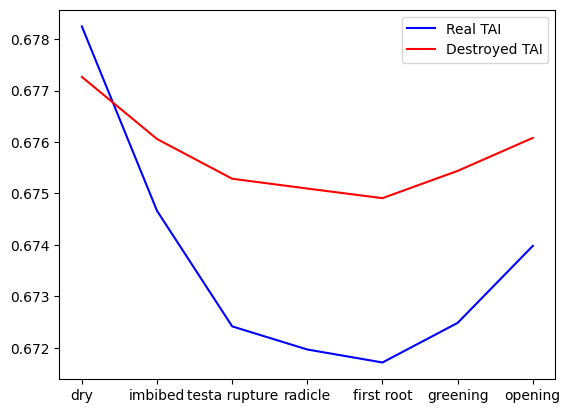

In [19]:
new_data = expression_data.remove_genes(ga_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")

plt.legend()
plt.show()

In [20]:
new_tai_var = np.var(new_data.tai).item()
print("destroyed TAI p-value:", get_p_value(new_tai_var))

destroyed TAI p-value: 0.0006188528870900344


In [21]:
tais_per_set = []
for i in range(num_runs):
    new_data_per_set = expression_data.remove_genes(ga_gene_sets[i])
    tais_per_set.append(np.var(new_data_per_set.tai).item())

print(tais_per_set)

[3.1093803895073705e-08, 3.217376217316818e-08, 3.397851863754554e-08, 4.7988456063010065e-08, 3.7278387032447456e-08]


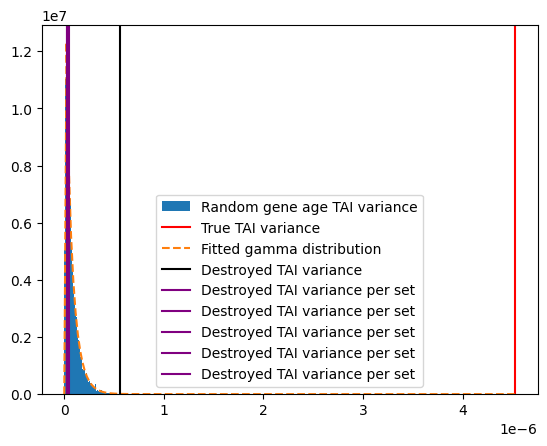

In [22]:
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")


x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")
plt.axvline(x=new_tai_var, label="Destroyed TAI variance", color="black")
for t in tais_per_set:
    plt.axvline(x=t, label="Destroyed TAI variance per set", color="purple")
plt.legend()
plt.show()

### 3.3 Benchmark GA against greedy removal of genes with highest variance

In [23]:
gene_variances = expression_data.gene_variances.sort_values('Variance', ascending=False)
gene_variances

,Phylostratum,GeneID,Variance
5072,0.963841,at1g68250,686.615332
9478,0.963841,at2g41260,587.813111
6674,0.963841,at2g05580,427.328322
21357,0.963841,at5g35660,410.527599
2857,0.963841,at1g32560,382.200755
...,...,...,...
22184,0.618291,at5g44640,0.000644
9210,0.926134,at2g38690,0.000595
117,0.618291,at1g02250,0.000572
2381,0.699120,at1g27220,0.000491


In [24]:
k_top = len(ga_genes)

highest_var_genes = gene_variances.head(k_top)['GeneID'].to_numpy()

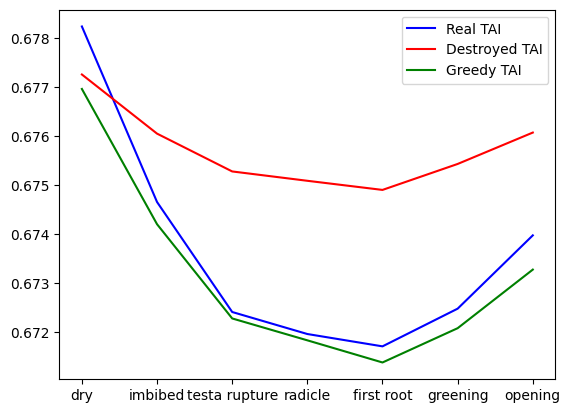

In [25]:
greedy_data = expression_data.remove_genes(highest_var_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")
plt.plot(greedy_data.tai, label="Greedy TAI", color="green")

plt.legend()
plt.show()

In [26]:
greedy_tai_var = np.var(greedy_data.tai).item()
print("p-value: ", get_p_value(greedy_tai_var))

p-value:  2.141483460751893e-18


Conversely, however, the genes that were extracted by GATAI tend to have a high variance (but they need to be carefully selected, it's not as simple as picking the most variant ones, hence the need for the GA approach)

In [27]:
common_genes = np.intersect1d(ga_genes, highest_var_genes)

print("Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset:", len(common_genes), "out of", len(ga_genes))

Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset: 83 out of 250
